In [1]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=0.1

In [2]:
shape_cat="mcal"
vol="vlim"
z_range="all_z"

In [3]:
#This header file contains all the common packages
%matplotlib inline
%run header.py $shape_cat $vol $z_range 
%run -i func.py  
%run -i corr_func.py  

In [4]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
    
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [5]:
if vol!="uber":
    members=shapes

In [6]:
if quantile!="":
    i=int(quantile)

In [7]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')
elif key=="mag":
    key=('All','All','BCG_ZLUM')

In [8]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [9]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [10]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [11]:
NBINS=10

In [12]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [13]:
len(shapes)

105029

In [14]:
len(members)

105029

In [15]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [16]:
ng_abs=get_ng_list('abs', 'f')
ng_rel=get_ng_list('rel', 'f')

4it [00:00,  7.37it/s]

0 (12382, 121)
[62.7957] 12382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1329, 121)
[41.3534] 1329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6189, 121)
[10.2082] 6188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60755, 121)
[89.9301] 60755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


5it [00:00,  7.39it/s]

3 (56345, 121)
[356.1978] 56342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (16174, 121)
[46.0702] 16170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63457, 121)


10it [00:00, 10.35it/s]

[85.9508] 63456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3958, 121)
[34.2725] 3957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 (24682, 121)
[328.6359] 24677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24038, 121)
[326.4627] 24036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (33312, 121)
[345.6461] 33309


12it [00:00, 11.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (38193, 121)
[53.8273] 38189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (30818, 121)
[55.5192] 30816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


18it [00:01, 14.12it/s]

2 (54117, 121)
[64.3462] 54115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25156, 121)
[324.9338] 25156
[0. 0. 0. 0. 0. 0. 2. 0. 2. 9.]
0 (9873, 121)
[38.6872] 9873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (603, 121)
[355.948] 603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7375, 121)
[61.2859] 7375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5184, 121)
[57.0675] 5184


27it [00:01, 19.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36839, 121)
[56.7296] 36838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12893, 121)
[311.7657] 12892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3493, 121)
[39.257] 3493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (721, 121)
[335.8398] 721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7, 121)
[39.2184] 7
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2116, 121)
[358.7909] 2116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1032, 121)
[38.1029] 1032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1852, 121)
[33.7675] 1852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (712, 121)
[84.0509] 712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65566, 121)


31it [00:01, 20.98it/s]

[34.5804] 65566
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5059, 121)
[92.0626] 5059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3211, 121)
[97.7476] 3211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14879, 121)
[43.2515] 14879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17592, 121)
[85.0535] 17591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19393, 121)
[353.6014] 19393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


38it [00:01, 22.42it/s]

2 (47159, 121)
[38.178] 47157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (964, 121)
[355.65] 964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19557, 121)
[319.6316] 19555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25097, 121)
[22.8442] 25097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30987, 121)
[14.5183] 30987


41it [00:02, 18.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (74748, 121)
[85.7086] 74746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 (24635, 121)
[342.4153] 24629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (67836, 121)


44it [00:02, 16.71it/s]

[327.4048] 67833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1257, 121)
[32.5469] 1257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63338, 121)
[46.3639] 63338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42696, 121)
[47.2714] 42695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79364, 121)
[32.1066] 79363
[0. 0. 0. 0. 0. 0. 0. 1. 1. 4.]
1 (32869, 121)


47it [00:02, 14.24it/s]

[52.3993] 32868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73627, 121)
[40.8628] 73627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35834, 121)
[352.5642] 35834


53it [00:02, 14.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32404, 121)
[46.14] 32403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1871, 121)
[359.1382] 1871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[3.1457] 0
1 (32172, 121)
[86.2464] 32171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9057, 121)
[49.2612] 9056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (11250, 121)
[43.6936] 11250
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32311, 121)
[18.4387] 32309


61it [00:03, 18.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2068, 121)
[327.8581] 2068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7595, 121)
[67.4335] 7595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7721, 121)
[309.6073] 7721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[78.6644] 0
1 (56573, 121)
[329.547] 56572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10439, 121)
[58.5559] 10439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8789, 121)
[71.8539] 8789


65it [00:03, 19.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10896, 121)
[36.1473] 10895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61261, 121)
[34.3592] 61260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28005, 121)
[23.9983] 28004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (26300, 121)


72it [00:03, 22.41it/s]

[54.5516] 26298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40751, 121)
[80.5034] 40750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2420, 121)
[68.7515] 2420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24076, 121)
[17.7742] 24076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (215, 121)
[29.3064] 215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (16826, 121)
[41.0226] 16824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


75it [00:03, 23.62it/s]

1 (26392, 121)
[16.5724] 26391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (694, 121)
[325.4905] 694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39067, 121)
[34.2728] 39067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65236, 121)
[44.0498] 65235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


82it [00:04, 24.34it/s]

0 (22993, 121)
[12.2469] 22993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3917, 121)
[6.8787] 3917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (783, 121)
[349.8034] 783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11466, 121)
[2.0197] 11466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27651, 121)
[25.8903] 27650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (14177, 121)
[323.1973] 14174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27883, 121)
[39.6842] 27883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


88it [00:04, 24.97it/s]

0 (8976, 121)
[311.459] 8976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (16575, 121)
[317.9357] 16573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6964, 121)
[17.6829] 6963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47533, 121)
[46.9605] 47533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (960, 121)
[72.0124] 960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4783, 121)
[88.0773] 4783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5278, 121)


93it [00:04, 26.25it/s]

[13.2074] 5278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27024, 121)
[329.1033] 27023
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5752, 121)
[43.487] 5752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11315, 121)
[61.271] 11315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2384, 121)
[3.1873] 2384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1331, 121)
[326.3687] 1331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (25063, 121)
[22.4088] 25060


97it [00:04, 25.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68390, 121)
[66.5172] 68390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (19063, 121)
[86.1552] 19060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27744, 121)
[33.6002] 27744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


103it [00:04, 22.01it/s]

1 (31689, 121)
[353.1819] 31688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21758, 121)
[53.5457] 21758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (52977, 121)
[53.1628] 52975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12191, 121)
[312.6147] 12191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


106it [00:05, 21.86it/s]

0 (56253, 121)
[348.2295] 56253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[36.2503] 0
1 (6377, 121)
[349.216] 6376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (14326, 121)
[11.8358] 14323
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (436, 121)
[322.5166] 436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15271, 121)
[75.2697] 15271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


113it [00:05, 24.35it/s]

2 (52766, 121)
[48.6457] 52764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (14346, 121)
[350.8522] 14344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25682, 121)
[34.4366] 25681
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11290, 121)
[73.7731] 11290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (900, 121)
[47.2036] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22999, 121)
[20.7413] 22998


121it [00:05, 28.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24552, 121)
[353.22] 24550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (219, 121)
[70.006] 219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2005, 121)
[29.0561] 2005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13138, 121)
[77.0692] 13138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15105, 121)
[16.6762] 15104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34350, 121)
[1.2742] 34350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9737, 121)
[80.712] 9737


124it [00:05, 26.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12505, 121)
[349.1634] 12504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47573, 121)
[93.0909] 47572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54611, 121)
[344.9766] 54610
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


127it [00:05, 21.75it/s]

0 (34097, 121)
[94.0882] 34097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2084, 121)
[69.808] 2084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4172, 121)
[3.0708] 4172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20528, 121)
[77.1318] 20528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18828, 121)
[14.3762] 18826


133it [00:06, 23.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33998, 121)
[34.8144] 33998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[75.3391] 0
0 (24491, 121)
[321.1699] 24491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51883, 121)
[93.2712] 51882


136it [00:06, 17.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68960, 121)
[37.8077] 68959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4121, 121)
[348.9377] 4121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (113, 121)
[41.4499] 113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[334.9423] 0
0 (11773, 121)
[12.8614] 11773


143it [00:06, 22.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31902, 121)
[10.3029] 31902
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31657, 121)
[23.8086] 31655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (2401, 121)
[359.4046] 2401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (29348, 121)
[329.83] 29345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (355, 121)
[59.7119] 355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


151it [00:06, 27.14it/s]

1 (32082, 121)
[334.7089] 32081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8897, 121)
[12.5511] 8897
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22738, 121)
[54.7854] 22738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1046, 121)
[60.6796] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6194, 121)
[18.359] 6194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (13595, 121)
[345.1088] 13593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22744, 121)
[46.8917] 22744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26440, 121)
[307.1946] 26439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2485, 121)
[70.2233] 2485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7200, 121)
[92.3614] 7200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3554, 121)
[37.4315] 3554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (77486, 121)
[58.2396] 77485


162it [00:07, 29.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (964, 121)
[35.0373] 964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1397, 121)
[28.2905] 1397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24576, 121)
[335.9246] 24574
[ 0.  0.  1.  1.  2.  0.  2.  7. 22. 26.]
2 (14062, 121)
[85.8834] 14060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34, 121)
[82.6572] 34
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11151, 121)
[5.2308] 11151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9943, 121)
[352.2754] 9943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (725, 121)
[356.5995] 725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12269, 121)
[59.026] 12268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15727, 121)


168it [00:07, 29.86it/s]

[54.8405] 15727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (258, 121)
[358.9116] 258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (14924, 121)
[9.5471] 14921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43642, 121)
[19.9124] 43641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (743, 121)
[66.6866] 743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


172it [00:07, 24.32it/s]

1 (21962, 121)
[82.8684] 21961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59660, 121)
[44.7506] 59659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46, 121)
[23.3061] 46
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (653, 121)
[316.9307] 653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27728, 121)
[36.6968] 27728


177it [00:07, 26.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (191, 121)
[43.2011] 191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35931, 121)
[88.6433] 35931
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1240, 121)
[15.2202] 1240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1115, 121)
[308.301] 1115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10338, 121)
[71.8888] 10338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8141, 121)
[349.3402] 8141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11565, 121)
[43.2083] 11564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65435, 121)


187it [00:08, 29.24it/s]

[317.7048] 65434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2724, 121)
[15.8424] 2724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43393, 121)
[331.9841] 43393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4778, 121)
[56.5498] 4778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5720, 121)
[51.1294] 5720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41178, 121)
[6.9613] 41178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22800, 121)
[341.2709] 22799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (54851, 121)
[356.2022] 54848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49039, 121)
[16.8755] 49039


191it [00:08, 22.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (488, 121)
[67.6861] 488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7985, 121)
[90.7416] 7985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2664, 121)
[3.3305] 2664
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (77793, 121)
[19.8357] 77791


198it [00:08, 19.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43025, 121)
[325.01] 43024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13600, 121)
[346.1576] 13599
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20797, 121)
[43.2455] 20795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


202it [00:08, 21.52it/s]

0 (7780, 121)
[53.3323] 7780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16795, 121)
[350.7546] 16795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (371, 121)
[68.482] 371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33574, 121)
[342.6607] 33574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (36909, 121)
[77.2544] 36907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (78875, 121)
[38.7588] 78874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14794, 121)


209it [00:09, 16.30it/s]

[0.1162] 14794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (155, 121)
[4.0611] 155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3737, 121)
[31.771] 3737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14858, 121)
[8.3339] 14858
[0. 0. 0. 0. 0. 0. 0. 0. 1. 4.]
0 (54222, 121)
[337.6791] 54222
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


212it [00:09, 17.63it/s]

0 (36207, 121)
[90.8173] 36207
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25110, 121)
[92.6079] 25109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2571, 121)
[326.7943] 2571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13580, 121)
[14.8092] 13580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (991, 121)
[321.3608] 991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (115, 121)
[75.1821] 115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35166, 121)
[344.5391] 35166


216it [00:09, 21.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (25011, 121)
[337.9905] 25009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (55624, 121)
[345.9401] 55622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51563, 121)
[90.8592] 51563


223it [00:10, 21.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16574, 121)
[95.3846] 16573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (414, 121)
[66.903] 414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10712, 121)
[347.3154] 10712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6438, 121)
[6.3533] 6438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37984, 121)
[73.7968] 37984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (39424, 121)


226it [00:10, 21.28it/s]

[43.107] 39422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5830, 121)
[49.5241] 5830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48115, 121)
[351.35] 48115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16701, 121)
[53.4843] 16700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41433, 121)
[14.342] 41433


229it [00:10, 19.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (365, 121)
[323.9078] 365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38640, 121)
[355.4661] 38639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84203, 121)
[28.0303] 84203


235it [00:10, 19.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (20989, 121)
[358.4442] 20986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11343, 121)
[324.0373] 11343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53, 121)
[23.8068] 53
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8601, 121)
[38.2965] 8601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44726, 121)
[50.7135] 44726


238it [00:10, 18.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59056, 121)
[37.7777] 59055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (52168, 121)
[357.7857] 52166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50376, 121)


241it [00:11, 16.70it/s]

[26.2665] 50376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (688, 121)
[35.7716] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58183, 121)
[345.1023] 58183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (23861, 121)
[358.2012] 23860


243it [00:11, 13.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (16854, 121)
[43.7142] 16851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33211, 121)
[56.3858] 33211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (89005, 121)
[56.5755] 89003


248it [00:11, 12.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69226, 121)
[50.8536] 69225
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9330, 121)
[330.8737] 9330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (151, 121)
[88.5806] 151


253it [00:12, 15.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3732, 121)
[62.5416] 3732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32908, 121)
[321.6352] 32906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (46617, 121)
[353.9316] 46615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16564, 121)
[31.9147] 16564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


258it [00:12, 19.04it/s]

1 (15670, 121)
[328.] 15669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4085, 121)
[14.9838] 4085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (220, 121)
[341.424] 220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9198, 121)
[33.9942] 9198
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17125, 121)
[43.7141] 17125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17067, 121)
[58.8619] 17067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10185, 121)
[82.7251] 10185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38854, 121)
[16.7998] 38854


266it [00:12, 23.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (29180, 121)
[353.3783] 29178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[92.5462] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (992, 121)
[50.4387] 992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (194, 121)
[35.8009] 194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35719, 121)
[93.1736] 35719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (40235, 121)
[30.583] 40231


269it [00:12, 19.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6639, 121)
[345.3369] 6639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79487, 121)
[28.1403] 79487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31328, 121)
[78.4523] 31327


272it [00:12, 17.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22710, 121)
[55.6981] 22710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65018, 121)
[349.0913] 65018
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8767, 121)
[67.3137] 8767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


278it [00:13, 21.01it/s]

0 (21238, 121)
[340.3384] 21238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29079, 121)
[71.0261] 29078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (637, 121)
[36.5782] 637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59, 121)
[347.8619] 59
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47098, 121)
[36.4485] 47097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62462, 121)
[353.0887] 62462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56360, 121)
[1.3316] 56360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26031, 121)
[340.2671] 26031


283it [00:13, 16.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22438, 121)
[33.7967] 22437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44206, 121)
[75.883] 44205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26576, 121)
[323.7791] 26575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33957, 121)


285it [00:13, 16.24it/s]

[339.3643] 33957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64119, 121)
[27.0846] 64119
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56404, 121)
[335.196] 56404


290it [00:13, 15.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4401, 121)
[86.0067] 4401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14292, 121)
[45.4068] 14292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48325, 121)
[331.8379] 48324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46671, 121)


293it [00:14, 17.26it/s]

[71.1616] 46671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2907, 121)
[19.7173] 2907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11626, 121)
[0.5497] 11626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54052, 121)
[347.7952] 54052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67904, 121)


295it [00:14, 13.87it/s]

[33.803] 67904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20235, 121)
[22.0623] 20235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64467, 121)
[93.3392] 64467


300it [00:14, 15.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10729, 121)
[36.0592] 10729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12671, 121)
[35.9169] 12670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31750, 121)
[88.0084] 31750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1059, 121)
[324.1696] 1059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32823, 121)
[320.4552] 32821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


303it [00:14, 16.40it/s]

0 (55339, 121)
[347.7808] 55339
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11848, 121)
[73.7734] 11848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8330, 121)
[1.381] 8330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22777, 121)
[353.9223] 22775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78252, 121)


313it [00:15, 21.08it/s]

[334.0305] 78252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (679, 121)
[344.3487] 679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (709, 121)
[27.9511] 709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8337, 121)
[348.8615] 8337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1615, 121)
[344.4509] 1615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3554, 121)
[28.8951] 3554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13183, 121)
[14.8382] 13183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (48984, 121)
[339.923] 48982
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (72509, 121)
[326.8481] 72507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


316it [00:15, 15.93it/s]

0 (7904, 121)
[337.4864] 7904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (712, 121)
[346.6679] 712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12363, 121)
[34.9506] 12362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57663, 121)
[12.2744] 57663


322it [00:15, 15.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12697, 121)
[62.9361] 12697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1227, 121)
[329.4816] 1227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (78817, 121)
[32.5419] 78815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


324it [00:15, 13.89it/s]

1 (76027, 121)
[34.4454] 76026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16786, 121)
[44.2122] 16785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32650, 121)
[333.8166] 32649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4118, 121)


326it [00:16, 15.14it/s]

[39.1478] 4118
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (77624, 121)
[34.1052] 77620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71221, 121)


330it [00:16, 12.28it/s]

[90.4167] 71221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8860, 121)
[35.6188] 8860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39979, 121)
[11.75] 39979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9617, 121)
[68.9395] 9617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


332it [00:16, 12.84it/s]

0 (61405, 121)
[348.5695] 61405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24420, 121)
[323.115] 24420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[323.3259] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57660, 121)


335it [00:16, 13.52it/s]

[321.7888] 57660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22205, 121)
[5.5245] 22204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (53814, 121)
[36.4162] 53812


339it [00:17, 13.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14763, 121)
[18.5509] 14762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51559, 121)
[51.0369] 51559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58670, 121)


341it [00:17, 13.13it/s]

[347.2624] 58670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17832, 121)
[73.9188] 17831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10680, 121)
[11.622] 10680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (282, 121)
[66.1768] 282
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[43.6594] 0
0 (630, 121)
[13.138] 630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50649, 121)


349it [00:17, 17.55it/s]

[69.9885] 50649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16948, 121)
[74.698] 16947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31422, 121)
[66.4134] 31421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4848, 121)
[15.3363] 4848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11735, 121)
[59.2617] 11734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32610, 121)


353it [00:17, 19.80it/s]

[55.4962] 32609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1015, 121)
[345.8436] 1015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27293, 121)
[40.1873] 27292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9842, 121)
[12.8491] 9842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (880, 121)
[69.2637] 880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (9949, 121)
[87.9268] 9946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54038, 121)


357it [00:17, 20.33it/s]

[27.7377] 54038
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22957, 121)
[73.049] 22955
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37699, 121)


362it [00:18, 18.16it/s]

[307.9197] 37699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8687, 121)
[46.1658] 8687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2908, 121)
[56.9363] 2907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33741, 121)
[26.2695] 33740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (962, 121)
[58.5988] 962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17938, 121)
[35.3976] 17938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


366it [00:18, 20.82it/s]

0 (12553, 121)
[66.5994] 12553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15776, 121)
[77.5997] 15776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (30470, 121)
[81.1833] 30467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14, 121)
[74.6022] 14
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50750, 121)
[333.8451] 50749


369it [00:18, 19.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13448, 121)
[80.8585] 13447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40191, 121)
[32.4726] 40190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71310, 121)
[28.4048] 71310


374it [00:18, 17.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (38062, 121)
[13.3754] 38060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16327, 121)
[29.6308] 16327
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (187, 121)
[8.4432] 187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41967, 121)
[3.4722] 41967
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8333, 121)


378it [00:19, 19.59it/s]

[340.4391] 8333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13352, 121)
[73.2645] 13351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (19316, 121)
[46.7425] 19313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38585, 121)
[19.9682] 38585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68266, 121)


384it [00:19, 18.29it/s]

[38.9664] 68266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38481, 121)
[28.6682] 38481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13432, 121)
[359.1761] 13431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9293, 121)
[317.4305] 9292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


387it [00:19, 17.81it/s]

0 (37674, 121)
[313.5289] 37674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1415, 121)
[83.6285] 1415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59884, 121)
[30.1673] 59884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12533, 121)
[84.6063] 12533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6666, 121)
[62.9537] 6665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


392it [00:19, 17.37it/s]

0 (49198, 121)
[345.1842] 49198
[0. 0. 0. 0. 0. 0. 0. 0. 1. 5.]
1 (57141, 121)
[95.7119] 57140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (335, 121)
[44.308] 335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


395it [00:19, 19.83it/s]

0 (15069, 121)
[11.6654] 15069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17182, 121)
[54.6017] 17181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (200, 121)
[33.4643] 200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1254, 121)
[321.5137] 1254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9289, 121)
[68.3777] 9289
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 13.]


398it [00:20, 17.86it/s]

1 (53432, 121)
[345.8783] 53431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11351, 121)
[56.1235] 11351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21642, 121)
[322.2875] 21641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47032, 121)


403it [00:20, 15.64it/s]

[352.968] 47032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29105, 121)
[339.4846] 29104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38036, 121)
[310.2424] 38036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


405it [00:20, 16.70it/s]

0 (42558, 121)
[46.9619] 42558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16542, 121)
[349.5009] 16542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (447, 121)
[67.3939] 447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20254, 121)
[35.4747] 20253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53999, 121)
[60.5994] 53999


412it [00:20, 18.63it/s]

[ 0.  0.  0.  0.  0.  0.  0.  3. 18. 15.]
0 (300, 121)
[95.6489] 300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24206, 121)
[33.8647] 24206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10018, 121)
[321.9876] 10017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48353, 121)
[87.6303] 48353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (429, 121)


414it [00:21, 17.14it/s]

[321.1532] 429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50738, 121)
[338.8827] 50738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30661, 121)
[23.4583] 30661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


416it [00:21, 14.81it/s]

1 (56027, 121)
[35.6033] 56026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37958, 121)
[6.4894] 37958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24367, 121)
[8.5333] 24366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2140, 121)
[5.5742] 2140


421it [00:21, 16.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49713, 121)
[311.7802] 49713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16561, 121)
[34.3351] 16561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21379, 121)
[315.9113] 21378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


424it [00:21, 17.10it/s]

1 (12991, 121)
[350.4156] 12990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39788, 121)
[44.3736] 39788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1009, 121)
[356.2774] 1009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60359, 121)
[54.8054] 60359


426it [00:21, 16.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (71191, 121)
[56.564] 71189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60240, 121)


428it [00:22, 12.64it/s]

[18.184] 60240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45975, 121)
[317.7544] 45975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


430it [00:22, 11.22it/s]

0 (43603, 121)
[92.0008] 43603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51629, 121)
[338.2373] 51629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36624, 121)
[334.0647] 36623


434it [00:22, 10.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58185, 121)
[68.7172] 58185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48025, 121)
[2.9705] 48024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


436it [00:22, 11.79it/s]

0 (200, 121)
[35.304] 200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6021, 121)
[49.6693] 6021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26916, 121)
[349.0203] 26916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13971, 121)


440it [00:23, 13.20it/s]

[27.971] 13971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56105, 121)
[12.8904] 56104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10600, 121)
[319.1138] 10600
[0. 0. 0. 0. 0. 0. 0. 0. 1. 5.]
0 (23973, 121)


443it [00:23, 14.13it/s]

[331.7439] 23973
[0. 0. 0. 0. 1. 0. 3. 5. 4. 6.]
0 (836, 121)
[52.8762] 836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42780, 121)
[339.1033] 42780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21325, 121)
[22.513] 21325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


445it [00:23, 14.02it/s]

0 (39979, 121)
[48.7822] 39979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30134, 121)
[95.7816] 30134
[0. 0. 0. 0. 0. 0. 0. 1. 3. 0.]
0 (13201, 121)
[59.1703] 13201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (798, 121)
[18.8892] 798


448it [00:23, 15.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12199, 121)
[91.8946] 12199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11786, 121)
[38.0791] 11784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49077, 121)
[335.4784] 49076


453it [00:23, 15.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1036, 121)
[75.6685] 1036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40350, 121)
[8.8175] 40350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50109, 121)
[345.4322] 50108


459it [00:24, 18.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12362, 121)
[36.3592] 12361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (287, 121)
[15.5285] 287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (880, 121)
[24.1369] 880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29188, 121)
[329.5744] 29187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11962, 121)
[78.9049] 11962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


462it [00:24, 16.24it/s]

0 (74494, 121)
[66.0922] 74494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12690, 121)
[22.7214] 12690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (13728, 121)
[36.486] 13726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5529, 121)
[71.4914] 5529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


465it [00:24, 17.89it/s]

1 (35698, 121)
[39.6373] 35697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (21909, 121)
[322.5145] 21907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32165, 121)
[46.7074] 32164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60201, 121)


468it [00:24, 16.40it/s]

[0.3892] 60201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17507, 121)
[73.3391] 17506
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13400, 121)
[37.2587] 13400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14251, 121)
[10.9426] 14251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64947, 121)
[25.5117] 64946


475it [00:24, 19.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (397, 121)
[41.1754] 397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15813, 121)
[32.0845] 15812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9037, 121)
[17.9431] 9037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (541, 121)
[350.9088] 541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10662, 121)
[318.7347] 10661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


478it [00:25, 16.91it/s]

0 (36498, 121)
[55.5277] 36498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47988, 121)
[345.1571] 47987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (801, 121)
[19.9325] 801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


480it [00:25, 14.03it/s]

0 (46829, 121)
[65.6443] 46829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (912, 121)
[59.0156] 912
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24861, 121)
[72.3985] 24861


484it [00:25, 13.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11081, 121)
[52.1152] 11081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54019, 121)
[33.393] 54018
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15296, 121)
[86.5199] 15296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90402, 121)
[346.5471] 90402


488it [00:26, 10.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42336, 121)
[315.3156] 42336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28186, 121)
[22.7501] 28186
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


490it [00:26, 11.00it/s]

0 (10396, 121)
[31.4496] 10396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71548, 121)
[318.2994] 71548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8252, 121)
[65.9059] 8251
[0. 0. 1. 2. 0. 4. 3. 4. 4. 5.]


495it [00:26, 15.03it/s]

1 (28537, 121)
[9.6651] 28536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25042, 121)
[57.3444] 25042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10370, 121)
[71.7163] 10370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6927, 121)
[69.0399] 6927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11129, 121)
[315.9492] 11129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3838, 121)
[325.6449] 3837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


498it [00:26, 15.91it/s]

0 (64263, 121)
[87.4295] 64263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6538, 121)
[71.7313] 6538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9391, 121)
[11.8918] 9391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31802, 121)
[341.6928] 31801


504it [00:27, 17.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58765, 121)
[53.4733] 58765
[0. 0. 0. 0. 0. 0. 0. 0. 2. 0.]
1 (22609, 121)
[43.5763] 22608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9090, 121)
[31.9411] 9090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1991, 121)
[34.4775] 1990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


509it [00:27, 20.52it/s]

0 (2778, 121)
[43.5638] 2778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9303, 121)
[72.9648] 9303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1093, 121)
[41.4329] 1093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46974, 121)
[34.6267] 46973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47314, 121)
[333.6246] 47314


512it [00:27, 18.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9077, 121)
[45.3462] 9077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20886, 121)
[21.1163] 20884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55321, 121)
[42.3699] 55320


515it [00:27, 14.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (718, 121)
[42.4547] 718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38362, 121)
[338.3514] 38362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


517it [00:27, 12.24it/s]

0 (61519, 121)
[17.6216] 61519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36308, 121)
[341.1757] 36307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 8.]
0 (9177, 121)
[55.0909] 9177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


520it [00:27, 14.67it/s]

0 (8853, 121)
[350.8183] 8853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22141, 121)
[325.2007] 22141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34348, 121)
[94.224] 34347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49896, 121)
[338.7626] 49895


525it [00:28, 15.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12581, 121)
[334.2979] 12581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7537, 121)
[351.531] 7537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48334, 121)
[71.6367] 48333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


527it [00:28, 14.32it/s]

0 (10455, 121)
[38.5423] 10455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45423, 121)
[70.6967] 45423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (85925, 121)


529it [00:28, 10.50it/s]

[59.8401] 85924
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75430, 121)
[345.7711] 75430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


531it [00:28, 10.42it/s]

1 (38165, 121)
[335.583] 38164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38907, 121)
[34.8703] 38907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10753, 121)
[88.1644] 10753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


533it [00:29, 12.16it/s]

0 (27704, 121)
[54.7716] 27704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25376, 121)
[4.318] 25375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4701, 121)
[68.1771] 4701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63662, 121)
[36.8234] 63662


538it [00:29, 12.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73216, 121)
[316.1684] 73216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50002, 121)
[36.4458] 50002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


540it [00:29, 13.39it/s]

1 (29474, 121)
[337.5771] 29473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (943, 121)
[81.0696] 943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[50.5593] 0
1 (23754, 121)
[52.8467] 23753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17425, 121)
[12.8415] 17424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


547it [00:29, 17.34it/s]

0 (58078, 121)
[77.0907] 58078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35583, 121)
[30.6149] 35583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1961, 121)
[51.0262] 1961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (283, 121)
[57.2193] 283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15128, 121)
[339.0425] 15127


550it [00:29, 19.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12124, 121)
[58.7807] 12124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16333, 121)
[87.0739] 16332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37631, 121)
[330.0358] 37630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1675, 121)
[344.064] 1675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (434, 121)
[19.3864] 434


553it [00:30, 18.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63547, 121)
[60.7537] 63547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (15530, 121)
[341.1141] 15528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19009, 121)
[30.2845] 19008


558it [00:30, 16.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14239, 121)
[311.718] 14238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34745, 121)
[54.0612] 34745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53156, 121)
[88.3912] 53155


560it [00:30, 12.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57817, 121)
[349.1842] 57817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33424, 121)
[38.9043] 33424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9371, 121)
[60.0597] 9371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (842, 121)


566it [00:31, 17.38it/s]

[51.7188] 842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18879, 121)
[12.067] 18878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9193, 121)
[65.5651] 9193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (20220, 121)
[29.6937] 20217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18559, 121)
[345.2014] 18559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32187, 121)
[39.5227] 32186


569it [00:31, 18.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6411, 121)
[74.2808] 6411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45488, 121)
[30.8022] 45487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (877, 121)
[50.6793] 877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33384, 121)


575it [00:31, 18.94it/s]

[37.1981] 33384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11321, 121)
[337.0985] 11321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1187, 121)
[75.7208] 1187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39136, 121)
[51.8544] 39136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51222, 121)


578it [00:31, 19.10it/s]

[94.9613] 51222
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4847, 121)
[70.9386] 4847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14478, 121)
[357.8642] 14478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25427, 121)
[331.1672] 25426
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43793, 121)
[79.6002] 43792


583it [00:31, 17.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20041, 121)
[40.754] 20039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33863, 121)
[330.7366] 33863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13662, 121)
[311.532] 13662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56884, 121)


588it [00:32, 18.85it/s]

[353.6069] 56883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3079, 121)
[44.5992] 3079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31399, 121)
[85.9403] 31397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20708, 121)
[42.6667] 20706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (713, 121)
[46.3188] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (204, 121)
[8.4453] 204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60540, 121)
[45.8155] 60540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31649, 121)
[43.4272] 31648


593it [00:32, 13.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (42818, 121)
[353.6755] 42815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33764, 121)
[80.8403] 33764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11638, 121)
[32.4394] 11638


597it [00:32, 14.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14854, 121)
[75.7924] 14854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15882, 121)
[47.908] 15881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54574, 121)
[73.5052] 54574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

601it [00:33, 16.85it/s]

(11008, 121)
[70.4935] 11008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2006, 121)
[20.9763] 2006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33344, 121)
[38.7788] 33344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2810, 121)
[72.4738] 2810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21949, 121)
[39.7854] 21948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


605it [00:33, 15.67it/s]

0 (55670, 121)
[341.8455] 55670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1130, 121)
[62.2466] 1130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35974, 121)
[352.4493] 35974
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


607it [00:33, 12.63it/s]

0 (54151, 121)
[347.8831] 54151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36843, 121)
[348.477] 36843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


609it [00:33, 13.46it/s]

0 (6, 121)
[355.2774] 6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58169, 121)
[72.121] 58169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31318, 121)
[70.8194] 31317
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


613it [00:33, 14.36it/s]

0 (46164, 121)
[23.4174] 46164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15546, 121)
[61.7371] 15545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37061, 121)
[21.7682] 37060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60877, 121)

615it [00:34, 13.66it/s]


[322.2796] 60876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2818, 121)
[301.5367] 2818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65897, 121)
[341.3334] 65897


621it [00:34, 15.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14171, 121)
[43.962] 14171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7068, 121)
[58.6086] 7068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2736, 121)
[56.7455] 2736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37, 121)
[56.4374] 37
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34723, 121)
[37.5297] 34723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


629it [00:34, 21.88it/s]

0 (11367, 121)
[37.6016] 11367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9273, 121)
[44.0071] 9272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (111, 121)
[25.2273] 111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (592, 121)
[63.2314] 592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32, 121)
[76.8016] 32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8163, 121)
[56.1816] 8163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28177, 121)
[86.9259] 28177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5838, 121)
[40.27] 5838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49060, 121)
[355.4821] 49060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20456, 121)
[29.6244] 20456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


632it [00:35, 15.13it/s]

1 (60796, 121)
[89.4281] 60795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46671, 121)
[316.0485] 46671


635it [00:35, 12.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55980, 121)
[330.077] 55980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8996, 121)
[58.526] 8996
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (783, 121)
[355.1231] 783


638it [00:35, 13.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (114, 121)
[27.3995] 114
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47817, 121)
[305.3713] 47817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24, 121)
[28.0922] 24
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45016, 121)


640it [00:35, 13.41it/s]

[26.5829] 45016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43301, 121)
[44.7169] 43301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2378, 121)
[64.1776] 2378


645it [00:36, 14.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4511, 121)
[72.9329] 4511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10664, 121)
[6.3552] 10663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41013, 121)
[47.093] 41012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (273, 121)
[330.2318] 273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


647it [00:36, 13.77it/s]

0 (61632, 121)
[322.6798] 61632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59556, 121)
[71.4339] 59555


649it [00:36, 13.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6, 121)
[333.6778] 6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51954, 121)
[88.2445] 51954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (47539, 121)


651it [00:36, 11.88it/s]

[51.4603] 47537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61718, 121)
[75.6117] 61717


656it [00:36, 12.31it/s]

[ 0.  0.  0.  0.  1.  1.  0.  2. 13.  4.]
0 (8221, 121)
[13.0767] 8221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11698, 121)
[69.5657] 11698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3556, 121)
[350.7566] 3556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (54291, 121)
[66.239] 54288
[ 0.  0.  0.  0.  0.  1.  0.  1.  8. 16.]


658it [00:37, 13.13it/s]

0 (28516, 121)
[34.8036] 28516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26448, 121)
[29.6563] 26447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40403, 121)
[325.866] 40402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43375, 121)


660it [00:37, 13.41it/s]

[351.1395] 43374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36049, 121)
[20.3277] 36049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48775, 121)
[356.2651] 48775


665it [00:37, 14.21it/s]

[ 0.  0.  0.  0.  0.  2.  0.  3. 10. 10.]
1 (14241, 121)
[44.3109] 14240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17910, 121)
[349.6165] 17909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14629, 121)
[332.2873] 14629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (59383, 121)


667it [00:37, 13.16it/s]

[77.469] 59381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32346, 121)
[343.8808] 32346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6455, 121)
[80.6354] 6455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


669it [00:37, 14.02it/s]

0 (1699, 121)
[335.8109] 1699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69012, 121)
[345.3409] 69011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12473, 121)
[78.3376] 12473


673it [00:38, 12.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37862, 121)
[340.2671] 37862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34737, 121)
[74.2582] 34735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41935, 121)
[9.7078] 41935


675it [00:38, 13.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (693, 121)
[357.8301] 693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22517, 121)
[4.0934] 22515
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2, 121)
[323.2148] 2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1287, 121)
[34.8325] 1287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87282, 121)
[61.3375] 87282


682it [00:38, 14.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1553, 121)
[62.1227] 1553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6742, 121)
[10.0204] 6742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74370, 121)
[45.306] 74369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (67039, 121)
[356.273] 67037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52150, 121)
[64.6783] 52150


686it [00:39, 12.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61906, 121)
[72.8318] 61906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37714, 121)
[88.844] 37714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11788, 121)
[70.4486] 11788


691it [00:39, 14.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2596, 121)
[67.384] 2596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28589, 121)
[75.8332] 28589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13730, 121)
[311.4119] 13730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44348, 121)
[71.9502] 44348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


693it [00:39, 13.98it/s]

0 (48817, 121)
[72.3848] 48817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5535, 121)
[60.5924] 5535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25640, 121)
[53.0487] 25640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


695it [00:39, 13.32it/s]

0 (57329, 121)
[77.9074] 57329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11044, 121)
[60.0806] 11044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61145, 121)
[41.6588] 61144


697it [00:39, 12.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21053, 121)
[340.7545] 21053
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (86669, 121)
[359.5453] 86668


701it [00:40, 12.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36133, 121)
[38.6036] 36132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (796, 121)
[20.2329] 796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11595, 121)
[348.5663] 11595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59528, 121)


703it [00:40, 12.89it/s]

[13.1939] 59528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10896, 121)
[3.3774] 10896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30361, 121)
[41.867] 30361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11879, 121)
[73.078] 11877


706it [00:40, 13.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7837, 121)
[17.4716] 7837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18775, 121)
[6.2364] 18775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83530, 121)
[67.5618] 83530


712it [00:41, 14.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18729, 121)
[15.2525] 18728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (12900, 121)
[84.9124] 12897
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22099, 121)
[84.0288] 22098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9827, 121)
[13.5848] 9826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (36707, 121)


717it [00:41, 17.07it/s]

[8.6836] 36705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23899, 121)
[335.2016] 23899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5937, 121)
[24.9847] 5937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20483, 121)
[334.0952] 20482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52739, 121)


719it [00:41, 13.26it/s]

[19.9175] 52739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52821, 121)
[348.1567] 52821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8801, 121)
[59.8606] 8801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


721it [00:41, 13.24it/s]

0 (68180, 121)
[44.2319] 68180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43005, 121)
[302.3739] 43005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


723it [00:41, 10.96it/s]

0 (72239, 121)
[326.3376] 72239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12071, 121)
[60.7222] 12071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33587, 121)
[7.7926] 33587


727it [00:42, 12.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46697, 121)
[353.3732] 46697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23589, 121)
[353.4573] 23589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12420, 121)
[40.7641] 12419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31233, 121)

729it [00:42, 14.10it/s]


[55.7484] 31232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70185, 121)
[77.2601] 70185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18397, 121)


733it [00:42, 13.55it/s]

[341.2171] 18396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (20317, 121)
[70.8829] 20317
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24398, 121)
[40.6961] 24397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30340, 121)
[340.8936] 30340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


735it [00:42, 14.63it/s]

0 (15079, 121)
[56.9432] 15079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48406, 121)
[64.5237] 48406
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34687, 121)
[0.255] 34686


739it [00:43, 12.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33344, 121)
[328.6027] 33344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54874, 121)
[13.4827] 54873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9230, 121)


742it [00:43, 14.32it/s]

[5.8773] 9229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6129, 121)
[75.7636] 6129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34984, 121)
[24.9406] 34983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46222, 121)
[38.0423] 46222


744it [00:43, 14.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18688, 121)
[0.4566] 18687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8107, 121)
[15.8768] 8107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


746it [00:43, 11.47it/s]

1 (36862, 121)
[346.3162] 36861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5571, 121)
[317.3407] 5571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47805, 121)
[81.5098] 47805


748it [00:43, 11.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62607, 121)
[23.1325] 62607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


750it [00:44,  9.33it/s]

0 (68618, 121)
[41.9735] 68618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (392, 121)
[85.4087] 392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42648, 121)


752it [00:44,  9.76it/s]

[354.9905] 42648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (33941, 121)
[321.6837] 33937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36978, 121)
[353.4078] 36978


756it [00:44, 11.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35261, 121)
[19.4762] 35261
[0. 0. 0. 0. 0. 0. 0. 0. 1. 5.]
0 (28714, 121)
[23.66] 28714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9090, 121)
[90.0939] 9090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9132, 121)
[47.337] 9131


762it [00:44, 15.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (36395, 121)
[340.0876] 36392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9366, 121)
[42.5047] 9366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7199, 121)
[39.3136] 7199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21847, 121)
[46.1492] 21847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


764it [00:44, 16.04it/s]

3 (30540, 121)
[326.798] 30537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1984, 121)
[42.8654] 1984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1529, 121)
[16.5328] 1529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1371, 121)
[19.1301] 1371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2523, 121)
[323.8023] 2523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[10.0931] 0
0 (11121, 121)
[41.5615] 11121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31817, 121)


770it [00:45, 19.41it/s]

[7.165] 31817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63130, 121)
[73.5353] 63130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


773it [00:45, 14.73it/s]

0 (71579, 121)
[25.8574] 71579
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9383, 121)
[85.3213] 9383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36270, 121)
[345.5348] 36270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


778it [00:45, 17.35it/s]

0 (29374, 121)
[36.7129] 29374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1526, 121)
[354.9309] 1526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18701, 121)
[318.5221] 18700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32579, 121)
[94.975] 32578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22225, 121)
[344.3713] 22225
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


781it [00:45, 18.78it/s]

0 (20373, 121)
[323.1485] 20373
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (900, 121)
[59.7965] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (310, 121)
[318.6386] 310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2179, 121)
[70.0952] 2179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61250, 121)
[306.9371] 61250


786it [00:46, 16.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (30193, 121)
[355.0801] 30191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35042, 121)
[46.0589] 35042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8265, 121)
[348.713] 8265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


788it [00:46, 13.51it/s]

0 (71771, 121)
[34.2784] 71771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49926, 121)
[29.0743] 49925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


790it [00:46, 12.89it/s]

5 (22016, 121)
[322.2435] 22011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64812, 121)
[20.5245] 64812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18191, 121)


795it [00:46, 14.68it/s]

[73.3987] 18191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8323, 121)
[22.7386] 8323
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (15230, 121)
[324.1152] 15228
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26309, 121)
[23.2942] 26308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24540, 121)
[21.3057] 24540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 

798it [00:46, 17.09it/s]

(11030, 121)
[36.8686] 11029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8271, 121)
[306.313] 8271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2539, 121)
[325.2115] 2539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3670, 121)
[70.4638] 3670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30858, 121)
[89.6738] 30858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (89017, 121)


805it [00:47, 19.20it/s]

[59.4822] 89015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (545, 121)
[0.2105] 545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27900, 121)
[78.4457] 27900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6078, 121)
[71.8021] 6078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4718, 121)
[347.2632] 4718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


808it [00:47, 18.57it/s]

0 (74825, 121)
[23.0566] 74825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (202, 121)
[26.2804] 202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40427, 121)
[356.9037] 40427
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19554, 121)


811it [00:47, 16.70it/s]

[319.6435] 19554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50850, 121)
[349.4282] 50850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63990, 121)
[85.0566] 63990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


813it [00:47, 15.03it/s]

0 (10135, 121)
[68.5904] 10135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5940, 121)
[345.512] 5940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9543, 121)
[70.6705] 9543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68374, 121)
[20.2396] 68374


816it [00:48, 15.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3168, 121)
[304.9202] 3168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3, 121)
[334.1309] 3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27049, 121)
[44.7217] 27049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51, 121)
[341.2957] 51
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7347, 121)
[33.8918] 7347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (88590, 121)


822it [00:48, 16.79it/s]

[58.1094] 88589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9993, 121)
[96.3673] 9993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58997, 121)
[41.4642] 58997


826it [00:48, 14.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65601, 121)
[2.8604] 65601
[0. 0. 0. 0. 0. 0. 0. 0. 1. 3.]
0 (10204, 121)
[29.6415] 10204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3458, 121)
[343.9991] 3458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


832it [00:48, 18.56it/s]

0 (39976, 121)
[42.6091] 39976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18763, 121)
[70.3594] 18761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1074, 121)
[51.6992] 1074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24511, 121)
[321.861] 24509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22719, 121)
[328.6843] 22719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


835it [00:49, 18.78it/s]

0 (2098, 121)
[333.4535] 2098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63937, 121)
[30.1239] 63937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8620, 121)
[70.7603] 8620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13539, 121)
[351.5112] 13538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1563, 121)
[333.5931] 1563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


838it [00:49, 19.82it/s]

1 (47008, 121)
[355.5375] 47007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6926, 121)
[333.4342] 6926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65695, 121)
[77.7824] 65695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


844it [00:49, 19.76it/s]

0 (4484, 121)
[335.3577] 4484
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45382, 121)
[70.5401] 45381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (424, 121)
[25.6333] 424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2299, 121)
[358.5381] 2299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30237, 121)
[358.237] 30237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (90571, 121)
[90.5619] 90570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24283, 121)


849it [00:49, 15.69it/s]

[321.8417] 24283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14372, 121)
[18.6013] 14372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22066, 121)
[20.7309] 22065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8529, 121)
[346.7281] 8529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23468, 121)
[77.3234] 23468


852it [00:50, 16.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38379, 121)
[38.6655] 38379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20886, 121)
[342.9473] 20884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4241, 121)
[92.0672] 4241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


855it [00:50, 15.15it/s]

0 (71395, 121)
[53.5399] 71395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20434, 121)
[303.8938] 20434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4809, 121)
[8.9233] 4809
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19453, 121)
[11.8604] 19452


858it [00:50, 17.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (72177, 121)
[39.1209] 72176
[0. 0. 0. 0. 0. 0. 1. 0. 0. 9.]
0 (60307, 121)


860it [00:50, 11.62it/s]

[66.2181] 60307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55417, 121)


864it [00:51, 11.67it/s]

[346.3727] 55417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15387, 121)
[315.9397] 15386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37058, 121)
[47.8751] 37058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6090, 121)
[12.3063] 6090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


867it [00:51, 13.50it/s]

0 (1365, 121)
[79.5469] 1365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24832, 121)
[307.9103] 24832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21862, 121)
[333.6983] 21861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41856, 121)
[75.5384] 41856


873it [00:51, 16.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29636, 121)
[39.483] 29636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14558, 121)
[10.267] 14558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1036, 121)
[325.4188] 1036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8791, 121)
[58.4307] 8791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11215, 121)
[61.4391] 11215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


877it [00:51, 17.82it/s]

1 (31493, 121)
[54.5011] 31492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3195, 121)
[312.1661] 3195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1224, 121)
[48.7578] 1224
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55819, 121)
[50.0919] 55819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38595, 121)


880it [00:51, 18.36it/s]

[9.6475] 38595
[0. 0. 0. 0. 0. 2. 2. 4. 1. 7.]
2 (19047, 121)
[67.572] 19045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2687, 121)
[65.9797] 2687
[0. 0. 0. 0. 0. 0. 0. 2. 5. 4.]
1 (9633, 121)
[35.6221] 9632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (862, 121)
[349.6894] 862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3289, 121)
[61.2401] 3289
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1464, 121)
[84.0062] 1464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


888it [00:52, 20.92it/s]

0 (42465, 121)
[20.2437] 42465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14351, 121)
[57.515] 14351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40374, 121)
[27.2213] 40374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37313, 121)
[48.7075] 37313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (66411, 121)
[44.3756] 66408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50017, 121)
[331.5581] 50017


891it [00:52, 16.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (357, 121)
[318.8695] 357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90, 121)
[41.4995] 90
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62960, 121)
[92.6723] 62960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


894it [00:52, 15.46it/s]

0 (26737, 121)
[54.5868] 26737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1242, 121)
[33.5007] 1242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65921, 121)
[33.7924] 65921


899it [00:52, 15.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31913, 121)
[321.6923] 31913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16711, 121)
[92.9877] 16711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (802, 121)
[34.6449] 802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29167, 121)
[1.7805] 29166


903it [00:53, 15.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38062, 121)
[64.7801] 38062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28915, 121)
[10.1431] 28915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21528, 121)
[77.8705] 21528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


906it [00:53, 17.90it/s]

0 (28642, 121)
[69.3562] 28642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12217, 121)
[330.5027] 12217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (633, 121)
[66.4595] 633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34397, 121)
[356.2139] 34396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81966, 121)


910it [00:53, 14.95it/s]

[12.3693] 81966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38087, 121)
[299.6426] 38087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5564, 121)
[350.537] 5564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (151, 121)
[352.7802] 151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11122, 121)
[70.6126] 11122


914it [00:53, 17.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (23645, 121)
[63.5518] 23642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13783, 121)
[29.7019] 13783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8465, 121)
[40.7513] 8465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62854, 121)
[93.3527] 62854


917it [00:53, 16.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36806, 121)
[48.4542] 36806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51260, 121)
[74.8866] 51260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


919it [00:54, 11.75it/s]

1 (86741, 121)
[77.8418] 86740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51436, 121)
[91.0242] 51436


921it [00:54, 12.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17372, 121)
[327.3138] 17371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8205, 121)
[34.1255] 8205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4451, 121)
[91.1881] 4451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58118, 121)


924it [00:54, 13.07it/s]

[84.3872] 58118
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7306, 121)
[331.9938] 7306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2196, 121)
[333.24] 2196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12157, 121)
[348.9799] 12157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75328, 121)


928it [00:54, 14.01it/s]

[65.2738] 75328
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33581, 121)
[78.0302] 33581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75983, 121)
[66.0626] 75983


930it [00:54, 12.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (81524, 121)
[65.1944] 81522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


932it [00:55, 10.80it/s]

0 (40871, 121)
[37.4716] 40871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43473, 121)
[42.8468] 43472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (46002, 121)
[52.5591] 46002


936it [00:55, 11.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52611, 121)
[12.2597] 52611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14350, 121)
[322.3871] 14349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22600, 121)
[345.2383] 22599


940it [00:55, 12.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 7.]
0 (10588, 121)
[55.8046] 10588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11320, 121)
[34.2819] 11319
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (41942, 121)
[20.3207] 41940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84, 121)
[39.5588] 84
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17318, 121)
[4.6732] 17318


943it [00:56, 13.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61380, 121)
[315.5775] 61379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19962, 121)
[64.7489] 19960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


947it [00:56, 14.77it/s]

0 (41673, 121)
[36.2787] 41673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33145, 121)
[42.8424] 33145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6181, 121)
[59.9291] 6181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12545, 121)
[51.0868] 12545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


949it [00:56, 15.39it/s]

2 (45640, 121)
[332.1689] 45638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59115, 121)
[43.0287] 59115


951it [00:56, 11.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68739, 121)
[40.3674] 68739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43522, 121)
[46.4521] 43522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


953it [00:56, 12.51it/s]

0 (9476, 121)
[58.5788] 9476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69196, 121)
[76.6244] 69196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72713, 121)


958it [00:57, 13.11it/s]

[333.4286] 72713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16315, 121)
[42.8912] 16314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7556, 121)
[306.0861] 7555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14541, 121)
[46.1614] 14541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12231, 121)
[70.6907] 12231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5875, 121)


961it [00:57, 14.81it/s]

[318.3529] 5875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53530, 121)
[318.0121] 53530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (435, 121)
[336.7176] 435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11648, 121)
[19.9592] 11647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50548, 121)


966it [00:57, 14.75it/s]

[351.4179] 50548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64628, 121)
[310.5098] 64628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9230, 121)
[71.7246] 9230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (487, 121)
[357.4017] 487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7325, 121)
[61.2577] 7325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


970it [00:57, 16.71it/s]

0 (10095, 121)
[36.6736] 10095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65651, 121)
[80.6596] 65651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49856, 121)
[0.2685] 49855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3975, 121)
[35.9332] 3975


975it [00:58, 16.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (841, 121)
[2.5141] 841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41449, 121)
[12.5095] 41449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47190, 121)
[80.6032] 47190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


979it [00:58, 18.75it/s]

1 (15689, 121)
[67.1848] 15688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[19.2977] 0
0 (4308, 121)
[49.8412] 4308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44688, 121)
[55.1762] 44688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6927, 121)
[26.9667] 6927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26574, 121)
[57.1266] 26573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


985it [00:58, 21.72it/s]

0 (43405, 121)
[88.3999] 43405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1513, 121)
[39.6263] 1513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44557, 121)
[70.58] 44557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (730, 121)
[33.5039] 730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43003, 121)


988it [00:58, 22.05it/s]

[46.4441] 43003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13156, 121)
[56.8289] 13156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5014, 121)
[6.5923] 5014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23139, 121)
[18.4628] 23139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59084, 121)


991it [00:58, 20.08it/s]

[333.5402] 59083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (458, 121)
[342.8478] 458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1203, 121)
[338.4989] 1203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42526, 121)
[37.8525] 42526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79196, 121)
[52.2722] 79196


997it [00:59, 18.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11361, 121)
[7.6635] 11361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9265, 121)
[78.1558] 9265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7710, 121)
[96.3503] 7710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34273, 121)
[334.2144] 34271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1004it [00:59, 21.47it/s]

1 (22666, 121)
[323.4304] 22665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (473, 121)
[57.1979] 473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1646, 121)
[336.2337] 1646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12650, 121)
[42.299] 12650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24292, 121)
[34.4831] 24290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13772, 121)
[345.7379] 13772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8122, 121)
[69.6424] 8122


1007it [00:59, 21.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22483, 121)
[83.644] 22483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32092, 121)
[321.0442] 32091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21590, 121)
[342.0988] 21589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34298, 121)


1010it [00:59, 18.09it/s]

[57.3559] 34298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51383, 121)
[340.0727] 51383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15122, 121)
[55.3277] 15122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12269, 121)
[55.5774] 12269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1013it [01:00, 15.87it/s]

2 (86364, 121)
[38.9511] 86362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13135, 121)
[67.1532] 13135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20857, 121)


1018it [01:00, 16.68it/s]

[19.0519] 20856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6246, 121)
[26.9905] 6246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27949, 121)
[42.7426] 27949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (495, 121)
[339.1005] 495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47004, 121)


1020it [01:00, 14.95it/s]

[344.9936] 47003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29647, 121)
[79.7315] 29647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (55995, 121)
[17.1684] 55995


1024it [01:00, 13.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22220, 121)
[48.8561] 22220
[ 0.  0.  0.  0.  0.  0.  0.  1.  2. 12.]
0 (38134, 121)
[37.2543] 38134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16740, 121)
[51.1195] 16740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12505, 121)
[24.5492] 12504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1029it [01:01, 16.74it/s]

0 (6943, 121)
[56.6618] 6943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19661, 121)
[329.6193] 19660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25082, 121)
[14.4912] 25081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32170, 121)
[55.592] 32170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4535, 121)
[55.8114] 4535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1031it [01:01, 15.60it/s]

0 (55492, 121)
[69.6946] 55492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14323, 121)
[321.7897] 14323
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15109, 121)
[85.4509] 15109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50385, 121)


1037it [01:01, 16.90it/s]

[340.4329] 50385
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (14471, 121)
[350.7289] 14468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18332, 121)
[51.0097] 18332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19476, 121)
[338.7688] 19474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1039it [01:01, 16.21it/s]

0 (61998, 121)
[50.7106] 61998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8872, 121)
[355.5814] 8872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6651, 121)
[66.7171] 6651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16570, 121)
[43.5428] 16570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (803, 121)
[341.5463] 803


1045it [01:01, 20.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18008, 121)
[94.8489] 18006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22889, 121)
[18.9668] 22889
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14095, 121)
[34.8544] 14095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55484, 121)
[46.285] 55483


1048it [01:02, 14.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (85036, 121)
[46.5349] 85035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32516, 121)
[58.0551] 32516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (159, 121)
[94.4635] 159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1050it [01:02, 13.07it/s]

1 (79368, 121)
[333.2371] 79367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24604, 121)
[56.6538] 24602
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3877, 121)
[335.5458] 3877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57785, 121)
[344.1518] 57785


1053it [01:02, 11.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7026, 121)
[39.4717] 7026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22232, 121)
[12.9165] 22232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62035, 121)
[345.3406] 62035


1056it [01:02, 11.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9705, 121)
[42.0977] 9704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35814, 121)
[344.8401] 35814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52111, 121)
[87.9666] 52111


1061it [01:03, 13.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11614, 121)
[345.5742] 11612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42739, 121)
[39.5911] 42739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8636, 121)
[5.5271] 8636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38149, 121)


1066it [01:03, 15.59it/s]

[54.98] 38148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7280, 121)
[74.792] 7280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[69.7451] 0
0 (56591, 121)
[331.5099] 56591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


1068it [01:03, 13.67it/s]

0 (30878, 121)
[55.8202] 30878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62834, 121)
[93.1261] 62834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (42558, 121)


1070it [01:03, 11.88it/s]

[80.1161] 42556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44558, 121)
[54.97] 44558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12604, 121)
[85.4698] 12604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1074it [01:04, 13.67it/s]

0 (34316, 121)
[4.7811] 34316
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34295, 121)
[346.3147] 34295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18877, 121)
[333.7735] 18875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4071, 121)
[71.581] 4071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1077it [01:04, 15.95it/s]

0 (1290, 121)
[18.7427] 1290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36608, 121)
[77.9568] 36608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1938, 121)
[39.4977] 1938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2972, 121)
[62.7291] 2972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6270, 121)
[75.7776] 6270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16194, 121)
[72.5846] 16193


1081it [01:04, 18.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70436, 121)
[356.1537] 70435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9696, 121)
[89.9667] 9696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1084it [01:04, 15.43it/s]

0 (43185, 121)
[39.2767] 43185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54841, 121)
[35.9719] 54841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1916, 121)

1088it [01:05, 14.96it/s]


[307.7641] 1916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52425, 121)
[311.6682] 52425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (575, 121)
[53.5728] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9047, 121)
[354.8638] 9047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19409, 121)
[48.2008] 19409
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1091it [01:05, 17.46it/s]

1 (14711, 121)
[24.8341] 14710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30770, 121)
[324.7619] 30770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42882, 121)
[348.3898] 42882

1094it [01:05, 13.82it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72239, 121)
[91.9797] 72239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10947, 121)
[14.8043] 10946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1100it [01:05, 18.10it/s]

0 (11979, 121)
[337.9666] 11979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1295, 121)
[26.2895] 1295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (40232, 121)
[40.7321] 40232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1074, 121)
[330.6209] 1074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34185, 121)
[43.1574] 34185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5870, 121)
[24.101] 5870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12986, 121)


1107it [01:05, 22.56it/s]

[73.2164] 12986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25514, 121)
[300.5137] 25514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (10357, 121)
[349.0576] 10355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (380, 121)
[300.984] 380
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19716, 121)
[8.1236] 19716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29482, 121)
[2.1166] 29482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64349, 121)
[313.7677] 64349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40550, 121)
[352.2383] 40550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54209, 121)


1113it [01:06, 18.68it/s]

[37.3826] 54208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21033, 121)
[22.3057] 21033
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2521, 121)
[71.3151] 2521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33450, 121)
[50.7616] 33449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14320, 121)
[331.9609] 14319


1117it [01:06, 21.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17874, 121)
[40.9524] 17874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3199, 121)
[335.338] 3199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8665, 121)
[21.3243] 8665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76236, 121)
[58.3201] 76236
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70510, 121)
[315.2867] 70510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1120it [01:06, 13.08it/s]

0 (49305, 121)
[42.4668] 49305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53037, 121)


1123it [01:07, 11.84it/s]

[75.2963] 53037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59633, 121)
[23.7906] 59632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (820, 121)
[19.6953] 820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8274, 121)
[65.4266] 8274


1127it [01:07, 13.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36952, 121)
[23.5659] 36952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (41628, 121)
[35.1344] 41628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29206, 121)
[13.3455] 29205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1130it [01:07, 15.32it/s]

0 (6793, 121)
[42.5157] 6793
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3279, 121)
[34.2467] 3279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10295, 121)
[312.8942] 10295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32512, 121)
[321.0932] 32512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1134it [01:07, 14.24it/s]

0 (33079, 121)
[80.5733] 33079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4180, 121)
[71.4145] 4180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58081, 121)
[79.0311] 58081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]


1138it [01:08, 15.69it/s]

1 (36213, 121)
[25.595] 36212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20570, 121)
[321.4669] 20569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (362, 121)
[39.5694] 362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46211, 121)
[37.3908] 46211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1141it [01:08, 17.33it/s]

3 (12689, 121)
[318.9784] 12686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15864, 121)
[93.236] 15864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27780, 121)
[69.2341] 27780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27584, 121)
[84.7294] 27583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70180, 121)


1147it [01:08, 17.32it/s]

[325.8471] 70180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33496, 121)
[45.9132] 33496
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4196, 121)
[57.3409] 4196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1454, 121)
[75.3772] 1454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30491, 121)
[327.506] 30491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1151it [01:08, 20.13it/s]

0 (12713, 121)
[336.4073] 12713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[68.8548] 0
0 (28645, 121)
[43.0829] 28645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13219, 121)
[347.3341] 13218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14303, 121)
[352.1146] 14302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40430, 121)
[32.3991] 40430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1154it [01:08, 20.97it/s]

0 (6711, 121)
[66.447] 6711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64717, 121)
[64.3066] 64716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61969, 121)
[359.8383] 61969


1157it [01:09, 13.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (88910, 121)
[60.5111] 88908
[0. 0. 0. 0. 0. 0. 0. 0. 1. 4.]


1159it [01:09, 14.19it/s]

0 (44311, 121)
[349.2305] 44311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27107, 121)
[326.5605] 27107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59865, 121)
[28.8857] 59864


1161it [01:09, 10.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66495, 121)
[334.1224] 66495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (67646, 121)
[33.6508] 67645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (76273, 121)
[356.7639] 76272


1165it [01:10, 10.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44320, 121)
[38.4696] 44320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10407, 121)
[31.9348] 10407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9171, 121)
[345.9891] 9171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17407, 121)
[17.8656] 17407


1168it [01:10, 10.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70379, 121)
[82.3078] 70379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9118, 121)
[356.9929] 9118
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11321, 121)


1172it [01:10, 12.08it/s]

[307.4527] 11321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50749, 121)
[8.3153] 50749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (330, 121)
[335.0062] 330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15159, 121)
[63.3778] 15159


1177it [01:10, 15.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25518, 121)
[57.427] 25518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12377, 121)
[353.0439] 12376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6136, 121)
[40.2454] 6136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6936, 121)
[315.8546] 6936
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74, 121)
[66.5214] 74
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (21549, 121)
[41.9736] 21547


1183it [01:11, 19.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31802, 121)
[95.0746] 31800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1434, 121)
[324.6602] 1434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6315, 121)
[70.4597] 6315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38619, 121)
[345.1645] 38618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40507, 121)


1186it [01:11, 17.25it/s]

[35.1377] 40506
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64282, 121)
[13.576] 64282
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (6651, 121)
[33.8025] 6651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10013, 121)
[61.868] 10013


1189it [01:11, 16.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (24687, 121)
[332.2559] 24683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57678, 121)
[44.2074] 57677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45408, 121)
[54.1074] 45408


1193it [01:11, 15.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43856, 121)
[11.5434] 43856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (22888, 121)
[48.11] 22885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14226, 121)
[44.1598] 14226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1197it [01:11, 17.93it/s]

1 (4453, 121)
[16.1218] 4452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[315.2797] 0
0 (39870, 121)
[354.2017] 39870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46069, 121)
[0.5069] 46069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (58537, 121)


1199it [01:12, 14.28it/s]

[95.6978] 58535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45432, 121)
[54.6506] 45431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12192, 121)
[355.2951] 12192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2030, 121)
[3.2403] 2030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11152, 121)
[25.1989] 11152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1206it [01:12, 18.38it/s]

1 (23259, 121)
[86.9721] 23258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53698, 121)
[18.0819] 53698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10432, 121)
[35.2241] 10432
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[94.5179] 0
0 (45153, 121)


1209it [01:12, 19.14it/s]

[66.8524] 45153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34213, 121)
[88.6938] 34212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11163, 121)
[331.9479] 11163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65747, 121)
[54.1386] 65746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8656, 121)
[16.4942] 8656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61982, 121)
[77.9539] 61981


1214it [01:12, 14.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15133, 121)
[93.4618] 15132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15368, 121)
[44.8142] 15368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34040, 121)
[340.8915] 34040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5466, 121)


1219it [01:13, 17.02it/s]

[51.6273] 5466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31200, 121)
[313.1716] 31200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17538, 121)
[86.6518] 17538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6857, 121)
[39.1873] 6857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53878, 121)
[50.9168] 53878


1221it [01:13, 15.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21166, 121)
[23.0695] 21166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34899, 121)
[331.8328] 34899
[0. 0. 0. 0. 0. 0. 0. 1. 4. 9.]
0 (60251, 121)


1225it [01:13, 13.34it/s]

[79.7041] 60251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46874, 121)
[24.3012] 46874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16595, 121)
[10.3741] 16595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

1227it [01:13, 14.24it/s]

(10223, 121)
[351.6452] 10223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19378, 121)
[4.4687] 19376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76139, 121)
[89.3264] 76139


1232it [01:14, 14.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1323, 121)
[85.1088] 1323
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22209, 121)
[24.0348] 22209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21846, 121)
[318.8115] 21846
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2581, 121)
[39.9962] 2581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (26500, 121)


1235it [01:14, 16.15it/s]

[358.5836] 26498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (943, 121)
[41.9064] 943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27002, 121)
[91.4806] 27002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29025, 121)
[344.785] 29025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11382, 121)
[20.9324] 11382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1238it [01:14, 17.47it/s]

2 (20844, 121)
[13.6111] 20842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30146, 121)
[7.2854] 30146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16778, 121)
[88.8678] 16778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (588, 121)
[39.8825] 588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58541, 121)


1246it [01:14, 20.60it/s]

[60.6527] 58541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11271, 121)
[62.7549] 11271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6122, 121)
[302.835] 6122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5562, 121)
[43.0287] 5562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18634, 121)
[35.6779] 18634
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25340, 121)
[344.6365] 25340
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


1249it [01:15, 18.25it/s]

0 (31215, 121)
[47.9029] 31215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26396, 121)
[307.4073] 26396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63411, 121)
[22.6221] 63410
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (76143, 121)
[41.8912] 76142


1252it [01:15, 12.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75908, 121)
[70.1149] 75908
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8629, 121)
[16.1948] 8629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1254it [01:15, 11.93it/s]

0 (67050, 121)
[23.7816] 67050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53876, 121)
[54.1056] 53876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]


1256it [01:15, 11.50it/s]

1 (61566, 121)
[14.1243] 61565
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13255, 121)
[0.6899] 13254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1040, 121)
[80.32] 1040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6874, 121)
[58.3143] 6874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46100, 121)


1260it [01:15, 13.44it/s]

[36.7331] 46100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37218, 121)
[55.1216] 37218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68899, 121)
[350.2813] 68899


1267it [01:16, 14.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (417, 121)
[65.6412] 417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (713, 121)
[37.8639] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16904, 121)
[80.2107] 16904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (718, 121)
[33.2518] 718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54354, 121)
[40.1557] 54354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1269it [01:16, 14.85it/s]

0 (61986, 121)
[55.5035] 61986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14351, 121)
[29.5211] 14351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32025, 121)
[26.5987] 32025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31939, 121)
[48.6859] 31937


1273it [01:16, 15.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18515, 121)
[30.5641] 18515
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (53450, 121)
[351.1361] 53447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17857, 121)
[32.6884] 17857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1275it [01:16, 14.77it/s]

0 (51587, 121)
[55.1576] 51587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61788, 121)
[64.9275] 61788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1277it [01:17, 11.25it/s]

0 (67375, 121)
[34.306] 67375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3493, 121)
[354.799] 3493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12252, 121)
[344.9769] 12251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[34.086] 0
3 (11484, 121)
[62.9513] 11481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1285it [01:17, 16.15it/s]

0 (40466, 121)
[46.4009] 40466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29267, 121)
[83.6135] 29267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15635, 121)
[30.4372] 15635
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9406, 121)
[30.159] 9406
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64148, 121)
[337.7036] 64147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41188, 121)
[350.0446] 41188


1293it [01:17, 17.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7832, 121)
[70.8169] 7832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21560, 121)
[4.0539] 21559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (732, 121)
[56.426] 732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1246, 121)
[41.337] 1246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1113, 121)
[31.0944] 1113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8523, 121)
[10.7185] 8523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (435, 121)
[66.2113] 435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6462, 121)
[34.1311] 6462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26214, 121)
[37.0984] 26214


1297it [01:18, 17.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
1 (78401, 121)
[348.0968] 78400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65742, 121)
[46.5819] 65741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64198, 121)
[69.6276] 64197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1300it [01:18, 12.64it/s]

0 (19860, 121)
[345.5316] 19860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3533, 121)
[341.4819] 3533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (87901, 121)


1302it [01:18, 11.55it/s]

[56.0254] 87898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49876, 121)
[353.1019] 49876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1306it [01:19, 11.40it/s]

1 (26926, 121)
[320.5097] 26925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9691, 121)
[318.043] 9690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76855, 121)
[74.7514] 76855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1308it [01:19, 12.30it/s]

1 (37621, 121)
[33.0505] 37620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9628, 121)
[56.4442] 9628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22832, 121)
[336.1704] 22831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58745, 121)


1312it [01:19, 13.58it/s]

[18.2436] 58745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36483, 121)
[52.6608] 36483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41686, 121)
[71.0882] 41686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (544, 121)
[73.1314] 544
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1317it [01:19, 15.83it/s]

0 (13219, 121)
[358.5533] 13219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5407, 121)
[35.3364] 5407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16695, 121)
[338.4028] 16695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55769, 121)
[68.4725] 55769
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10728, 121)
[90.5104] 10727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1320it [01:19, 17.15it/s]

1 (32782, 121)
[39.0273] 32781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21034, 121)
[319.515] 21034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65579, 121)
[75.9175] 65579
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1322it [01:20, 14.96it/s]

0 (44491, 121)
[325.4101] 44491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15455, 121)
[318.9755] 15454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11636, 121)
[71.8898] 11636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45292, 121)
[85.7083] 45292


1325it [01:20, 15.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53070, 121)
[8.6886] 53070


1327it [01:20, 11.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28702, 121)
[342.769] 28701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62168, 121)
[322.1858] 62168


1329it [01:20, 10.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10160, 121)
[302.072] 10160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10015, 121)
[87.6291] 10015
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 12.]
0 (52245, 121)
[329.7334] 52245


1333it [01:20, 12.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15576, 121)
[92.6078] 15576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30966, 121)
[338.0188] 30966
[0. 0. 0. 0. 0. 1. 1. 1. 3. 7.]
0 (5750, 121)
[36.4092] 5750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1335it [01:21, 11.96it/s]

1 (68515, 121)
[15.0426] 68514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (26056, 121)
[93.379] 26054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61968, 121)
[46.4588] 61968


1339it [01:21, 11.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51541, 121)
[325.4772] 51541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21578, 121)
[44.0013] 21578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12141, 121)


1342it [01:21, 12.49it/s]

[30.3822] 12141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (26324, 121)
[68.9043] 26321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68215, 121)
[27.5426] 68215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5871, 121)
[302.8409] 5871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1344it [01:21, 13.79it/s]

0 (56263, 121)
[52.4044] 56263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42772, 121)
[50.463] 42772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33904, 121)
[42.6796] 33904


1348it [01:22, 14.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32884, 121)
[19.932] 32884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24518, 121)
[50.9475] 24518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13708, 121)
[344.2745] 13707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51026, 121)


1353it [01:22, 17.77it/s]

[44.5643] 51025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11344, 121)
[91.9499] 11344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13635, 121)
[67.355] 13635
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12269, 121)
[357.8014] 12269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19715, 121)
[56.6439] 19715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45113, 121)
[60.4392] 45113


1355it [01:22, 17.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13806, 121)
[355.6111] 13806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (688, 121)
[44.0511] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61746, 121)
[344.1049] 61746


1360it [01:22, 13.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52332, 121)
[14.7645] 52331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]
0 (37376, 121)
[3.9884] 37376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73199, 121)
[67.7758] 73199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48183, 121)


1362it [01:23, 10.24it/s]

[333.6189] 48183
[ 0.  0.  0.  0.  0.  0.  0.  0. 10. 11.]
1 (12467, 121)
[301.0161] 12466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (39149, 121)
[46.4457] 39149


1368it [01:23, 11.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12083, 121)
[345.1995] 12083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1575, 121)
[14.1099] 1575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (178, 121)
[38.0722] 178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47708, 121)
[33.6824] 47708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (73382, 121)


1370it [01:23, 10.17it/s]

[50.181] 73382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61674, 121)
[29.822] 61673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28004, 121)


1374it [01:24, 12.36it/s]

[15.0898] 28004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[342.5717] 0
0 (5598, 121)
[42.1529] 5598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50042, 121)
[338.1681] 50042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10093, 121)


1376it [01:24, 11.86it/s]

[352.0958] 10093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46789, 121)
[79.0336] 46789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23532, 121)
[79.8686] 23531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22129, 121)


1380it [01:24, 13.26it/s]

[7.39] 22128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12175, 121)
[85.7647] 12175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55394, 121)
[93.6698] 55394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27702, 121)
[56.5217] 27702


1384it [01:24, 13.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37388, 121)
[9.0869] 37388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44264, 121)
[343.334] 44264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18151, 121)
[33.7821] 18150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1388it [01:24, 16.31it/s]

0 (900, 121)
[324.7066] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8696, 121)
[94.1287] 8695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13783, 121)
[345.6925] 13783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20670, 121)
[4.3013] 20670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43529, 121)
[81.0584] 43528


1390it [01:25, 14.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32860, 121)
[17.0969] 32860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7976, 121)
[56.0999] 7976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1392it [01:25, 12.21it/s]

1 (70507, 121)
[30.4231] 70506
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33716, 121)
[338.5932] 33716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48288, 121)


1396it [01:25, 12.32it/s]

[7.9152] 48288
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46798, 121)
[15.0636] 46798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11247, 121)
[71.3109] 11246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (420, 121)
[46.819] 420


1400it [01:25, 14.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8737, 121)
[14.5679] 8737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7220, 121)
[6.1052] 7220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24504, 121)
[318.1491] 24504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54236, 121)
[359.1012] 54236


1402it [01:25, 13.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46395, 121)
[68.2978] 46395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58011, 121)
[16.4657] 58011


1404it [01:26, 12.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[345.0313] 0
0 (1121, 121)
[334.5093] 1121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (424, 121)
[341.1159] 424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10846, 121)
[342.49] 10846
[ 0.  0.  0.  0.  0.  1.  0.  0. 10.  6.]
0 (77179, 121)
[346.4015] 77179


1411it [01:26, 15.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1016, 121)
[53.9945] 1016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11836, 121)
[33.7669] 11836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33241, 121)
[44.3078] 33241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69682, 121)


1413it [01:26, 13.08it/s]

[60.5095] 69682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33613, 121)
[36.7237] 33613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12487, 121)
[42.5921] 12487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1415it [01:26, 13.90it/s]

0 (20023, 121)
[345.8065] 20023
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (47636, 121)
[35.7913] 47636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41805, 121)
[8.8513] 41805


1419it [01:27, 11.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10919, 121)
[36.3791] 10919
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (86160, 121)
[26.0615] 86158
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1421it [01:27, 13.21it/s]

0 (33344, 121)
[67.4298] 33344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2568, 121)
[94.7586] 2568
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50577, 121)
[79.4703] 50576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1425it [01:27, 13.62it/s]

0 (47223, 121)
[51.6546] 47223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (8742, 121)
[331.5065] 8742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18298, 121)
[47.7094] 18297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21254, 121)
[353.8936] 21253


1427it [01:27, 11.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70913, 121)
[62.8251] 70913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1429it [01:27, 13.07it/s]

1 (50466, 121)
[20.2347] 50465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5261, 121)
[86.9404] 5261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (39885, 121)
[74.3835] 39883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1434it [01:28, 15.36it/s]

0 (28816, 121)
[352.4842] 28816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24941, 121)
[86.7295] 24941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16915, 121)
[70.3739] 16915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3629, 121)
[337.7585] 3629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33893, 121)
[340.4149] 33893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12037, 121)


1438it [01:28, 15.90it/s]

[359.1437] 12037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49752, 121)
[0.0056] 49752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10307, 121)
[34.7197] 10307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19859, 121)


1442it [01:28, 17.63it/s]

[34.9495] 19859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5490, 121)
[26.7527] 5490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33941, 121)
[81.3319] 33941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9762, 121)
[53.8118] 9762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7527, 121)


1444it [01:28, 12.62it/s]

[45.2828] 7527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68233, 121)
[344.743] 68232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1446it [01:29, 12.48it/s]

0 (45564, 121)
[344.8741] 45564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33680, 121)
[338.2391] 33680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41124, 121)
[2.0368] 41124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1450it [01:29, 14.01it/s]

2 (26151, 121)
[333.664] 26149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28393, 121)
[40.5022] 28393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31921, 121)
[37.0501] 31921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70686, 121)


1452it [01:29, 12.42it/s]

[57.4194] 70686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14279, 121)
[77.5001] 14279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (727, 121)
[346.4893] 727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51020, 121)
[84.3397] 51020


1457it [01:29, 16.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9077, 121)
[28.9894] 9077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10927, 121)
[330.4736] 10927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9696, 121)
[95.1314] 9696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68779, 121)
[316.0652] 68779


1459it [01:29, 13.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24255, 121)
[342.2892] 24254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1312, 121)
[50.6277] 1312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12311, 121)
[308.1155] 12311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42958, 121)
[31.9649] 42958


1467it [01:30, 18.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2018, 121)
[334.9427] 2018
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (489, 121)
[53.8033] 489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18519, 121)
[354.4048] 18518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (443, 121)
[71.8733] 443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27138, 121)
[26.9189] 27138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5, 121)
[331.7679] 5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (429, 121)
[42.1768] 429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12126, 121)
[4.4133] 12126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20253, 121)
[335.1717] 20253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1475it [01:30, 22.44it/s]

1 (27275, 121)
[335.7794] 27274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38695, 121)
[343.8056] 38695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (555, 121)
[45.3995] 555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17553, 121)
[94.3188] 17552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14278, 121)
[344.5274] 14277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1479it [01:30, 25.14it/s]

0 (8770, 121)
[336.2186] 8770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12135, 121)
[10.1932] 12135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7902, 121)
[48.6863] 7902
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26858, 121)
[311.2403] 26858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38507, 121)
[308.715] 38506


1482it [01:30, 19.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44913, 121)
[15.9402] 44913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14621, 121)
[344.6166] 14621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (71863, 121)
[55.7469] 71862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (70260, 121)
[44.125] 70258


1488it [01:31, 16.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5661, 121)
[356.6543] 5661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11768, 121)
[336.0882] 11768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18594, 121)
[343.1105] 18593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8692, 121)
[36.9891] 8692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[89.3848] 0
2 (43019, 121)


1491it [01:31, 18.18it/s]

[8.6779] 43017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (7493, 121)
[75.893] 7492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24859, 121)
[96.7368] 24859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74512, 121)


1496it [01:31, 16.20it/s]

[346.2725] 74511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20560, 121)
[350.8627] 20558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13755, 121)
[86.8445] 13755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13467, 121)
[54.3516] 13467


1498it [01:31, 13.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69690, 121)
[19.4275] 69689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66629, 121)
[19.6517] 66629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73214, 121)
[82.3935] 73214


1500it [01:32, 10.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26555, 121)
[34.4566] 26554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77997, 121)
[9.5498] 77997


1505it [01:32, 11.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1168, 121)
[59.1101] 1168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1030, 121)
[31.6364] 1030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38827, 121)
[74.2719] 38826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[93.4861] 0
0 (19149, 121)
[1.9094] 19149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8461, 121)
[18.6315] 8461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (165, 121)
[35.5293] 165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1598, 121)
[348.299] 1598


1510it [01:32, 15.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5805, 121)
[39.0788] 5805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)
[66.3618] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15737, 121)
[35.6206] 15736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11508, 121)
[32.742] 11508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80231, 121)
[20.3289] 80231


1518it [01:33, 18.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (439, 121)
[19.3707] 439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13405, 121)
[67.7166] 13405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40352, 121)
[57.4323] 40352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13069, 121)
[337.0074] 13069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[308.5373] 0
0 (39209, 121)
[92.9732] 39209


1522it [01:33, 18.49it/s]

[0. 0. 0. 0. 1. 0. 0. 1. 4. 7.]
1 (27420, 121)
[302.2978] 27419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53781, 121)
[51.0502] 53781


1525it [01:33, 16.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13580, 121)
[341.0478] 13580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52147, 121)
[318.5686] 52146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26744, 121)
[1.8554] 26744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4335, 121)
[2.1703] 4335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1528it [01:33, 19.12it/s]

0 (16111, 121)
[12.6143] 16111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (652, 121)
[82.6872] 652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (62969, 121)
[346.3016] 62968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41958, 121)
[54.3634] 41957


1531it [01:33, 18.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76290, 121)
[38.4126] 76290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (12981, 121)
[89.1755] 12979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (37153, 121)


1536it [01:34, 14.72it/s]

[96.833] 37153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59885, 121)
[33.2732] 59885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (273, 121)
[28.4049] 273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1539it [01:34, 16.41it/s]

0 (38999, 121)
[353.3206] 38999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[70.7072] 0
2 (28088, 121)
[323.306] 28086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34699, 121)
[340.6044] 34699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41390, 121)


1543it [01:34, 15.35it/s]

[37.5659] 41390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28921, 121)
[12.426] 28920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21178, 121)
[340.137] 21178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (30282, 121)
[7.9824] 30282
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70564, 121)
[77.4647] 70564


1548it [01:35, 13.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2579, 121)
[352.5931] 2579
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4199, 121)
[46.8945] 4199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44842, 121)
[47.1667] 44842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18814, 121)
[62.9527] 18814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5436, 121)
[11.4203] 5436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1551it [01:35, 13.39it/s]

1 (97753, 121)
[32.2295] 97752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11155, 121)
[68.7468] 11155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15777, 121)
[8.9782] 15777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2787, 121)
[347.4327] 2787


1556it [01:35, 15.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (805, 121)
[348.7419] 805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53552, 121)
[82.179] 53551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55494, 121)


1558it [01:35, 13.12it/s]

[53.1625] 55494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10501, 121)
[55.3392] 10501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27625, 121)
[73.2842] 27625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31744, 121)
[54.8592] 31744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60145, 121)


1561it [01:35, 12.02it/s]

[23.7311] 60144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50457, 121)
[40.0887] 50457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1378, 121)
[23.5775] 1378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58708, 121)


1564it [01:36, 12.14it/s]

[70.1486] 58708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (14225, 121)
[91.9453] 14225
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10447, 121)
[8.2497] 10447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[331.9954] 0
0 (68449, 121)


1568it [01:36, 13.85it/s]

[13.3855] 68449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65381, 121)
[33.9901] 65381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1570it [01:36, 11.99it/s]

0 (51311, 121)
[36.7147] 51311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52164, 121)
[64.7998] 52164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1574it [01:36, 12.12it/s]

0 (40570, 121)
[55.6399] 40570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10135, 121)
[49.759] 10135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65747, 121)
[50.9511] 65747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

1577it [01:37, 13.23it/s]

(33035, 121)
[43.9816] 33035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1132, 121)
[41.0278] 1132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55216, 121)
[51.7756] 55216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (398, 121)
[87.582] 398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23688, 121)
[54.5322] 23688


1580it [01:37, 13.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79005, 121)
[7.2319] 79005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28505, 121)
[343.9481] 28505


1584it [01:37, 14.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6027, 121)
[359.8618] 6027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43185, 121)
[309.4364] 43185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (30661, 121)
[302.6747] 30660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11115, 121)
[73.4195] 11115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1587it [01:37, 16.09it/s]

0 (36567, 121)
[49.4586] 36567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14208, 121)
[24.1673] 14208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22655, 121)
[299.0857] 22655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15787, 121)
[42.9033] 15787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39649, 121)
[25.0233] 39649


1593it [01:38, 19.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8362, 121)
[85.8901] 8361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36853, 121)
[345.2166] 36852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8620, 121)
[6.3623] 8620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53519, 121)
[28.0609] 53519


1596it [01:38, 18.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13809, 121)
[20.4515] 13808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24109, 121)
[48.2209] 24108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47457, 121)
[86.0204] 47457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15255, 121)
[6.7544] 15255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1601it [01:38, 16.22it/s]

1 (40100, 121)
[37.3932] 40099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13151, 121)
[57.8847] 13151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1465, 121)
[73.284] 1465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1604it [01:38, 18.17it/s]

0 (29200, 121)
[348.7767] 29200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10310, 121)
[74.1531] 10309
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12044, 121)
[32.1784] 12044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42747, 121)
[55.2539] 42747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (783, 121)
[36.3326] 783


1608it [01:38, 15.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25109, 121)
[327.1864] 25108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58841, 121)
[58.5282] 58841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8360, 121)
[69.4266] 8360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1610it [01:39, 16.23it/s]

0 (22357, 121)
[58.2965] 22357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59940, 121)
[91.6416] 59940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1614it [01:39, 14.81it/s]

0 (47381, 121)
[23.2321] 47381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11073, 121)
[26.4468] 11072
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (13552, 121)
[52.6489] 13550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12895, 121)
[33.9085] 12895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1618it [01:39, 15.48it/s]

0 (28400, 121)
[31.5371] 28400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4664, 121)
[25.4516] 4664
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54804, 121)
[305.5901] 54803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1620it [01:39, 15.80it/s]

0 (34611, 121)
[16.0954] 34611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3370, 121)
[0.3924] 3370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (30618, 121)
[54.356] 30616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (81510, 121)
[348.0276] 81509


1624it [01:40, 14.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38294, 121)
[335.4846] 38294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19479, 121)
[14.8223] 19479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34360, 121)
[12.075] 34359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3685, 121)
[19.3521] 3685
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (404, 121)
[49.8171] 404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1631it [01:40, 17.39it/s]

0 (24079, 121)
[19.2848] 24079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (210, 121)
[15.7032] 210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52870, 121)
[343.847] 52870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40623, 121)
[20.4038] 40623
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8867, 121)


1633it [01:40, 17.23it/s]

[306.8719] 8867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35874, 121)
[9.6911] 35874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4143, 121)
[42.6129] 4143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56564, 121)
[357.7343] 56563


1638it [01:40, 17.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11233, 121)
[351.4733] 11233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (691, 121)
[352.2405] 691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12345, 121)
[350.9709] 12345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46852, 121)
[348.0889] 46852


1642it [01:40, 15.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9876, 121)
[27.4] 9876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51281, 121)
[64.0903] 51281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16686, 121)
[49.0872] 16686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3105, 121)
[326.3938] 3105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1644it [01:41, 15.41it/s]

0 (72247, 121)
[72.6733] 72247
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59244, 121)
[42.6036] 59243
[ 0.  0.  0.  0.  0.  0.  1.  0.  2. 15.]
1 (24591, 121)


1649it [01:41, 15.53it/s]

[16.9117] 24590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18341, 121)
[348.3748] 18341
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12690, 121)
[90.4584] 12690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55437, 121)
[46.1796] 55437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1651it [01:41, 14.48it/s]

0 (9868, 121)
[70.7376] 9868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61052, 121)
[68.3031] 61052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54846, 121)


1653it [01:41, 14.84it/s]

[76.9597] 54846
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20474, 121)
[36.3133] 20474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17074, 121)
[70.2953] 17074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (488, 121)
[6.6721] 488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75402, 121)


1658it [01:42, 15.95it/s]

[313.775] 75402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14588, 121)
[16.456] 14587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27973, 121)
[84.9545] 27973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (202, 121)
[68.9695] 202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58185, 121)


1664it [01:42, 18.89it/s]

[28.4639] 58185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12240, 121)
[41.9215] 12240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (2285, 121)
[0.288] 2285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35599, 121)
[56.1759] 35598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10744, 121)
[319.0972] 10744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1667it [01:42, 17.59it/s]

0 (63983, 121)
[88.608] 63983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23381, 121)
[42.5176] 23381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11755, 121)
[338.1423] 11755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42673, 121)
[67.9236] 42673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1669it [01:42, 16.13it/s]

0 (52499, 121)
[52.9187] 52499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (58053, 121)
[89.009] 58050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27984, 121)


1673it [01:42, 13.59it/s]

[60.1995] 27984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63763, 121)
[77.7363] 63763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15943, 121)
[91.2975] 15942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9525, 121)


1675it [01:43, 14.69it/s]

[8.1984] 9525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53618, 121)
[7.1162] 53618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5519, 121)
[60.4083] 5519


1679it [01:43, 14.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4325, 121)
[3.3767] 4325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8246, 121)
[80.2769] 8246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66955, 121)
[53.5127] 66955
[ 0.  0.  0.  0.  0.  1.  4.  1.  3. 14.]
1 

1682it [01:43, 16.31it/s]

(17385, 121)
[321.2381] 17384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9966, 121)
[0.9779] 9966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12673, 121)
[30.5536] 12673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58863, 121)
[24.4894] 58863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1684it [01:43, 15.75it/s]

0 (1858, 121)
[93.9673] 1858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44117, 121)
[86.1102] 44117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65263, 121)
[92.1581] 65262


1688it [01:44, 12.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52300, 121)
[79.5825] 52300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47646, 121)
[59.6115] 47646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41345, 121)
[55.1685] 41344


1690it [01:44, 12.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46117, 121)
[329.6936] 46117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11405, 121)
[70.6762] 11405
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 11.]
0 (8939, 121)
[49.8665] 8939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54127, 121)
[339.0849] 54127


1695it [01:44, 15.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57470, 121)
[87.2466] 57470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (199, 121)
[311.2298] 199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1151, 121)
[41.4332] 1151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10137, 121)
[332.7261] 10137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1698it [01:44, 15.44it/s]

0 (81179, 121)
[77.3882] 81179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (24975, 121)
[36.4265] 24975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64168, 121)


1702it [01:44, 14.74it/s]

[73.0405] 64167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67812, 121)
[80.0534] 67812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[79.3057] 0
0 (63257, 121)


1707it [01:45, 16.43it/s]

[33.4527] 63257
[ 0.  0.  0.  0.  0.  0.  0.  0.  7. 11.]
0 (1691, 121)
[46.8667] 1691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9442, 121)
[301.3197] 9442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28844, 121)
[11.6995] 28844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18842, 121)
[76.3229] 18841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1711it [01:45, 19.08it/s]

0 (7981, 121)
[328.932] 7981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24394, 121)
[35.9439] 24394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3404, 121)
[73.0208] 3404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9371, 121)
[11.0271] 9371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18684, 121)
[40.1956] 18684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31423, 121)


1714it [01:45, 19.82it/s]

[85.847] 31423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12204, 121)
[11.981] 12203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1050, 121)
[82.5895] 1050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44363, 121)


1720it [01:45, 19.90it/s]

[16.548] 44363
[0. 0. 0. 0. 0. 0. 0. 0. 2. 3.]
0 (3326, 121)
[337.9791] 3326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8215, 121)
[5.8751] 8215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5706, 121)
[319.2587] 5706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5380, 121)
[309.3847] 5380
[0. 0. 0. 0. 0. 0. 0. 2. 2. 8.]
0 (53742, 121)
[77.5549] 53742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67465, 121)
[81.9928] 67465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1723it [01:46, 14.11it/s]

1 (55478, 121)
[28.9564] 55477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4359, 121)
[328.1423] 4359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6860, 121)
[46.2702] 6860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81189, 121)
[34.6926] 81189


1728it [01:46, 14.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32708, 121)
[21.75] 32708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (57389, 121)
[27.1154] 57387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15776, 121)

1732it [01:46, 16.08it/s]


[20.0854] 15776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6939, 121)
[352.9527] 6939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56038, 121)
[61.3972] 56037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (261, 121)
[45.8972] 261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (121, 121)
[40.9502] 121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32016, 121)


1735it [01:46, 17.43it/s]

[2.2825] 32016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43071, 121)
[60.2888] 43071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83827, 121)
[28.421] 83827


1737it [01:47, 14.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34334, 121)
[78.3541] 34333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2017, 121)
[67.2346] 2017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71586, 121)
[31.6999] 71586


1741it [01:47, 14.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11871, 121)
[37.1395] 11871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32436, 121)
[24.1279] 32436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19062, 121)
[93.0206] 19060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43562, 121)
[35.321] 43562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1746it [01:47, 16.98it/s]

0 (628, 121)
[59.0932] 628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65040, 121)
[62.4618] 65040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5391, 121)
[348.3113] 5391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2741, 121)
[354.3125] 2741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68985, 121)

1750it [01:47, 16.49it/s]


[34.2263] 68985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50476, 121)
[356.3087] 50476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13266, 121)
[65.931] 13265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1752it [01:47, 14.87it/s]

0 (54982, 121)
[54.119] 54982
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18720, 121)
[64.1923] 18719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36264, 121)
[64.845] 36263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1754it [01:48, 13.61it/s]

2 (18452, 121)
[13.1094] 18450
[ 0.  0.  0.  0.  1.  4.  2.  4.  8. 11.]
0 (21781, 121)
[8.2341] 21781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40833, 121)
[30.6536] 40833


1758it [01:48, 15.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21605, 121)
[46.8362] 21605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13773, 121)
[80.9123] 13773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4550, 121)
[41.1432] 4550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1801, 121)
[342.2047] 1801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51116, 121)
[341.8215] 51116


1764it [01:48, 19.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26690, 121)
[28.4917] 26690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3818, 121)
[62.439] 3818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8366, 121)
[93.9653] 8366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15444, 121)
[350.1029] 15444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10788, 121)
[34.2389] 10788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1767it [01:48, 17.84it/s]

1 (73099, 121)
[29.7098] 73098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23332, 121)
[27.3095] 23332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51844, 121)


1769it [01:48, 17.19it/s]

[89.0807] 51844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57858, 121)
[4.8887] 57858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59771, 121)


1773it [01:49, 12.55it/s]

[34.1073] 59771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55095, 121)
[78.4416] 55094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22612, 121)
[55.4576] 22612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1775it [01:49, 14.05it/s]

0 (37457, 121)
[50.9633] 37457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (24429, 121)
[93.4749] 24429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5174, 121)
[357.3876] 5174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12221, 121)
[352.6375] 12221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6400, 121)
[65.7059] 6400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20032, 121)
[41.0503] 20030


1781it [01:49, 15.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79802, 121)
[84.8727] 79802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (388, 121)
[67.8245] 388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50684, 121)


1783it [01:49, 15.11it/s]

[26.9529] 50683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[22.0207] 0
0 (13632, 121)
[330.5006] 13632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10446, 121)
[93.0324] 10446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74170, 121)


1789it [01:50, 17.53it/s]

[4.4444] 74170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42753, 121)
[34.6983] 42752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4497, 121)
[86.706] 4496
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18149, 121)
[75.7601] 18149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14181, 121)
[33.562] 14180


1791it [01:50, 16.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50354, 121)
[40.9744] 50354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72851, 121)
[336.269] 72851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18461, 121)


1796it [01:50, 11.60it/s]

[41.5971] 18461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23487, 121)
[15.7501] 23487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (458, 121)
[49.4604] 458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34812, 121)
[81.2967] 34812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44918, 121)


1798it [01:50, 12.46it/s]

[302.6228] 44918
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7782, 121)
[78.5495] 7782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18454, 121)
[25.6549] 18454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36030, 121)
[358.4127] 36029


1800it [01:51, 12.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58165, 121)
[317.9844] 58165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38231, 121)
[345.0152] 38230


1804it [01:51, 11.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53093, 121)
[349.8144] 53093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47366, 121)
[44.8729] 47366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12221, 121)
[58.246] 12221


1807it [01:51, 13.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8842, 121)
[97.8259] 8841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44253, 121)
[336.4879] 44253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44420, 121)
[67.8123] 44419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54230, 121)


1811it [01:51, 12.98it/s]

[4.9873] 54230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (40578, 121)
[78.1584] 40576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53587, 121)
[62.2679] 53587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69504, 121)
[15.8405] 69504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52573, 121)
[346.7099] 52573


1815it [01:52, 12.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28195, 121)
[340.5463] 28194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22181, 121)
[54.3293] 22181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12414, 121)
[41.1492] 12414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27173, 121)
[47.3847] 27172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1818it [01:52, 13.65it/s]

1 (48743, 121)
[85.6239] 48742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43773, 121)
[25.4452] 43773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14677, 121)
[80.5726] 14677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38599, 121)
[58.3718] 38598


1823it [01:52, 15.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23612, 121)
[33.6893] 23612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40130, 121)
[86.0741] 40130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40362, 121)
[23.9995] 40362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (863, 121)
[74.8513] 863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1829it [01:53, 17.80it/s]

0 (12829, 121)
[33.5843] 12829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15642, 121)
[94.5207] 15642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2329, 121)
[58.1926] 2329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52911, 121)
[88.2686] 52911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25535, 121)
[50.5975] 25535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64013, 121)
[345.2414] 64013


1834it [01:53, 12.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6691, 121)
[347.7078] 6691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21353, 121)
[8.4894] 21353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65589, 121)
[354.0569] 65589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1838it [01:53, 15.07it/s]

1 (61715, 121)
[29.6707] 61714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (757, 121)
[24.3057] 757
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (348, 121)
[85.6743] 348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51963, 121)
[4.5457] 51962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1840it [01:53, 15.54it/s]

1 (43310, 121)
[77.2989] 43309
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42197, 121)
[13.7001] 42197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71370, 121)


1844it [01:54, 14.36it/s]

[354.841] 71370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36335, 121)
[320.1823] 36335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36467, 121)
[27.8702] 36467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4505, 121)
[350.4947] 4505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1846it [01:54, 14.56it/s]

0 (60024, 121)
[37.7202] 60024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22524, 121)
[81.6968] 22524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23963, 121)
[23.1419] 23962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30481, 121)
[10.412] 

1850it [01:54, 15.95it/s]

30481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19865, 121)
[354.5757] 19865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45290, 121)
[355.209] 45290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47144, 121)
[356.6313] 47143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1854it [01:54, 14.86it/s]

1 (33338, 121)
[341.3041] 33337
[0. 0. 0. 0. 0. 0. 0. 0. 1. 3.]
0 (62548, 121)
[16.9781] 62548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10557, 121)
[15.2651] 10557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1856it [01:55, 14.80it/s]

0 (24706, 121)
[33.924] 24706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59187, 121)
[39.4672] 59187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50680, 121)
[28.0512] 50680


1860it [01:55, 14.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10376, 121)
[34.2245] 10376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11563, 121)
[89.1153] 11563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51386, 121)
[66.7646] 51386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52764, 121)


1862it [01:55, 13.14it/s]

[52.6174] 52764
[ 0.  0.  0.  0.  0.  0.  0.  0.  3. 15.]
0 (53687, 121)
[60.4862] 53687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6766, 121)
[33.9794] 6766


1864it [01:55, 13.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40019, 121)
[5.5949] 40019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26330, 121)
[357.8643] 26330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3013, 121)
[342.3721] 3013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51710, 121)
[93.5583] 51710


1869it [01:55, 13.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17312, 121)
[34.7168] 17311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24077, 121)
[83.209] 24077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43218, 121)


1871it [01:56, 12.83it/s]

[91.5787] 43218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71157, 121)
[78.4654] 71157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33842, 121)
[47.0302] 33841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1875it [01:56, 13.45it/s]

0 (10161, 121)
[85.4066] 10161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56030, 121)
[78.307] 56029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41053, 121)
[64.9297] 41052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11642, 121)


1881it [01:56, 17.63it/s]

[81.0015] 11642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12347, 121)
[78.1495] 12347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[94.8094] 0
0 (8382, 121)
[61.3028] 8382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38540, 121)
[323.0433] 38540
[ 0.  0.  0.  0.  0.  0.  0.  0.  2. 10.]
0 (21910, 121)
[7.5033] 21910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1884it [01:56, 18.79it/s]

1 (29292, 121)
[331.2969] 29291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19991, 121)
[334.0831] 19991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20352, 121)
[316.5948] 20352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15222, 121)
[3.8642] 15222
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
1 (53402, 121)
[338.5535] 53401


1887it [01:56, 19.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (375, 121)
[300.9237] 375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40352, 121)
[36.7901] 40352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70132, 121)
[26.2101] 70132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1893it [01:57, 17.70it/s]

0 (59053, 121)
[77.3524] 59053
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31013, 121)
[53.3871] 31011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (455, 121)
[13.0006] 455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13378, 121)
[60.3572] 13378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1896it [01:57, 17.76it/s]

1 (57177, 121)
[319.1479] 57176
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20719, 121)
[68.9339] 20719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1017, 121)
[57.8424] 1017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5910, 121)
[320.7167] 5910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68437, 121)


1900it [01:57, 15.60it/s]

[71.3357] 68437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62864, 121)
[344.6623] 62864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9548, 121)
[64.8654] 9548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1902it [01:57, 16.31it/s]

0 (13900, 121)
[94.1879] 13900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47041, 121)
[4.3311] 47041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63951, 121)
[352.6075] 63951


1904it [01:58, 13.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38776, 121)
[50.2096] 38776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27420, 121)
[27.0046] 27420
[ 0.  0.  0.  0.  0.  0.  0.  1.  1. 12.]
0 (361, 121)
[69.1381] 361


1908it [01:58, 13.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4976, 121)
[332.7877] 4976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73955, 121)
[53.133] 73955
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53046, 121)


1914it [01:58, 14.78it/s]

[0.8341] 53046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6282, 121)
[8.2097] 6281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6413, 121)
[51.2074] 6413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7545, 121)
[16.6793] 7545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8928, 121)
[349.0854] 8928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (23224, 121)
[336.1764] 23221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1916it [01:58, 14.38it/s]

0 (4966, 121)
[44.679] 4966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68497, 121)
[5.4052] 68497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38531, 121)
[44.5872] 38530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1918it [01:59, 13.28it/s]

0 (52051, 121)
[328.7478] 52051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38178, 121)
[30.6079] 38177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66832, 121)


1920it [01:59, 12.95it/s]

[42.5841] 66832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33146, 121)
[331.7049] 33146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56194, 121)
[304.2407] 56194


1925it [01:59, 14.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8979, 121)
[17.6596] 8979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11682, 121)
[22.7192] 11682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20123, 121)
[62.443] 20123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42494, 121)
[344.7059] 42494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55028, 121)


1929it [01:59, 15.47it/s]

[71.2257] 55028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24090, 121)
[94.4391] 24090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10519, 121)
[330.6751] 10519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10310, 121)
[31.9637] 10310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53552, 121)


1933it [01:59, 16.63it/s]

[83.7105] 53551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10636, 121)
[82.0751] 10636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58348, 121)
[330.701] 58348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (793, 121)
[30.6156] 793
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34543, 121)


1936it [02:00, 18.78it/s]

[68.4806] 34542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18040, 121)
[325.4952] 18040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57951, 121)
[343.6139] 57950
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6277, 121)
[68.6414] 6277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1939it [02:00, 17.09it/s]

0 (47342, 121)
[305.984] 47342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38493, 121)
[344.541] 38493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (61606, 121)


1943it [02:00, 13.59it/s]

[331.8683] 61603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68052, 121)
[33.8037] 68052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41298, 121)
[6.3086] 41297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1945it [02:00, 12.75it/s]

0 (27879, 121)
[80.8314] 27879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52032, 121)
[94.6135] 52032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17535, 121)
[356.6029] 17535
[ 0.  0.  0.  0.  1.  0.  2.  7. 22. 14.]


1947it [02:00, 12.87it/s]

0 (18837, 121)
[11.6024] 18837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73509, 121)
[38.2173] 73509


1951it [02:01, 13.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17415, 121)
[84.0614] 17414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17724, 121)
[45.6328] 17724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16649, 121)
[91.8939] 16649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (650, 121)
[355.6111] 650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59465, 121)


1956it [02:01, 16.34it/s]

[20.1663] 59465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5174, 121)
[62.9441] 5174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28073, 121)
[48.6133] 28073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41880, 121)
[56.2405] 41880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1958it [02:01, 15.51it/s]

0 (51675, 121)
[83.0311] 51675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8303, 121)
[18.6651] 8303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61682, 121)
[14.4669] 61681


1960it [02:01, 13.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42849, 121)
[60.2732] 42849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41748, 121)
[73.6216] 41748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42205, 121)


1964it [02:02, 14.83it/s]

[5.7688] 42205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (296, 121)
[80.1249] 296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56497, 121)
[58.7953] 56497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8145, 121)
[344.8532] 8145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51842, 121)


1968it [02:02, 15.34it/s]

[325.4094] 51841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40177, 121)
[310.5603] 40177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47263, 121)
[355.5115] 47263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1970it [02:02, 14.90it/s]

0 (46786, 121)
[349.7238] 46786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (335, 121)
[307.9863] 335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (73962, 121)


1972it [02:02, 13.29it/s]

[65.0799] 73961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8482, 121)
[304.5306] 8481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (335, 121)
[39.3547] 335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7596, 121)
[90.9507] 7596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62294, 121)


1977it [02:03, 13.52it/s]

[356.3325] 62294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33776, 121)
[93.9987] 33776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44100, 121)
[302.087] 44099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (518, 121)
[23.3716] 518


1979it [02:03, 13.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53209, 121)
[31.3474] 53209
[0. 0. 0. 0. 0. 0. 1. 1. 2. 3.]
0 (21921, 121)
[36.6828] 21921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21, 121)
[63.3936] 21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (871, 121)
[356.2551] 871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1984it [02:03, 17.22it/s]

0 (6000, 121)
[42.3026] 6000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17481, 121)
[352.1696] 17481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79540, 121)
[77.0018] 79539


1987it [02:03, 14.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35291, 121)
[38.9217] 35290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1143, 121)
[324.7961] 1143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46896, 121)
[18.5002] 46896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1989it [02:03, 11.83it/s]

0 (64849, 121)
[344.6342] 64849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32064, 121)
[53.7774] 32064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15878, 121)
[320.0996] 15878


1993it [02:04, 13.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28004, 121)
[95.2085] 28004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27211, 121)
[89.2119] 27210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1724, 121)
[73.8212] 1724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12609, 121)
[34.5564] 12609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1996it [02:04, 13.74it/s]

0 (74788, 121)
[52.8197] 74788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38467, 121)
[55.6058] 38467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23840, 121)
[349.1516] 23840


2001it [02:04, 16.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10473, 121)
[6.9853] 10473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14829, 121)
[43.2175] 14829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28879, 121)
[7.7428] 28878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36839, 121)
[41.4174] 36839


2008it [02:04, 21.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5784, 121)
[332.4741] 5784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14741, 121)
[331.3887] 14741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1694, 121)
[346.8316] 1694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18002, 121)
[34.6296] 18001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1213, 121)
[71.6916] 1213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16562, 121)
[11.8191] 16561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12911, 121)
[66.4505] 12911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4157, 121)


2012it [02:04, 23.82it/s]

[31.1644] 4157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11848, 121)
[14.5264] 11848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21050, 121)
[47.546] 21050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (73772, 121)
[41.7674] 73769


2015it [02:05, 16.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48545, 121)
[343.4467] 48544
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14097, 121)
[337.9778] 14097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67228, 121)


2018it [02:05, 16.46it/s]

[65.4627] 67228
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3507, 121)
[333.2849] 3507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13295, 121)
[54.2418] 13294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47226, 121)
[70.5343] 47226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


2022it [02:05, 15.46it/s]

1 (44963, 121)
[331.1805] 44962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16916, 121)
[53.4318] 16916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14102, 121)
[23.639] 14102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2024it [02:05, 12.84it/s]

1 (72437, 121)
[65.8851] 72436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8781, 121)
[95.3229] 8781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2026it [02:06, 12.25it/s]

1 (58652, 121)
[39.6168] 58651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (155, 121)
[355.6951] 155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47128, 121)
[69.9768] 47127


2028it [02:06, 11.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10439, 121)
[22.2831] 10439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21514, 121)
[7.2187] 21514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50563, 121)
[52.8068] 50563


2032it [02:06, 11.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68214, 121)
[91.9026] 68213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21513, 121)
[38.1193] 21513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2034it [02:06, 10.56it/s]

0 (38949, 121)
[92.2988] 38949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73147, 121)
[90.7307] 73147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31336, 121)
[51.1543] 31336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14063, 121)
[41.0881] 14062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55076, 121)
[342.3794] 55075


2037it [02:07, 11.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32398, 121)
[57.524] 32398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (78832, 121)
[57.9373] 78831


2041it [02:07, 10.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14171, 121)
[332.1311] 14171
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 11.]
0 (57774, 121)
[19.6124] 57774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22449, 121)
[20.6524] 22449


2043it [02:07, 11.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57542, 121)
[347.9457] 57542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16533, 121)
[345.4646] 16533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11248, 121)
[36.1859] 11248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (1914, 121)
[333.3669] 1914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2050it [02:07, 16.40it/s]

2 (14944, 121)
[84.411] 14942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37944, 121)
[61.4693] 37944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5388, 121)
[58.7531] 5388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12851, 121)
[29.2397] 12851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46559, 121)
[41.8053] 46559


2053it [02:07, 18.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (202, 121)
[309.1806] 202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5874, 121)
[350.7905] 5874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21120, 121)
[341.8483] 21120
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54922, 121)
[48.2926] 54922


2056it [02:08, 14.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55003, 121)
[329.2252] 55003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4566, 121)
[20.9012] 4566
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2058it [02:08, 13.90it/s]

1 (53300, 121)
[332.4598] 53299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]
1 (27747, 121)
[342.4692] 27746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2060it [02:08, 10.84it/s]

0 (75853, 121)
[47.1273] 75853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2708, 121)
[335.6433] 2708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37413, 121)


2062it [02:08, 12.07it/s]

[327.5576] 37413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28619, 121)


2064it [02:09, 10.70it/s]

[82.1735] 28619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22841, 121)
[12.6225] 22840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (759, 121)
[27.6164] 759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24470, 121)
[311.7676] 24470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37, 121)
[349.7951] 37
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22929, 121)
[355.9991] 22929


2070it [02:09, 12.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71565, 121)
[57.0643] 71565
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13899, 121)
[55.4649] 13899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2074it [02:09, 14.03it/s]

2 (25456, 121)
[306.8696] 25454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1605, 121)
[306.9471] 1605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10494, 121)
[23.5798] 10494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71396, 121)
[26.9765] 71396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (18479, 121)


2076it [02:09, 13.58it/s]

[331.1614] 18478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57117, 121)
[333.8132] 57116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42102, 121)
[41.6582] 42102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2082it [02:09, 17.22it/s]

0 (11263, 121)
[3.3242] 11263
[ 0.  0.  0.  0.  0.  0.  0.  2.  4. 28.]
0 (22651, 121)
[12.318] 22651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9131, 121)
[56.4816] 9131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16561, 121)
[341.0636] 16561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25442, 121)
[354.6495] 25442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2084it [02:10, 16.37it/s]

0 (19705, 121)
[56.7284] 19705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55026, 121)
[332.5596] 55026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3127, 121)
[330.5791] 3127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37510, 121)
[352.5764] 37509


2090it [02:10, 18.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4334, 121)
[57.413] 4334
[0. 0. 0. 0. 0. 0. 1. 3. 5. 4.]
0 (25237, 121)
[75.9829] 25237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37750, 121)
[17.2141] 37750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27437, 121)
[73.0879] 27436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4197, 121)
[51.2346] 4197


2093it [02:10, 18.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32960, 121)
[350.9102] 32960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56486, 121)
[29.1385] 56486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (38662, 121)
[88.9091] 38662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2098it [02:10, 18.79it/s]

1 (21009, 121)
[62.1906] 21008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (43499, 121)
[48.0106] 43497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9875, 121)
[1.3101] 9875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3295, 121)
[322.9626] 3295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2101it [02:11, 17.65it/s]

0 (47026, 121)
[36.6926] 47026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16603, 121)
[74.821] 16602
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9382, 121)
[72.867] 9382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63147, 121)


2103it [02:11, 14.12it/s]

[314.9626] 63146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51856, 121)
[356.9135] 51856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62626, 121)


2105it [02:11, 12.55it/s]

[30.7422] 62626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19953, 121)
[13.0536] 19953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31969, 121)
[342.68] 31969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10042, 121)
[58.2983] 10042


2108it [02:11, 14.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37281, 121)
[339.2148] 37281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32004, 121)
[324.2736] 32004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9488, 121)
[12.7177] 9488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41284, 121)
[28.3387] 41283


2113it [02:11, 15.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8383, 121)
[58.8357] 8383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65950, 121)
[56.45] 65950
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61661, 121)


2115it [02:12, 12.46it/s]

[46.9152] 61661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69307, 121)
[351.1157] 69307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (961, 121)
[351.7752] 961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59134, 121)


2120it [02:12, 14.89it/s]

[311.0866] 59133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29879, 121)
[335.4029] 29878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (12607, 121)
[58.4897] 12607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11569, 121)
[45.0169] 11569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2122it [02:12, 12.79it/s]

1 (68645, 121)
[33.9327] 68644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61472, 121)
[341.9918] 61472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (41814, 121)


2124it [02:12, 11.73it/s]

[34.6235] 41814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67324, 121)
[15.8828] 67324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34514, 121)
[11.8023] 34513


2127it [02:12, 13.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16045, 121)
[19.6408] 16045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30420, 121)
[64.6106] 30420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7321, 121)
[63.5605] 7320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40591, 121)
[37.2182] 40590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2133it [02:13, 15.92it/s]

0 (19970, 121)
[56.7731] 19970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33436, 121)
[78.5184] 33436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5234, 121)
[66.9006] 5234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42248, 121)
[20.56] 42248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2135it [02:13, 15.14it/s]

1 (29514, 121)
[91.0008] 29513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66645, 121)
[340.1528] 66644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46817, 121)
[328.8305] 46817


2137it [02:13, 11.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80777, 121)
[334.7626] 80777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73425, 121)
[70.3047] 73425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53802, 121)
[65.0927] 53802


2141it [02:14,  8.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70835, 121)
[53.1724] 70835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (608, 121)
[42.5724] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65934, 121)


2143it [02:14,  8.51it/s]

[25.7458] 65934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41128, 121)
[309.8214] 41127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2145it [02:14,  9.83it/s]

1 (49914, 121)
[60.0899] 49913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23662, 121)
[9.3458] 23661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47351, 121)
[21.952] 47350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2149it [02:14, 11.06it/s]

0 (8332, 121)
[18.4827] 8332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (39939, 121)
[21.5143] 39937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29181, 121)
[77.6073] 29181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2151it [02:15, 11.01it/s]

0 (40534, 121)
[25.9675] 40534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64994, 121)
[339.9931] 64994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24003, 121)
[42.3909] 24002


2155it [02:15, 12.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18357, 121)
[69.2508] 18357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57805, 121)
[25.8529] 57805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1247, 121)
[60.5213] 1247
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2157it [02:15, 11.02it/s]

2 (59182, 121)
[69.7655] 59180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66762, 121)
[34.0879] 66761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2160it [02:15, 12.08it/s]

0 (712, 121)
[38.7106] 712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13898, 121)
[54.3215] 13898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52623, 121)
[73.9982] 52623
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12302, 121)


2162it [02:15, 13.47it/s]

[328.2384] 12302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29369, 121)
[77.7625] 29369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23131, 121)
[54.806] 23131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5130, 121)
[73.3492] 5130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23292, 121)
[90.0936] 23292


2168it [02:16, 16.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29894, 121)
[319.9264] 29894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)
[318.9378] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30836, 121)
[9.4748] 30836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60906, 121)


2173it [02:16, 17.61it/s]

[83.5357] 60906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38724, 121)
[15.9694] 38724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24735, 121)
[87.9495] 24734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5208, 121)
[26.533] 5208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4220, 121)
[7.4251] 4220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2175it [02:16, 16.99it/s]

0 (11370, 121)
[335.4016] 11370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53124, 121)
[44.9433] 53124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5, 121)
[31.2257] 5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32451, 121)
[40.1837] 32451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31432, 121)


2180it [02:16, 17.16it/s]

[354.733] 31432
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46483, 121)
[348.296] 46483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18145, 121)
[67.1886] 18144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37058, 121)
[23.8814] 37058


2182it [02:17, 15.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23035, 121)
[56.7769] 23035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17892, 121)
[93.2814] 17892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6666, 121)
[26.0724] 6666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61280, 121)
[66.1738] 61280


2188it [02:17, 17.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3006, 121)
[87.3523] 3006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13659, 121)
[48.5267] 13658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15618, 121)
[330.5365] 15618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43609, 121)
[38.99] 43609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45080, 121)


2192it [02:17, 16.48it/s]

[82.3804] 45080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25568, 121)
[45.7891] 25568
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25940, 121)
[52.563] 25940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46480, 121)


2194it [02:17, 14.69it/s]

[26.5373] 46479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23185, 121)
[35.1773] 23185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25257, 121)
[330.4026] 25257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2198it [02:18, 14.94it/s]

0 (56699, 121)
[14.6161] 56699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (882, 121)
[359.0013] 882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12326, 121)
[90.4565] 12326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9838, 121)


2201it [02:18, 17.59it/s]

[58.4092] 9837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19464, 121)
[62.1119] 19464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[26.689] 0
1 (38696, 121)
[340.587] 38695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11253, 121)
[357.4044] 11253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2207it [02:18, 19.23it/s]

0 (41806, 121)
[44.3122] 41806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27589, 121)
[41.698] 27589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40595, 121)
[45.4577] 40594
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (707, 121)
[36.3895] 707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (710, 121)
[40.3608] 710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2210it [02:18, 19.55it/s]

0 (6732, 121)
[87.6421] 6732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63015, 121)
[77.8863] 63015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61494, 121)
[331.8578] 61494


2216it [02:18, 20.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4315, 121)
[87.7452] 4315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24140, 121)
[32.9027] 24139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1083, 121)
[61.2214] 1083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16701, 121)
[4.8652] 16701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18104, 121)
[90.6342] 18103
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23070, 121)


2219it [02:19, 18.47it/s]

[50.5983] 23069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18886, 121)
[20.2288] 18886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (26117, 121)
[327.1828] 26115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (72554, 121)
[32.3158] 72553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65281, 121)
[41.8628] 65281


2223it [02:19, 13.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59969, 121)
[0.0043] 59969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38100, 121)
[26.5154] 38100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (864, 121)

2230it [02:19, 17.62it/s]


[90.7803] 864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7107, 121)
[91.4868] 7107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (771, 121)
[90.6653] 771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13500, 121)
[33.2219] 13500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15194, 121)
[91.1751] 15194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16524, 121)
[351.3814] 16523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36910, 121)
[341.3859] 36909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2234it [02:19, 18.43it/s]

0 (1004, 121)
[327.3736] 1004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11384, 121)
[3.2074] 11384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11594, 121)
[27.922] 11594
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73371, 121)
[95.021] 73371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2237it [02:20, 20.02it/s]

1 (31254, 121)
[342.9571] 31253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (229, 121)
[65.8927] 229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14813, 121)
[74.1968] 14812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32574, 121)
[3.9093] 32574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17870, 121)
[329.6486] 17870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26090, 121)


2243it [02:20, 21.62it/s]

[332.8465] 26090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9980, 121)
[58.3647] 9980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2122, 121)
[346.066] 2122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35374, 121)
[2.6909] 35374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66171, 121)


2246it [02:20, 17.32it/s]

[358.1722] 66170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42928, 121)
[29.3017] 42928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (929, 121)
[353.8405] 929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


2248it [02:20, 18.00it/s]

0 (43290, 121)
[31.8141] 43290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12392, 121)
[94.4464] 12392
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 12.]
0 (58993, 121)
[74.8872] 58993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2252it [02:21, 14.91it/s]

0 (21539, 121)
[71.3286] 21539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50870, 121)
[329.3288] 50870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23563, 121)
[322.3692] 23563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[4.1107] 0
0 (15239, 121)
[309.2752] 15239


2255it [02:21, 16.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62351, 121)
[344.8183] 62351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (297, 121)
[25.102] 297


2257it [02:21, 14.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8819, 121)
[57.9057] 8819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31913, 121)
[72.6565] 31913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8005, 121)
[307.4939] 8005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22788, 121)
[25.3654] 22788


2263it [02:21, 16.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2106, 121)
[46.2309] 2106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39567, 121)
[41.4704] 39567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8654, 121)
[88.0915] 8654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (76621, 121)


2265it [02:21, 13.47it/s]

[70.3044] 76617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30451, 121)
[320.2792] 30451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68618, 121)
[38.3967] 68617


2269it [02:22, 12.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18628, 121)
[65.8329] 18628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51736, 121)
[81.5148] 51736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7830, 121)
[338.4155] 7830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2272it [02:22, 14.52it/s]

0 (9508, 121)
[356.7077] 9508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5514, 121)
[324.0973] 5514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2 (33191, 121)
[345.9668] 33189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12712, 121)
[57.7097] 12712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26313, 121)
[35.5991] 26313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2275it [02:22, 16.14it/s]

1 (31529, 121)
[354.0829] 31528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25041, 121)
[76.0862] 25041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77616, 121)
[93.8077] 77616


2277it [02:22, 13.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59261, 121)
[348.661] 59260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63061, 121)


2282it [02:23, 13.21it/s]

[42.143] 63061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38916, 121)
[23.0475] 38916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (833, 121)
[25.6311] 833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26745, 121)
[54.5709] 26745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2504, 121)
[322.7612] 2504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2285it [02:23, 14.86it/s]

0 (7352, 121)
[70.218] 7352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66437, 121)
[14.6947] 66437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1551, 121)
[344.6527] 1551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)
[32.7831] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11535, 121)
[43.3927] 11534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45122, 121)


2289it [02:23, 18.02it/s]

[91.3483] 45122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48108, 121)
[70.8215] 48108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7949, 121)
[70.3334] 7949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36476, 121)


2292it [02:23, 16.01it/s]

[356.5649] 36475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6972, 121)
[338.0632] 6972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38825, 121)
[33.5072] 38825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24347, 121)


2295it [02:23, 14.95it/s]

[40.8718] 24347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (479, 121)
[26.1577] 479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42564, 121)
[20.176] 42564
[0. 0. 0. 0. 0. 0. 0. 0. 2. 5.]
1 (62782, 121)
[20.2403] 62781


2298it [02:24, 13.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76031, 121)
[71.5433] 76031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2300it [02:24,  9.93it/s]

0 (78340, 121)
[70.6302] 78340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18786, 121)
[74.1794] 18786


2302it [02:24, 10.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38854, 121)
[15.3686] 38854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33231, 121)
[48.2825] 33231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63258, 121)


2304it [02:24, 10.18it/s]

[79.775] 63258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6136, 121)
[350.3947] 6136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27834, 121)
[31.1051] 27834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40958, 121)
[55.5672] 40958


2309it [02:25, 13.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8, 121)
[91.5727] 8
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57870, 121)
[303.1374] 57870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20989, 121)
[41.3081] 20988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (191, 121)
[43.5225] 191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


2315it [02:25, 17.36it/s]

0 (14766, 121)
[77.5263] 14766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (262, 121)
[89.4373] 262
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1014, 121)
[5.9139] 1014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67257, 121)
[66.7337] 67257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19115, 121)
[56.3563] 19115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2318it [02:25, 16.78it/s]

1 (66508, 121)
[92.2523] 66507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9829, 121)
[85.874] 9829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (575, 121)
[354.7876] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32762, 121)
[322.6066] 32761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2324it [02:25, 18.78it/s]

1 (17447, 121)
[330.3489] 17446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13612, 121)
[54.2273] 13612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41165, 121)
[0.4111] 41164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38293, 121)
[7.2671] 38293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2327it [02:25, 17.96it/s]

0 (7374, 121)
[23.5445] 7374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (710, 121)
[349.6252] 710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57090, 121)
[26.5877] 57089
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51831, 121)


2329it [02:26, 16.37it/s]

[354.4141] 51830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (113, 121)
[6.3781] 113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (844, 121)
[7.4312] 844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11470, 121)
[8.4059] 11470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36671, 121)


2332it [02:26, 17.36it/s]

[40.1089] 36671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27222, 121)
[3.0886] 27221


2334it [02:26, 12.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10757, 121)
[71.6422] 10757
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (33925, 121)
[19.7501] 33923
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (72660, 121)


2336it [02:26, 10.34it/s]

[333.0453] 72658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14787, 121)
[54.1483] 14787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (62452, 121)


2340it [02:27, 12.60it/s]

[303.7972] 62451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22993, 121)
[80.6925] 22993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8109, 121)
[51.2033] 8109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4453, 121)
[30.9866] 4453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (17591, 121)
[94.6963] 17589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (261, 121)
[307.3657] 261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1014, 121)
[15.1215] 1014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2345it [02:27, 14.51it/s]

0 (67423, 121)
[19.5458] 67423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32814, 121)
[311.7802] 32814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3459, 121)
[93.0857] 3459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2350it [02:27, 16.16it/s]

0 (32501, 121)
[345.3948] 32501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (29213, 121)
[328.7251] 29211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31268, 121)
[309.6364] 31268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19644, 121)
[318.4846] 19644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9400, 121)
[61.411] 9400


2353it [02:27, 16.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65764, 121)
[79.0381] 65764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27551, 121)
[1.8414] 27551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44894, 121)
[30.7578] 44894


2357it [02:27, 14.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66338, 121)
[307.9525] 66338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32960, 121)
[79.9228] 32960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46811, 121)
[316.2588] 46811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56899, 121)
[41.3249] 56899


2361it [02:28, 12.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47498, 121)
[88.3165] 47498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (394, 121)
[28.7018] 394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22915, 121)
[80.2059] 22915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2363it [02:28, 11.56it/s]

0 (69736, 121)
[86.5125] 69736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69191, 121)
[12.9612] 69191


2369it [02:28, 13.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18827, 121)
[352.4394] 18827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12121, 121)
[25.3035] 12121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3656, 121)
[343.4544] 3656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9412, 121)
[28.1899] 9412
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22106, 121)
[16.6343] 22106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2371it [02:29, 12.56it/s]

1 (28757, 121)
[336.2652] 28756
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23974, 121)
[45.4107] 23974
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11901, 121)
[38.9785] 11901
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2375it [02:29, 13.57it/s]

0 (56292, 121)
[69.0342] 56292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22665, 121)
[357.0841] 22665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12025, 121)
[322.7266] 12025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2377it [02:29, 14.82it/s]

3 (38911, 121)
[357.0512] 38908
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3362, 121)
[335.3828] 3362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1012, 121)
[344.5543] 1012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57333, 121)
[301.3454] 57332


2381it [02:29, 12.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (25347, 121)
[329.8621] 25347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33484, 121)
[46.3526] 33484
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5808, 121)
[347.3996] 5808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2385it [02:29, 15.31it/s]

0 (2017, 121)
[345.9796] 2017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6811, 121)
[71.8039] 6811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44377, 121)
[42.0178] 44377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65206, 121)
[28.0946] 65206


2387it [02:30, 13.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36317, 121)
[75.0768] 36317
[ 0.  0.  0.  0.  0.  1.  0.  1. 13. 10.]
1 (17409, 121)
[75.5442] 17408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2074, 121)
[353.9834] 2074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81048, 121)


2390it [02:30, 13.77it/s]

[81.9807] 81048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1156, 121)
[84.7725] 1156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7483, 121)
[324.2605] 7482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44403, 121)
[353.6259] 44402


2395it [02:30, 15.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31209, 121)
[45.4461] 31209
[0. 0. 2. 0. 0. 1. 4. 8. 5. 1.]
1 (18049, 121)
[83.4043] 18048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (14278, 121)
[358.4279] 14276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56870, 121)


2399it [02:30, 14.64it/s]

[15.3279] 56870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29682, 121)
[68.6972] 29682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46047, 121)
[357.828] 46046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2401it [02:31, 15.41it/s]

1 (18556, 121)
[310.411] 18555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18720, 121)
[45.6291] 18719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16132, 121)
[14.4022] 16132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15508, 121)
[84.0157] 15508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2404it [02:31, 16.08it/s]

1 (48432, 121)
[7.7586] 48431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68199, 121)
[50.6781] 68199


2406it [02:31, 14.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27, 121)
[49.8048] 27
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76692, 121)
[38.8907] 76692


2410it [02:31, 12.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10686, 121)
[17.9835] 10686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10221, 121)
[70.16] 10221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11585, 121)
[46.0164] 11583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6381, 121)
[311.0623] 6381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8766, 121)
[45.1163] 8766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6619, 121)
[34.1476] 6618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68875, 121)
[94.232] 68875


2416it [02:32, 12.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (939, 121)
[359.7889] 939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46491, 121)
[95.2477] 46491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2418it [02:32, 12.97it/s]

0 (24305, 121)
[321.0992] 24305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40688, 121)
[331.7499] 40688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2 (28983, 121)
[8.1583] 28981


2420it [02:32, 11.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57829, 121)
[326.4343] 57829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (378, 121)
[43.1478] 378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18494, 121)
[44.4812] 18492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75274, 121)


2423it [02:32, 12.42it/s]

[29.0548] 75274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32874, 121)
[45.1544] 32873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12372, 121)
[10.1615] 12372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84959, 121)


2429it [02:33, 13.87it/s]

[12.8428] 84959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42065, 121)
[22.4712] 42065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1007, 121)
[316.9162] 1007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2073, 121)
[311.3837] 2073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2432it [02:33, 15.87it/s]

0 (21, 121)
[355.9043] 21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1295, 121)
[327.6006] 1295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66531, 121)
[29.8306] 66531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (30418, 121)
[329.364] 30416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20175, 121)
[341.7866] 20175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2435it [02:33, 15.75it/s]

1 (62629, 121)
[2.6888] 62628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47107, 121)
[357.1659] 47107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7463, 121)
[79.8302] 7463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13927, 121)


2440it [02:33, 17.35it/s]

[352.5271] 13927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24870, 121)
[79.65] 24870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27980, 121)
[342.3906] 27980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23737, 121)
[20.9144] 23737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2442it [02:33, 16.62it/s]

1 (27447, 121)
[10.0812] 27446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74732, 121)
[342.7744] 74732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2444it [02:34, 12.99it/s]

0 (39450, 121)
[22.8279] 39450
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66703, 121)
[7.462] 66703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2446it [02:34, 12.60it/s]

0 (2475, 121)
[48.0956] 2475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79349, 121)
[49.0721] 79348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54085, 121)


2448it [02:34,  8.70it/s]

[353.9682] 54085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2451it [02:34,  9.88it/s]

0 (22221, 121)
[73.9782] 22221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1027, 121)
[32.7679] 1027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64371, 121)
[35.3828] 64371
[ 0.  0.  0.  0.  0.  6.  3.  3.  4. 10.]
0 (33372, 121)


2457it [02:35, 14.33it/s]

[347.1381] 33372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10163, 121)
[41.0972] 10163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38607, 121)
[55.6079] 38607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2378, 121)
[80.0196] 2378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23855, 121)
[14.9252] 23855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3530, 121)
[342.1098] 3530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2459it [02:35, 12.38it/s]

3 (51084, 121)
[334.1974] 51081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65712, 121)
[60.5414] 65712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29210, 121)
[340.2287] 29210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75907, 121)
[34.3721] 75907


2463it [02:35, 11.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54702, 121)
[78.5294] 54702
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34464, 121)
[345.5863] 34463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14320, 121)
[44.7991] 14320


2468it [02:35, 14.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (514, 121)
[3.5305] 514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23383, 121)
[338.4591] 23382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9560, 121)
[85.4903] 9560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66063, 121)
[321.2597] 66063
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (593, 121)
[314.4706] 593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2472it [02:36, 15.57it/s]

0 (18423, 121)
[61.8386] 18423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8457, 121)
[35.8832] 8457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65934, 121)
[30.2471] 65933
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1242, 121)
[78.2119] 1242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2474it [02:36, 14.98it/s]

1 (58560, 121)
[18.6664] 58559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62128, 121)
[25.7136] 62128


2478it [02:36, 14.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (147, 121)
[91.3639] 147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35298, 121)
[328.4856] 35297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22938, 121)
[311.0117] 22938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21167, 121)
[356.6909] 21167


2481it [02:36, 16.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13008, 121)
[55.2627] 13008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12483, 121)
[17.4182] 12482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (261, 121)
[93.8507] 261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (796, 121)
[73.3254] 796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2696, 121)
[27.5037] 2696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68458, 121)
[75.707] 68457


2487it [02:37, 15.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27903, 121)
[66.7583] 27903
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (259, 121)
[42.2347] 259
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2489it [02:37, 13.03it/s]

0 (60600, 121)
[58.5988] 60600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40260, 121)
[58.5937] 40260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29158, 121)


2491it [02:37, 14.10it/s]

[329.3395] 29158
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1064, 121)
[344.4894] 1064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71547, 121)
[342.3964] 71547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (48720, 121)
[302.3883] 48718


2493it [02:37, 11.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66672, 121)
[22.063] 66672
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64346, 121)


2495it [02:37, 10.10it/s]

[329.9581] 64345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61117, 121)
[333.6959] 61117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2499it [02:38, 11.35it/s]

0 (548, 121)
[15.4067] 548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13247, 121)
[9.0683] 13247
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54896, 121)
[57.1024] 54896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28377, 121)
[81.9354] 28377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2501it [02:38, 12.14it/s]

0 (48829, 121)
[57.5231] 48829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9442, 121)
[308.6626] 9442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56945, 121)
[84.8624] 56945


2506it [02:38, 13.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19524, 121)
[343.7632] 19524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22212, 121)
[323.843] 22211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15346, 121)
[61.8604] 15346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57402, 121)


2510it [02:38, 14.82it/s]

[43.7674] 57402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4491, 121)
[344.5294] 4491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1808, 121)
[52.8415] 1808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47876, 121)
[48.6549] 47876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2512it [02:39, 12.51it/s]

0 (53752, 121)
[326.2425] 53752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40533, 121)
[355.2401] 40533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26021, 121)


2515it [02:39, 15.05it/s]

[7.0976] 26021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12193, 121)
[14.7774] 12192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7513, 121)
[87.4215] 7512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53911, 121)
[5.471] 53911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20436, 121)
[308.9726] 20436


2519it [02:39, 13.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45267, 121)
[6.8491] 45267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55989, 121)
[27.7608] 55989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2521it [02:39, 14.25it/s]

0 (47264, 121)
[76.3853] 47264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2467, 121)
[323.9873] 2467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11696, 121)
[338.0369] 11696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (292, 121)
[20.1687] 292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (67482, 121)


2524it [02:39, 14.43it/s]

[43.9598] 67481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39650, 121)
[6.3464] 39650


2529it [02:40, 14.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5251, 121)
[50.0914] 5251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (1694, 121)
[16.9648] 1694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21055, 121)
[74.1654] 21055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19359, 121)
[310.3163] 19359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76618, 121)
[56.5738] 76618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38141, 121)
[348.5403] 38141


2533it [02:40, 11.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7480, 121)
[349.5355] 7479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60040, 121)
[35.3024] 60040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40350, 121)
[312.1643] 40350


2538it [02:40, 14.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21117, 121)
[65.5969] 21116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25195, 121)
[11.925] 25194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17337, 121)
[310.9726] 17337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (678, 121)
[86.0953] 678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25788, 121)
[0.7294] 25788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2541it [02:41, 17.22it/s]

1 (13534, 121)
[354.474] 13533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8780, 121)
[37.9214] 8780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68356, 121)
[85.5139] 68356
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72101, 121)


2544it [02:41, 12.96it/s]

[30.7827] 72101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54017, 121)
[19.4001] 54017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13192, 121)
[313.9018] 13192


2547it [02:41, 13.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28514, 121)
[347.076] 28513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57806, 121)
[35.7862] 57805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2711, 121)
[345.0213] 2711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31405, 121)
[84.2434] 31404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2550it [02:41, 14.90it/s]

0 (52894, 121)
[345.9411] 52894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11418, 121)
[13.4969] 11417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37747, 121)
[339.1005] 37747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56462, 121)


2556it [02:42, 17.23it/s]

[19.4779] 56462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (18054, 121)
[52.7695] 18053
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14239, 121)
[3.897] 14239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11042, 121)
[24.5536] 11042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76190, 121)
[319.0106] 76190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66391, 121)
[357.8001] 66390


2560it [02:42, 12.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16240, 121)
[95.0514] 16240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12612, 121)
[344.9805] 12612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19780, 121)
[12.2044] 19779
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23224, 121)
[69.5798] 23223


2563it [02:42, 12.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (7679, 121)
[2.5438] 7679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14076, 121)
[59.5941] 14076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7147, 121)


2566it [02:42, 15.13it/s]

[55.7251] 7147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13030, 121)
[33.3167] 13029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24512, 121)
[46.6017] 24512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87951, 121)


2568it [02:43, 12.55it/s]

[59.0358] 87951
[ 0.  0.  0.  0.  0.  1.  1.  2.  8. 21.]
0 (54172, 121)
[26.9172] 54172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42448, 121)


2570it [02:43, 11.10it/s]

[30.8562] 42448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47743, 121)
[26.7581] 47743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68098, 121)
[12.251] 68098


2574it [02:43, 11.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1517, 121)
[96.6721] 1517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39588, 121)
[27.3033] 39588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1290, 121)
[31.6701] 1290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (38986, 121)


2576it [02:43, 12.99it/s]

[50.7272] 38984
[ 0.  0.  0.  0.  0.  0.  0.  1.  5. 11.]
2 (17538, 121)
[98.5547] 17536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (83441, 121)
[27.6418] 83440


2580it [02:44, 12.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33332, 121)
[39.9901] 33332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5628, 121)
[351.6923] 5628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43872, 121)
[338.7846] 43872


2582it [02:44, 12.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (35659, 121)
[10.0782] 35658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6418, 121)
[329.4277] 6418
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87210, 121)


2584it [02:44, 12.08it/s]

[56.382] 87210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (578, 121)
[321.0636] 578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12444, 121)
[78.0701] 12444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55302, 121)
[348.8817] 55302


2589it [02:44, 12.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81168, 121)
[347.2308] 81168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (1402, 121)
[62.2436] 1402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2591it [02:44, 11.17it/s]

0 (35742, 121)
[77.6063] 35742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83537, 121)
[47.2513] 83537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2593it [02:45, 11.59it/s]

1 (20341, 121)
[45.2142] 20340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52117, 121)
[48.1632] 52117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6204, 121)
[42.1732] 6204
[ 0.  0.  2.  1.  0.  0.  1.  1.  3. 13.]
0 (18801, 121)
[67.086] 18801


2598it [02:45, 15.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (14387, 121)
[340.092] 14387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11233, 121)
[323.4745] 11233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27653, 121)
[63.8409] 27653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32470, 121)
[312.279] 32470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2600it [02:45, 15.72it/s]

0 (37000, 121)
[24.3698] 37000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62556, 121)
[57.3721] 62556


2602it [02:45, 11.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48736, 121)
[55.8566] 48736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66013, 121)
[353.7496] 66013


2604it [02:45, 10.93it/s]

[ 0.  0.  0.  0.  0.  1.  6. 10.  4.  3.]
0 (345, 121)
[57.4434] 345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81801, 121)
[65.726] 81801


2606it [02:46, 10.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17669, 121)
[346.0191] 17669
[0. 0. 0. 0. 0. 0. 0. 0. 1. 5.]
0 (64168, 121)
[41.257] 64168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26707, 121)


2608it [02:46,  9.54it/s]

[5.1234] 26707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78956, 121)
[63.5795] 78956
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2611it [02:46,  8.71it/s]

0 (60030, 121)
[47.7847] 60030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21876, 121)
[351.439] 21876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2612it [02:46,  7.83it/s]

0 (72780, 121)
[84.583] 72780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40344, 121)
[323.181] 40343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2614it [02:47,  8.24it/s]

0 (42831, 121)
[72.2875] 42831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61495, 121)
[18.5956] 61495


2617it [02:47, 10.04it/s]

[0. 0. 0. 0. 0. 1. 6. 5. 6. 7.]
1 (23427, 121)
[311.31] 23426
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10768, 121)
[33.7431] 10768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15453, 121)
[43.107] 15452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49432, 121)
[17.7684] 49432


2619it [02:47, 11.71it/s]

[ 0.  0.  0.  0.  1.  0.  2. 15.  9. 28.]
0 (79699, 121)
[344.8641] 79699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36797, 121)


2624it [02:47, 12.41it/s]

[334.5979] 36796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3701, 121)
[37.8134] 3701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16406, 121)
[310.9261] 16406
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48149, 121)
[321.7798] 48148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2628it [02:48, 13.81it/s]

0 (54151, 121)
[354.6283] 54151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31308, 121)
[55.7752] 31308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8447, 121)
[351.7037] 8447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (338, 121)
[73.0268] 338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2631it [02:48, 14.27it/s]

0 (1618, 121)
[344.6853] 1618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (33885, 121)
[92.7154] 33883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66834, 121)
[46.2242] 66833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13884, 121)


2633it [02:48, 15.09it/s]

[17.6969] 13884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31605, 121)
[84.316] 31604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54905, 121)
[50.2121] 54904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2635it [02:48, 13.53it/s]

0 (61479, 121)
[15.1259] 61479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2272, 121)
[60.9561] 2272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23091, 121)
[61.4705] 23091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2638it [02:48, 13.43it/s]

0 (76389, 121)
[74.5105] 76389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25359, 121)
[75.2893] 25359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8096, 121)


2643it [02:49, 14.46it/s]

[333.3517] 8096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (30739, 121)
[320.9441] 30738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3458, 121)
[313.5953] 3458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12152, 121)
[29.9575] 12152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86559, 121)


2645it [02:49, 11.86it/s]

[67.3049] 86559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24767, 121)
[320.5397] 24767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2879, 121)
[70.6488] 2879


2649it [02:49, 13.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10838, 121)
[61.6633] 10837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (30471, 121)
[55.6684] 30470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20945, 121)
[322.3979] 20945
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22491, 121)


2651it [02:49, 13.65it/s]

[97.2937] 22491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44625, 121)
[72.512] 44625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63351, 121)
[2.7389] 63350


2653it [02:50, 11.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64720, 121)
[50.762] 64720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28162, 121)
[48.2327] 28161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6724, 121)
[26.3341] 6724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2660it [02:50, 15.82it/s]

0 (18303, 121)
[322.9265] 18303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43718, 121)
[3.6844] 43718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (6624, 121)
[347.5875] 6624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14191, 121)
[21.8983] 14191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13534, 121)
[64.3746] 13533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2662it [02:50, 15.20it/s]

1 (71288, 121)
[64.9135] 71287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4169, 121)
[38.0653] 4169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11629, 121)
[35.3904] 11628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8491, 121)
[30.1021] 8491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2665it [02:50, 16.38it/s]

1 (28666, 121)
[351.7708] 28665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52420, 121)
[56.8241] 52420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71839, 121)


2669it [02:51, 14.03it/s]

[78.2903] 71839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5419, 121)
[59.2906] 5419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (34842, 121)
[91.2655] 34842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64457, 121)


2673it [02:51, 14.71it/s]

[30.688] 64457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11017, 121)
[336.4086] 11017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (655, 121)
[353.0646] 655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47717, 121)
[24.5011] 47717
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2675it [02:51, 12.42it/s]

0 (54738, 121)
[31.2287] 54738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39391, 121)
[33.488] 39391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9061, 121)


2677it [02:51, 13.19it/s]

[356.2802] 9061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25706, 121)
[307.9308] 25706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1227, 121)
[319.5189] 1227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34885, 121)
[52.5048] 34884


2681it [02:52, 12.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63150, 121)
[355.0003] 63150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (29799, 121)
[335.8385] 29797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (539, 121)
[29.6832] 539


2683it [02:52, 13.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17500, 121)
[56.3089] 17500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72134, 121)
[36.7689] 72134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (300, 121)
[41.339] 300


2689it [02:52, 14.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (759, 121)
[36.4186] 759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4145, 121)
[45.5503] 4145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19403, 121)
[77.9643] 19403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29976, 121)
[18.6726] 29976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56672, 121)


2691it [02:52, 14.39it/s]

[332.295] 56672
[ 0.  0.  0.  0.  0.  0.  0.  1.  5. 14.]
0 (12194, 121)
[311.648] 12194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38835, 121)
[70.2226] 38835


2693it [02:52, 13.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18967, 121)
[60.5014] 18967
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59745, 121)
[81.1105] 59745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69124, 121)


2697it [02:53, 11.56it/s]

[58.2118] 69123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6558, 121)
[357.3074] 6558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66010, 121)
[75.3409] 66010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45867, 121)
[82.0335] 45867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58202, 121)
[353.0139] 58202


2702it [02:53, 11.75it/s]

[ 0.  0.  0.  0.  0.  0.  1.  3. 14. 11.]
0 (6871, 121)
[7.0681] 6871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5149, 121)
[69.75] 5149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60285, 121)
[63.8864] 60285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45244, 121)


2704it [02:53, 12.08it/s]

[77.6222] 45244
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27906, 121)
[51.5564] 27905
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (607, 121)
[307.3209] 607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (27707, 121)
[12.0744] 27704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15287, 121)


2709it [02:54, 14.10it/s]

[61.3139] 15287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (770, 121)
[358.272] 769
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63339, 121)
[15.7749] 63338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17421, 121)
[328.6701] 17420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2711it [02:54, 14.56it/s]

1 (32840, 121)
[324.6907] 32839
[0. 0. 0. 0. 0. 0. 3. 7. 8. 8.]
1 (11176, 121)
[342.1413] 11175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13861, 121)
[340.1299] 13861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28078, 121)
[6.0074] 28078


2716it [02:54, 15.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66619, 121)
[26.6698] 66619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18748, 121)
[12.6608] 18747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12560, 121)
[73.8835] 12560


2720it [02:54, 15.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (28171, 121)
[92.9565] 28168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26884, 121)
[36.1776] 26884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3560, 121)
[86.5107] 3560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14378, 121)
[5.7616] 14378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2723it [02:54, 17.27it/s]

0 (12503, 121)
[9.5523] 12503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22478, 121)
[330.5013] 22478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82472, 121)
[48.566] 82472


2725it [02:55, 11.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61062, 121)
[21.9861] 61061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40786, 121)
[3.1359] 40786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2727it [02:55, 11.38it/s]

0 (9354, 121)
[11.7435] 9354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19986, 121)
[343.2121] 19985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11733, 121)
[311.5487] 11733
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28786, 121)
[86.0494] 28785


2733it [02:55, 15.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5991, 121)
[96.0267] 5991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33904, 121)
[71.5159] 33904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5867, 121)
[332.3444] 5867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60115, 121)
[36.4144] 60115


2735it [02:55, 13.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41333, 121)
[79.3094] 41333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (355, 121)
[27.5229] 355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58832, 121)
[28.0011] 58832


2739it [02:56, 13.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54542, 121)
[32.5604] 54542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45054, 121)
[57.7815] 45054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69296, 121)

2741it [02:56, 11.60it/s]


[96.4471] 69296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22214, 121)
[48.6513] 22214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74462, 121)


2743it [02:56, 10.90it/s]

[35.4091] 74462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14058, 121)
[67.8252] 14058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73206, 121)


2745it [02:56, 11.16it/s]

[325.5594] 73206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27010, 121)
[45.1363] 27010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65154, 121)
[49.6214] 65154


2747it [02:57,  9.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74346, 121)
[26.9205] 74346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20716, 121)
[343.1801] 20716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (27276, 121)
[20.6191] 27276


2752it [02:57, 13.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38183, 121)
[308.4199] 38182
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1804, 121)
[51.2638] 1804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15649, 121)
[81.7757] 15649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1468, 121)
[68.0478] 1468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28854, 121)
[7.5384] 28854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (54764, 121)


2755it [02:57, 14.94it/s]

[0.7721] 54764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10661, 121)
[78.1352] 10661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77314, 121)


2757it [02:57, 10.72it/s]

[323.795] 77314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29301, 121)
[353.628] 29300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11650, 121)


2761it [02:58, 11.82it/s]

[345.0843] 11649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23204, 121)
[33.783] 23204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37334, 121)
[50.4018] 37333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31567, 121)
[316.6579] 31566


2763it [02:58, 10.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61084, 121)
[28.385] 61084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13396, 121)
[19.6178] 13396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2765it [02:58,  9.85it/s]

0 (74071, 121)
[60.9767] 74071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24553, 121)
[23.0499] 24553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62715, 121)


2769it [02:58, 12.37it/s]

[15.5968] 62715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15731, 121)
[47.5886] 15730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36127, 121)
[18.234] 36126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28011, 121)
[307.3908] 28010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2772it [02:58, 14.19it/s]

0 (20763, 121)
[47.6669] 20763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14596, 121)
[40.107] 14596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11546, 121)
[35.7434] 11546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70718, 121)
[44.1921] 70718


2774it [02:59, 14.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35199, 121)
[73.2588] 35199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (82604, 121)
[69.7528] 82603


2779it [02:59, 13.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14032, 121)
[18.1408] 14032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6557, 121)
[89.8036] 6556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22800, 121)
[317.8977] 22800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21249, 121)
[16.8134] 21248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (39407, 121)


2783it [02:59, 15.31it/s]

[47.0885] 39407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61496, 121)
[44.3876] 61495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9799, 121)
[332.3733] 9799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (16761, 121)
[332.2138] 16759


2789it [02:59, 18.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10504, 121)
[18.3728] 10503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40728, 121)
[35.8631] 40728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (15326, 121)
[76.9399] 15324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1014, 121)
[13.2132] 1014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38310, 121)
[356.0578] 38310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2792it [03:00, 17.01it/s]

0 (24270, 121)
[77.2404] 24270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62546, 121)
[64.4069] 62546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19162, 121)
[69.5843] 19162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2794it [03:00, 14.19it/s]

1 (23202, 121)
[327.3011] 23201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1036, 121)
[91.498] 1036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2796it [03:00, 11.29it/s]

0 (78957, 121)
[79.5161] 78957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17229, 121)
[96.8014] 17229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27635, 121)
[76.6863] 27635
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54433, 121)
[20.902] 54433


2798it [03:00, 10.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60600, 121)
[82.4923] 60600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61478, 121)
[346.439] 61478


2802it [03:01, 11.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11650, 121)
[53.915] 11650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42419, 121)
[9.1537] 42419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39682, 121)
[15.2683] 39682


2806it [03:01, 12.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7916, 121)
[6.2693] 7916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64232, 121)
[347.2499] 64231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18745, 121)
[55.0446] 18743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2808it [03:01, 11.46it/s]

0 (56829, 121)
[301.9011] 56829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37445, 121)
[333.0891] 37445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6682, 121)
[43.5034] 6682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63706, 121)


2810it [03:01, 11.39it/s]

[329.7457] 63705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12486, 121)
[32.5331] 12486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1723, 121)
[61.4252] 1723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6553, 121)
[76.8382] 6553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63865, 121)


2814it [03:02, 12.95it/s]

[358.9547] 63865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17966, 121)
[40.7078] 17966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10779, 121)
[12.404] 10778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57435, 121)


2817it [03:02, 13.44it/s]

[341.401] 57434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38294, 121)
[51.4502] 38294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57966, 121)
[77.5009] 57966


2822it [03:02, 13.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39343, 121)
[11.759] 39343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8403, 121)
[53.9945] 8403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12275, 121)
[32.9884] 12275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56312, 121)


2826it [03:02, 14.06it/s]

[76.6286] 56312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1771, 121)
[358.6155] 1771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44819, 121)
[303.0942] 44818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9337, 121)
[36.0306] 9337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2829it [03:03, 14.13it/s]

0 (25099, 121)
[303.0809] 25099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9297, 121)
[62.5986] 9297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57255, 121)
[52.6438] 57255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2831it [03:03, 11.79it/s]

0 (79094, 121)
[0.3414] 79094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42705, 121)
[359.3652] 42705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (8207, 121)
[73.4926] 8205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50964, 121)


2835it [03:03, 11.23it/s]

[349.1939] 50964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6124, 121)
[91.2777] 6124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34423, 121)
[50.8222] 34423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31844, 121)


2837it [03:03, 12.05it/s]

[32.8561] 31844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19536, 121)
[48.02] 19536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15211, 121)
[330.5859] 15211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4629, 121)
[345.3509] 4629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2840it [03:04, 12.59it/s]

0 (62316, 121)
[347.5441] 62316
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12471, 121)
[25.046] 12471
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14439, 121)
[75.5955] 14439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2843it [03:04, 12.33it/s]

0 (85988, 121)
[47.7] 85988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47892, 121)
[345.7262] 47892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (490, 121)
[302.8602] 490


2847it [03:04, 13.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26745, 121)
[313.897] 26744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28398, 121)
[332.9809] 28397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13165, 121)
[48.4565] 13165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2849it [03:04, 12.93it/s]

0 (55848, 121)
[329.4971] 55848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86226, 121)
[59.5765] 86226


2851it [03:04, 11.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22774, 121)
[346.5429] 22774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53246, 121)
[346.5437] 53246


2853it [03:05, 11.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17473, 121)
[40.8051] 17473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53966, 121)
[88.8568] 53966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53245, 121)


2857it [03:05, 12.17it/s]

[61.5345] 53245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]
1 (29389, 121)
[335.8129] 29388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27414, 121)
[337.3652] 27414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1242, 121)


2859it [03:05, 12.88it/s]

[42.308] 1242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34186, 121)
[351.3772] 34185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60615, 121)
[66.2493] 60615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2861it [03:05, 11.58it/s]

0 (26398, 121)
[75.2511] 26398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (713, 121)
[353.9939] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57107, 121)
[21.0497] 57107


2865it [03:06, 13.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19646, 121)
[15.89] 19645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22203, 121)
[53.6156] 22201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18957, 121)
[329.4761] 18956
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23652, 121)
[78.1989] 23652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2870it [03:06, 16.42it/s]

0 (15099, 121)
[2.6412] 15099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43264, 121)
[18.9607] 43264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30141, 121)
[49.5334] 30141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 

2872it [03:06, 13.31it/s]

(33478, 121)
[22.4511] 33477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25744, 121)
[332.5075] 25743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52834, 121)
[355.4079] 52834


2874it [03:06, 12.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7987, 121)
[28.4432] 7986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60294, 121)
[47.362] 60293


2876it [03:06, 12.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17971, 121)
[329.1647] 17971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64236, 121)
[64.1649] 64235


2881it [03:07, 12.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (19260, 121)
[345.8662] 19260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8633, 121)
[7.563] 8633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13043, 121)
[56.9794] 13043
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37355, 121)
[42.2542] 37355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2883it [03:07, 13.08it/s]

0 (53474, 121)
[62.1663] 53474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7987, 121)
[89.9331] 7987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (84950, 121)


2885it [03:07, 12.47it/s]

[52.5541] 84949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19057, 121)
[328.0166] 19056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40533, 121)
[46.7285] 40533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42236, 121)
[7.8825] 42235


2889it [03:07, 11.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70951, 121)
[36.5628] 70951
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]
0 (49446, 121)
[65.9365] 49446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (365, 121)


2893it [03:08, 13.59it/s]

[20.6917] 365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45232, 121)
[353.9879] 45232
[0. 0. 0. 0. 0. 0. 6. 8. 4. 2.]
0 (28148, 121)
[63.4926] 28148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10990, 121)
[7.5094] 10990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2895it [03:08, 12.38it/s]

0 (51444, 121)
[4.1204] 51444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64345, 121)
[50.7409] 64345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13499, 121)
[84.7796] 13499


2897it [03:08, 13.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16887, 121)
[339.9535] 16887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (9104, 121)
[88.3014] 9104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12847, 121)
[51.8251] 12847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65551, 121)
[79.2538] 65550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2903it [03:08, 17.16it/s]

0 (20769, 121)
[346.7915] 20769
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (8743, 121)
[34.3655] 8741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (457, 121)
[91.633] 457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22655, 121)
[342.896] 22655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32055, 121)
[76.0214] 32055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2906it [03:08, 16.33it/s]

1 (58254, 121)
[72.6198] 58253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16651, 121)
[92.9565] 16651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1745, 121)
[309.0559] 1745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17714, 121)
[327.2286] 17714


2912it [03:09, 17.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1221, 121)
[77.3002] 1221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33166, 121)
[93.7743] 33165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19983, 121)
[20.8866] 19983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8666, 121)
[349.659] 8666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2916it [03:09, 16.72it/s]

1 (45984, 121)
[10.8827] 45983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5478, 121)
[319.457] 5478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35281, 121)
[70.4997] 35281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2918it [03:09, 15.34it/s]

1 (40533, 121)
[40.8106] 40532
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6898, 121)
[342.0115] 6898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51637, 121)
[40.6857] 51636


2920it [03:09, 12.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56551, 121)
[37.6006] 56551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65049, 121)
[47.3859] 65049


2922it [03:10, 11.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11705, 121)
[337.9664] 11705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47940, 121)
[330.7647] 47940


2924it [03:10, 10.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (75089, 121)
[344.2948] 75087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13168, 121)
[340.0831] 13168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25258, 121)


2926it [03:10, 11.22it/s]

[324.2509] 25258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25386, 121)
[333.4132] 25386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37092, 121)
[303.8983] 37092


2928it [03:10, 11.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24673, 121)
[326.6028] 24673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6221, 121)
[342.1951] 6221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56994, 121)
[24.5046] 56994


2935it [03:11, 14.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10003, 121)
[32.094] 10003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20463, 121)
[16.6075] 20463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6824, 121)
[53.8824] 6824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15253, 121)
[55.4686] 15253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34812, 121)
[322.4876] 34812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2937it [03:11, 15.14it/s]

0 (37366, 121)
[70.9752] 37366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54733, 121)
[349.7268] 54732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2939it [03:11, 12.82it/s]

1 (47010, 121)
[34.3499] 47009
[0. 0. 0. 0. 0. 0. 0. 0. 1. 3.]
0 (36229, 121)
[10.3639] 36229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68391, 121)


2944it [03:11, 12.84it/s]

[77.167] 68391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4497, 121)
[96.171] 4497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19519, 121)
[333.7557] 19518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32724, 121)
[19.6201] 32724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2946it [03:11, 13.28it/s]

0 (30587, 121)
[340.3578] 30587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54395, 121)
[49.868] 54395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69630, 121)
[346.5153] 69630


2948it [03:12, 10.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13568, 121)
[19.4845] 13567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40165, 121)
[15.3119] 40165
[0. 0. 0. 0. 0. 0. 0. 2. 7. 5.]
0 (429, 121)
[316.6438] 429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69104, 121)


2953it [03:12, 12.21it/s]

[91.9092] 69104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (64265, 121)
[348.1609] 64261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (650, 121)
[331.7682] 650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2955it [03:12, 12.08it/s]

1 (31276, 121)
[336.5246] 31275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32724, 121)
[75.3276] 32724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34179, 121)
[18.5044] 34179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2959it [03:12, 14.06it/s]

0 (10200, 121)
[325.5441] 10200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45180, 121)
[11.7395] 45180
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 15.]
0 (18751, 121)
[328.3535] 18751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2961it [03:13, 11.79it/s]

0 (61155, 121)
[30.0561] 61155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (52506, 121)
[303.2374] 52504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28797, 121)
[35.0057] 28797


2963it [03:13, 11.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73739, 121)
[34.9231] 73739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71120, 121)


2965it [03:13, 11.87it/s]

[357.9366] 71120
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13563, 121)
[34.3423] 13562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60661, 121)
[84.2501] 60660


2969it [03:13, 12.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45396, 121)
[9.2816] 45395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35384, 121)
[23.3082] 35384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7818, 121)
[354.5209] 7817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2972it [03:14, 14.21it/s]

0 (1163, 121)
[39.978] 1163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (744, 121)
[354.7946] 744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40314, 121)
[329.7883] 40313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26939, 121)
[57.1818] 26939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14591, 121)
[61.181] 14591


2975it [03:14, 16.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11182, 121)
[351.1428] 11182
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3088, 121)
[70.6863] 3088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18079, 121)
[50.8615] 18078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75727, 121)
[335.7337] 75727


2980it [03:14, 15.25it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  8. 14.]
0 (24166, 121)
[327.9122] 24166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45312, 121)
[67.62] 45312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2835, 121)
[74.7162] 2835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36657, 121)


2982it [03:14, 15.84it/s]

[307.3076] 36657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47473, 121)
[347.13] 47473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41514, 121)
[6.8941] 41514


2984it [03:14, 13.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12029, 121)
[35.5098] 12029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60285, 121)


2986it [03:15, 10.68it/s]

[311.787] 60285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47722, 121)
[36.5782] 47722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53130, 121)


2988it [03:15, 10.68it/s]

[329.6007] 53130
[ 0.  0.  0.  0.  0.  0.  0.  2.  2. 10.]
2 (24615, 121)
[26.0253] 24613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2990it [03:15,  9.56it/s]

0 (65492, 121)
[14.3981] 65492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18739, 121)
[349.7478] 18738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36069, 121)
[5.488] 36069


2995it [03:15, 12.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18973, 121)
[318.7499] 18972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13443, 121)
[53.848] 13443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28708, 121)
[326.2505] 28707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10504, 121)
[325.0994] 10504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65956, 121)


2997it [03:15, 12.73it/s]

[346.7989] 65956
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30941, 121)
[40.1612] 30941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (75155, 121)


3001it [03:16, 12.07it/s]

[1.2519] 75155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19719, 121)
[351.8705] 19719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62610, 121)
[26.8365] 62610
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3003it [03:16, 11.06it/s]

0 (71000, 121)
[24.428] 71000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30568, 121)
[57.1976] 30568
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3006it [03:16, 12.66it/s]

1 (20800, 121)
[18.4371] 20799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3929, 121)
[9.8582] 3929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43949, 121)
[5.8788] 43948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1964, 121)
[48.6039] 1964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56398, 121)


3010it [03:16, 13.64it/s]

[51.4012] 56398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63848, 121)
[30.5855] 63848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25482, 121)
[25.7086] 25482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3012it [03:17, 13.70it/s]

0 (44811, 121)
[340.0002] 44811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27977, 121)
[323.2109] 27977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15783, 121)
[311.0938] 15783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3877, 121)
[31.1524] 3877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14575, 121)


3017it [03:17, 16.52it/s]

[73.9283] 14575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35539, 121)
[357.5952] 35539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44647, 121)
[33.4098] 44647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11217, 121)
[3.7772] 11216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3021it [03:17, 15.93it/s]

0 (30678, 121)
[353.8443] 30678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22957, 121)
[330.0505] 22956
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50541, 121)
[354.2154] 50541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16132, 121)
[50.1894] 16132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3024it [03:17, 14.53it/s]

1 (40064, 121)
[83.0439] 40063
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22736, 121)
[14.946] 22734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (262, 121)
[50.0764] 262
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11364, 121)
[10.2151] 11362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60453, 121)
[349.8124] 60452


3027it [03:18, 13.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7291, 121)
[357.9989] 7291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34341, 121)
[55.9192] 34341
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59885, 121)
[345.8286] 59885


3033it [03:18, 15.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9490, 121)
[41.1081] 9490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35848, 121)
[86.9167] 35848
[ 0.  0.  0.  0.  0.  0.  0.  1.  3. 15.]
0 (25558, 121)
[70.7491] 25558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19268, 121)
[332.5209] 19267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3035it [03:18, 15.39it/s]

0 (49677, 121)
[26.5438] 49677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81756, 121)
[58.498] 81756
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9014, 121)


3040it [03:18, 15.43it/s]

[44.0117] 9014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
3 (22515, 121)
[35.3748] 22512
[ 0.  0.  0.  0.  0.  0.  1.  3.  4. 17.]
0 (11247, 121)
[352.1646] 11247
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23910, 121)
[39.3356] 23910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52864, 121)
[24.9512] 52864


3042it [03:18, 15.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24489, 121)
[53.1386] 24488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54699, 121)
[65.8265] 54698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57353, 121)


3047it [03:19, 15.35it/s]

[60.2936] 57353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (292, 121)
[311.8131] 292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35932, 121)
[13.4962] 35932
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15596, 121)
[18.6061] 15596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11233, 121)
[57.9296] 11232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3049it [03:19, 15.61it/s]

0 (61937, 121)
[71.4733] 61937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (70418, 121)
[47.8501] 70416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3051it [03:19, 11.87it/s]

0 (72441, 121)
[80.1712] 72441
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40818, 121)
[302.748] 40818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7057, 121)


3055it [03:19, 13.28it/s]

[33.6456] 7056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (53124, 121)
[46.2065] 53122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17758, 121)
[322.9106] 17758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13308, 121)
[88.1089] 13308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52573, 121)


3057it [03:20, 13.85it/s]

[61.01] 52573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75718, 121)
[48.0807] 75718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45426, 121)
[70.3994] 45426


3061it [03:20, 12.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40592, 121)
[319.8499] 40591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59006, 121)
[19.2679] 59006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58324, 121)
[347.2972] 58324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23636, 121)


3063it [03:20, 10.10it/s]

[64.0002] 23636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47229, 121)
[63.9802] 47229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (76296, 121)
[41.4739] 76294


3067it [03:21, 11.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13836, 121)
[73.641] 13836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23675, 121)
[328.2009] 23675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34708, 121)
[2.0162] 34706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2951, 121)


3072it [03:21, 12.90it/s]

[47.8095] 2951
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (836, 121)
[352.6065] 836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60094, 121)
[67.173] 60094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27728, 121)
[69.8494] 27728
[0. 0. 0. 0. 0. 0. 0. 1. 1. 6.]


3074it [03:21, 14.19it/s]

0 (53475, 121)
[27.7355] 53475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8248, 121)
[73.7426] 8248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16039, 121)
[41.1798] 16039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (859, 121)
[56.3895] 859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43530, 121)
[25.3961] 43530


3080it [03:21, 17.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21962, 121)
[326.4136] 21962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22914, 121)
[345.011] 22913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26485, 121)
[85.6143] 26485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1048, 121)
[35.9946] 1048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60332, 121)


3082it [03:21, 17.16it/s]

[76.1332] 60332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18379, 121)
[330.994] 18378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12648, 121)
[355.6268] 12648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53432, 121)
[345.2319] 53431


3087it [03:22, 16.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60902, 121)
[354.2223] 60901
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11811, 121)
[48.3926] 11810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60087, 121)
[333.5963] 60087


3092it [03:22, 16.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20815, 121)
[51.5331] 20814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27818, 121)
[72.7372] 27818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10539, 121)
[41.5043] 10539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35145, 121)
[348.9969] 35145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (21078, 121)
[70.9089] 21076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (818, 121)
[66.8173] 818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84459, 121)
[357.4071] 84459


3097it [03:22, 15.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (583, 121)
[301.4482] 583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50909, 121)
[56.7472] 50909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32246, 121)
[72.922] 32246


3099it [03:23, 13.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57479, 121)
[27.9837] 57479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25906, 121)
[37.0478] 25906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2206, 121)


3103it [03:23, 13.18it/s]

[21.1474] 2206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80802, 121)
[64.4986] 80802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2280, 121)
[337.0452] 2280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7864, 121)
[349.195] 7864


3105it [03:23, 11.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79636, 121)
[334.922] 79636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (344, 121)
[339.8583] 344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35408, 121)


3110it [03:23, 15.22it/s]

[12.1307] 35407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (877, 121)
[88.7766] 877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7462, 121)
[70.9753] 7462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51402, 121)
[13.2464] 51402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (742, 121)
[88.7229] 742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (882, 121)
[91.795] 882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44709, 121)
[42.0639] 44709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (82986, 121)
[72.6162] 82985


3116it [03:24, 16.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (44648, 121)
[62.849] 44648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3768, 121)
[45.4668] 3768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29063, 121)
[21.4495] 29063
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3120it [03:24, 16.73it/s]

0 (23831, 121)
[342.6625] 23831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5834, 121)
[301.8947] 5834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47832, 121)
[15.2404] 47832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54752, 121)


3122it [03:24, 13.60it/s]

[304.5712] 54752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50239, 121)
[25.7071] 50239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17937, 121)
[12.11] 17936


3127it [03:24, 16.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20869, 121)
[13.6442] 20868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8764, 121)
[300.2947] 8764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[353.8668] 0
0 (52468, 121)
[30.3367] 52468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80727, 121)
[16.723] 80727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73080, 121)
[351.0009] 73080


3129it [03:25, 11.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60282, 121)
[61.3564] 60282
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20546, 121)


3131it [03:25,  9.99it/s]

[86.8018] 20546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50340, 121)
[44.2244] 50339
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (84741, 121)


3133it [03:25,  9.29it/s]

[61.6088] 84740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55240, 121)
[333.5641] 55240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3137it [03:25, 10.92it/s]

0 (9005, 121)
[34.0295] 9005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11229, 121)
[8.5185] 11229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46889, 121)
[31.9495] 46888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12586, 121)
[337.4104] 12586
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (693, 121)
[333.8086] 693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3140it [03:26, 11.88it/s]

0 (27856, 121)
[71.5204] 27856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18334, 121)
[44.3864] 18334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (16962, 121)
[46.6386] 16962


3143it [03:26, 13.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30234, 121)
[64.0241] 30234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5923, 121)
[36.2052] 5923
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7738, 121)
[323.6394] 7738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11351, 121)
[30.6738] 11350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38869, 121)
[27.0502] 38869


3149it [03:26, 16.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7818, 121)
[14.8094] 7818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54525, 121)
[349.4825] 54525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (84070, 121)


3154it [03:26, 15.43it/s]

[6.7835] 84068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14478, 121)
[313.3079] 14478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4453, 121)
[309.5833] 4453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12585, 121)
[54.1759] 12584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30401, 121)
[68.5439] 30401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3156it [03:27, 15.17it/s]

0 (42415, 121)
[47.8609] 42415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31303, 121)
[22.249] 31303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20351, 121)
[47.8833] 20351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38194, 121)
[19.0053] 38194


3159it [03:27, 14.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63957, 121)
[29.187] 63957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20831, 121)
[4.2238] 20831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63259, 121)


3163it [03:27, 14.48it/s]

[21.6369] 63259
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54696, 121)
[68.8727] 54696
[0. 0. 0. 1. 0. 0. 1. 2. 3. 7.]
0 (5403, 121)
[355.1709] 5403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24138, 121)


3168it [03:27, 17.32it/s]

[340.7213] 24138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39440, 121)
[15.0289] 39440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8295, 121)
[76.4357] 8295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27787, 121)
[9.9303] 27786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (608, 121)
[317.3026] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3170it [03:27, 15.23it/s]

0 (67909, 121)
[85.2874] 67909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14467, 121)
[327.4811] 14467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59850, 121)


3172it [03:28, 14.34it/s]

[327.3732] 59850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6691, 121)
[58.7817] 6691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16558, 121)
[344.7691] 16557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14745, 121)
[310.0007] 14744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23284, 121)
[28.7601] 23284


3177it [03:28, 14.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60595, 121)
[89.9492] 60595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24612, 121)
[51.734] 24612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23227, 121)
[86.9091] 23227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3181it [03:28, 15.02it/s]

0 (9628, 121)
[87.899] 9628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49826, 121)
[322.8065] 49826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[325.9126] 0
1 (22648, 121)
[342.9431] 22647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3183it [03:28, 12.09it/s]

0 (82195, 121)
[333.2883] 82195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15878, 121)
[318.59] 15877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41627, 121)


3188it [03:29, 15.30it/s]

[11.4955] 41627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13000, 121)
[35.8867] 13000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2280, 121)
[60.927] 2280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25197, 121)
[347.9927] 25197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40849, 121)
[96.3327] 40849


3194it [03:29, 19.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10597, 121)
[7.9492] 10597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11915, 121)
[311.9005] 11914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14401, 121)
[17.0978] 14401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6180, 121)
[68.2416] 6180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6215, 121)
[346.2609] 6215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8130, 121)
[20.7641] 8130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40706, 121)
[32.0825] 40706


3198it [03:29, 22.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1944, 121)
[335.7242] 1944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11794, 121)
[351.3244] 11792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29919, 121)
[66.1707] 29919
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31204, 121)
[72.4124] 31204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43692, 121)
[22.7764] 43692


3204it [03:29, 18.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9331, 121)
[10.1145] 9331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68189, 121)
[90.7136] 68189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5077, 121)
[89.8526] 5077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52404, 121)
[332.0629] 52403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36162, 121)
[9.5796] 36162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36325, 121)
[67.0478] 36325


3210it [03:30, 16.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16546, 121)
[32.0293] 16545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8163, 121)
[11.8407] 8163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60404, 121)
[83.9334] 60404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30472, 121)


3214it [03:30, 17.32it/s]

[60.9386] 30472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20404, 121)
[356.775] 20404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32019, 121)
[9.3603] 32019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36303, 121)
[10.9741] 36303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3216it [03:30, 16.24it/s]

0 (47675, 121)
[343.0926] 47675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14816, 121)
[331.8184] 14816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4870, 121)
[346.7671] 4870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41153, 121)


3220it [03:30, 13.93it/s]

[329.7253] 41153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48978, 121)
[8.1768] 48978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32002, 121)
[22.8377] 32002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5438, 121)
[350.8161] 5438


3222it [03:31, 14.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33804, 121)
[54.6069] 33804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41, 121)
[18.2199] 41
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17639, 121)
[345.7541] 17639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52192, 121)
[87.7317] 52192


3227it [03:31, 14.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10931, 121)
[68.8798] 10931
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58957, 121)
[13.7619] 58957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52777, 121)


3229it [03:31, 13.31it/s]

[57.5947] 52777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54704, 121)
[59.0148] 54704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (386, 121)
[346.3652] 386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65214, 121)


3234it [03:31, 14.86it/s]

[37.0628] 65214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22859, 121)
[327.3507] 22858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27138, 121)
[26.189] 27137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15268, 121)
[64.0479] 15268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12295, 121)


3239it [03:32, 17.72it/s]

[88.9102] 12294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (28480, 121)
[62.9434] 28480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8044, 121)
[353.626] 8043
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11617, 121)
[322.7697] 11616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45605, 121)
[60.7867] 45605
[0. 0. 0. 0. 0. 0. 0. 0. 1. 7.]


3245it [03:32, 21.30it/s]

1 (28075, 121)
[78.4891] 28074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9366, 121)
[45.5559] 9366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24569, 121)
[83.0538] 24569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1000, 121)
[42.6049] 1000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18145, 121)
[84.9969] 18145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4460, 121)
[321.9441] 4460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65582, 121)
[325.2639] 65582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (96933, 121)


3248it [03:32, 14.87it/s]

[356.5294] 96931
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8661, 121)
[95.784] 8661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77132, 121)
[76.8148] 77132


3250it [03:32, 11.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (42495, 121)
[90.3735] 42494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27478, 121)
[28.8486] 27478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34916, 121)


3254it [03:33, 12.73it/s]

[305.5859] 34916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61755, 121)
[22.7647] 61755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16396, 121)
[17.4125] 16396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3256it [03:33, 11.82it/s]

1 (11701, 121)
[351.2287] 11700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49810, 121)
[0.7973] 49810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3260it [03:33, 13.95it/s]

1 (41980, 121)
[50.0569] 41979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10437, 121)
[36.5489] 10437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7628, 121)
[8.9467] 7628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34827, 121)
[341.9592] 34827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3262it [03:33, 12.12it/s]

0 (68145, 121)
[33.3252] 68145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68882, 121)
[4.5668] 68882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3264it [03:34, 11.68it/s]

0 (40398, 121)
[41.8842] 40398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40477, 121)
[69.5031] 40477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50446, 121)
[61.011] 50446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77781, 121)
[49.7898] 77781


3268it [03:34, 11.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24820, 121)
[87.5784] 24820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37630, 121)
[341.5814] 37630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (19233, 121)
[320.3862] 19229


3270it [03:34, 10.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55484, 121)
[78.2743] 55483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1131, 121)
[5.9969] 1131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16856, 121)
[42.9304] 16856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11131, 121)
[319.5088] 11130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3274it [03:34, 12.69it/s]

0 (51917, 121)
[324.6795] 51917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50022, 121)
[91.3701] 50022
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3278it [03:35, 12.55it/s]

2 (71388, 121)
[82.6678] 71386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36241, 121)
[72.9618] 36241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16704, 121)
[355.3779] 16704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14734, 121)

3281it [03:35, 13.82it/s]


[314.621] 14734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13415, 121)
[60.8051] 13415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35403, 121)
[348.3778] 35403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53563, 121)
[329.9687] 53563


3283it [03:35, 13.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3314, 121)
[49.392] 3314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1585, 121)
[343.0477] 1585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34814, 121)
[356.0513] 34814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83579, 121)


3286it [03:35, 12.98it/s]

[28.6071] 83579
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64449, 121)
[336.8778] 64449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13431, 121)
[88.1693] 13431


3290it [03:36, 12.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41415, 121)
[46.3765] 41415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49415, 121)
[80.0505] 49415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22310, 121)


3292it [03:36, 10.76it/s]

[93.7997] 22310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63165, 121)
[13.6202] 63164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32955, 121)
[326.6032] 32953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5997, 121)
[74.9353] 5997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66514, 121)


3297it [03:36, 11.35it/s]

[71.8423] 66514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35837, 121)
[40.3764] 35837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45200, 121)
[96.5963] 45200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11786, 121)


3299it [03:37, 11.31it/s]

[65.5089] 11786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40279, 121)
[50.1788] 40279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46830, 121)
[94.6422] 46829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3301it [03:37,  9.64it/s]

0 (76614, 121)
[345.3276] 76614
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41703, 121)


3305it [03:37, 12.57it/s]

[309.1263] 41703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19349, 121)
[355.8127] 19349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19013, 121)
[326.0355] 19012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2420, 121)
[347.2839] 2420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3307it [03:37, 11.54it/s]

0 (73751, 121)
[74.5468] 73751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24834, 121)
[14.4979] 24834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26878, 121)
[95.2632] 26878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9678, 121)
[22.2665] 9678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3312it [03:37, 14.05it/s]

0 (33768, 121)
[21.5909] 33768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11582, 121)
[37.8617] 11582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60856, 121)
[92.5191] 60856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3314it [03:38, 12.57it/s]

0 (73509, 121)
[70.8328] 73509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24375, 121)
[328.8388] 24375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29627, 121)
[53.4668] 29627


3317it [03:38, 13.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16856, 121)
[87.5825] 16855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52025, 121)
[306.877] 52025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27346, 121)
[41.2295] 27346


3319it [03:38, 12.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54997, 121)
[39.5705] 54997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44374, 121)
[39.7829] 44374


3321it [03:38, 11.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25593, 121)
[321.6946] 25593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20228, 121)
[74.0623] 20228
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74621, 121)


3326it [03:39, 13.05it/s]

[336.729] 74621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11405, 121)
[304.0098] 11405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10355, 121)
[74.5783] 10355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45243, 121)
[17.5902] 45243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3329it [03:39, 13.58it/s]

1 (28088, 121)
[353.3662] 28087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5051, 121)
[56.0303] 5051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64789, 121)
[15.2203] 64789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48041, 121)
[96.6153] 48041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73920, 121)
[48.1407] 73920


3331it [03:39, 10.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54914, 121)
[80.2496] 54914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3333it [03:40,  7.52it/s]

1 (74681, 121)
[30.0186] 74680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59230, 121)
[333.1518] 59230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27964, 121)


3335it [03:40,  8.49it/s]

[89.0645] 27964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13778, 121)
[92.9211] 13778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49730, 121)
[83.0373] 49729


3339it [03:40,  9.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17872, 121)
[351.2799] 17871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50254, 121)
[351.3967] 50254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6677, 121)
[339.1329] 6677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9949, 121)
[41.0629] 9948

3342it [03:40, 11.98it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40302, 121)
[76.231] 40302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4709, 121)
[22.4502] 4709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35820, 121)
[86.2423] 35820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37897, 121)
[16.4681] 37897


3348it [03:40, 15.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50415, 121)
[333.0607] 50415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7725, 121)
[91.0087] 7724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22609, 121)
[44.6323] 22608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3350it [03:41, 13.03it/s]

0 (69698, 121)
[33.423] 69698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7969, 121)
[338.8234] 7969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59931, 121)


3352it [03:41, 12.18it/s]

[358.5731] 59931
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1205, 121)
[84.1566] 1205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52927, 121)
[89.4676] 52927


3356it [03:41, 12.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22767, 121)
[330.0459] 22767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (30538, 121)
[329.0734] 30535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44454, 121)
[353.0972] 44454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3358it [03:41, 12.13it/s]

1 (48012, 121)
[6.9105] 48011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39407, 121)
[18.0975] 39407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52711, 121)


3360it [03:42, 11.87it/s]

[70.9533] 52710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54828, 121)
[27.212] 54828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18105, 121)
[60.651] 18104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3364it [03:42, 12.78it/s]

1 (36439, 121)
[21.9507] 36438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63815, 121)
[71.6782] 63815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39393, 121)
[25.7453] 39393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3366it [03:42, 12.17it/s]

0 (51207, 121)
[79.8317] 51207
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37861, 121)
[54.447] 37861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64989, 121)
[348.1884] 64989


3368it [03:42,  9.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77338, 121)
[63.5574] 77338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3370it [03:42, 10.48it/s]

0 (37822, 121)
[56.3822] 37822
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (55220, 121)
[47.965] 55220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15514, 121)
[349.816] 15514


3374it [03:43, 11.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36443, 121)
[9.9276] 36443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29214, 121)
[84.7977] 29213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10939, 121)
[86.5248] 10939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3376it [03:43, 10.73it/s]

0 (45830, 121)
[326.7177] 45830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62301, 121)
[353.3342] 62301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56642, 121)
[6.9137] 56642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57663, 121)
[33.5449] 57663


3380it [03:43,  9.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64239, 121)
[13.6963] 64238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37650, 121)
[89.6342] 37650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3382it [03:44,  9.71it/s]

0 (75376, 121)
[348.2476] 75376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4324, 121)
[60.2941] 4324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19177, 121)
[41.6817] 19177


3384it [03:44, 11.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6282, 121)
[41.2628] 6282
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69843, 121)
[47.7197] 69843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3386it [03:44, 10.11it/s]

0 (63891, 121)
[355.8235] 63891
[0. 0. 0. 0. 0. 0. 0. 1. 2. 4.]
0 (26912, 121)
[14.2793] 26912


3390it [03:44, 11.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49392, 121)
[331.8916] 49392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16214, 121)
[348.7988] 16214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (34271, 121)
[345.0143] 34271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12713, 121)
[312.0669] 12712

3393it [03:44, 14.22it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22647, 121)
[47.8689] 22647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10978, 121)
[300.3265] 10978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32946, 121)
[68.4428] 32946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14391, 121)
[14.2019] 14390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54884, 121)


3398it [03:45, 14.71it/s]

[344.8357] 54883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36794, 121)
[62.7774] 36794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19838, 121)
[4.6262] 19838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3400it [03:45, 12.80it/s]

0 (39208, 121)
[66.1776] 39208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (55998, 121)
[88.0307] 55996
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89727, 121)
[71.3898] 89727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85842, 121)


3404it [03:45, 11.61it/s]

[75.2451] 85842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5511, 121)
[27.2119] 5511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9057, 121)
[12.7164] 9057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4498, 121)
[339.1171] 4498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21015, 121)


3407it [03:46, 12.72it/s]

[94.3008] 21014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60557, 121)
[56.4581] 60556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16136, 121)
[349.6772] 16136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7984, 121)


3409it [03:46, 12.25it/s]

[83.6759] 7984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32776, 121)
[330.1655] 32776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3411it [03:46, 11.32it/s]

0 (63390, 121)
[43.0703] 63390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (60724, 121)
[332.0565] 60722


3413it [03:46, 10.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10098, 121)
[45.583] 10098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69294, 121)
[334.6408] 69294


3415it [03:46, 10.13it/s]

[0. 0. 0. 0. 0. 0. 2. 1. 0. 4.]
0 (53415, 121)
[87.0379] 53415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62058, 121)


3417it [03:47,  9.92it/s]

[41.5273] 62058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (15217, 121)
[31.6678] 15214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34162, 121)
[65.7133] 34162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37565, 121)
[57.8146] 37565


3422it [03:47, 11.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7160, 121)
[355.3217] 7160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29666, 121)
[14.1505] 29666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45082, 121)
[347.0774] 45082
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12250, 121)
[326.4946] 12250


3425it [03:47, 12.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24710, 121)
[357.1942] 24710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61306, 121)
[75.7701] 61306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13702, 121)
[44.006] 13702


3428it [03:47, 14.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20362, 121)
[349.5825] 20361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36820, 121)
[19.3236] 36820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (35036, 121)
[95.6197] 35036
[0. 0. 1. 0. 0. 3. 5. 4. 3. 7.]


3432it [03:48, 15.76it/s]

0 (27654, 121)
[1.8174] 27654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21117, 121)
[42.9166] 21117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13206, 121)
[353.7321] 13206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11925, 121)
[310.9468] 11925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52435, 121)


3436it [03:48, 14.61it/s]

[325.5257] 52435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42882, 121)
[35.7764] 42881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50537, 121)
[8.0763] 50537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3438it [03:48, 13.06it/s]

0 (41726, 121)
[30.2358] 41726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64160, 121)
[10.7092] 64160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46816, 121)
[69.9739] 46816


3440it [03:48, 12.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (62064, 121)
[28.4091] 62062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69555, 121)
[67.036] 69555


3442it [03:48, 11.00it/s]

[ 0.  0.  0.  0.  0.  0.  1.  5. 13. 15.]
0 (55564, 121)
[76.9096] 55564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55394, 121)
[26.827] 55394


3447it [03:49, 12.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41422, 121)
[5.8787] 41422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (15060, 121)
[32.1971] 15058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3819, 121)
[65.4126] 3819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7834, 121)
[10.3113] 7834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24753, 121)
[54.2213] 24752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38938, 121)


3449it [03:49, 10.73it/s]

[347.7514] 38938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80635, 121)
[30.5887] 80635
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39744, 121)
[325.9399] 39744


3453it [03:50,  5.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7123, 121)
[80.7993] 7123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80734, 121)
[82.2113] 80734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3454it [03:50,  5.67it/s]

1 (57930, 121)
[23.1968] 57929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41648, 121)
[95.9171] 41647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3456it [03:51,  6.38it/s]

0 (29786, 121)
[87.3794] 29786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63932, 121)
[95.2649] 63932


3457it [03:51,  6.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36574, 121)
[2.9092] 36574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64528, 121)
[318.1194] 64527


3461it [03:51,  8.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25640, 121)
[25.44] 25640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (18542, 121)
[32.4669] 18542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44833, 121)
[75.2422] 44832


3463it [03:51,  8.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 5.]
0 (38087, 121)
[353.4716] 38087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38099, 121)
[90.5336] 38099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41454, 121)
[40.9001] 41454


3467it [03:52,  9.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12099, 121)
[13.7547] 12099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63488, 121)
[69.1531] 63488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81552, 121)
[24.5503] 81552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3471it [03:52,  9.95it/s]

0 (40934, 121)
[15.7779] 40934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9090, 121)
[358.6656] 9090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32928, 121)
[338.7092] 32928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3473it [03:52,  9.40it/s]

2 (84776, 121)
[54.1678] 84774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32827, 121)
[8.3384] 32826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74629, 121)


3475it [03:53,  8.73it/s]

[72.9772] 74628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10809, 121)
[86.5428] 10809
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3477it [03:53,  9.87it/s]

0 (45912, 121)
[66.7469] 45912
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8882, 121)
[19.9592] 8882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1104, 121)
[349.6389] 1104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66215, 121)
[85.0938] 66215


3479it [03:53, 10.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53611, 121)
[357.0791] 53611
[ 0.  0.  0.  0.  0.  0.  2.  5.  6. 13.]
0 (46367, 121)
[313.8448] 46367


3483it [03:53, 10.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32782, 121)
[87.3064] 32781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37062, 121)
[331.873] 37062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3485it [03:54,  9.84it/s]

2 (46302, 121)
[70.5006] 46300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53546, 121)
[61.9657] 53545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62938, 121)
[46.097] 62938


3487it [03:54,  5.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66011, 121)
[59.6984] 66010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25938, 121)
[57.1511] 25938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]


3489it [03:55,  6.65it/s]

0 (28075, 121)
[32.5394] 28075
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26366, 121)
[31.077] 26366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44424, 121)


3491it [03:55,  7.78it/s]

[31.1143] 44423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11036, 121)
[325.0824] 11036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60856, 121)


3493it [03:55,  7.91it/s]

[16.6242] 60856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (38971, 121)
[13.9726] 38971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3495it [03:55,  8.22it/s]

0 (15944, 121)
[317.7818] 15944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22325, 121)
[55.0729] 22325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4662, 121)
[345.7485] 4662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3498it [03:55,  9.72it/s]

2 (24769, 121)
[5.927] 24767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9754, 121)
[78.3831] 9753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56495, 121)
[50.7546] 56494


3502it [03:56, 10.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65332, 121)
[348.1803] 65332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1775, 121)
[351.0721] 1775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65218, 121)
[56.5637] 65217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19313, 121)
[72.6924] 19311


3504it [03:56,  9.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24414, 121)
[349.7991] 24414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66509, 121)
[18.5679] 66509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3508it [03:56, 10.31it/s]

0 (312, 121)
[73.1844] 312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44748, 121)
[39.1673] 44748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (795, 121)
[56.5652] 795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3510it [03:56, 11.04it/s]

0 (48111, 121)
[78.8946] 48111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78599, 121)
[71.2659] 78599


3512it [03:57, 10.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2549, 121)
[1.3067] 2549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28375, 121)
[312.2493] 28375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28683, 121)
[8.4705] 28683


3516it [03:57, 11.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15815, 121)
[43.9306] 15815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42752, 121)
[32.4798] 42752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65694, 121)


3518it [03:57, 10.82it/s]

[71.2672] 65694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39232, 121)
[335.0572] 39232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29534, 121)
[71.5127] 29534


3520it [03:57, 11.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17375, 121)
[320.5953] 17375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13393, 121)
[12.9483] 13393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62280, 121)
[74.4859] 62280


3522it [03:58,  8.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45286, 121)
[21.7816] 45286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65816, 121)
[359.1689] 65816


3525it [03:58,  7.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
1 (28632, 121)
[325.4632] 28631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34799, 121)
[87.2397] 34799


3527it [03:58,  7.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57211, 121)
[330.0648] 57211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11605, 121)
[36.7252] 11605


3530it [03:59,  8.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8781, 121)
[315.9431] 8781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64371, 121)
[53.1092] 64370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3531it [03:59,  8.06it/s]

1 (44532, 121)
[39.8667] 44531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65605, 121)
[317.6796] 65605


3532it [03:59,  7.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (27855, 121)
[318.5484] 27853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81663, 121)
[70.9038] 81663


3536it [03:59,  8.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (27970, 121)
[342.5507] 27970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26438, 121)
[22.071] 26438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60829, 121)
[347.6561] 60829


3538it [04:00,  7.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57919, 121)
[47.2062] 57919
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (76166, 121)


3539it [04:00,  7.27it/s]

[313.9083] 76165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48770, 121)
[308.7849] 48770


3541it [04:00,  7.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66476, 121)
[68.2446] 66476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40924, 121)
[11.9971] 40924


3543it [04:00,  7.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31778, 121)
[310.4362] 31778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33947, 121)
[87.2982] 33946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3545it [04:01,  9.00it/s]

0 (39510, 121)
[47.9999] 39510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69983, 121)
[41.521] 69982


3547it [04:01,  8.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37027, 121)
[351.731] 37027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1012, 121)
[45.5586] 1012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80062, 121)
[13.4092] 80062


3549it [04:01,  9.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25036, 121)
[78.2748] 25035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6174, 121)
[16.8789] 6174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64313, 121)
[54.8747] 64313


3554it [04:01, 10.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32016, 121)
[357.2362] 32016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50625, 121)
[54.1925] 50624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62526, 121)
[20.3659] 62526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38524, 121)
[355.0188] 38524


3556it [04:02,  9.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46266, 121)
[94.2514] 46266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61674, 121)
[17.3299] 61673


3560it [04:02,  7.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42482, 121)
[20.747] 42482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21028, 121)
[94.8045] 21027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5436, 121)
[74.2797] 5436


3562it [04:03,  7.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57383, 121)
[60.6053] 57383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1641, 121)
[52.4343] 1641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8635, 121)
[19.6077] 8635


3565it [04:03,  8.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (71272, 121)
[51.6153] 71271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29346, 121)


3567it [04:03,  8.78it/s]

[7.3677] 29346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32141, 121)
[316.2412] 32141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17766, 121)
[320.5068] 17766


3569it [04:03,  8.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65236, 121)
[345.9108] 65236
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
1 (32234, 121)
[39.2212] 32233


3571it [04:04,  7.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59930, 121)
[12.4206] 59930
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23285, 121)
[329.5476] 23284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3573it [04:04,  8.19it/s]

0 (50562, 121)
[66.3858] 50562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17494, 121)
[60.2315] 17494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3575it [04:04,  9.57it/s]

0 (34269, 121)
[47.5322] 34269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56730, 121)
[53.1834] 56730


3577it [04:04,  8.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59696, 121)
[77.1535] 59696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32220, 121)
[47.7654] 32220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11915, 121)
[328.9996] 11914


3581it [04:05, 10.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48139, 121)
[313.9752] 48139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (13597, 121)
[2.8269] 13596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8064, 121)
[332.7867] 8064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3583it [04:05, 11.48it/s]

1 (39883, 121)
[1.0234] 39882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68559, 121)
[11.0565] 68559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3585it [04:05,  8.91it/s]

0 (70888, 121)
[82.6775] 70888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67763, 121)
[21.1811] 67763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53142, 121)
[46.6532] 53142


3587it [04:05,  8.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88634, 121)
[60.7837] 88634


3591it [04:06,  8.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (9446, 121)
[7.3568] 9444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7032, 121)
[81.2967] 7032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17636, 121)
[90.3881] 17636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33260, 121)
[77.9012] 33260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3312, 121)
[89.6252] 3312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60695, 121)
[343.1795] 60695


3597it [04:06,  9.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (930, 121)
[317.8728] 930
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14917, 121)
[83.9014] 14917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32207, 121)
[338.1731] 32205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31503, 121)
[48.861] 31502


3599it [04:06,  9.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66677, 121)
[346.3405] 66676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61513, 121)
[358.003] 61513


3601it [04:07,  7.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68469, 121)
[355.4654] 68469
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62886, 121)
[338.1117] 62886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40046, 121)
[31.3677] 40046


3605it [04:07,  8.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28997, 121)
[85.8322] 28997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23800, 121)
[51.126] 23800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6181, 121)
[345.8589] 6181


3607it [04:07,  9.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29613, 121)
[324.0168] 29613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58582, 121)
[40.3602] 58582


3609it [04:08,  8.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34707, 121)
[339.2551] 34707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11729, 121)
[13.4272] 11729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17278, 121)
[12.9784] 17278


3612it [04:08, 11.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1064, 121)
[53.7111] 1064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8200, 121)
[21.2123] 8200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12730, 121)
[9.6777] 12730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72952, 121)
[33.563] 72952


3618it [04:08, 12.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23676, 121)
[90.7123] 23676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22125, 121)
[55.9126] 22125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (19454, 121)
[328.894] 19451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35134, 121)
[320.1966] 35134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (76251, 121)
[45.8471] 76250


3620it [04:08, 10.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58913, 121)
[72.3228] 58913


3622it [04:09,  9.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9434, 121)
[39.9492] 9434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66304, 121)
[66.4978] 66303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3624it [04:09,  8.92it/s]

1 (36187, 121)
[300.3744] 36186
[0. 0. 0. 0. 0. 0. 0. 0. 1. 7.]
0 (63628, 121)
[31.497] 63628


3626it [04:09,  8.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66648, 121)
[68.2294] 66648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47748, 121)
[37.4424] 47748


3628it [04:10,  7.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76855, 121)
[9.7401] 76855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6324, 121)
[19.2801] 6324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (71051, 121)
[39.0643] 71050


3630it [04:10,  5.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (83225, 121)
[59.307] 83224


3631it [04:10,  4.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16591, 121)
[321.1721] 16591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50210, 121)
[342.2501] 50210


3634it [04:11,  5.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71865, 121)
[36.9117] 71865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3635it [04:11,  6.08it/s]

0 (65220, 121)
[21.0036] 65220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 8.]
0 (12958, 121)
[323.0472] 12958


3637it [04:11,  6.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52799, 121)
[52.2783] 52798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (37651, 121)
[334.9621] 37649


3639it [04:11,  6.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60880, 121)
[84.6229] 60880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5051, 121)


3642it [04:12,  8.47it/s]

[4.949] 5051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (402, 121)
[96.1055] 402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56608, 121)
[43.3858] 56608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23144, 121)
[82.2112] 23143


3645it [04:12, 10.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6613, 121)
[26.6458] 6613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (31280, 121)
[353.1391] 31277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55885, 121)
[326.2953] 55885


3647it [04:12, 10.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38855, 121)
[18.2826] 38855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40529, 121)
[309.0682] 40529


3649it [04:12,  9.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34959, 121)
[323.5084] 34958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20800, 121)
[58.0467] 20800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19307, 121)
[49.3272] 19306


3651it [04:12, 11.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50258, 121)
[47.2167] 50258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58903, 121)
[21.9596] 58902


3653it [04:13, 10.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10618, 121)
[31.2549] 10618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69185, 121)
[26.7279] 69185


3657it [04:13, 10.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29825, 121)
[47.2006] 29825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (862, 121)
[328.9201] 862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50472, 121)
[55.9976] 50471


3659it [04:13, 11.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10463, 121)
[6.226] 10463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60294, 121)
[65.974] 60294


3661it [04:13,  9.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55383, 121)
[33.4788] 55383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (36286, 121)
[77.2241] 36286


3663it [04:14,  8.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43773, 121)
[73.7205] 43773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53771, 121)
[87.1337] 53770


3665it [04:14, 10.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6553, 121)
[93.0295] 6553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24057, 121)
[4.5397] 24057


3667it [04:14,  7.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20163, 121)
[332.7117] 20162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6477, 121)
[7.6825] 6477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47563, 121)
[39.8435] 47562


3671it [04:15,  8.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51735, 121)
[18.6833] 51735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33202, 121)
[9.3985] 33201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21422, 121)
[56.1974] 21421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68013, 121)
[35.404] 68013


3675it [04:15,  9.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45542, 121)
[37.3398] 45542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3344, 121)
[24.3431] 3344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29658, 121)
[8.2258] 29657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (837, 121)
[12.3926] 837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72332, 121)
[38.9425] 72332


3680it [04:15, 11.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40141, 121)
[337.8404] 40140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15693, 121)
[52.4787] 15693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25508, 121)
[333.0946] 25508


3682it [04:15, 12.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (963, 121)
[42.27] 963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (88225, 121)
[64.3574] 88224


3684it [04:16,  9.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50270, 121)
[346.9353] 50270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74466, 121)
[28.4184] 74466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55959, 121)
[354.0645] 55959


3686it [04:16,  8.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32179, 121)
[5.3918] 32179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79937, 121)


3688it [04:16,  7.63it/s]

[59.7107] 79937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6630, 121)
[75.4983] 6630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (66347, 121)
[67.1465] 66345


3691it [04:17,  7.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63948, 121)
[357.4999] 63947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1084, 121)
[72.4369] 1084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23727, 121)
[322.3046] 23727


3695it [04:17,  9.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53675, 121)
[18.9089] 53675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24951, 121)
[333.8459] 24951
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16635, 121)
[61.6201] 16634


3697it [04:17, 11.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12266, 121)
[36.061] 12266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77213, 121)
[71.3803] 77213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3699it [04:17,  9.67it/s]

1 (23986, 121)
[26.2103] 23985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69482, 121)
[64.7067] 69481


3701it [04:18,  9.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16675, 121)
[333.3479] 16674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (69218, 121)
[83.4962] 69216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

3703it [04:18,  6.41it/s]

(20633, 121)
[95.687] 20633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57563, 121)
[24.8486] 57563


3706it [04:18,  7.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8415, 121)
[90.6844] 8415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21962, 121)
[355.6184] 21961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (846, 121)
[38.5218] 846
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28069, 121)


3708it [04:19,  9.25it/s]

[304.8849] 28069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (73105, 121)
[94.8476] 73104


3710it [04:19,  7.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57096, 121)
[339.4261] 57096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44382, 121)


3711it [04:19,  7.54it/s]

[92.8206] 44382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71232, 121)
[74.6845] 71232


3713it [04:20,  6.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52156, 121)
[66.8858] 52156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54805, 121)
[79.6563] 54805


3715it [04:20,  6.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30679, 121)
[33.2866] 30679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63560, 121)


3716it [04:20,  6.32it/s]

[353.1644] 63559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (74969, 121)
[25.7393] 74969


3719it [04:20,  7.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8343, 121)
[45.0556] 8343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17516, 121)
[324.7601] 17516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (51769, 121)


3720it [04:20,  7.58it/s]

[56.3426] 51768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32986, 121)
[29.6084] 32986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66185, 121)


3722it [04:21,  7.50it/s]

[75.8432] 66185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63618, 121)
[27.7369] 63617


3723it [04:21,  7.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33747, 121)
[13.2701] 33747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52419, 121)
[304.6199] 52419


3728it [04:21,  8.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20309, 121)
[317.5876] 20308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18415, 121)
[350.7443] 18415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12719, 121)
[314.8473] 12718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39954, 121)
[346.9051] 39954


3730it [04:22,  9.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58558, 121)
[321.6641] 58558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21183, 121)
[58.139] 21183


3732it [04:22,  9.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36832, 121)
[58.1077] 36832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4717, 121)
[342.0043] 4717
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (82533, 121)
[52.0299] 82530


3736it [04:22, 10.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29243, 121)
[41.1101] 29243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18566, 121)
[339.] 18566
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49383, 121)
[10.4704] 49383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49939, 121)
[9.2603] 49939


3739it [04:23,  7.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78688, 121)
[21.8023] 78688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14115, 121)
[86.4855] 14115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34645, 121)
[46.5022] 34644


3742it [04:23,  6.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52514, 121)
[77.2647] 52514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (75457, 121)


3743it [04:23,  6.36it/s]

[13.4259] 75456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77759, 121)
[46.7669] 77759


3746it [04:24,  6.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18505, 121)
[4.5989] 18503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36642, 121)
[48.8518] 36642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65816, 121)
[46.2929] 65816


3750it [04:24,  7.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12327, 121)
[310.2687] 12327
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20349, 121)
[19.3325] 20349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19878, 121)
[92.0072] 19878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14266, 121)
[303.0962] 14266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3752it [04:24,  8.10it/s]

0 (81620, 121)
[36.5909] 81620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68771, 121)
[326.1695] 68770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (5122, 121)
[75.9665] 5122


3756it [04:25,  8.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30143, 121)
[352.8622] 30143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59550, 121)
[336.4284] 59550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


3758it [04:25,  9.37it/s]

0 (44454, 121)
[87.3518] 44454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1314, 121)
[345.274] 1314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68032, 121)
[345.6904] 68031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (62307, 121)
[50.3886] 62305


3761it [04:25,  7.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72573, 121)
[89.8382] 72573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7474, 121)
[76.5494] 7474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[338.7882] 0


3764it [04:25,  9.49it/s]

0 (13798, 121)
[5.3176] 13798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6068, 121)
[13.7448] 6068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65583, 121)
[60.1389] 65583


3768it [04:26, 10.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19555, 121)
[323.7623] 19553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49351, 121)
[70.8974] 49351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3770it [04:26, 11.86it/s]

0 (7162, 121)
[359.4965] 7162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38171, 121)
[77.9253] 38171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4959, 121)
[80.0146] 4959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16470, 121)
[33.3242] 16470


3772it [04:26, 12.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17632, 121)
[59.3832] 17631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64476, 121)
[63.9507] 64476


3776it [04:26, 12.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38384, 121)
[47.2942] 38384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25976, 121)
[74.5947] 25976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67206, 121)


3778it [04:27, 11.28it/s]

[62.3873] 67206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9412, 121)
[5.6853] 9412
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16876, 121)
[326.5463] 16876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39624, 121)
[96.624] 39624


3780it [04:27,  8.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76421, 121)
[37.7596] 76421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]
0 (4894, 121)


3783it [04:27,  8.62it/s]

[342.4101] 4894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43532, 121)
[39.8451] 43532
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0

3787it [04:28, 10.29it/s]

 (13360, 121)
[37.0201] 13360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4461, 121)
[55.265] 4461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8006, 121)
[79.4958] 8006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18398, 121)
[44.5232] 18397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65057, 121)


3789it [04:28,  9.60it/s]

[27.2164] 65057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31531, 121)
[18.211] 31531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62108, 121)
[93.3109] 62108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46848, 121)


3791it [04:28,  7.98it/s]

[55.1052] 46848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11326, 121)
[45.9835] 11326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1646, 121)
[324.9671] 1646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66036, 121)


3794it [04:28,  8.80it/s]

[17.3571] 66035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50535, 121)
[80.8284] 50535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73500, 121)
[20.1899] 73500


3798it [04:29,  8.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37842, 121)
[322.3203] 37842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41734, 121)
[74.7382] 41734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3799it [04:29,  7.87it/s]

0 (62169, 121)
[34.5782] 62169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68120, 121)


3800it [04:29,  6.19it/s]

[330.7823] 68119
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60882, 121)
[302.4856] 60882


3801it [04:29,  6.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10699, 121)
[37.0981] 10699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64298, 121)
[69.624] 64297


3803it [04:30,  6.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11008, 121)
[41.1705] 11008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14776, 121)
[79.5194] 14776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39116, 121)
[40.4861] 39116


3808it [04:30,  9.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35743, 121)
[7.2598] 35742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16887, 121)
[34.5054] 16887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (82703, 121)
[33.6971] 82701


3810it [04:30,  8.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (51399, 121)
[42.0417] 51399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70797, 121)
[318.2066] 70797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55892, 121)
[24.0949] 55892


3813it [04:31,  7.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55705, 121)
[83.4617] 55704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13108, 121)
[82.0858] 13108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70073, 121)


3816it [04:31,  7.41it/s]

[72.3886] 70072
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26108, 121)
[85.8334] 26108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53130, 121)


3817it [04:31,  7.56it/s]

[57.4547] 53130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2549, 121)
[336.2218] 2549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10251, 121)


3819it [04:32,  7.13it/s]

[45.5877] 10251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40529, 121)
[347.3933] 40529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49523, 121)
[347.5642] 49523


3822it [04:32,  7.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41748, 121)
[10.6194] 41748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33163, 121)
[41.7094] 33163


3824it [04:32,  8.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52310, 121)
[11.2123] 52310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22288, 121)
[345.3509] 22288


3827it [04:32,  8.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5915, 121)
[340.9353] 5915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82394, 121)
[326.4924] 82394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3828it [04:33,  8.48it/s]

0 (34896, 121)
[87.9827] 34896
[0. 0. 0. 0. 0. 0. 0. 1. 1. 4.]
1 (39455, 121)
[350.0567] 39454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3830it [04:33,  9.91it/s]

0 (16104, 121)
[58.1709] 16104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9205, 121)
[19.2222] 9205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54003, 121)
[45.9739] 54002


3832it [04:33,  9.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71934, 121)
[325.207] 71934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44537, 121)
[304.4179] 44537


3834it [04:33,  9.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70427, 121)
[345.5219] 70427


3836it [04:34,  6.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58475, 121)
[33.045] 58475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (67557, 121)


3837it [04:34,  6.19it/s]

[65.031] 67557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35676, 121)
[68.2316] 35676


3839it [04:34,  5.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60772, 121)
[69.6814] 60772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20239, 121)
[23.0031] 20238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72031, 121)
[18.2584] 72031


3842it [04:35,  6.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83171, 121)
[56.5197] 83171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]


3843it [04:35,  6.44it/s]

0 (57490, 121)
[11.155] 57490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48056, 121)
[51.062] 48056


3845it [04:35,  6.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58171, 121)
[12.5328] 58170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59469, 121)
[345.7437] 59469


3847it [04:35,  6.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68802, 121)
[70.0232] 68802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 

3848it [04:36,  5.83it/s]

(51523, 121)
[47.6011] 51523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60953, 121)
[324.2719] 60952


3849it [04:36,  6.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33909, 121)
[358.8527] 33909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50577, 121)


3851it [04:36,  6.52it/s]

[54.0577] 50576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9721, 121)
[37.0428] 9721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (13632, 121)
[0.1851] 13629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34594, 121)
[346.4611] 34594


3856it [04:36,  8.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29256, 121)
[325.4266] 29256
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39892, 121)
[319.9374] 39892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12059, 121)
[7.384] 12059


3859it [04:37,  7.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17911, 121)
[48.1894] 17911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51417, 121)
[60.2819] 51417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3860it [04:37,  6.44it/s]

0 (54078, 121)
[307.5217] 54078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3861it [04:37,  6.22it/s]

0 (70081, 121)
[357.7943] 70081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70405, 121)


3862it [04:37,  6.16it/s]

[12.0058] 70405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23850, 121)
[354.9857] 23850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43200, 121)


3864it [04:38,  6.64it/s]

[342.1752] 43200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (713, 121)
[345.2894] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6063, 121)
[65.5276] 6062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57515, 121)
[83.1994] 57514


3867it [04:38,  7.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41834, 121)
[314.4993] 41834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60580, 121)
[57.8552] 60580


3869it [04:38,  8.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55898, 121)
[64.2892] 55898


3872it [04:38,  7.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25996, 121)
[322.89] 25995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (50552, 121)
[24.841] 50551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3873it [04:39,  6.01it/s]

1 (76209, 121)
[58.0812] 76208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3874it [04:39,  6.26it/s]

0 (62287, 121)
[14.8648] 62287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27336, 121)
[29.7534] 27336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3876it [04:39,  7.09it/s]

0 (34492, 121)
[356.2169] 34492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 6.]
0 (49753, 121)
[38.6324] 49753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3878it [04:39,  8.06it/s]

0 (31218, 121)
[321.5729] 31218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22422, 121)
[326.4366] 22422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69950, 121)


3880it [04:39,  7.86it/s]

[337.0923] 69950
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17156, 121)
[55.8182] 17156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (51710, 121)
[1.5845] 51708


3882it [04:40,  8.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56990, 121)
[56.5977] 56990


3883it [04:40,  7.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45982, 121)
[30.9662] 45982
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50562, 121)
[60.6675] 50562


3886it [04:40,  7.74it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  4. 11.]
0 (11101, 121)
[306.3678] 11101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8020, 121)
[81.1192] 8020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65339, 121)


3889it [04:40,  8.43it/s]

[20.7413] 65339
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (39626, 121)
[42.563] 39625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3890it [04:41,  7.97it/s]

0 (64467, 121)
[312.0258] 64467
[0. 0. 0. 0. 1. 1. 5. 6. 2. 5.]
1 (39490, 121)
[333.8481] 39489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3892it [04:41,  8.66it/s]

0 (15710, 121)
[4.5208] 15710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67420, 121)
[64.6292] 67420


3895it [04:41,  8.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1150, 121)
[17.377] 1150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79070, 121)
[52.3436] 79070
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

3896it [04:42,  4.91it/s]

(48361, 121)
[327.4457] 48361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54411, 121)


3897it [04:42,  5.44it/s]

[28.0691] 54411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59518, 121)
[21.2528] 59517


3899it [04:42,  5.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28359, 121)
[319.4752] 28359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17414, 121)
[48.6931] 17414


3901it [04:42,  6.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32010, 121)
[32.7728] 32009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77938, 121)
[32.9163] 77938


3902it [04:42,  5.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28191, 121)
[58.7263] 28191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51175, 121)
[76.0833] 51175


3905it [04:43,  5.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54850, 121)
[28.3457] 54850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3906it [04:43,  6.19it/s]

0 (61897, 121)
[302.0313] 61897
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63174, 121)
[329.3231] 63173


3908it [04:43,  6.34it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 13.]
0 (41627, 121)
[31.0995] 41627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18683, 121)
[8.3643] 18683


3910it [04:43,  7.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65970, 121)
[12.8116] 65970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49849, 121)
[49.8086] 49849


3912it [04:44,  7.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48141, 121)
[18.9855] 48141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37102, 121)
[73.6664] 37102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (87586, 121)
[55.5459] 87585


3915it [04:44,  7.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15401, 121)
[7.8062] 15401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14816, 121)
[31.2846] 14816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3919it [04:44,  9.69it/s]

0 (41054, 121)
[346.9031] 41054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12113, 121)
[89.1532] 12113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21591, 121)
[16.5811] 21591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47518, 121)
[350.979] 47518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73781, 121)
[75.0683] 73781


3921it [04:45,  8.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39225, 121)
[350.5603] 39225
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 12.]
0 (62436, 121)
[28.0764] 62436


3924it [04:45,  8.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25680, 121)
[6.5761] 25680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47735, 121)
[49.6331] 47735


3926it [04:45,  8.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58166, 121)
[335.0474] 58166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12380, 121)
[321.4244] 12380
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25060, 121)


3931it [04:46, 11.49it/s]

[4.7792] 25059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6329, 121)
[32.2861] 6328
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22051, 121)
[22.7294] 22050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5531, 121)
[344.2929] 5531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66621, 121)


3933it [04:46,  9.98it/s]

[43.9916] 66621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53371, 121)
[20.1434] 53370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21827, 121)
[333.6887] 21827
[ 0.  0.  0.  1.  0.  1.  0.  1. 13.  4.]
0 (87417, 121)
[77.4759] 87417


3936it [04:47,  6.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54825, 121)
[24.1722] 54825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92333, 121)
[89.7542] 92333


3938it [04:47,  5.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62656, 121)
[13.5522] 62656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59005, 121)


3939it [04:47,  5.46it/s]

[50.8883] 59005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40942, 121)
[64.9694] 40942


3941it [04:48,  5.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (72321, 121)
[40.7622] 72320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[343.1084] 0
0 (51687, 121)


3943it [04:48,  6.88it/s]

[348.9286] 51687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33042, 121)
[41.1852] 33042


3945it [04:48,  7.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60825, 121)
[16.8748] 60824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11858, 121)
[328.4838] 11858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46139, 121)
[343.2902] 46139


3947it [04:48,  8.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56610, 121)
[350.8451] 56609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45369, 121)
[64.036] 45369


3950it [04:48,  7.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71420, 121)
[73.2537] 71420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7876, 121)

3951it [04:49,  7.69it/s]


[71.6851] 7876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (87787, 121)
[357.4699] 87786


3953it [04:49,  6.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69352, 121)
[21.9015] 69352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65218, 121)
[34.6755] 65218


3955it [04:49,  5.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56968, 121)
[329.8981] 56968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57235, 121)


3956it [04:50,  5.88it/s]

[49.3552] 57234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42718, 121)
[69.6663] 42718


3958it [04:50,  5.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57616, 121)
[1.4748] 57616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62464, 121)


3959it [04:50,  5.67it/s]

[49.4621] 62464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44006, 121)
[82.5595] 44006


3961it [04:50,  6.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51453, 121)
[25.6502] 51453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37468, 121)
[42.2379] 37468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3963it [04:51,  7.21it/s]

0 (21625, 121)
[11.443] 21625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20238, 121)
[63.119] 20238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41577, 121)
[34.6646] 41577


3966it [04:51,  8.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63035, 121)
[39.2436] 63034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32070, 121)

3967it [04:51,  7.85it/s]


[309.9672] 32069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66509, 121)
[69.9154] 66509


3970it [04:51,  8.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3468, 121)
[353.4568] 3468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32770, 121)
[88.1634] 32770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50749, 121)


3971it [04:51,  8.43it/s]

[69.9925] 50749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
2 (20490, 121)
[92.0052] 20488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41263, 121)
[335.0623] 41263


3975it [04:52,  8.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36891, 121)
[36.9654] 36891
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13010, 121)
[345.0845] 13009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62140, 121)
[71.6819] 62140


3977it [04:52,  7.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69552, 121)
[21.2946] 69552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49543, 121)
[67.6289] 49543


3979it [04:53,  7.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24135, 121)
[353.4337] 24134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3981it [04:53,  8.31it/s]

0 (31269, 121)
[42.0118] 31269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52711, 121)
[27.6692] 52711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12269, 121)


3983it [04:53,  9.62it/s]

[89.5878] 12269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10641, 121)
[324.659] 10641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53042, 121)
[56.6068] 53042


3985it [04:53,  8.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68292, 121)
[311.3946] 68291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76341, 121)


3986it [04:53,  6.42it/s]

[78.4172] 76341
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21855, 121)
[350.7275] 21854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73418, 121)


3988it [04:54,  7.08it/s]

[344.342] 73418
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64244, 121)
[33.1604] 64243


3990it [04:54,  5.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67511, 121)
[19.853] 67511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15382, 121)
[14.5914] 15382


3992it [04:54,  6.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59640, 121)
[66.0115] 59640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3993it [04:54,  6.75it/s]

1 (55129, 121)
[53.1126] 55128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68198, 121)
[51.4342] 68197


3995it [04:55,  7.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15821, 121)
[315.0584] 15820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65687, 121)
[75.5363] 65686


3997it [04:55,  7.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55349, 121)
[77.9405] 55349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24908, 121)
[83.9431] 24907
[ 0.  0.  0.  0.  0.  0.  0.  2.  4. 20.]


3999it [04:55,  7.40it/s]

0 (51080, 121)
[12.8893] 51080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5661, 121)
[66.3293] 5661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35632, 121)
[356.6068] 35632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4002it [04:55,  8.42it/s]

0 (40408, 121)
[48.5599] 40408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42229, 121)
[330.1357] 42229


4004it [04:56,  8.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66550, 121)
[93.8239] 66550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2632, 121)
[80.1223] 2632


4007it [04:56, 10.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14135, 121)
[325.1828] 14135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32607, 121)
[329.0331] 32607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5066, 121)
[4.3608] 5066
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (65785, 121)


4009it [04:56, 10.22it/s]

[37.1389] 65785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18191, 121)
[31.4288] 18191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25698, 121)
[72.6149] 25698


4011it [04:56,  8.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42345, 121)
[4.2668] 42345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81001, 121)
[19.924] 81001


4014it [04:57,  7.44it/s]

[ 0.  0.  0.  0.  0.  0.  0.  1.  2. 13.]
0 (70432, 121)
[15.926] 70432
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0

4015it [04:57,  6.66it/s]

 (23892, 121)
[21.5053] 23892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36813, 121)
[23.2109] 36813
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71342, 121)


4017it [04:57,  7.04it/s]

[46.4415] 71342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38376, 121)


4018it [04:57,  6.56it/s]

[54.1126] 38376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70834, 121)
[10.9] 70834


4020it [04:58,  6.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52134, 121)
[62.6525] 52134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44681, 121)
[331.5193] 44681


4023it [04:58,  7.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44565, 121)
[77.126] 44564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10494, 121)
[7.7449] 10494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54423, 121)
[348.0995] 54423


4027it [04:58,  8.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31045, 121)
[61.3031] 31045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8276, 121)
[80.8446] 8276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38789, 121)
[2.9621] 38789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4029it [04:58, 10.31it/s]

0 (27786, 121)
[54.4613] 27786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20859, 121)
[46.8645] 20859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65284, 121)
[40.8776] 65284


4033it [04:59, 11.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14575, 121)
[315.9569] 14575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12097, 121)
[329.3814] 12096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39705, 121)
[335.0316] 39705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43774, 121)
[90.9183] 43774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54356, 121)
[25.394] 54356


4035it [04:59,  9.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26206, 121)
[316.0064] 26206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79933, 121)


4037it [04:59,  8.51it/s]

[53.8253] 79933
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65978, 121)
[82.87] 65977


4039it [05:00,  8.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54085, 121)
[39.0688] 54085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15325, 121)
[357.9487] 15325


4041it [05:00,  7.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65312, 121)
[33.7524] 65311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47364, 121)
[344.8854] 47363


4043it [05:00,  7.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45964, 121)
[6.5228] 45964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12149, 121)
[76.5552] 12149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4045it [05:00,  8.92it/s]

0 (61674, 121)
[17.5] 61674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74783, 121)
[347.3365] 74782


4048it [05:01,  8.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (40987, 121)
[358.8728] 40987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73753, 121)
[44.6355] 73753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4049it [05:01,  8.82it/s]

1 (62452, 121)
[54.6591] 62451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

4050it [05:01,  5.75it/s]

(13060, 121)
[54.9971] 13060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44293, 121)
[20.5727] 44293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83191, 121)


4052it [05:01,  6.17it/s]

[63.3803] 83191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24816, 121)


4054it [05:02,  6.34it/s]

[341.2669] 24816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71722, 121)
[60.2065] 71722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4056it [05:02,  6.90it/s]

1 (23675, 121)
[56.0131] 23674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49706, 121)
[31.2775] 49706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7987, 121)
[350.9814] 7987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23623, 121)
[69.0842] 23623
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62371, 121)
[91.1327] 62371


4061it [05:02,  8.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38882, 121)
[56.509] 38882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49803, 121)
[83.9161] 49803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37369, 121)


4062it [05:02,  8.34it/s]

[15.8089] 37369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32096, 121)
[344.5714] 32096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44053, 121)


4064it [05:03,  9.32it/s]

[91.6336] 44052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65605, 121)
[34.3101] 65605
[ 0.  0.  0.  0.  0.  0.  0.  0.  4. 14.]


4066it [05:03,  8.38it/s]

2 (26686, 121)
[354.4938] 26684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34566, 121)
[345.5124] 34564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4068it [05:03,  8.83it/s]

0 (56943, 121)
[72.5911] 56943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49360, 121)


4069it [05:03,  7.68it/s]

[33.9296] 49359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68391, 121)
[90.8063] 68391


4071it [05:04,  7.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55511, 121)
[330.8997] 55510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62845, 121)
[43.0486] 62845


4073it [05:04,  6.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69349, 121)
[68.577] 69349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15408, 121)
[22.6419] 15407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4075it [05:04,  6.85it/s]

0 (68602, 121)
[37.5965] 68602
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13872, 121)
[347.272] 13872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4079it [05:04,  8.52it/s]

0 (12096, 121)
[20.9796] 12096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6126, 121)
[93.0454] 6126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54896, 121)
[30.0822] 54896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48947, 121)


4081it [05:04,  9.75it/s]

[46.2405] 48947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28997, 121)
[299.4759] 28997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4638, 121)
[347.4525] 4638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53670, 121)
[347.4432] 53670


4085it [05:05, 11.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19089, 121)
[38.6752] 19089
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (47177, 121)
[37.4848] 47175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72101, 121)


4087it [05:05, 11.51it/s]

[81.4671] 72101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38141, 121)
[80.3243] 38141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32961, 121)
[93.4045] 32961


4089it [05:05,  8.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6884, 121)
[2.8201] 6884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (60527, 121)
[342.7595] 60527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (72234, 121)


4091it [05:06,  7.61it/s]

[77.4019] 72233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35811, 121)
[302.4134] 35811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4093it [05:06,  8.63it/s]

0 (42701, 121)
[38.3502] 42701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12278, 121)
[319.9211] 12278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71125, 121)


4095it [05:06,  8.16it/s]

[65.3254] 71125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (12770, 121)
[4.8734] 12770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42964, 121)
[49.1961] 42964


4097it [05:06,  9.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26633, 121)
[307.8639] 26633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54103, 121)
[36.0906] 54103


4099it [05:06,  9.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51616, 121)
[28.2191] 51616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65565, 121)


4101it [05:07,  7.91it/s]

[21.8677] 65564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (83875, 121)
[310.7918] 83873


4103it [05:07,  7.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (78243, 121)
[92.0004] 78242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5823, 121)


4105it [05:07,  6.62it/s]

[353.5524] 5823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68298, 121)
[69.2158] 68298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4106it [05:08,  6.42it/s]

0 (68525, 121)
[38.6908] 68525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40645, 121)
[48.648] 40645


4108it [05:08,  6.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50603, 121)
[83.8797] 50603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65371, 121)
[53.7634] 65371


4109it [05:08,  7.01it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 10.]
0 (74862, 121)
[21.5556] 74862


4112it [05:08,  7.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52712, 121)
[54.8155] 52712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37249, 121)
[56.3908] 37249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64318, 121)


4113it [05:09,  6.68it/s]

[8.8286] 64318
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77092, 121)
[69.0884] 77092


4117it [05:09,  8.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7203, 121)
[71.7942] 7203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1814, 121)
[7.3571] 1814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70638, 121)
[87.8688] 70638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4119it [05:09,  9.21it/s]

1 (54489, 121)
[330.0393] 54488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48103, 121)
[91.2543] 48103
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51589, 121)


4121it [05:09,  8.61it/s]

[51.2159] 51589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79378, 121)
[72.7031] 79378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61459, 121)
[355.4042] 61459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77374, 121)
[357.6498] 77374


4124it [05:10,  8.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65012, 121)
[52.1263] 65012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65546, 121)
[312.8437] 65546


4125it [05:10,  8.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64070, 121)
[83.1204] 64069


4127it [05:10,  5.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72140, 121)
[341.3539] 72140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70727, 121)


4129it [05:11,  6.14it/s]

[332.6837] 70726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10739, 121)
[347.312] 10739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4131it [05:11,  7.49it/s]

0 (15641, 121)
[60.6168] 15641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48299, 121)
[342.226] 48299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (17675, 121)
[19.2993] 17673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49626, 121)

4133it [05:11,  8.23it/s]


[302.3894] 49626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24176, 121)
[48.0364] 24176
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53344, 121)
[26.9175] 53344


4135it [05:11,  8.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46449, 121)
[66.3618] 46449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28093, 121)
[15.1258] 28093


4138it [05:12,  7.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64617, 121)
[76.6814] 64617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77332, 121)


4139it [05:12,  5.76it/s]

[53.9298] 77332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4142it [05:12,  8.17it/s]

0 (44482, 121)
[82.0135] 44482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7516, 121)
[323.5398] 7516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16387, 121)
[8.1022] 16387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4144it [05:12,  8.64it/s]

0 (71560, 121)
[34.23] 71560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18433, 121)
[77.4671] 18433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25752, 121)
[10.5219] 25752


4146it [05:13,  8.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86192, 121)
[64.5956] 86192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15097, 121)


4148it [05:13,  9.40it/s]

[309.1895] 15097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59563, 121)
[335.6149] 59562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

4150it [05:13,  8.54it/s]

(61818, 121)
[96.6612] 61818
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 12.]
1 (16649, 121)
[341.4054] 16648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4151it [05:13,  8.28it/s]

0 (64528, 121)
[343.3059] 64528
[ 0.  0.  0.  0.  0.  0.  0.  0.  3. 12.]
0 (68093, 121)


4152it [05:13,  6.40it/s]

[6.5273] 68093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47127, 121)
[26.5485] 47127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36887, 121)


4154it [05:13,  7.58it/s]

[333.1333] 36887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64654, 121)
[341.5397] 64654


4156it [05:14,  6.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65273, 121)
[66.2566] 65273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42230, 121)
[51.8348] 42230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4158it [05:14,  7.02it/s]

0 (75529, 121)
[27.5273] 75529
[ 0.  0.  0.  0.  0.  0.  0.  0.  3. 11.]
2 (38468, 121)
[75.3222] 38466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4160it [05:14,  7.71it/s]

0 (76174, 121)
[47.1279] 76174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20744, 121)
[358.7826] 20744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4162it [05:14,  8.20it/s]

0 (59743, 121)
[94.9014] 59743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16984, 121)
[321.6646] 16984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46434, 121)
[81.2077] 46434


4164it [05:15,  9.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39410, 121)
[94.339] 39410
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79863, 121)
[17.5608] 79862


4166it [05:15,  7.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46601, 121)
[349.2772] 46601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34824, 121)


4169it [05:15,  7.17it/s]

[299.8772] 34824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65875, 121)
[17.5083] 65875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4170it [05:16,  7.18it/s]

0 (63872, 121)
[58.9278] 63872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69295, 121)


4171it [05:16,  5.79it/s]

[20.8491] 69295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70761, 121)
[78.1407] 70761


4173it [05:16,  6.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63723, 121)
[15.858] 63723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (75257, 121)
[76.0381] 75257


4175it [05:17,  5.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65788, 121)
[325.2703] 65788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8966, 121)
[41.5794] 8966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74973, 121)


4177it [05:17,  6.21it/s]

[84.3236] 74973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39497, 121)
[76.9024] 39497


4179it [05:17,  7.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52182, 121)
[351.3574] 52181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20900, 121)
[35.3844] 20899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (54131, 121)


4183it [05:17,  9.13it/s]

[80.1971] 54129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43473, 121)
[98.7158] 43472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41645, 121)
[347.0101] 41645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4185it [05:18,  9.07it/s]

0 (64564, 121)
[89.9381] 64564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18647, 121)
[46.6204] 18645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71731, 121)


4186it [05:18,  8.48it/s]

[18.5656] 71731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68111, 121)
[36.2119] 68111


4189it [05:18,  8.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56785, 121)
[43.2964] 56784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59860, 121)
[319.1546] 59860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4190it [05:18,  7.76it/s]

0 (49387, 121)
[27.6602] 49387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47623, 121)
[11.1895] 47623
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4192it [05:18,  9.19it/s]

1 (43233, 121)
[354.6039] 43232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71627, 121)
[42.7415] 71627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4194it [05:19,  9.06it/s]

0 (39550, 121)
[309.1809] 39550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20752, 121)
[328.635] 20752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58353, 121)
[15.8792] 58353


4198it [05:19,  9.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37098, 121)
[89.402] 37098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81855, 121)
[66.8216] 81855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24939, 121)
[3.9586] 24939


4200it [05:19,  9.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64094, 121)
[23.5105] 64094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52585, 121)
[31.4996] 52585


4202it [05:19, 10.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46401, 121)
[356.5955] 46400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60001, 121)
[83.4677] 60001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67817, 121)
[358.6245] 67817


4205it [05:20,  6.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (80092, 121)
[322.0327] 80091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75452, 121)
[70.4905] 75452


4207it [05:20,  5.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75948, 121)
[66.9569] 75948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4208it [05:21,  5.10it/s]

0 (86665, 121)
[323.3374] 86665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (75146, 121)
[66.0347] 75145


4210it [05:21,  4.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (83922, 121)
[54.8891] 83922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40841, 121)
[40.1956] 40841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55831, 121)
[317.63] 55831


4213it [05:21,  6.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73888, 121)
[79.6384] 73888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5921, 121)
[11.053] 5921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43, 121)
[343.426] 43
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50980, 121)
[307.0537] 50980


4216it [05:22,  7.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61677, 121)
[85.3702] 61677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62692, 121)
[59.0029] 62692


4218it [05:22,  8.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62600, 121)
[54.0095] 62600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4220it [05:22,  7.46it/s]

0 (75856, 121)
[339.564] 75856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55436, 121)
[345.7305] 55435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1893, 121)


4223it [05:22,  8.62it/s]

[303.5639] 1893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58971, 121)
[49.587] 58971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43575, 121)
[352.39] 43575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35783, 121)


4228it [05:23, 11.66it/s]

[354.0457] 35783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16665, 121)
[313.5408] 16665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16223, 121)
[30.2577] 16223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20849, 121)
[94.9573] 20849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4230it [05:23, 11.11it/s]

0 (55756, 121)
[40.2125] 55756
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66674, 121)
[36.84] 66674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57542, 121)


4232it [05:23, 10.84it/s]

[41.2809] 57541
[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 12.]
0 (41346, 121)
[300.8192] 41346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40062, 121)
[334.4332] 40061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4234it [05:23, 10.96it/s]

1 (70292, 121)
[327.2016] 70291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63644, 121)


4236it [05:24,  9.40it/s]

[341.0131] 63644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59063, 121)
[85.9537] 59062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45846, 121)
[342.7777] 45846


4238it [05:24,  8.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76412, 121)
[71.7575] 76412
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4240it [05:24,  9.63it/s]

1 (37462, 121)
[305.1563] 37461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70707, 121)
[68.6677] 70707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (87203, 121)
[91.0308] 87202


4242it [05:25,  6.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61236, 121)
[87.0845] 61235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14960, 121)
[77.3332] 14960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4244it [05:25,  6.60it/s]

1 (81209, 121)
[30.7507] 81208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4245it [05:25,  6.62it/s]

0 (59590, 121)
[27.3282] 59590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52533, 121)
[74.5823] 52533


4247it [05:25,  6.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
1 (64972, 121)
[44.0957] 64971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4248it [05:25,  7.10it/s]

0 (54350, 121)
[318.2463] 54350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23562, 121)
[78.1874] 23562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5497, 121)
[10.5883] 5497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64840, 121)


4252it [05:26,  8.32it/s]

[12.2713] 64839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60935, 121)
[13.4957] 60935
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13014, 121)
[357.0617] 13013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4254it [05:26,  8.74it/s]

0 (66497, 121)
[344.6187] 66497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54186, 121)
[332.7161] 54185


4257it [05:26,  9.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26779, 121)
[56.4239] 26779
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62398, 121)
[49.8148] 62398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4258it [05:26,  7.76it/s]

0 (83381, 121)
[4.7969] 83381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44346, 121)
[302.1817] 44346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4260it [05:27,  7.55it/s]

0 (84596, 121)
[60.0014] 84596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55993, 121)


4262it [05:27,  7.61it/s]

[342.1306] 55993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (93085, 121)
[45.96] 93084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4264it [05:27,  7.74it/s]

1 (69463, 121)
[85.4473] 69462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23538, 121)
[341.7364] 23538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4265it [05:27,  7.19it/s]

0 (88468, 121)
[73.194] 88468
[0. 0. 0. 0. 0. 0. 0. 0. 1. 8.]
0 (38763, 121)
[336.5441] 38763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26943, 121)


4267it [05:28,  8.28it/s]

[78.1306] 26943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42905, 121)
[36.8669] 42905
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (85018, 121)
[13.8494] 85017


4270it [05:28,  7.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86354, 121)
[59.7745] 86354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4272it [05:28,  7.83it/s]

0 (67921, 121)
[77.1125] 67921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56650, 121)
[60.6328] 56650
[ 0.  0.  0.  0.  0.  0.  2.  7. 11.  9.]


4273it [05:28,  7.00it/s]

1 (73623, 121)
[37.4879] 73622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59221, 121)


4274it [05:28,  7.48it/s]

[29.9319] 59221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17803, 121)
[349.2101] 17803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69110, 121)
[345.3193] 69110


4277it [05:29,  8.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58049, 121)
[14.8765] 58049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84363, 121)


4278it [05:29,  7.18it/s]

[322.152] 84363
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47560, 121)
[15.5379] 47560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79352, 121)

4280it [05:29,  5.62it/s]


[355.3757] 79351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36474, 121)
[323.0412] 36474


4282it [05:30,  6.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65471, 121)
[46.4399] 65471
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56421, 121)


4283it [05:30,  5.82it/s]

[347.3113] 56421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46274, 121)
[359.4646] 46274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75348, 121)


4286it [05:30,  6.84it/s]

[45.6871] 75348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10778, 121)
[67.9579] 10778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4287it [05:30,  6.63it/s]

0 (73915, 121)
[65.6459] 73915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32277, 121)
[85.2152] 32276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4289it [05:31,  6.75it/s]

1 (79839, 121)
[76.6564] 79838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4291it [05:31,  8.34it/s]

1 (31358, 121)
[94.0913] 31357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18245, 121)
[97.1985] 18244
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81374, 121)
[37.6929] 81374


4293it [05:31,  7.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (86512, 121)
[26.758] 86511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69197, 121)


4294it [05:31,  7.59it/s]

[19.5236] 69197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2180, 121)
[349.4209] 2180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77300, 121)


4296it [05:31,  7.96it/s]

[63.3044] 77300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (95779, 121)
[28.2199] 95777


4299it [05:32,  8.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8452, 121)
[36.8342] 8452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22246, 121)
[329.2266] 22246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63123, 121)


4301it [05:32,  8.41it/s]

[83.0065] 63123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64040, 121)
[310.7374] 64040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4302it [05:32,  7.52it/s]

0 (57792, 121)
[337.974] 57792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61639, 121)
[77.9486] 61639


4304it [05:32,  7.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (83754, 121)
[45.0064] 83754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31347, 121)
[24.1563] 31347


4307it [05:33,  8.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60615, 121)
[80.103] 60615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25874, 121)
[60.5039] 25874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38819, 121)
[308.9137] 38819


4309it [05:33,  9.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66842, 121)
[77.7182] 66842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77484, 121)
[29.2332] 77484


4311it [05:33, 10.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9433, 121)
[61.2001] 9433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77907, 121)
[301.3466] 77907


4313it [05:33,  9.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28477, 121)
[22.8801] 28476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52210, 121)
[0.5543] 52210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70322, 121)


4316it [05:34,  8.98it/s]

[90.4156] 70321
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 12.]
0 (73992, 121)
[313.2783] 73992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75047, 121)


4317it [05:34,  8.80it/s]

[304.6769] 75047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77232, 121)
[34.4055] 77232


4319it [05:34,  5.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63258, 121)
[11.7363] 63258
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 12.]
0 (38112, 121)
[2.3272] 38112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4321it [05:35,  6.07it/s]

0 (81887, 121)
[64.375] 81887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4322it [05:35, 12.90it/s]
0it [00:00, ?it/s]

0 (59021, 121)
[64.5748] 59021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of empty sat catalogs is 30
0 (12382, 121)
[62.7957] 12382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1329, 121)
[41.3534] 1329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6189, 121)
[10.2082] 6188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60755, 121)


5it [00:00, 14.82it/s]

[89.9301] 60755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (56345, 121)
[356.1978] 56342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (16174, 121)
[46.0702] 16170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


10it [00:00, 16.71it/s]

1 (63457, 121)
[85.9508] 63456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3958, 121)
[34.2725] 3957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 (24682, 121)
[328.6359] 24677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24038, 121)
[326.4627] 24036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


12it [00:00, 16.12it/s]

3 (33312, 121)
[345.6461] 33309
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (38193, 121)
[53.8273] 38189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (30818, 121)
[55.5192] 30816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


16it [00:00, 15.07it/s]

2 (54117, 121)
[64.3462] 54115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25156, 121)
[324.9338] 25156
[0. 0. 0. 0. 0. 0. 1. 1. 1. 6.]
0 (9873, 121)
[38.6872] 9873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (603, 121)


20it [00:01, 17.91it/s]

[355.948] 603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7375, 121)
[61.2859] 7375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5184, 121)
[57.0675] 5184
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36839, 121)
[56.7296] 36838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12893, 121)
[311.7657] 12892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3493, 121)
[39.257] 3493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (721, 121)
[335.8398] 721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7, 121)
[39.2184] 7


29it [00:01, 23.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2116, 121)
[358.7909] 2116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1032, 121)
[38.1029] 1032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1852, 121)
[33.7675] 1852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (712, 121)
[84.0509] 712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65566, 121)
[34.5804] 65566
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5059, 121)
[92.0626] 5059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3211, 121)


33it [00:01, 25.84it/s]

[97.7476] 3211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14879, 121)
[43.2515] 14879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17592, 121)
[85.0535] 17591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19393, 121)
[353.6014] 19393


36it [00:01, 19.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (47159, 121)
[38.178] 47157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (964, 121)
[355.65] 964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19557, 121)
[319.6316] 19555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25097, 121)
[22.8442] 25097


39it [00:01, 18.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30987, 121)
[14.5183] 30987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (74748, 121)
[85.7086] 74746


42it [00:02, 14.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6 (24635, 121)
[342.4153] 24629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (67836, 121)
[327.4048] 67833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1257, 121)
[32.5469] 1257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63338, 121)

44it [00:02, 14.10it/s]


[46.3639] 63338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42696, 121)
[47.2714] 42695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79364, 121)


46it [00:02, 13.01it/s]

[32.1066] 79363
[0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
1 (32869, 121)
[52.3993] 32868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73627, 121)


50it [00:02, 11.93it/s]

[40.8628] 73627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35834, 121)
[352.5642] 35834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32404, 121)
[46.14] 32403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1871, 121)
[359.1382] 1871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


54it [00:03, 14.76it/s]

0 (0, 121)
[3.1457] 0
1 (32172, 121)
[86.2464] 32171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9057, 121)
[49.2612] 9056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (11250, 121)
[43.6936] 11250
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32311, 121)
[18.4387] 32309
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2068, 121)
[327.8581] 2068


61it [00:03, 18.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7595, 121)
[67.4335] 7595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7721, 121)
[309.6073] 7721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[78.6644] 0
1 (56573, 121)
[329.547] 56572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10439, 121)
[58.5559] 10439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


65it [00:03, 18.68it/s]

0 (8789, 121)
[71.8539] 8789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10896, 121)
[36.1473] 10895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61261, 121)
[34.3592] 61260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28005, 121)


68it [00:03, 17.36it/s]

[23.9983] 28004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (26300, 121)
[54.5516] 26298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40751, 121)
[80.5034] 40750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2420, 121)
[68.7515] 2420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24076, 121)
[17.7742] 24076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


72it [00:03, 20.26it/s]

0 (215, 121)
[29.3064] 215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (16826, 121)
[41.0226] 16824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26392, 121)
[16.5724] 26391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (694, 121)
[325.4905] 694


75it [00:04, 17.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39067, 121)
[34.2728] 39067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65236, 121)
[44.0498] 65235


78it [00:04, 15.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22993, 121)
[12.2469] 22993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3917, 121)
[6.8787] 3917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (783, 121)
[349.8034] 783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11466, 121)
[2.0197] 11466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27651, 121)
[25.8903] 27650


84it [00:04, 17.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (14177, 121)
[323.1973] 14174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27883, 121)
[39.6842] 27883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8976, 121)
[311.459] 8976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (16575, 121)
[317.9357] 16573


87it [00:04, 17.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6964, 121)
[17.6829] 6963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47533, 121)
[46.9605] 47533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (960, 121)
[72.0124] 960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4783, 121)
[88.0773] 4783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5278, 121)
[13.2074] 5278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


96it [00:05, 23.85it/s]

1 (27024, 121)
[329.1033] 27023
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5752, 121)
[43.487] 5752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11315, 121)
[61.271] 11315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2384, 121)
[3.1873] 2384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1331, 121)
[326.3687] 1331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (25063, 121)
[22.4088] 25060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68390, 121)


99it [00:05, 19.01it/s]

[66.5172] 68390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (19063, 121)
[86.1552] 19060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27744, 121)
[33.6002] 27744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31689, 121)


102it [00:05, 16.34it/s]

[353.1819] 31688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21758, 121)
[53.5457] 21758
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (52977, 121)
[53.1628] 52975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12191, 121)
[312.6147] 12191


105it [00:05, 16.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56253, 121)
[348.2295] 56253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[36.2503] 0
1 (6377, 121)
[349.216] 6376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (14326, 121)
[11.8358] 14323
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (436, 121)
[322.5166] 436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15271, 121)


112it [00:05, 19.22it/s]

[75.2697] 15271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (52766, 121)
[48.6457] 52764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (14346, 121)
[350.8522] 14344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25682, 121)
[34.4366] 25681
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11290, 121)
[73.7731] 11290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


115it [00:06, 19.84it/s]

0 (900, 121)
[47.2036] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22999, 121)
[20.7413] 22998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24552, 121)
[353.22] 24550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (219, 121)
[70.006] 219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2005, 121)
[29.0561] 2005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


119it [00:06, 21.20it/s]

0 (13138, 121)
[77.0692] 13138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15105, 121)
[16.6762] 15104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34350, 121)
[1.2742] 34350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9737, 121)


122it [00:06, 19.01it/s]

[80.712] 9737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12505, 121)
[349.1634] 12504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47573, 121)
[93.0909] 47572
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54611, 121)
[344.9766] 54610


128it [00:06, 17.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34097, 121)
[94.0882] 34097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2084, 121)
[69.808] 2084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4172, 121)
[3.0708] 4172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20528, 121)
[77.1318] 20528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18828, 121)
[14.3762] 18826


131it [00:07, 17.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33998, 121)
[34.8144] 33998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[75.3391] 0
0 (24491, 121)
[321.1699] 24491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51883, 121)
[93.2712] 51882


136it [00:07, 15.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68960, 121)
[37.8077] 68959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4121, 121)
[348.9377] 4121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (113, 121)
[41.4499] 113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[334.9423] 0


141it [00:07, 18.58it/s]

0 (11773, 121)
[12.8614] 11773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31902, 121)
[10.3029] 31902
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31657, 121)
[23.8086] 31655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2401, 121)
[359.4046] 2401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (29348, 121)
[329.83] 29345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


147it [00:07, 21.41it/s]

0 (355, 121)
[59.7119] 355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32082, 121)
[334.7089] 32081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8897, 121)
[12.5511] 8897
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22738, 121)
[54.7854] 22738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1046, 121)
[60.6796] 1046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6194, 121)
[18.359] 6194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


155it [00:07, 26.93it/s]

2 (13595, 121)
[345.1088] 13593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22744, 121)
[46.8917] 22744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26440, 121)
[307.1946] 26439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2485, 121)
[70.2233] 2485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7200, 121)
[92.3614] 7200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3554, 121)
[37.4315] 3554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (77486, 121)
[58.2396] 77485


159it [00:08, 17.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (964, 121)
[35.0373] 964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1397, 121)
[28.2905] 1397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24576, 121)
[335.9246] 24574
[ 0.  0.  1.  1.  2.  0.  2.  4. 18. 31.]
2 (14062, 121)
[85.8834] 14060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34, 121)
[82.6572] 34
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


166it [00:08, 21.97it/s]

0 (11151, 121)
[5.2308] 11151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9943, 121)
[352.2754] 9943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (725, 121)
[356.5995] 725
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12269, 121)
[59.026] 12268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15727, 121)
[54.8405] 15727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (258, 121)
[358.9116] 258


169it [00:08, 20.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (14924, 121)
[9.5471] 14921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43642, 121)
[19.9124] 43641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (743, 121)
[66.6866] 743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21962, 121)
[82.8684] 21961


172it [00:09, 18.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59660, 121)
[44.7506] 59659
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46, 121)
[23.3061] 46
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (653, 121)
[316.9307] 653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27728, 121)


178it [00:09, 21.96it/s]

[36.6968] 27728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (191, 121)
[43.2011] 191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35931, 121)
[88.6433] 35931
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1240, 121)
[15.2202] 1240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1115, 121)
[308.301] 1115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10338, 121)
[71.8888] 10338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


182it [00:09, 24.19it/s]

0 (8141, 121)
[349.3402] 8141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11565, 121)
[43.2083] 11564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65435, 121)
[317.7048] 65434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2724, 121)


185it [00:09, 17.93it/s]

[15.8424] 2724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43393, 121)
[331.9841] 43393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4778, 121)
[56.5498] 4778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5720, 121)
[51.1294] 5720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41178, 121)
[6.9613] 41178


188it [00:09, 18.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22800, 121)
[341.2709] 22799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (54851, 121)
[356.2022] 54848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49039, 121)
[16.8755] 49039


194it [00:10, 17.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (488, 121)
[67.6861] 488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7985, 121)
[90.7416] 7985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2664, 121)
[3.3305] 2664
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (77793, 121)
[19.8357] 77791


197it [00:10, 13.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43025, 121)
[325.01] 43024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13600, 121)
[346.1576] 13599
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20797, 121)
[43.2455] 20795


202it [00:10, 16.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7780, 121)
[53.3323] 7780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16795, 121)
[350.7546] 16795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (371, 121)
[68.482] 371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33574, 121)
[342.6607] 33574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (36909, 121)
[77.2544] 36907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (78875, 121)
[38.7588] 78874


207it [00:11, 14.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14794, 121)
[0.1162] 14794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (155, 121)
[4.0611] 155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3737, 121)
[31.771] 3737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14858, 121)
[8.3339] 14858
[0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
0 (54222, 121)


209it [00:11, 14.06it/s]

[337.6791] 54222
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36207, 121)
[90.8173] 36207
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25110, 121)
[92.6079] 25109


216it [00:11, 16.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2571, 121)
[326.7943] 2571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13580, 121)
[14.8092] 13580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (991, 121)
[321.3608] 991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (115, 121)
[75.1821] 115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35166, 121)
[344.5391] 35166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (25011, 121)
[337.9905] 25009


219it [00:11, 15.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (55624, 121)
[345.9401] 55622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51563, 121)
[90.8592] 51563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16574, 121)


225it [00:12, 18.27it/s]

[95.3846] 16573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (414, 121)
[66.903] 414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10712, 121)
[347.3154] 10712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6438, 121)
[6.3533] 6438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37984, 121)
[73.7968] 37984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (39424, 121)
[43.107] 39422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


228it [00:12, 18.11it/s]

0 (5830, 121)
[49.5241] 5830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48115, 121)
[351.35] 48115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16701, 121)
[53.4843] 16700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41433, 121)


231it [00:12, 18.09it/s]

[14.342] 41433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (365, 121)
[323.9078] 365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38640, 121)
[355.4661] 38639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84203, 121)
[28.0303] 84203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (20989, 121)


233it [00:12, 11.12it/s]

[358.4442] 20986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11343, 121)
[324.0373] 11343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53, 121)
[23.8068] 53
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8601, 121)
[38.2965] 8601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44726, 121)
[50.7135] 44726


237it [00:12, 12.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59056, 121)
[37.7777] 59055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (52168, 121)
[357.7857] 52166


239it [00:13, 10.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50376, 121)
[26.2665] 50376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (688, 121)
[35.7716] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58183, 121)
[345.1023] 58183


245it [00:13, 12.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23861, 121)
[358.2012] 23860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (16854, 121)
[43.7142] 16851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33211, 121)
[56.3858] 33211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (89005, 121)


247it [00:13, 10.61it/s]

[56.5755] 89003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69226, 121)
[50.8536] 69225
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9330, 121)
[330.8737] 9330


251it [00:13, 12.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (151, 121)
[88.5806] 151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3732, 121)
[62.5416] 3732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32908, 121)
[321.6352] 32906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (46617, 121)
[353.9316] 46615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16564, 121)
[31.9147] 16564


258it [00:14, 16.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15670, 121)
[328.] 15669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4085, 121)
[14.9838] 4085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (220, 121)
[341.424] 220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9198, 121)
[33.9942] 9198
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17125, 121)
[43.7141] 17125
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17067, 121)
[58.8619] 17067
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10185, 121)


264it [00:14, 19.58it/s]

[82.7251] 10185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38854, 121)
[16.7998] 38854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (29180, 121)
[353.3783] 29178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[92.5462] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (992, 121)
[50.4387] 992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (194, 121)
[35.8009] 194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


267it [00:14, 20.67it/s]

0 (35719, 121)
[93.1736] 35719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (40235, 121)
[30.583] 40231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6639, 121)
[345.3369] 6639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79487, 121)
[28.1403] 79487


270it [00:14, 18.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31328, 121)
[78.4523] 31327
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22710, 121)
[55.6981] 22710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65018, 121)
[349.0913] 65018


275it [00:15, 13.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8767, 121)
[67.3137] 8767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21238, 121)
[340.3384] 21238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29079, 121)
[71.0261] 29078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0

278it [00:15, 15.12it/s]

 (637, 121)
[36.5782] 637
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59, 121)
[347.8619] 59
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47098, 121)
[36.4485] 47097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62462, 121)
[353.0887] 62462


280it [00:15, 11.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56360, 121)
[1.3316] 56360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26031, 121)
[340.2671] 26031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22438, 121)
[33.7967] 22437


284it [00:16, 12.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44206, 121)
[75.883] 44205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26576, 121)
[323.7791] 26575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33957, 121)
[339.3643] 33957


286it [00:16, 10.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64119, 121)
[27.0846] 64119
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56404, 121)
[335.196] 56404


290it [00:16, 12.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4401, 121)
[86.0067] 4401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14292, 121)
[45.4068] 14292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48325, 121)
[331.8379] 48324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


292it [00:16, 12.83it/s]

0 (46671, 121)
[71.1616] 46671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2907, 121)
[19.7173] 2907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11626, 121)
[0.5497] 11626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54052, 121)


294it [00:16, 13.30it/s]

[347.7952] 54052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67904, 121)
[33.803] 67904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


296it [00:17, 12.10it/s]

0 (20235, 121)
[22.0623] 20235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64467, 121)
[93.3392] 64467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10729, 121)
[36.0592] 10729


301it [00:17, 14.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12671, 121)
[35.9169] 12670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31750, 121)
[88.0084] 31750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1059, 121)
[324.1696] 1059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32823, 121)
[320.4552] 32821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55339, 121)


306it [00:17, 16.08it/s]

[347.7808] 55339
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11848, 121)
[73.7734] 11848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8330, 121)
[1.381] 8330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22777, 121)
[353.9223] 22775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78252, 121)


312it [00:17, 17.69it/s]

[334.0305] 78252
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (679, 121)
[344.3487] 679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (709, 121)
[27.9511] 709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8337, 121)
[348.8615] 8337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1615, 121)
[344.4509] 1615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3554, 121)
[28.8951] 3554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13183, 121)
[14.8382] 13183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (48984, 121)
[339.923] 48982
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (72509, 121)


318it [00:18, 16.85it/s]

[326.8481] 72507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7904, 121)
[337.4864] 7904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (712, 121)
[346.6679] 712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12363, 121)
[34.9506] 12362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


321it [00:18, 16.66it/s]

0 (57663, 121)
[12.2744] 57663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12697, 121)
[62.9361] 12697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1227, 121)
[329.4816] 1227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (78817, 121)


323it [00:18, 12.48it/s]

[32.5419] 78815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (76027, 121)
[34.4454] 76026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16786, 121)


325it [00:18, 12.85it/s]

[44.2122] 16785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32650, 121)
[333.8166] 32649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4118, 121)
[39.1478] 4118
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (77624, 121)
[34.1052] 77620


329it [00:19, 12.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71221, 121)
[90.4167] 71221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8860, 121)
[35.6188] 8860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39979, 121)
[11.75] 39979


333it [00:19, 12.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9617, 121)
[68.9395] 9617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61405, 121)
[348.5695] 61405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24420, 121)
[323.115] 24420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (768, 121)
[323.3259] 768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


335it [00:19, 14.12it/s]

0 (57660, 121)
[321.7888] 57660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22205, 121)
[5.5245] 22204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (53814, 121)
[36.4162] 53812


339it [00:19, 14.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14763, 121)
[18.5509] 14762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51559, 121)
[51.0369] 51559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58670, 121)


341it [00:20, 13.80it/s]

[347.2624] 58670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17832, 121)
[73.9188] 17831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10680, 121)
[11.622] 10680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (282, 121)
[66.1768] 282
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[43.6594] 0
0 (630, 121)
[13.138] 630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50649, 121)


349it [00:20, 18.54it/s]

[69.9885] 50649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16948, 121)
[74.698] 16947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31422, 121)
[66.4134] 31421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4848, 121)
[15.3363] 4848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11735, 121)
[59.2617] 11734


354it [00:20, 17.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32610, 121)
[55.4962] 32609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1015, 121)
[345.8436] 1015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27293, 121)
[40.1873] 27292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9842, 121)
[12.8491] 9842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (880, 121)
[69.2637] 880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (9949, 121)


357it [00:20, 18.16it/s]

[87.9268] 9946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54038, 121)
[27.7377] 54038
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22957, 121)
[73.049] 22955
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37699, 121)


362it [00:21, 18.80it/s]

[307.9197] 37699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8687, 121)
[46.1658] 8687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (2908, 121)
[56.9363] 2907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33741, 121)
[26.2695] 33740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (962, 121)
[58.5988] 962


365it [00:21, 20.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17938, 121)
[35.3976] 17938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12553, 121)
[66.5994] 12553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15776, 121)
[77.5997] 15776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (30470, 121)
[81.1833] 30467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14, 121)


371it [00:21, 19.35it/s]

[74.6022] 14
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50750, 121)
[333.8451] 50749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13448, 121)
[80.8585] 13447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40191, 121)
[32.4726] 40190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71310, 121)
[28.4048] 71310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (38062, 121)
[13.3754] 38060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


377it [00:21, 18.26it/s]

0 (16327, 121)
[29.6308] 16327
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (187, 121)
[8.4432] 187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41967, 121)
[3.4722] 41967
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8333, 121)
[340.4391] 8333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13352, 121)
[73.2645] 13351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (19316, 121)
[46.7425] 19313


380it [00:22, 18.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38585, 121)
[19.9682] 38585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68266, 121)
[38.9664] 68266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38481, 121)
[28.6682] 38481


386it [00:22, 19.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13432, 121)
[359.1761] 13431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9293, 121)
[317.4305] 9292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37674, 121)
[313.5289] 37674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1415, 121)
[83.6285] 1415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59884, 121)
[30.1673] 59884


389it [00:22, 16.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12533, 121)
[84.6063] 12533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6666, 121)
[62.9537] 6665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49198, 121)


391it [00:22, 12.67it/s]

[345.1842] 49198
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
1 (57141, 121)
[95.7119] 57140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (335, 121)


397it [00:23, 16.85it/s]

[44.308] 335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15069, 121)
[11.6654] 15069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17182, 121)
[54.6017] 17181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (200, 121)
[33.4643] 200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1254, 121)
[321.5137] 1254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9289, 121)
[68.3777] 9289
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
1 (53432, 121)


400it [00:23, 16.28it/s]

[345.8783] 53431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11351, 121)
[56.1235] 11351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21642, 121)
[322.2875] 21641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47032, 121)
[352.968] 47032


404it [00:23, 16.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29105, 121)
[339.4846] 29104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38036, 121)
[310.2424] 38036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42558, 121)
[46.9619] 42558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

407it [00:23, 18.27it/s]

(16542, 121)
[349.5009] 16542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (447, 121)
[67.3939] 447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20254, 121)
[35.4747] 20253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53999, 121)
[60.5994] 53999
[ 0.  0.  0.  0.  0.  0.  0.  0. 12. 19.]
0 (300, 121)
[95.6489] 300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24206, 121)


412it [00:23, 17.60it/s]

[33.8647] 24206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10018, 121)
[321.9876] 10017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48353, 121)
[87.6303] 48353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (429, 121)
[321.1532] 429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50738, 121)


414it [00:24, 17.29it/s]

[338.8827] 50738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30661, 121)
[23.4583] 30661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56027, 121)
[35.6033] 56026


418it [00:24, 15.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37958, 121)
[6.4894] 37958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24367, 121)
[8.5333] 24366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2140, 121)
[5.5742] 2140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


422it [00:24, 16.12it/s]

0 (49713, 121)
[311.7802] 49713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16561, 121)
[34.3351] 16561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21379, 121)
[315.9113] 21378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12991, 121)
[350.4156] 12990


426it [00:24, 16.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39788, 121)
[44.3736] 39788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1009, 121)
[356.2774] 1009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60359, 121)
[54.8054] 60359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (71191, 121)
[56.564] 71189


428it [00:25,  9.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60240, 121)
[18.184] 60240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45975, 121)
[317.7544] 45975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


430it [00:25,  9.40it/s]

0 (43603, 121)
[92.0008] 43603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51629, 121)
[338.2373] 51629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


432it [00:25, 10.39it/s]

1 (36624, 121)
[334.0647] 36623
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58185, 121)
[68.7172] 58185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48025, 121)
[2.9705] 48024


437it [00:25, 12.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (200, 121)
[35.304] 200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6021, 121)
[49.6693] 6021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26916, 121)
[349.0203] 26916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13971, 121)
[27.971] 13971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56105, 121)
[12.8904] 56104


442it [00:26, 16.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10600, 121)
[319.1138] 10600
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
0 (23973, 121)
[331.7439] 23973
[0. 0. 0. 0. 0. 1. 1. 5. 6. 2.]
0 (836, 121)
[52.8762] 836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42780, 121)
[339.1033] 42780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


446it [00:26, 16.17it/s]

0 (21325, 121)
[22.513] 21325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39979, 121)
[48.7822] 39979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30134, 121)
[95.7816] 30134
[0. 0. 0. 0. 0. 0. 0. 0. 3. 1.]
0 (13201, 121)
[59.1703] 13201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (798, 121)
[18.8892] 798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


450it [00:26, 19.66it/s]

0 (12199, 121)
[91.8946] 12199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11786, 121)
[38.0791] 11784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49077, 121)
[335.4784] 49076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1036, 121)
[75.6685] 1036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40350, 121)
[8.8175] 40350


456it [00:26, 20.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50109, 121)
[345.4322] 50108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12362, 121)
[36.3592] 12361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (287, 121)
[15.5285] 287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (880, 121)
[24.1369] 880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29188, 121)
[329.5744] 29187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


459it [00:26, 22.24it/s]

0 (11962, 121)
[78.9049] 11962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74494, 121)
[66.0922] 74494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12690, 121)
[22.7214] 12690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (13728, 121)
[36.486] 13726


462it [00:27, 19.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5529, 121)
[71.4914] 5529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35698, 121)
[39.6373] 35697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (21909, 121)
[322.5145] 21907


467it [00:27, 16.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32165, 121)
[46.7074] 32164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60201, 121)
[0.3892] 60201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17507, 121)
[73.3391] 17506


471it [00:27, 16.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13400, 121)
[37.2587] 13400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14251, 121)
[10.9426] 14251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64947, 121)
[25.5117] 64946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (397, 121)
[41.1754] 397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


475it [00:27, 19.70it/s]

1 (15813, 121)
[32.0845] 15812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9037, 121)
[17.9431] 9037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (541, 121)
[350.9088] 541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10662, 121)
[318.7347] 10661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36498, 121)
[55.5277] 36498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47988, 121)
[345.1571] 47987


482it [00:28, 21.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (801, 121)
[19.9325] 801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46829, 121)
[65.6443] 46829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (912, 121)
[59.0156] 912
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24861, 121)
[72.3985] 24861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11081, 121)
[52.1152] 11081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54019, 121)


485it [00:28, 20.83it/s]

[33.393] 54018
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15296, 121)
[86.5199] 15296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90402, 121)
[346.5471] 90402


488it [00:28, 15.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42336, 121)
[315.3156] 42336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28186, 121)
[22.7501] 28186
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10396, 121)
[31.4496] 10396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


492it [00:28, 16.15it/s]

0 (71548, 121)
[318.2994] 71548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8252, 121)
[65.9059] 8251
[0. 0. 0. 2. 1. 1. 5. 1. 5. 6.]
1 (28537, 121)
[9.6651] 28536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


495it [00:28, 18.49it/s]

0 (25042, 121)
[57.3444] 25042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10370, 121)
[71.7163] 10370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6927, 121)
[69.0399] 6927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11129, 121)
[315.9492] 11129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (3838, 121)
[325.6449] 3837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64263, 121)
[87.4295] 64263


501it [00:29, 20.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6538, 121)
[71.7313] 6538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9391, 121)
[11.8918] 9391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31802, 121)
[341.6928] 31801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58765, 121)
[53.4733] 58765


504it [00:29, 17.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
1 (22609, 121)
[43.5763] 22608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9090, 121)
[31.9411] 9090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (1991, 121)
[34.4775] 1990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2778, 121)
[43.5638] 2778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9303, 121)
[72.9648] 9303


509it [00:29, 20.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1093, 121)
[41.4329] 1093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46974, 121)
[34.6267] 46973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47314, 121)
[333.6246] 47314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9077, 121)


512it [00:29, 19.96it/s]

[45.3462] 9077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20886, 121)
[21.1163] 20884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55321, 121)
[42.3699] 55320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (718, 121)
[42.4547] 718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38362, 121)


515it [00:29, 18.59it/s]

[338.3514] 38362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61519, 121)
[17.6216] 61519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36308, 121)
[341.1757] 36307


521it [00:30, 17.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (9177, 121)
[55.0909] 9177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8853, 121)
[350.8183] 8853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22141, 121)
[325.2007] 22141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34348, 121)
[94.224] 34347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


523it [00:30, 16.47it/s]

1 (49896, 121)
[338.7626] 49895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12581, 121)
[334.2979] 12581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7537, 121)
[351.531] 7537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48334, 121)
[71.6367] 48333


527it [00:30, 17.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10455, 121)
[38.5423] 10455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45423, 121)
[70.6967] 45423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (85925, 121)


529it [00:30, 11.95it/s]

[59.8401] 85924
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75430, 121)
[345.7711] 75430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


531it [00:31, 13.21it/s]

1 (38165, 121)
[335.583] 38164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38907, 121)
[34.8703] 38907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10753, 121)
[88.1644] 10753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27704, 121)
[54.7716] 27704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


536it [00:31, 14.80it/s]

1 (25376, 121)
[4.318] 25375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4701, 121)
[68.1771] 4701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63662, 121)
[36.8234] 63662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73216, 121)


538it [00:31, 13.21it/s]

[316.1684] 73216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50002, 121)
[36.4458] 50002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29474, 121)


540it [00:31, 13.51it/s]

[337.5771] 29473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (943, 121)
[81.0696] 943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[50.5593] 0
1 (23754, 121)
[52.8467] 23753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17425, 121)
[12.8415] 17424


545it [00:32, 13.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58078, 121)
[77.0907] 58078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35583, 121)
[30.6149] 35583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1961, 121)
[51.0262] 1961


552it [00:32, 18.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (283, 121)
[57.2193] 283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15128, 121)
[339.0425] 15127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12124, 121)
[58.7807] 12124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16333, 121)
[87.0739] 16332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37631, 121)
[330.0358] 37630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1675, 121)
[344.064] 1675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (434, 121)

555it [00:32, 18.64it/s]


[19.3864] 434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63547, 121)
[60.7537] 63547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (15530, 121)
[341.1141] 15528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19009, 121)
[30.2845] 19008


558it [00:32, 19.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14239, 121)
[311.718] 14238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34745, 121)
[54.0612] 34745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53156, 121)
[88.3912] 53155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


561it [00:32, 15.97it/s]

0 (57817, 121)
[349.1842] 57817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33424, 121)
[38.9043] 33424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9371, 121)
[60.0597] 9371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (842, 121)
[51.7188] 842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18879, 121)


568it [00:33, 20.52it/s]

[12.067] 18878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9193, 121)
[65.5651] 9193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (20220, 121)
[29.6937] 20217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18559, 121)
[345.2014] 18559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32187, 121)
[39.5227] 32186
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6411, 121)
[74.2808] 6411
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


574it [00:33, 23.45it/s]

1 (45488, 121)
[30.8022] 45487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (877, 121)
[50.6793] 877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33384, 121)
[37.1981] 33384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11321, 121)
[337.0985] 11321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1187, 121)
[75.7208] 1187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39136, 121)
[51.8544] 39136


577it [00:33, 21.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51222, 121)
[94.9613] 51222
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4847, 121)
[70.9386] 4847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14478, 121)
[357.8642] 14478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25427, 121)
[331.1672] 25426
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


580it [00:33, 20.95it/s]

1 (43793, 121)
[79.6002] 43792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20041, 121)
[40.754] 20039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33863, 121)


583it [00:33, 17.81it/s]

[330.7366] 33863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13662, 121)
[311.532] 13662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56884, 121)
[353.6069] 56883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3079, 121)


587it [00:34, 16.43it/s]

[44.5992] 3079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31399, 121)
[85.9403] 31397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20708, 121)
[42.6667] 20706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (713, 121)
[46.3188] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (204, 121)
[8.4453] 204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60540, 121)


590it [00:34, 16.66it/s]

[45.8155] 60540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31649, 121)
[43.4272] 31648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (42818, 121)
[353.6755] 42815


594it [00:34, 15.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33764, 121)
[80.8403] 33764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11638, 121)
[32.4394] 11638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14854, 121)
[75.7924] 14854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15882, 121)
[47.908] 15881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


601it [00:34, 19.36it/s]

0 (54574, 121)
[73.5052] 54574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11008, 121)
[70.4935] 11008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2006, 121)
[20.9763] 2006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33344, 121)
[38.7788] 33344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2810, 121)
[72.4738] 2810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


604it [00:35, 18.98it/s]

1 (21949, 121)
[39.7854] 21948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55670, 121)
[341.8455] 55670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1130, 121)
[62.2466] 1130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35974, 121)
[352.4493] 35974


607it [00:35, 16.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54151, 121)
[347.8831] 54151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36843, 121)
[348.477] 36843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6, 121)
[355.2774] 6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


609it [00:35, 17.50it/s]

0 (58169, 121)
[72.121] 58169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31318, 121)
[70.8194] 31317
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46164, 121)
[23.4174] 46164


613it [00:35, 16.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15546, 121)
[61.7371] 15545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37061, 121)
[21.7682] 37060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60877, 121)
[322.2796] 60876


617it [00:35, 15.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2818, 121)
[301.5367] 2818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65897, 121)
[341.3334] 65897
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14171, 121)
[43.962] 14171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7068, 121)
[58.6086] 7068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2736, 121)


620it [00:36, 16.55it/s]

[56.7455] 2736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37, 121)
[56.4374] 37
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34723, 121)
[37.5297] 34723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11367, 121)
[37.6016] 11367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


628it [00:36, 21.52it/s]

1 (9273, 121)
[44.0071] 9272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (111, 121)
[25.2273] 111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (592, 121)
[63.2314] 592
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32, 121)
[76.8016] 32
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8163, 121)
[56.1816] 8163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28177, 121)
[86.9259] 28177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5838, 121)
[40.27] 5838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


631it [00:36, 20.27it/s]

0 (49060, 121)
[355.4821] 49060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20456, 121)
[29.6244] 20456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60796, 121)
[89.4281] 60795


634it [00:36, 14.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46671, 121)
[316.0485] 46671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55980, 121)
[330.077] 55980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8996, 121)
[58.526] 8996
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (783, 121)


638it [00:36, 17.31it/s]

[355.1231] 783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (114, 121)
[27.3995] 114
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47817, 121)
[305.3713] 47817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24, 121)
[28.0922] 24
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45016, 121)
[26.5829] 45016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43301, 121)


644it [00:37, 20.43it/s]

[44.7169] 43301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2378, 121)
[64.1776] 2378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4511, 121)
[72.9329] 4511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10664, 121)
[6.3552] 10663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41013, 121)
[47.093] 41012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


647it [00:37, 17.81it/s]

0 (273, 121)
[330.2318] 273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61632, 121)
[322.6798] 61632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59556, 121)


650it [00:37, 15.37it/s]

[71.4339] 59555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6, 121)
[333.6778] 6
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51954, 121)
[88.2445] 51954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (47539, 121)
[51.4603] 47537


652it [00:37, 13.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61718, 121)
[75.6117] 61717
[ 0.  0.  0.  0.  0.  2.  0.  0. 12.  5.]
0 (8221, 121)
[13.0767] 8221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11698, 121)
[69.5657] 11698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3556, 121)
[350.7566] 3556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


656it [00:38, 14.81it/s]

3 (54291, 121)
[66.239] 54288
[ 0.  0.  0.  0.  0.  1.  0.  0.  5. 12.]
0 (28516, 121)
[34.8036] 28516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26448, 121)


660it [00:38, 13.49it/s]

[29.6563] 26447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40403, 121)
[325.866] 40402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43375, 121)
[351.1395] 43374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36049, 121)
[20.3277] 36049


662it [00:38, 12.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48775, 121)
[356.2651] 48775
[ 0.  0.  0.  0.  0.  0.  2.  1.  5. 13.]
1 (14241, 121)
[44.3109] 14240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17910, 121)
[349.6165] 17909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14629, 121)


665it [00:38, 14.19it/s]

[332.2873] 14629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (59383, 121)
[77.469] 59381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32346, 121)
[343.8808] 32346


670it [00:39, 13.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6455, 121)
[80.6354] 6455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1699, 121)
[335.8109] 1699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69012, 121)
[345.3409] 69011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0

672it [00:39, 13.69it/s]

 (12473, 121)
[78.3376] 12473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37862, 121)
[340.2671] 37862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34737, 121)
[74.2582] 34735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41935, 121)


674it [00:39, 13.93it/s]

[9.7078] 41935
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (693, 121)
[357.8301] 693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22517, 121)
[4.0934] 22515
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2, 121)
[323.2148] 2
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1287, 121)
[34.8325] 1287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87282, 121)


679it [00:39, 15.37it/s]

[61.3375] 87282
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1553, 121)
[62.1227] 1553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6742, 121)
[10.0204] 6742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74370, 121)


682it [00:39, 15.31it/s]

[45.306] 74369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (67039, 121)
[356.273] 67037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52150, 121)


686it [00:40, 12.89it/s]

[64.6783] 52150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61906, 121)
[72.8318] 61906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37714, 121)
[88.844] 37714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11788, 121)

691it [00:40, 15.73it/s]


[70.4486] 11788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2596, 121)
[67.384] 2596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28589, 121)
[75.8332] 28589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13730, 121)
[311.4119] 13730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44348, 121)
[71.9502] 44348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


693it [00:40, 15.53it/s]

0 (48817, 121)
[72.3848] 48817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5535, 121)
[60.5924] 5535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25640, 121)
[53.0487] 25640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57329, 121)


695it [00:40, 13.43it/s]

[77.9074] 57329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11044, 121)
[60.0806] 11044
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


697it [00:41, 10.34it/s]

1 (61145, 121)
[41.6588] 61144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21053, 121)
[340.7545] 21053
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


702it [00:41, 11.98it/s]

1 (86669, 121)
[359.5453] 86668
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36133, 121)
[38.6036] 36132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (796, 121)
[20.2329] 796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11595, 121)
[348.5663] 11595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


704it [00:41, 12.10it/s]

0 (59528, 121)
[13.1939] 59528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10896, 121)
[3.3774] 10896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30361, 121)
[41.867] 30361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11879, 121)


706it [00:41, 13.18it/s]

[73.078] 11877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7837, 121)
[17.4716] 7837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18775, 121)
[6.2364] 18775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83530, 121)
[67.5618] 83530


712it [00:42, 15.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18729, 121)
[15.2525] 18728
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (12900, 121)
[84.9124] 12897
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22099, 121)
[84.0288] 22098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9827, 121)
[13.5848] 9826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (36707, 121)
[8.6836] 36705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


718it [00:42, 17.91it/s]

0 (23899, 121)
[335.2016] 23899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5937, 121)
[24.9847] 5937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20483, 121)
[334.0952] 20482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52739, 121)
[19.9175] 52739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


720it [00:42, 16.87it/s]

0 (52821, 121)
[348.1567] 52821
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8801, 121)
[59.8606] 8801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68180, 121)
[44.2319] 68180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


722it [00:42, 13.37it/s]

0 (43005, 121)
[302.3739] 43005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72239, 121)
[326.3376] 72239


724it [00:42, 12.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12071, 121)
[60.7222] 12071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33587, 121)
[7.7926] 33587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46697, 121)


728it [00:43, 13.26it/s]

[353.3732] 46697
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23589, 121)
[353.4573] 23589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12420, 121)
[40.7641] 12419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31233, 121)
[55.7484] 31232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


732it [00:43, 13.66it/s]

0 (70185, 121)
[77.2601] 70185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18397, 121)
[341.2171] 18396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20317, 121)
[70.8829] 20317
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24398, 121)
[40.6961] 24397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30340, 121)
[340.8936] 30340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15079, 121)


737it [00:43, 12.37it/s]

[56.9432] 15079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48406, 121)
[64.5237] 48406
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34687, 121)
[0.255] 34686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33344, 121)
[328.6027] 33344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54874, 121)
[13.4827] 54873


742it [00:44, 12.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9230, 121)
[5.8773] 9229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6129, 121)
[75.7636] 6129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34984, 121)
[24.9406] 34983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46222, 121)
[38.0423] 46222


746it [00:44, 13.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18688, 121)
[0.4566] 18687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8107, 121)
[15.8768] 8107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36862, 121)
[346.3162] 36861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


748it [00:44, 13.51it/s]

0 (5571, 121)
[317.3407] 5571
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47805, 121)
[81.5098] 47805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62607, 121)


750it [00:45, 11.11it/s]

[23.1325] 62607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68618, 121)
[41.9735] 68618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (392, 121)


752it [00:45, 11.04it/s]

[85.4087] 392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42648, 121)
[354.9905] 42648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (33941, 121)
[321.6837] 33937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36978, 121)


756it [00:45, 13.06it/s]

[353.4078] 36978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35261, 121)
[19.4762] 35261
[0. 0. 0. 0. 0. 0. 0. 0. 1. 3.]
0 (28714, 121)
[23.66] 28714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9090, 121)
[90.0939] 9090


760it [00:45, 14.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9132, 121)
[47.337] 9131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (36395, 121)
[340.0876] 36392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9366, 121)
[42.5047] 9366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7199, 121)
[39.3136] 7199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


763it [00:45, 15.41it/s]

0 (21847, 121)
[46.1492] 21847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (30540, 121)
[326.798] 30537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1984, 121)
[42.8654] 1984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1529, 121)
[16.5328] 1529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1371, 121)
[19.1301] 1371


770it [00:46, 19.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2523, 121)
[323.8023] 2523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[10.0931] 0
0 (11121, 121)
[41.5615] 11121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31817, 121)
[7.165] 31817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63130, 121)
[73.5353] 63130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71579, 121)
[25.8574] 71579


773it [00:46, 14.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9383, 121)
[85.3213] 9383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36270, 121)
[345.5348] 36270


775it [00:46, 10.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29374, 121)
[36.7129] 29374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1526, 121)
[354.9309] 1526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18701, 121)
[318.5221] 18700


779it [00:47, 11.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32579, 121)
[94.975] 32578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22225, 121)
[344.3713] 22225
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20373, 121)
[323.1485] 20373


781it [00:47, 12.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (900, 121)
[59.7965] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (310, 121)
[318.6386] 310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2179, 121)
[70.0952] 2179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61250, 121)
[306.9371] 61250


786it [00:47, 12.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (30193, 121)
[355.0801] 30191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35042, 121)
[46.0589] 35042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8265, 121)
[348.713] 

788it [00:47, 12.11it/s]

8265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71771, 121)
[34.2784] 71771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49926, 121)
[29.0743] 49925


790it [00:47, 11.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
5 (22016, 121)
[322.2435] 22011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64812, 121)


794it [00:48, 12.85it/s]

[20.5245] 64812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18191, 121)
[73.3987] 18191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8323, 121)
[22.7386] 8323
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (15230, 121)
[324.1152] 15228
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


796it [00:48, 13.65it/s]

1 (26309, 121)
[23.2942] 26308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24540, 121)
[21.3057] 24540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11030, 121)
[36.8686] 11029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8271, 121)
[306.313] 8271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2539, 121)
[325.2115] 2539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3670, 121)
[70.4638] 3670


800it [00:48, 17.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30858, 121)
[89.6738] 30858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (89017, 121)
[59.4822] 89015


806it [00:48, 17.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (545, 121)
[0.2105] 545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27900, 121)
[78.4457] 27900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6078, 121)
[71.8021] 6078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4718, 121)
[347.2632] 4718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74825, 121)


809it [00:49, 14.57it/s]

[23.0566] 74825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (202, 121)
[26.2804] 202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40427, 121)
[356.9037] 40427
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19554, 121)
[319.6435] 19554


811it [00:49, 14.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50850, 121)
[349.4282] 50850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63990, 121)
[85.0566] 63990


816it [00:49, 12.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10135, 121)
[68.5904] 10135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5940, 121)
[345.512] 5940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9543, 121)
[70.6705] 9543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68374, 121)
[20.2396] 68374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3168, 121)


819it [00:49, 15.04it/s]

[304.9202] 3168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3, 121)
[334.1309] 3
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27049, 121)
[44.7217] 27049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51, 121)
[341.2957] 51
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7347, 121)
[33.8918] 7347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (88590, 121)


824it [00:50, 14.82it/s]

[58.1094] 88589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9993, 121)
[96.3673] 9993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58997, 121)
[41.4642] 58997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


826it [00:50, 13.23it/s]

0 (65601, 121)
[2.8604] 65601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (10204, 121)
[29.6415] 10204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3458, 121)
[343.9991] 3458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39976, 121)


832it [00:50, 17.18it/s]

[42.6091] 39976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18763, 121)
[70.3594] 18761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1074, 121)
[51.6992] 1074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24511, 121)
[321.861] 24509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22719, 121)
[328.6843] 22719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2098, 121)
[333.4535] 2098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


835it [00:50, 18.00it/s]

0 (63937, 121)
[30.1239] 63937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8620, 121)
[70.7603] 8620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13539, 121)
[351.5112] 13538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1563, 121)
[333.5931] 1563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47008, 121)
[355.5375] 47007


838it [00:50, 19.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6926, 121)
[333.4342] 6926
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65695, 121)
[77.7824] 65695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4484, 121)


843it [00:51, 18.13it/s]

[335.3577] 4484
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45382, 121)
[70.5401] 45381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (424, 121)
[25.6333] 424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2299, 121)
[358.5381] 2299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30237, 121)
[358.237] 30237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


846it [00:51, 15.46it/s]

1 (90571, 121)
[90.5619] 90570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24283, 121)
[321.8417] 24283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


850it [00:51, 15.44it/s]

0 (14372, 121)
[18.6013] 14372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22066, 121)
[20.7309] 22065
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8529, 121)
[346.7281] 8529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23468, 121)
[77.3234] 23468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


854it [00:51, 17.14it/s]

0 (38379, 121)
[38.6655] 38379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20886, 121)
[342.9473] 20884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4241, 121)
[92.0672] 4241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71395, 121)


856it [00:52, 14.79it/s]

[53.5399] 71395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20434, 121)
[303.8938] 20434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4809, 121)
[8.9233] 4809
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19453, 121)
[11.8604] 19452


858it [00:52, 15.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (72177, 121)
[39.1209] 72176
[0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
0 (60307, 121)


862it [00:52, 12.29it/s]

[66.2181] 60307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55417, 121)
[346.3727] 55417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15387, 121)
[315.9397] 15386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


867it [00:52, 16.06it/s]

0 (37058, 121)
[47.8751] 37058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6090, 121)
[12.3063] 6090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1365, 121)
[79.5469] 1365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24832, 121)
[307.9103] 24832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21862, 121)
[333.6983] 21861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


872it [00:53, 18.28it/s]

0 (41856, 121)
[75.5384] 41856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29636, 121)
[39.483] 29636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14558, 121)
[10.267] 14558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1036, 121)
[325.4188] 1036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8791, 121)
[58.4307] 8791
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


875it [00:53, 20.56it/s]

0 (11215, 121)
[61.4391] 11215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31493, 121)
[54.5011] 31492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3195, 121)
[312.1661] 3195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1224, 121)
[48.7578] 1224
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55819, 121)
[50.0919] 55819


881it [00:53, 21.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38595, 121)
[9.6475] 38595
[0. 0. 0. 0. 0. 2. 2. 3. 2. 5.]
2 (19047, 121)
[67.572] 19045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2687, 121)
[65.9797] 2687
[0. 0. 0. 0. 0. 0. 0. 0. 2. 8.]
1 (9633, 121)
[35.6221] 9632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (862, 121)
[349.6894] 862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3289, 121)
[61.2401] 3289
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1464, 121)
[84.0062] 1464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


886it [00:53, 24.25it/s]

0 (42465, 121)
[20.2437] 42465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14351, 121)
[57.515] 14351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40374, 121)
[27.2213] 40374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37313, 121)
[48.7075] 37313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


892it [00:54, 17.69it/s]

3 (66411, 121)
[44.3756] 66408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50017, 121)
[331.5581] 50017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (357, 121)
[318.8695] 357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (90, 121)
[41.4995] 90
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


895it [00:54, 15.63it/s]

0 (62960, 121)
[92.6723] 62960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26737, 121)
[54.5868] 26737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1242, 121)
[33.5007] 1242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


897it [00:54, 13.58it/s]

0 (65921, 121)
[33.7924] 65921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31913, 121)
[321.6923] 31913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16711, 121)
[92.9877] 16711


901it [00:54, 14.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (802, 121)
[34.6449] 802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29167, 121)
[1.7805] 29166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38062, 121)
[64.7801] 38062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

905it [00:54, 15.31it/s]

(28915, 121)
[10.1431] 28915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21528, 121)
[77.8705] 21528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28642, 121)
[69.3562] 28642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12217, 121)
[330.5027] 12217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (633, 121)
[66.4595] 633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34397, 121)
[356.2139] 34396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81966, 121)
[12.3693] 81966


912it [00:55, 17.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38087, 121)
[299.6426] 38087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5564, 121)
[350.537] 5564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (151, 121)
[352.7802] 151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11122, 121)
[70.6126] 11122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (23645, 121)
[63.5518] 23642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13783, 121)
[29.7019] 13783


915it [00:55, 19.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8465, 121)
[40.7513] 8465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62854, 121)
[93.3527] 62854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36806, 121)
[48.4542] 36806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51260, 121)


918it [00:55, 15.71it/s]

[74.8866] 51260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (86741, 121)
[77.8418] 86740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


922it [00:56, 13.35it/s]

0 (51436, 121)
[91.0242] 51436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17372, 121)
[327.3138] 17371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8205, 121)
[34.1255] 8205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4451, 121)
[91.1881] 4451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58118, 121)


927it [00:56, 15.60it/s]

[84.3872] 58118
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7306, 121)
[331.9938] 7306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2196, 121)
[333.24] 2196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12157, 121)
[348.9799] 12157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


929it [00:56, 13.11it/s]

0 (75328, 121)
[65.2738] 75328
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33581, 121)
[78.0302] 33581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75983, 121)
[66.0626] 75983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (81524, 121)


933it [00:57, 10.75it/s]

[65.1944] 81522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40871, 121)
[37.4716] 40871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43473, 121)
[42.8468] 43472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


935it [00:57,  9.60it/s]

0 (46002, 121)
[52.5591] 46002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52611, 121)
[12.2597] 52611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14350, 121)
[322.3871] 14349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


937it [00:57, 10.72it/s]

1 (22600, 121)
[345.2383] 22599
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (10588, 121)
[55.8046] 10588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11320, 121)
[34.2819] 11319
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (41942, 121)
[20.3207] 41940


943it [00:57, 13.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84, 121)
[39.5588] 84
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17318, 121)
[4.6732] 17318
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61380, 121)
[315.5775] 61379
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19962, 121)
[64.7489] 19960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


946it [00:57, 14.88it/s]

0 (41673, 121)
[36.2787] 41673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33145, 121)
[42.8424] 33145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6181, 121)
[59.9291] 6181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12545, 121)
[51.0868] 12545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (45640, 121)


949it [00:58, 16.74it/s]

[332.1689] 45638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59115, 121)
[43.0287] 59115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68739, 121)


951it [00:58, 11.81it/s]

[40.3674] 68739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43522, 121)
[46.4521] 43522
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9476, 121)


953it [00:58, 11.83it/s]

[58.5788] 9476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69196, 121)
[76.6244] 69196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72713, 121)
[333.4286] 72713


957it [00:58, 12.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16315, 121)
[42.8912] 16314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7556, 121)
[306.0861] 7555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14541, 121)
[46.1614] 14541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12231, 121)
[70.6907] 12231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

962it [00:59, 14.63it/s]

(5875, 121)
[318.3529] 5875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53530, 121)
[318.0121] 53530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (435, 121)
[336.7176] 435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11648, 121)
[19.9592] 11647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


964it [00:59, 14.74it/s]

0 (50548, 121)
[351.4179] 50548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64628, 121)
[310.5098] 64628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9230, 121)


966it [00:59, 10.89it/s]

[71.7246] 9230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (487, 121)
[357.4017] 487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7325, 121)
[61.2577] 7325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10095, 121)
[36.6736] 10095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65651, 121)
[80.6596] 65651


972it [00:59, 12.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49856, 121)
[0.2685] 49855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3975, 121)
[35.9332] 3975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (841, 121)
[2.5141] 841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


974it [01:00, 13.54it/s]

0 (41449, 121)
[12.5095] 41449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47190, 121)
[80.6032] 47190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15689, 121)


979it [01:00, 15.77it/s]

[67.1848] 15688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[19.2977] 0
0 (4308, 121)
[49.8412] 4308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44688, 121)
[55.1762] 44688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6927, 121)
[26.9667] 6927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26574, 121)
[57.1266] 26573


984it [01:00, 17.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43405, 121)
[88.3999] 43405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1513, 121)
[39.6263] 1513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44557, 121)
[70.58] 44557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (730, 121)
[33.5039] 730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


987it [01:00, 18.73it/s]

0 (43003, 121)
[46.4441] 43003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13156, 121)
[56.8289] 13156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5014, 121)
[6.5923] 5014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23139, 121)
[18.4628] 23139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


993it [01:00, 19.74it/s]

1 (59084, 121)
[333.5402] 59083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (458, 121)
[342.8478] 458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1203, 121)
[338.4989] 1203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42526, 121)
[37.8525] 42526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


996it [01:01, 17.03it/s]

0 (79196, 121)
[52.2722] 79196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11361, 121)
[7.6635] 11361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9265, 121)
[78.1558] 9265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


999it [01:01, 17.75it/s]

0 (7710, 121)
[96.3503] 7710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34273, 121)
[334.2144] 34271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22666, 121)
[323.4304] 22665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (473, 121)
[57.1979] 473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1646, 121)
[336.2337] 1646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12650, 121)
[42.299] 12650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1003it [01:01, 21.27it/s]

2 (24292, 121)
[34.4831] 24290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13772, 121)
[345.7379] 13772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8122, 121)
[69.6424] 8122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1006it [01:01, 17.91it/s]

0 (22483, 121)
[83.644] 22483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32092, 121)
[321.0442] 32091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21590, 121)
[342.0988] 21589


1009it [01:01, 15.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34298, 121)
[57.3559] 34298
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51383, 121)
[340.0727] 51383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15122, 121)
[55.3277] 15122


1011it [01:02, 14.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12269, 121)
[55.5774] 12269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (86364, 121)
[38.9511] 86362


1015it [01:02, 12.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13135, 121)
[67.1532] 13135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20857, 121)
[19.0519] 20856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6246, 121)
[26.9905] 6246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27949, 121)
[42.7426] 27949


1020it [01:02, 14.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (495, 121)
[339.1005] 495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47004, 121)
[344.9936] 47003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29647, 121)
[79.7315] 29647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55995, 121)


1022it [01:02, 13.52it/s]

[17.1684] 55995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22220, 121)
[48.8561] 22220
[0. 0. 0. 0. 0. 0. 0. 1. 1. 6.]
0 (38134, 121)
[37.2543] 38134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16740, 121)
[51.1195] 16740


1027it [01:03, 16.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12505, 121)
[24.5492] 12504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6943, 121)
[56.6618] 6943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19661, 121)
[329.6193] 19660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25082, 121)
[14.4912] 25081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32170, 121)
[55.592] 32170


1031it [01:03, 15.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4535, 121)
[55.8114] 4535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55492, 121)
[69.6946] 55492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14323, 121)
[321.7897] 14323
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1034it [01:03, 15.85it/s]

0 (15109, 121)
[85.4509] 15109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50385, 121)
[340.4329] 50385
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (14471, 121)
[350.7289] 14468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18332, 121)


1038it [01:03, 14.26it/s]

[51.0097] 18332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19476, 121)
[338.7688] 19474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61998, 121)
[50.7106] 61998
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8872, 121)


1041it [01:03, 16.63it/s]

[355.5814] 8872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6651, 121)
[66.7171] 6651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16570, 121)
[43.5428] 16570
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (803, 121)
[341.5463] 803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18008, 121)
[94.8489] 18006


1046it [01:04, 15.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22889, 121)
[18.9668] 22889
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14095, 121)
[34.8544] 14095
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55484, 121)
[46.285] 55483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (85036, 121)
[46.5349] 85035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32516, 121)


1048it [01:04, 11.31it/s]

[58.0551] 32516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (159, 121)
[94.4635] 159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79368, 121)
[333.2371] 79367


1050it [01:04, 10.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24604, 121)
[56.6538] 24602
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3877, 121)
[335.5458] 3877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57785, 121)
[344.1518] 57785


1056it [01:05, 12.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7026, 121)
[39.4717] 7026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22232, 121)
[12.9165] 22232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62035, 121)
[345.3406] 62035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1059it [01:05, 13.19it/s]

1 (9705, 121)
[42.0977] 9704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35814, 121)
[344.8401] 35814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52111, 121)
[87.9666] 52111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11614, 121)
[345.5742] 11612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1065it [01:05, 18.02it/s]

0 (42739, 121)
[39.5911] 42739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8636, 121)
[5.5271] 8636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38149, 121)
[54.98] 38148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7280, 121)
[74.792] 7280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[69.7451] 0
0 (56591, 121)
[331.5099] 56591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (30878, 121)
[55.8202] 30878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62834, 121)
[93.1261] 62834


1070it [01:06, 13.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (42558, 121)
[80.1161] 42556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44558, 121)
[54.97] 44558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12604, 121)


1072it [01:06, 14.92it/s]

[85.4698] 12604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34316, 121)
[4.7811] 34316
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34295, 121)
[346.3147] 34295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18877, 121)
[333.7735] 18875


1078it [01:06, 18.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4071, 121)
[71.581] 4071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1290, 121)
[18.7427] 1290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36608, 121)
[77.9568] 36608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1938, 121)
[39.4977] 1938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2972, 121)
[62.7291] 2972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6270, 121)
[75.7776] 6270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16194, 121)
[72.5846] 16193
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1082it [01:06, 19.06it/s]

1 (70436, 121)
[356.1537] 70435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9696, 121)
[89.9667] 9696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43185, 121)
[39.2767] 43185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54841, 121)
[35.9719] 54841


1087it [01:07, 12.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1916, 121)
[307.7641] 1916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52425, 121)
[311.6682] 52425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1090it [01:07, 14.55it/s]

0 (575, 121)
[53.5728] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9047, 121)
[354.8638] 9047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19409, 121)
[48.2008] 19409
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14711, 121)
[24.8341] 14710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30770, 121)
[324.7619] 30770


1094it [01:07, 13.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42882, 121)
[348.3898] 42882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72239, 121)
[91.9797] 72239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1096it [01:07, 14.29it/s]

1 (10947, 121)
[14.8043] 10946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11979, 121)
[337.9666] 11979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1295, 121)
[26.2895] 1295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (40232, 121)
[40.7321] 40232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1074, 121)
[330.6209] 1074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1103it [01:08, 18.51it/s]

0 (34185, 121)
[43.1574] 34185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5870, 121)
[24.101] 5870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12986, 121)
[73.2164] 12986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25514, 121)
[300.5137] 25514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (10357, 121)
[349.0576] 10355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (380, 121)
[300.984] 380


1106it [01:08, 20.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19716, 121)
[8.1236] 19716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29482, 121)
[2.1166] 29482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64349, 121)
[313.7677] 64349


1109it [01:08, 16.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40550, 121)
[352.2383] 40550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54209, 121)
[37.3826] 54208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21033, 121)
[22.3057] 21033


1115it [01:08, 16.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2521, 121)
[71.3151] 2521
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33450, 121)
[50.7616] 33449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14320, 121)
[331.9609] 14319
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17874, 121)
[40.9524] 17874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3199, 121)
[335.338] 3199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8665, 121)
[21.3243] 8665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1118it [01:08, 16.85it/s]

0 (76236, 121)
[58.3201] 76236
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70510, 121)


1120it [01:09, 13.03it/s]

[315.2867] 70510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49305, 121)
[42.4668] 49305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53037, 121)
[75.2963] 53037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1122it [01:09,  8.78it/s]

1 (59633, 121)
[23.7906] 59632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (820, 121)
[19.6953] 820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8274, 121)
[65.4266] 8274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36952, 121)
[23.5659] 36952


1127it [01:09, 11.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41628, 121)
[35.1344] 41628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29206, 121)
[13.3455] 29205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6793, 121)
[42.5157] 6793
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3279, 121)
[34.2467] 3279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10295, 121)
[312.8942] 10295


1131it [01:09, 14.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32512, 121)
[321.0932] 32512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33079, 121)
[80.5733] 33079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4180, 121)
[71.4145] 4180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58081, 121)


1137it [01:10, 16.21it/s]

[79.0311] 58081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (36213, 121)
[25.595] 36212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20570, 121)
[321.4669] 20569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (362, 121)
[39.5694] 362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1140it [01:10, 17.13it/s]

0 (46211, 121)
[37.3908] 46211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (12689, 121)
[318.9784] 12686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15864, 121)
[93.236] 15864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27780, 121)
[69.2341] 27780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27584, 121)
[84.7294] 27583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1143it [01:10, 15.84it/s]

0 (70180, 121)
[325.8471] 70180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33496, 121)
[45.9132] 33496
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4196, 121)
[57.3409] 4196
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1454, 121)
[75.3772] 1454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1151it [01:10, 21.00it/s]

0 (30491, 121)
[327.506] 30491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12713, 121)
[336.4073] 12713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[68.8548] 0
0 (28645, 121)
[43.0829] 28645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13219, 121)
[347.3341] 13218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14303, 121)
[352.1146] 14302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1154it [01:11, 21.60it/s]

0 (40430, 121)
[32.3991] 40430
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6711, 121)
[66.447] 6711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64717, 121)
[64.3066] 64716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61969, 121)
[359.8383] 61969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (88910, 121)


1159it [01:11, 14.10it/s]

[60.5111] 88908
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (44311, 121)
[349.2305] 44311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27107, 121)
[326.5605] 27107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59865, 121)
[28.8857] 59864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1161it [01:11,  9.32it/s]

0 (66495, 121)
[334.1224] 66495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (67646, 121)
[33.6508] 67645


1163it [01:12,  8.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (76273, 121)
[356.7639] 76272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44320, 121)
[38.4696] 44320


1165it [01:12,  9.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10407, 121)
[31.9348] 10407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9171, 121)
[345.9891] 9171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17407, 121)
[17.8656] 17407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70379, 121)
[82.3078] 70379


1171it [01:12, 12.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9118, 121)
[356.9929] 9118
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11321, 121)
[307.4527] 11321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50749, 121)
[8.3153] 50749
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (330, 121)


1174it [01:12, 14.20it/s]

[335.0062] 330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15159, 121)
[63.3778] 15159
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25518, 121)
[57.427] 25518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12377, 121)
[353.0439] 12376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6136, 121)
[40.2454] 6136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1180it [01:13, 18.74it/s]

0 (6936, 121)
[315.8546] 6936
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74, 121)
[66.5214] 74
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (21549, 121)
[41.9736] 21547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31802, 121)
[95.0746] 31800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1434, 121)
[324.6602] 1434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6315, 121)
[70.4597] 6315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1183it [01:13, 19.70it/s]

1 (38619, 121)
[345.1645] 38618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40507, 121)
[35.1377] 40506
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64282, 121)
[13.576] 64282


1186it [01:13, 16.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (6651, 121)
[33.8025] 6651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10013, 121)
[61.868] 10013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (24687, 121)
[332.2559] 24683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57678, 121)


1191it [01:13, 14.79it/s]

[44.2074] 57677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45408, 121)
[54.1074] 45408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43856, 121)
[11.5434] 43856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1193it [01:14, 14.69it/s]

3 (22888, 121)
[48.11] 22885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14226, 121)
[44.1598] 14226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (4453, 121)
[16.1218] 4452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[315.2797] 0
0 (39870, 121)
[354.2017] 39870


1197it [01:14, 16.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46069, 121)
[0.5069] 46069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (58537, 121)
[95.6978] 58535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1199it [01:14, 11.17it/s]

1 (45432, 121)
[54.6506] 45431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12192, 121)
[355.2951] 12192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1203it [01:14, 13.86it/s]

0 (2030, 121)
[3.2403] 2030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11152, 121)
[25.1989] 11152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23259, 121)
[86.9721] 23258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53698, 121)
[18.0819] 53698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10432, 121)


1207it [01:14, 14.99it/s]

[35.2241] 10432
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[94.5179] 0
0 (45153, 121)
[66.8524] 45153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34213, 121)
[88.6938] 34212
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1210it [01:15, 14.27it/s]

0 (11163, 121)
[331.9479] 11163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65747, 121)
[54.1386] 65746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8656, 121)
[16.4942] 8656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1214it [01:15, 15.65it/s]

1 (61982, 121)
[77.9539] 61981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15133, 121)
[93.4618] 15132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15368, 121)
[44.8142] 15368
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34040, 121)
[340.8915] 34040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1217it [01:15, 16.94it/s]

0 (5466, 121)
[51.6273] 5466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31200, 121)
[313.1716] 31200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17538, 121)
[86.6518] 17538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6857, 121)
[39.1873] 6857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53878, 121)


1222it [01:15, 16.21it/s]

[50.9168] 53878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21166, 121)
[23.0695] 21166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34899, 121)
[331.8328] 34899
[0. 0. 0. 0. 0. 0. 0. 1. 0. 8.]


1224it [01:16, 13.66it/s]

0 (60251, 121)
[79.7041] 60251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46874, 121)
[24.3012] 46874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16595, 121)
[10.3741] 16595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10223, 121)


1228it [01:16, 13.35it/s]

[351.6452] 10223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19378, 121)
[4.4687] 19376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76139, 121)
[89.3264] 76139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1323, 121)


1231it [01:16, 15.17it/s]

[85.1088] 1323
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22209, 121)
[24.0348] 22209
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21846, 121)
[318.8115] 21846
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2581, 121)
[39.9962] 2581
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (26500, 121)
[358.5836] 26498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (943, 121)
[41.9064] 943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27002, 121)


1238it [01:16, 17.93it/s]

[91.4806] 27002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29025, 121)
[344.785] 29025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11382, 121)
[20.9324] 11382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20844, 121)
[13.6111] 20842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1241it [01:16, 20.28it/s]

0 (30146, 121)
[7.2854] 30146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16778, 121)
[88.8678] 16778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (588, 121)
[39.8825] 588
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58541, 121)
[60.6527] 58541


1247it [01:17, 19.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11271, 121)
[62.7549] 11271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6122, 121)
[302.835] 6122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5562, 121)
[43.0287] 5562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18634, 121)
[35.6779] 18634
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25340, 121)
[344.6365] 25340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


1250it [01:17, 17.35it/s]

0 (31215, 121)
[47.9029] 31215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26396, 121)
[307.4073] 26396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63411, 121)
[22.6221] 63410
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (76143, 121)
[41.8912] 76142
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75908, 121)


1252it [01:17, 11.47it/s]

[70.1149] 75908
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8629, 121)
[16.1948] 8629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67050, 121)
[23.7816] 67050


1256it [01:18, 10.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53876, 121)
[54.1056] 53876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (61566, 121)
[14.1243] 61565
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13255, 121)


1259it [01:18, 13.15it/s]

[0.6899] 13254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1040, 121)
[80.32] 1040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6874, 121)
[58.3143] 6874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46100, 121)
[36.7331] 46100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1261it [01:18, 12.10it/s]

0 (37218, 121)
[55.1216] 37218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68899, 121)
[350.2813] 68899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (417, 121)

1263it [01:18, 12.60it/s]


[65.6412] 417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (713, 121)
[37.8639] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16904, 121)
[80.2107] 16904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (718, 121)
[33.2518] 718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54354, 121)
[40.1557] 54354


1269it [01:18, 13.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61986, 121)
[55.5035] 61986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14351, 121)
[29.5211] 14351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32025, 121)
[26.5987] 32025


1273it [01:19, 14.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31939, 121)
[48.6859] 31937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18515, 121)
[30.5641] 18515
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (53450, 121)
[351.1361] 53447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

1275it [01:19, 14.26it/s]

(17857, 121)
[32.6884] 17857
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51587, 121)
[55.1576] 51587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61788, 121)
[64.9275] 61788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67375, 121)
[34.306] 67375


1281it [01:19, 12.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3493, 121)
[354.799] 3493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12252, 121)
[344.9769] 12251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[34.086] 0
3 (11484, 121)
[62.9513] 11481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40466, 121)
[46.4009] 40466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29267, 121)
[83.6135] 29267


1286it [01:20, 14.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15635, 121)
[30.4372] 15635
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9406, 121)
[30.159] 9406
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64148, 121)
[337.7036] 64147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1293it [01:20, 18.62it/s]

0 (41188, 121)
[350.0446] 41188
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7832, 121)
[70.8169] 7832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21560, 121)
[4.0539] 21559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (732, 121)
[56.426] 732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1246, 121)
[41.337] 1246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1113, 121)
[31.0944] 1113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8523, 121)
[10.7185] 8523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (435, 121)
[66.2113] 435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6462, 121)
[34.1311] 6462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26214, 121)
[37.0984] 26214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (78401, 121)
[348.0968] 78400


1297it [01:20, 17.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65742, 121)
[46.5819] 65741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64198, 121)
[69.6276] 64197


1300it [01:20, 13.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19860, 121)
[345.5316] 19860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3533, 121)
[341.4819] 3533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (87901, 121)


1302it [01:21, 12.61it/s]

[56.0254] 87898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49876, 121)
[353.1019] 49876


1304it [01:21, 11.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26926, 121)
[320.5097] 26925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9691, 121)
[318.043] 9690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76855, 121)
[74.7514] 76855


1309it [01:21, 13.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37621, 121)
[33.0505] 37620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9628, 121)
[56.4442] 9628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22832, 121)
[336.1704] 22831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58745, 121)


1311it [01:21, 12.44it/s]

[18.2436] 58745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36483, 121)
[52.6608] 36483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41686, 121)
[71.0882] 41686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (544, 121)


1316it [01:22, 14.36it/s]

[73.1314] 544
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13219, 121)
[358.5533] 13219
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5407, 121)
[35.3364] 5407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16695, 121)
[338.4028] 16695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1320it [01:22, 15.38it/s]

0 (55769, 121)
[68.4725] 55769
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10728, 121)
[90.5104] 10727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32782, 121)
[39.0273] 32781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21034, 121)
[319.515] 21034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1322it [01:22, 13.39it/s]

0 (65579, 121)
[75.9175] 65579
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44491, 121)
[325.4101] 44491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15455, 121)
[318.9755] 15454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1325it [01:22, 15.12it/s]

0 (11636, 121)
[71.8898] 11636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45292, 121)
[85.7083] 45292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53070, 121)
[8.6886] 53070


1327it [01:22, 13.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28702, 121)
[342.769] 28701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62168, 121)
[322.1858] 62168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10160, 121)


1331it [01:23, 13.72it/s]

[302.072] 10160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10015, 121)
[87.6291] 10015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (52245, 121)
[329.7334] 52245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15576, 121)
[92.6078] 15576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30966, 121)


1335it [01:23, 14.84it/s]

[338.0188] 30966
[0. 0. 0. 0. 0. 0. 2. 0. 2. 5.]
0 (5750, 121)
[36.4092] 5750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68515, 121)
[15.0426] 68514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (26056, 121)
[93.379] 26054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1337it [01:23, 14.70it/s]

0 (61968, 121)
[46.4588] 61968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51541, 121)
[325.4772] 51541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21578, 121)


1339it [01:23, 14.05it/s]

[44.0013] 21578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12141, 121)
[30.3822] 12141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (26324, 121)
[68.9043] 26321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68215, 121)
[27.5426] 68215


1344it [01:24, 14.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5871, 121)
[302.8409] 5871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56263, 121)
[52.4044] 56263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42772, 121)


1346it [01:24, 13.00it/s]

[50.463] 42772
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33904, 121)
[42.6796] 33904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32884, 121)
[19.932] 32884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24518, 121)
[50.9475] 24518


1350it [01:24, 13.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13708, 121)
[344.2745] 13707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51026, 121)
[44.5643] 51025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11344, 121)
[91.9499] 11344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13635, 121)


1353it [01:24, 16.06it/s]

[67.355] 13635
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12269, 121)
[357.8014] 12269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19715, 121)
[56.6439] 19715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1358it [01:24, 13.93it/s]

0 (45113, 121)
[60.4392] 45113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13806, 121)
[355.6111] 13806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (688, 121)
[44.0511] 688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61746, 121)
[344.1049] 61746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1360it [01:25, 14.01it/s]

1 (52332, 121)
[14.7645] 52331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (37376, 121)
[3.9884] 37376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73199, 121)


1362it [01:25, 11.55it/s]

[67.7758] 73199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48183, 121)
[333.6189] 48183
[ 0.  0.  0.  0.  0.  0.  0.  0.  1. 12.]
1 (12467, 121)
[301.0161] 12466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (39149, 121)


1368it [01:25, 14.49it/s]

[46.4457] 39149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12083, 121)
[345.1995] 12083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1575, 121)
[14.1099] 1575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (178, 121)
[38.0722] 178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47708, 121)
[33.6824] 47708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73382, 121)
[50.181] 73382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61674, 121)
[29.822] 61673


1370it [01:25, 10.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28004, 121)
[15.0898] 28004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[342.5717] 0
0 (5598, 121)
[42.1529] 5598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50042, 121)
[338.1681] 50042


1376it [01:26, 12.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10093, 121)
[352.0958] 10093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46789, 121)
[79.0336] 46789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23532, 121)
[79.8686] 23531


1380it [01:26, 14.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22129, 121)
[7.39] 22128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12175, 121)
[85.7647] 12175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55394, 121)
[93.6698] 55394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

1382it [01:26, 14.04it/s]

(27702, 121)
[56.5217] 27702
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37388, 121)
[9.0869] 37388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44264, 121)
[343.334] 44264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18151, 121)


1388it [01:26, 17.33it/s]

[33.7821] 18150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (900, 121)
[324.7066] 900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8696, 121)
[94.1287] 8695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13783, 121)
[345.6925] 13783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20670, 121)
[4.3013] 20670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43529, 121)
[81.0584] 43528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1391it [01:27, 17.84it/s]

0 (32860, 121)
[17.0969] 32860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7976, 121)
[56.0999] 7976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70507, 121)
[30.4231] 70506
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33716, 121)
[338.5932] 33716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48288, 121)
[7.9152] 48288


1396it [01:27, 13.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46798, 121)
[15.0636] 46798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11247, 121)
[71.3109] 11246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (420, 121)
[46.819] 420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1399it [01:27, 16.15it/s]

0 (8737, 121)
[14.5679] 8737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7220, 121)
[6.1052] 7220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24504, 121)
[318.1491] 24504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54236, 121)
[359.1012] 54236


1401it [01:27, 13.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46395, 121)
[68.2978] 46395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58011, 121)
[16.4657] 58011


1403it [01:28, 10.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[345.0313] 0
0 (1121, 121)
[334.5093] 1121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (424, 121)
[341.1159] 424
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10846, 121)
[342.49] 10846
[ 0.  0.  0.  0.  0.  0.  1.  0.  2. 11.]
0 (77179, 121)
[346.4015] 77179


1411it [01:28, 14.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1016, 121)
[53.9945] 1016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11836, 121)
[33.7669] 11836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33241, 121)
[44.3078] 33241
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1413it [01:28, 12.45it/s]

0 (69682, 121)
[60.5095] 69682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33613, 121)
[36.7237] 33613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12487, 121)
[42.5921] 12487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1415it [01:28, 13.20it/s]

0 (20023, 121)
[345.8065] 20023
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47636, 121)
[35.7913] 47636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41805, 121)


1417it [01:29, 11.53it/s]

[8.8513] 41805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10919, 121)
[36.3791] 10919
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (86160, 121)
[26.0615] 86158


1421it [01:29, 12.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33344, 121)
[67.4298] 33344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2568, 121)
[94.7586] 2568
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50577, 121)
[79.4703] 50576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1426it [01:29, 14.47it/s]

0 (47223, 121)
[51.6546] 47223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8742, 121)
[331.5065] 8742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18298, 121)
[47.7094] 18297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21254, 121)
[353.8936] 21253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1428it [01:29, 12.15it/s]

0 (70913, 121)
[62.8251] 70913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50466, 121)
[20.2347] 50465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5261, 121)
[86.9404] 5261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1430it [01:30, 12.67it/s]

2 (39885, 121)
[74.3835] 39883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28816, 121)
[352.4842] 28816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24941, 121)
[86.7295] 24941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16915, 121)


1436it [01:30, 14.85it/s]

[70.3739] 16915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3629, 121)
[337.7585] 3629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33893, 121)
[340.4149] 33893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12037, 121)
[359.1437] 12037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49752, 121)
[0.0056] 49752


1440it [01:30, 16.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10307, 121)
[34.7197] 10307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19859, 121)
[34.9495] 19859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5490, 121)
[26.7527] 5490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33941, 121)
[81.3319] 33941


1442it [01:30, 15.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9762, 121)
[53.8118] 9762
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7527, 121)
[45.2828] 7527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68233, 121)
[344.743] 68232


1446it [01:31, 12.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45564, 121)
[344.8741] 45564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33680, 121)
[338.2391] 33680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1448it [01:31, 14.13it/s]

0 (41124, 121)
[2.0368] 41124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (26151, 121)
[333.664] 26149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28393, 121)
[40.5022] 28393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31921, 121)
[37.0501] 31921


1452it [01:31, 12.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70686, 121)
[57.4194] 70686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14279, 121)
[77.5001] 14279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1454it [01:31, 13.60it/s]

0 (727, 121)
[346.4893] 727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51020, 121)
[84.3397] 51020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9077, 121)
[28.9894] 9077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10927, 121)
[330.4736] 10927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1459it [01:32, 14.25it/s]

0 (9696, 121)
[95.1314] 9696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68779, 121)
[316.0652] 68779
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24255, 121)
[342.2892] 24254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

1462it [01:32, 16.19it/s]

(1312, 121)
[50.6277] 1312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12311, 121)
[308.1155] 12311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42958, 121)
[31.9649] 42958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2018, 121)
[334.9427] 2018
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (489, 121)
[53.8033] 489
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18519, 121)
[354.4048] 18518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1470it [01:32, 22.10it/s]

0 (443, 121)
[71.8733] 443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27138, 121)
[26.9189] 27138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5, 121)
[331.7679] 5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (429, 121)
[42.1768] 429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12126, 121)
[4.4133] 12126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20253, 121)
[335.1717] 20253


1473it [01:32, 18.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27275, 121)
[335.7794] 27274
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38695, 121)
[343.8056] 38695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (555, 121)
[45.3995] 555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17553, 121)
[94.3188] 17552
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1480it [01:32, 21.90it/s]

1 (14278, 121)
[344.5274] 14277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8770, 121)
[336.2186] 8770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12135, 121)
[10.1932] 12135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7902, 121)
[48.6863] 7902
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26858, 121)
[311.2403] 26858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38507, 121)


1483it [01:33, 19.04it/s]

[308.715] 38506
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44913, 121)
[15.9402] 44913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14621, 121)
[344.6166] 14621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (71863, 121)
[55.7469] 71862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (70260, 121)
[44.125] 70258


1488it [01:33, 15.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5661, 121)
[356.6543] 5661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11768, 121)
[336.0882] 11768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18594, 121)
[343.1105] 18593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8692, 121)
[36.9891] 8692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[89.3848] 0
2 (43019, 121)
[8.6779] 43017


1494it [01:33, 16.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (7493, 121)
[75.893] 7492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24859, 121)
[96.7368] 24859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74512, 121)
[346.2725] 74511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1496it [01:33, 16.92it/s]

2 (20560, 121)
[350.8627] 20558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13755, 121)
[86.8445] 13755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13467, 121)
[54.3516] 13467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69690, 121)


1498it [01:34, 15.19it/s]

[19.4275] 69689
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66629, 121)
[19.6517] 66629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73214, 121)


1500it [01:34, 12.64it/s]

[82.3935] 73214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26555, 121)
[34.4566] 26554
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77997, 121)


1506it [01:34, 14.04it/s]

[9.5498] 77997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1168, 121)
[59.1101] 1168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1030, 121)
[31.6364] 1030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38827, 121)
[74.2719] 38826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[93.4861] 0
0 (19149, 121)
[1.9094] 19149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8461, 121)
[18.6315] 8461


1514it [01:34, 18.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (165, 121)
[35.5293] 165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1598, 121)
[348.299] 1598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5805, 121)
[39.0788] 5805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)
[66.3618] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15737, 121)
[35.6206] 15736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11508, 121)
[32.742] 11508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1517it [01:35, 17.63it/s]

0 (80231, 121)
[20.3289] 80231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (439, 121)
[19.3707] 439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13405, 121)
[67.7166] 13405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40352, 121)
[57.4323] 40352


1520it [01:35, 18.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13069, 121)
[337.0074] 13069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[308.5373] 0
0 (39209, 121)
[92.9732] 39209
[0. 0. 0. 0. 0. 1. 0. 1. 1. 7.]
1 (27420, 121)
[302.2978] 27419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53781, 121)


1525it [01:35, 16.22it/s]

[51.0502] 53781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13580, 121)
[341.0478] 13580
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52147, 121)
[318.5686] 52146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26744, 121)
[1.8554] 26744


1529it [01:35, 19.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4335, 121)
[2.1703] 4335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16111, 121)
[12.6143] 16111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (652, 121)
[82.6872] 652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (62969, 121)
[346.3016] 62968
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41958, 121)


1532it [01:36, 14.65it/s]

[54.3634] 41957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76290, 121)
[38.4126] 76290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (12981, 121)


1535it [01:36, 14.28it/s]

[89.1755] 12979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37153, 121)
[96.833] 37153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59885, 121)
[33.2732] 59885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (273, 121)
[28.4049] 273
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1539it [01:36, 17.03it/s]

0 (38999, 121)
[353.3206] 38999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[70.7072] 0
2 (28088, 121)
[323.306] 28086
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34699, 121)
[340.6044] 34699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41390, 121)
[37.5659] 41390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1542it [01:36, 16.97it/s]

1 (28921, 121)
[12.426] 28920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21178, 121)
[340.137] 21178
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30282, 121)
[7.9824] 30282
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70564, 121)


1548it [01:36, 17.70it/s]

[77.4647] 70564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2579, 121)
[352.5931] 2579
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4199, 121)
[46.8945] 4199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44842, 121)
[47.1667] 44842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18814, 121)
[62.9527] 18814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5436, 121)
[11.4203] 5436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (97753, 121)
[32.2295] 97752


1553it [01:37, 13.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11155, 121)
[68.7468] 11155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15777, 121)
[8.9782] 15777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1556it [01:37, 14.81it/s]

0 (2787, 121)
[347.4327] 2787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (805, 121)
[348.7419] 805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53552, 121)
[82.179] 53551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55494, 121)


1558it [01:37, 13.55it/s]

[53.1625] 55494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10501, 121)
[55.3392] 10501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27625, 121)
[73.2842] 27625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31744, 121)
[54.8592] 31744


1560it [01:37, 14.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60145, 121)
[23.7311] 60144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50457, 121)


1564it [01:38, 12.25it/s]

[40.0887] 50457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1378, 121)
[23.5775] 1378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58708, 121)
[70.1486] 58708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (14225, 121)


1568it [01:38, 13.64it/s]

[91.9453] 14225
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10447, 121)
[8.2497] 10447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[331.9954] 0
0 (68449, 121)
[13.3855] 68449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65381, 121)
[33.9901] 65381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51311, 121)


1570it [01:38, 10.54it/s]

[36.7147] 51311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52164, 121)
[64.7998] 52164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40570, 121)
[55.6399] 40570


1574it [01:39, 10.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10135, 121)
[49.759] 10135
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65747, 121)
[50.9511] 65747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33035, 121)
[43.9816] 33035


1578it [01:39, 13.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1132, 121)
[41.0278] 1132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55216, 121)
[51.7756] 55216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (398, 121)
[87.582] 398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23688, 121)
[54.5322] 23688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1582it [01:39, 14.00it/s]

0 (79005, 121)
[7.2319] 79005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28505, 121)
[343.9481] 28505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6027, 121)
[359.8618] 6027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1586it [01:39, 15.95it/s]

0 (43185, 121)
[309.4364] 43185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (30661, 121)
[302.6747] 30660
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11115, 121)
[73.4195] 11115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36567, 121)
[49.4586] 36567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1588it [01:39, 16.59it/s]

0 (14208, 121)
[24.1673] 14208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22655, 121)
[299.0857] 22655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15787, 121)
[42.9033] 15787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39649, 121)
[25.0233] 39649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1591it [01:40, 15.38it/s]

1 (8362, 121)
[85.8901] 8361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36853, 121)
[345.2166] 36852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1595it [01:40, 14.82it/s]

0 (8620, 121)
[6.3623] 8620
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53519, 121)
[28.0609] 53519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13809, 121)
[20.4515] 13808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24109, 121)


1597it [01:40, 15.45it/s]

[48.2209] 24108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47457, 121)
[86.0204] 47457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15255, 121)
[6.7544] 15255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40100, 121)


1602it [01:40, 16.86it/s]

[37.3932] 40099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13151, 121)
[57.8847] 13151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1465, 121)
[73.284] 1465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29200, 121)
[348.7767] 29200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10310, 121)
[74.1531] 10309
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12044, 121)
[32.1784] 12044


1605it [01:40, 18.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42747, 121)
[55.2539] 42747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (783, 121)
[36.3326] 783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25109, 121)
[327.1864] 25108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58841, 121)
[58.5282] 58841


1611it [01:41, 17.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8360, 121)
[69.4266] 8360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22357, 121)
[58.2965] 22357
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59940, 121)
[91.6416] 59940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1615it [01:41, 18.50it/s]

0 (47381, 121)
[23.2321] 47381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11073, 121)
[26.4468] 11072
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (13552, 121)
[52.6489] 13550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12895, 121)
[33.9085] 12895
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28400, 121)


1618it [01:41, 17.31it/s]

[31.5371] 28400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4664, 121)
[25.4516] 4664
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54804, 121)
[305.5901] 54803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34611, 121)


1620it [01:41, 17.36it/s]

[16.0954] 34611
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3370, 121)
[0.3924] 3370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (30618, 121)
[54.356] 30616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (81510, 121)


1624it [01:42, 13.92it/s]

[348.0276] 81509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38294, 121)
[335.4846] 38294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19479, 121)
[14.8223] 19479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1628it [01:42, 16.57it/s]

1 (34360, 121)
[12.075] 34359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3685, 121)
[19.3521] 3685
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (404, 121)
[49.8171] 404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24079, 121)
[19.2848] 24079
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (210, 121)
[15.7032] 210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52870, 121)

1630it [01:42, 14.09it/s]


[343.847] 52870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40623, 121)
[20.4038] 40623
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8867, 121)
[306.8719] 8867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35874, 121)


1635it [01:42, 14.88it/s]

[9.6911] 35874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4143, 121)
[42.6129] 4143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56564, 121)
[357.7343] 56563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11233, 121)
[351.4733] 11233


1640it [01:43, 16.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (691, 121)
[352.2405] 691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12345, 121)
[350.9709] 12345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46852, 121)
[348.0889] 46852
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9876, 121)
[27.4] 9876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1642it [01:43, 14.65it/s]

0 (51281, 121)
[64.0903] 51281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16686, 121)
[49.0872] 16686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3105, 121)
[326.3938] 3105
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72247, 121)


1644it [01:43, 14.28it/s]

[72.6733] 72247
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59244, 121)
[42.6036] 59243
[0. 0. 0. 0. 0. 0. 0. 1. 1. 7.]
1 (24591, 121)


1646it [01:43, 12.42it/s]

[16.9117] 24590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18341, 121)
[348.3748] 18341
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12690, 121)
[90.4584] 12690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55437, 121)
[46.1796] 55437


1651it [01:43, 13.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9868, 121)
[70.7376] 9868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61052, 121)
[68.3031] 61052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54846, 121)


1653it [01:44, 12.32it/s]

[76.9597] 54846
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20474, 121)
[36.3133] 20474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17074, 121)
[70.2953] 17074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (488, 121)
[6.6721] 488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1658it [01:44, 14.34it/s]

0 (75402, 121)
[313.775] 75402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14588, 121)
[16.456] 14587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27973, 121)
[84.9545] 27973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1660it [01:44, 14.99it/s]

0 (202, 121)
[68.9695] 202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58185, 121)
[28.4639] 58185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12240, 121)
[41.9215] 12240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2285, 121)
[0.288] 2285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35599, 121)


1665it [01:44, 15.80it/s]

[56.1759] 35598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10744, 121)
[319.0972] 10744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63983, 121)
[88.608] 63983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23381, 121)
[42.5176] 23381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11755, 121)
[338.1423] 11755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42673, 121)
[67.9236] 42673


1668it [01:45, 13.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52499, 121)
[52.9187] 52499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (58053, 121)
[89.009] 58050


1670it [01:45, 11.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27984, 121)
[60.1995] 27984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63763, 121)
[77.7363] 63763


1674it [01:45, 12.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15943, 121)
[91.2975] 15942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9525, 121)
[8.1984] 9525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53618, 121)
[7.1162] 53618


1676it [01:45, 13.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5519, 121)
[60.4083] 5519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4325, 121)
[3.3767] 4325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8246, 121)
[80.2769] 8246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66955, 121)
[53.5127] 66955


1681it [01:46, 14.91it/s]

[ 0.  0.  0.  0.  0.  1.  4.  1.  0. 11.]
1 (17385, 121)
[321.2381] 17384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9966, 121)
[0.9779] 9966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12673, 121)
[30.5536] 12673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58863, 121)
[24.4894] 58863


1685it [01:46, 14.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1858, 121)
[93.9673] 1858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44117, 121)
[86.1102] 44117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65263, 121)
[92.1581] 65262
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52300, 121)
[79.5825] 52300


1689it [01:46, 10.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47646, 121)
[59.6115] 47646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41345, 121)
[55.1685] 41344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1691it [01:47, 11.02it/s]

0 (46117, 121)
[329.6936] 46117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11405, 121)
[70.6762] 11405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (8939, 121)
[49.8665] 8939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1693it [01:47, 11.61it/s]

0 (54127, 121)
[339.0849] 54127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57470, 121)
[87.2466] 57470


1695it [01:47, 11.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (199, 121)
[311.2298] 199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1151, 121)
[41.4332] 1151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10137, 121)
[332.7261] 10137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81179, 121)
[77.3882] 81179


1698it [01:47, 11.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24975, 121)
[36.4265] 24975
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64168, 121)
[73.0405] 64167


1702it [01:48, 12.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67812, 121)
[80.0534] 67812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[79.3057] 0
0 (63257, 121)


1704it [01:48, 11.83it/s]

[33.4527] 63257
[0. 0. 0. 0. 0. 0. 0. 0. 4. 9.]
0 (1691, 121)
[46.8667] 1691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9442, 121)
[301.3197] 9442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28844, 121)
[11.6995] 28844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18842, 121)
[76.3229] 18841


1711it [01:48, 15.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7981, 121)
[328.932] 7981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24394, 121)
[35.9439] 24394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3404, 121)
[73.0208] 3404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9371, 121)
[11.0271] 9371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18684, 121)
[40.1956] 18684
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31423, 121)


1714it [01:48, 16.17it/s]

[85.847] 31423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12204, 121)
[11.981] 12203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1050, 121)
[82.5895] 1050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44363, 121)
[16.548] 44363
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
0 (3326, 121)
[337.9791] 3326


1721it [01:48, 19.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8215, 121)
[5.8751] 8215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5706, 121)
[319.2587] 5706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5380, 121)
[309.3847] 5380
[0. 0. 0. 0. 0. 0. 0. 1. 2. 2.]
0 (53742, 121)
[77.5549] 53742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1724it [01:49, 15.76it/s]

0 (67465, 121)
[81.9928] 67465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55478, 121)
[28.9564] 55477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4359, 121)
[328.1423] 4359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1726it [01:49, 15.07it/s]

0 (6860, 121)
[46.2702] 6860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81189, 121)
[34.6926] 81189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32708, 121)


1728it [01:49, 13.50it/s]

[21.75] 32708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (57389, 121)
[27.1154] 57387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15776, 121)
[20.0854] 15776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6939, 121)
[352.9527] 6939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1734it [01:49, 15.99it/s]

1 (56038, 121)
[61.3972] 56037
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (261, 121)
[45.8972] 261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (121, 121)
[40.9502] 121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32016, 121)
[2.2825] 32016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1736it [01:50, 12.96it/s]

0 (43071, 121)
[60.2888] 43071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83827, 121)
[28.421] 83827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1739it [01:50, 13.72it/s]

1 (34334, 121)
[78.3541] 34333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2017, 121)
[67.2346] 2017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71586, 121)
[31.6999] 71586
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11871, 121)
[37.1395] 11871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1742it [01:50, 15.75it/s]

0 (32436, 121)
[24.1279] 32436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19062, 121)
[93.0206] 19060
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43562, 121)
[35.321] 43562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (628, 121)
[59.0932] 628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1745it [01:50, 14.80it/s]

0 (65040, 121)
[62.4618] 65040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5391, 121)


1747it [01:50, 14.02it/s]

[348.3113] 5391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2741, 121)
[354.3125] 2741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68985, 121)
[34.2263] 68985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1749it [01:51, 10.75it/s]

0 (50476, 121)
[356.3087] 50476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13266, 121)
[65.931] 13265
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54982, 121)
[54.119] 54982


1753it [01:51, 12.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18720, 121)
[64.1923] 18719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36264, 121)
[64.845] 36263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18452, 121)
[13.1094] 18450
[ 0.  0.  0.  0.  1.  2.  4.  3.  4. 15.]
0 (21781, 121)
[8.2341] 21781


1759it [01:51, 16.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40833, 121)
[30.6536] 40833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21605, 121)
[46.8362] 21605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13773, 121)
[80.9123] 13773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4550, 121)
[41.1432] 4550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1801, 121)
[342.2047] 1801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1761it [01:51, 17.34it/s]

0 (51116, 121)
[341.8215] 51116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26690, 121)
[28.4917] 26690
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3818, 121)
[62.439] 3818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8366, 121)
[93.9653] 8366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15444, 121)
[350.1029] 15444


1765it [01:51, 19.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10788, 121)
[34.2389] 10788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (73099, 121)
[29.7098] 73098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23332, 121)
[27.3095] 23332


1768it [01:52, 17.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51844, 121)
[89.0807] 51844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57858, 121)
[4.8887] 57858


1770it [01:52, 14.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59771, 121)
[34.1073] 59771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55095, 121)


1774it [01:52, 12.68it/s]

[78.4416] 55094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22612, 121)
[55.4576] 22612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37457, 121)
[50.9633] 37457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 

1779it [01:52, 16.43it/s]

(24429, 121)
[93.4749] 24429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5174, 121)
[357.3876] 5174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12221, 121)
[352.6375] 12221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6400, 121)
[65.7059] 6400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20032, 121)
[41.0503] 20030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1781it [01:53, 12.88it/s]

0 (79802, 121)
[84.8727] 79802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (388, 121)
[67.8245] 388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1783it [01:53, 14.26it/s]

1 (50684, 121)
[26.9529] 50683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[22.0207] 0
0 (13632, 121)
[330.5006] 13632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10446, 121)
[93.0324] 10446


1787it [01:53, 12.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74170, 121)
[4.4444] 74170
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42753, 121)
[34.6983] 42752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1789it [01:53, 13.35it/s]

1 (4497, 121)
[86.706] 4496
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18149, 121)
[75.7601] 18149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14181, 121)
[33.562] 14180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50354, 121)
[40.9744] 50354


1793it [01:54, 12.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72851, 121)
[336.269] 72851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18461, 121)
[41.5971] 18461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1795it [01:54, 13.13it/s]

0 (23487, 121)
[15.7501] 23487
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (458, 121)
[49.4604] 458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34812, 121)
[81.2967] 34812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1799it [01:54, 14.42it/s]

0 (44918, 121)
[302.6228] 44918
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7782, 121)
[78.5495] 7782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18454, 121)
[25.6549] 18454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36030, 121)


1801it [01:54, 12.75it/s]

[358.4127] 36029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58165, 121)
[317.9844] 58165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38231, 121)
[345.0152] 38230


1803it [01:54, 13.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53093, 121)
[349.8144] 53093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47366, 121)
[44.8729] 47366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1807it [01:55, 13.84it/s]

0 (12221, 121)
[58.246] 12221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8842, 121)
[97.8259] 8841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44253, 121)
[336.4879] 44253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44420, 121)


1809it [01:55, 12.11it/s]

[67.8123] 44419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54230, 121)
[4.9873] 54230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (40578, 121)


1811it [01:55, 11.02it/s]

[78.1584] 40576
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53587, 121)
[62.2679] 53587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69504, 121)


1813it [01:55, 10.04it/s]

[15.8405] 69504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52573, 121)
[346.7099] 52573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28195, 121)


1815it [01:55, 10.12it/s]

[340.5463] 28194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22181, 121)
[54.3293] 22181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12414, 121)
[41.1492] 12414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27173, 121)
[47.3847] 27172


1819it [01:56, 11.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48743, 121)
[85.6239] 48742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43773, 121)
[25.4452] 43773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14677, 121)
[80.5726] 14677


1821it [01:56, 11.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38599, 121)
[58.3718] 38598
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23612, 121)
[33.6893] 23612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40130, 121)
[86.0741] 40130


1825it [01:56, 11.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40362, 121)
[23.9995] 40362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (863, 121)
[74.8513] 863
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12829, 121)
[33.5843] 12829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15642, 121)


1829it [01:57, 12.39it/s]

[94.5207] 15642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2329, 121)
[58.1926] 2329
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52911, 121)
[88.2686] 52911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25535, 121)
[50.5975] 25535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64013, 121)
[345.2414] 64013


1833it [01:57, 11.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6691, 121)
[347.7078] 6691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21353, 121)
[8.4894] 21353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65589, 121)


1835it [01:57,  9.71it/s]

[354.0569] 65589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61715, 121)
[29.6707] 61714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1837it [01:57, 11.08it/s]

0 (757, 121)
[24.3057] 757
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (348, 121)
[85.6743] 348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51963, 121)
[4.5457] 51962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43310, 121)
[77.2989] 43309


1839it [01:58, 10.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42197, 121)
[13.7001] 42197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71370, 121)
[354.841] 71370


1843it [01:58,  9.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36335, 121)
[320.1823] 36335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36467, 121)
[27.8702] 36467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4505, 121)
[350.4947] 4505
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1845it [01:58, 11.10it/s]

0 (60024, 121)
[37.7202] 60024
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22524, 121)
[81.6968] 22524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23963, 121)
[23.1419] 23962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30481, 121)
[10.412] 30481


1850it [01:58, 13.59it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19865, 121)
[354.5757] 19865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45290, 121)
[355.209] 45290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47144, 121)


1852it [01:59, 11.34it/s]

[356.6313] 47143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33338, 121)
[341.3041] 33337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (62548, 121)


1854it [01:59, 11.98it/s]

[16.9781] 62548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10557, 121)
[15.2651] 10557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24706, 121)
[33.924] 24706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59187, 121)


1858it [01:59, 11.59it/s]

[39.4672] 59187
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50680, 121)
[28.0512] 50680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10376, 121)
[34.2245] 10376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1860it [01:59, 12.93it/s]

0 (11563, 121)
[89.1153] 11563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51386, 121)
[66.7646] 51386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52764, 121)
[52.6174] 52764


1864it [02:00, 11.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 8.]
0 (53687, 121)
[60.4862] 53687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6766, 121)
[33.9794] 6766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40019, 121)
[5.5949] 40019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1867it [02:00, 13.57it/s]

0 (26330, 121)
[357.8643] 26330
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3013, 121)
[342.3721] 3013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51710, 121)
[93.5583] 51710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17312, 121)
[34.7168] 17311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1869it [02:00, 14.68it/s]

0 (24077, 121)
[83.209] 24077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43218, 121)
[91.5787] 43218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71157, 121)


1871it [02:00, 12.05it/s]

[78.4654] 71157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33842, 121)
[47.0302] 33841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10161, 121)
[85.4066] 10161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56030, 121)
[78.307] 56029


1876it [02:01, 13.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41053, 121)
[64.9297] 41052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11642, 121)
[81.0015] 11642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12347, 121)
[78.1495] 12347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[94.8094] 0
0 (8382, 121)
[61.3028] 8382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1882it [02:01, 16.00it/s]

0 (38540, 121)
[323.0433] 38540
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (21910, 121)
[7.5033] 21910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29292, 121)
[331.2969] 29291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19991, 121)
[334.0831] 19991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1887it [02:01, 17.49it/s]

0 (20352, 121)
[316.5948] 20352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15222, 121)
[3.8642] 15222
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (53402, 121)
[338.5535] 53401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (375, 121)
[300.9237] 375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1889it [02:01, 13.77it/s]

0 (40352, 121)
[36.7901] 40352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70132, 121)
[26.2101] 70132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1891it [02:01, 12.41it/s]

0 (59053, 121)
[77.3524] 59053
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (31013, 121)
[53.3871] 31011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (455, 121)
[13.0006] 455
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13378, 121)
[60.3572] 13378


1894it [02:02, 14.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57177, 121)
[319.1479] 57176
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20719, 121)
[68.9339] 20719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1017, 121)
[57.8424] 1017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5910, 121)
[320.7167] 5910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68437, 121)


1900it [02:02, 16.02it/s]

[71.3357] 68437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62864, 121)
[344.6623] 62864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9548, 121)
[64.8654] 9548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13900, 121)

1902it [02:02, 12.08it/s]


[94.1879] 13900
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47041, 121)
[4.3311] 47041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63951, 121)


1904it [02:02,  9.82it/s]

[352.6075] 63951
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38776, 121)
[50.2096] 38776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1907it [02:03, 11.88it/s]

0 (27420, 121)
[27.0046] 27420
[0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
0 (361, 121)
[69.1381] 361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4976, 121)
[332.7877] 4976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73955, 121)


1909it [02:03, 10.50it/s]

[53.133] 73955
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53046, 121)
[0.8341] 53046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6282, 121)
[8.2097] 6281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1915it [02:03, 15.25it/s]

0 (6413, 121)
[51.2074] 6413
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7545, 121)
[16.6793] 7545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8928, 121)
[349.0854] 8928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (23224, 121)
[336.1764] 23221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4966, 121)
[44.679] 4966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68497, 121)
[5.4052] 68497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38531, 121)
[44.5872] 38530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52051, 121)
[328.7478] 52051


1918it [02:03, 13.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38178, 121)
[30.6079] 38177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66832, 121)
[42.5841] 66832


1922it [02:04, 12.34it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33146, 121)
[331.7049] 33146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56194, 121)
[304.2407] 56194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8979, 121)
[17.6596] 8979


1926it [02:04, 13.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11682, 121)
[22.7192] 11682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20123, 121)
[62.443] 20123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42494, 121)
[344.7059] 42494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1928it [02:04, 13.76it/s]

0 (55028, 121)
[71.2257] 55028
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24090, 121)
[94.4391] 24090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10519, 121)
[330.6751] 10519
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10310, 121)
[31.9637] 10310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1931it [02:04, 14.47it/s]

1 (53552, 121)
[83.7105] 53551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10636, 121)
[82.0751] 10636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58348, 121)
[330.701] 58348


1936it [02:05, 16.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (793, 121)
[30.6156] 793
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34543, 121)
[68.4806] 34542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18040, 121)
[325.4952] 18040
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57951, 121)
[343.6139] 57950


1938it [02:05, 16.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6277, 121)
[68.6414] 6277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47342, 121)
[305.984] 47342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1940it [02:05, 12.20it/s]

0 (38493, 121)
[344.541] 38493
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (61606, 121)
[331.8683] 61603
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68052, 121)


1944it [02:05, 11.81it/s]

[33.8037] 68052
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41298, 121)
[6.3086] 41297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27879, 121)
[80.8314] 27879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1946it [02:06, 12.26it/s]

0 (52032, 121)
[94.6135] 52032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17535, 121)
[356.6029] 17535
[ 0.  0.  0.  0.  1.  0.  2.  5. 12. 22.]
0 (18837, 121)
[11.6024] 18837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

1948it [02:06, 11.89it/s]

(73509, 121)
[38.2173] 73509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17415, 121)
[84.0614] 17414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17724, 121)


1953it [02:06, 13.99it/s]

[45.6328] 17724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16649, 121)
[91.8939] 16649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (650, 121)
[355.6111] 650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59465, 121)
[20.1663] 59465
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5174, 121)


1956it [02:06, 15.36it/s]

[62.9441] 5174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28073, 121)
[48.6133] 28073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41880, 121)
[56.2405] 41880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51675, 121)
[83.0311] 51675


1958it [02:06, 14.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8303, 121)
[18.6651] 8303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61682, 121)
[14.4669] 61681
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1962it [02:07, 12.51it/s]

0 (42849, 121)
[60.2732] 42849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41748, 121)
[73.6216] 41748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42205, 121)
[5.7688] 42205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1964it [02:07, 13.72it/s]

0 (296, 121)
[80.1249] 296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56497, 121)
[58.7953] 56497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8145, 121)
[344.8532] 8145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51842, 121)


1968it [02:07, 13.21it/s]

[325.4094] 51841
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40177, 121)
[310.5603] 40177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47263, 121)
[355.5115] 47263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1970it [02:07, 14.49it/s]

0 (46786, 121)
[349.7238] 46786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (335, 121)
[307.9863] 335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (73962, 121)
[65.0799] 73961


1975it [02:08, 14.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8482, 121)
[304.5306] 8481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (335, 121)
[39.3547] 335
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7596, 121)
[90.9507] 7596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62294, 121)
[356.3325] 62294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33776, 121)
[93.9987] 33776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44100, 121)
[302.087] 44099


1979it [02:08, 12.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (518, 121)
[23.3716] 518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53209, 121)
[31.3474] 53209
[0. 0. 0. 0. 0. 0. 0. 2. 1. 1.]
0 (21921, 121)
[36.6828] 21921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1982it [02:08, 14.72it/s]

0 (21, 121)
[63.3936] 21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (871, 121)
[356.2551] 871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6000, 121)
[42.3026] 6000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17481, 121)
[352.1696] 17481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79540, 121)


1987it [02:08, 14.48it/s]

[77.0018] 79539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35291, 121)
[38.9217] 35290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1143, 121)
[324.7961] 1143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46896, 121)
[18.5002] 46896


1989it [02:09, 13.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64849, 121)
[344.6342] 64849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32064, 121)
[53.7774] 32064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


1993it [02:09, 15.21it/s]

0 (15878, 121)
[320.0996] 15878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28004, 121)
[95.2085] 28004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27211, 121)
[89.2119] 27210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1724, 121)
[73.8212] 1724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12609, 121)
[34.5564] 12609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74788, 121)


1999it [02:09, 17.75it/s]

[52.8197] 74788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38467, 121)
[55.6058] 38467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23840, 121)
[349.1516] 23840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10473, 121)
[6.9853] 10473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14829, 121)


2004it [02:09, 19.42it/s]

[43.2175] 14829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28879, 121)
[7.7428] 28878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36839, 121)
[41.4174] 36839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5784, 121)
[332.4741] 5784
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14741, 121)
[331.3887] 14741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1694, 121)
[346.8316] 1694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2012it [02:10, 25.20it/s]

1 (18002, 121)
[34.6296] 18001
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1213, 121)
[71.6916] 1213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16562, 121)
[11.8191] 16561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12911, 121)
[66.4505] 12911
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4157, 121)
[31.1644] 4157
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11848, 121)
[14.5264] 11848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21050, 121)
[47.546] 21050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2015it [02:10, 19.75it/s]

3 (73772, 121)
[41.7674] 73769
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48545, 121)
[343.4467] 48544
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14097, 121)
[337.9778] 14097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67228, 121)
[65.4627] 67228


2018it [02:10, 15.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3507, 121)
[333.2849] 3507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13295, 121)
[54.2418] 13294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47226, 121)
[70.5343] 47226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2022it [02:10, 14.20it/s]

1 (44963, 121)
[331.1805] 44962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16916, 121)
[53.4318] 16916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14102, 121)
[23.639] 14102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (72437, 121)
[65.8851] 72436


2026it [02:11, 13.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8781, 121)
[95.3229] 8781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58652, 121)
[39.6168] 58651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (155, 121)
[355.6951] 155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2028it [02:11, 14.17it/s]

1 (47128, 121)
[69.9768] 47127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10439, 121)
[22.2831] 10439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21514, 121)
[7.2187] 21514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50563, 121)


2030it [02:11, 14.01it/s]

[52.8068] 50563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68214, 121)
[91.9026] 68213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21513, 121)


2032it [02:11, 12.11it/s]

[38.1193] 21513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38949, 121)
[92.2988] 38949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73147, 121)
[90.7307] 73147


2036it [02:12, 12.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31336, 121)
[51.1543] 31336
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14063, 121)
[41.0881] 14062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55076, 121)
[342.3794] 55075


2038it [02:12, 12.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32398, 121)
[57.524] 32398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (78832, 121)
[57.9373] 78831


2040it [02:12, 11.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14171, 121)
[332.1311] 14171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (57774, 121)
[19.6124] 57774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2044it [02:12, 11.21it/s]

0 (22449, 121)
[20.6524] 22449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57542, 121)
[347.9457] 57542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16533, 121)
[345.4646] 16533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2048it [02:12, 13.74it/s]

0 (11248, 121)
[36.1859] 11248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1914, 121)
[333.3669] 1914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (14944, 121)
[84.411] 14942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37944, 121)
[61.4693] 37944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5388, 121)
[58.7531] 5388
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12851, 121)
[29.2397] 12851
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46559, 121)


2054it [02:13, 16.23it/s]

[41.8053] 46559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (202, 121)
[309.1806] 202
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5874, 121)
[350.7905] 5874
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21120, 121)
[341.8483] 21120
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2056it [02:13, 13.10it/s]

0 (54922, 121)
[48.2926] 54922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55003, 121)
[329.2252] 55003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4566, 121)
[20.9012] 4566


2058it [02:13, 12.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53300, 121)
[332.4598] 53299
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27747, 121)
[342.4692] 27746
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2060it [02:13, 10.91it/s]

0 (75853, 121)
[47.1273] 75853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2708, 121)
[335.6433] 2708
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37413, 121)
[327.5576] 37413


2067it [02:14, 16.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28619, 121)
[82.1735] 28619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22841, 121)
[12.6225] 22840
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (759, 121)
[27.6164] 759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24470, 121)
[311.7676] 24470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37, 121)
[349.7951] 37
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22929, 121)
[355.9991] 22929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2070it [02:14, 14.80it/s]

0 (71565, 121)
[57.0643] 71565
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13899, 121)
[55.4649] 13899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (25456, 121)
[306.8696] 25454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1605, 121)
[306.9471] 1605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10494, 121)
[23.5798] 10494


2073it [02:14, 17.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71396, 121)
[26.9765] 71396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18479, 121)
[331.1614] 18478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57117, 121)


2076it [02:14, 14.43it/s]

[333.8132] 57116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42102, 121)
[41.6582] 42102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11263, 121)
[3.3242] 11263
[ 0.  0.  0.  0.  0.  0.  0.  1.  2. 15.]
0 (22651, 121)
[12.318] 22651


2083it [02:15, 17.81it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9131, 121)
[56.4816] 9131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16561, 121)
[341.0636] 16561
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25442, 121)
[354.6495] 25442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19705, 121)
[56.7284] 19705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55026, 121)


2086it [02:15, 17.39it/s]

[332.5596] 55026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3127, 121)
[330.5791] 3127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37510, 121)
[352.5764] 37509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4334, 121)
[57.413] 4334
[0. 0. 0. 0. 0. 0. 1. 1. 5. 3.]
0 (25237, 121)
[75.9829] 25237
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2089it [02:15, 18.32it/s]

0 (37750, 121)
[17.2141] 37750
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27437, 121)
[73.0879] 27436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4197, 121)
[51.2346] 4197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32960, 121)
[350.9102] 32960


2094it [02:15, 15.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56486, 121)
[29.1385] 56486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38662, 121)
[88.9091] 38662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21009, 121)
[62.1906] 21008


2096it [02:15, 13.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (43499, 121)
[48.0106] 43497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9875, 121)
[1.3101] 9875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3295, 121)
[322.9626] 3295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47026, 121)


2099it [02:16, 14.71it/s]

[36.6926] 47026
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16603, 121)
[74.821] 16602
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9382, 121)
[72.867] 9382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63147, 121)


2102it [02:16, 13.53it/s]

[314.9626] 63146
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51856, 121)
[356.9135] 51856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2104it [02:16, 11.13it/s]

0 (62626, 121)
[30.7422] 62626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19953, 121)
[13.0536] 19953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2108it [02:16, 12.73it/s]

0 (31969, 121)
[342.68] 31969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10042, 121)
[58.2983] 10042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37281, 121)
[339.2148] 37281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32004, 121)
[324.2736] 32004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9488, 121)


2111it [02:17, 14.23it/s]

[12.7177] 9488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41284, 121)
[28.3387] 41283
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8383, 121)
[58.8357] 8383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65950, 121)
[56.45] 65950


2113it [02:17, 14.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61661, 121)
[46.9152] 61661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69307, 121)


2117it [02:17, 11.37it/s]

[351.1157] 69307
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (961, 121)
[351.7752] 961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59134, 121)
[311.0866] 59133
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2119it [02:17, 12.14it/s]

1 (29879, 121)
[335.4029] 29878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (12607, 121)
[58.4897] 12607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11569, 121)
[45.0169] 11569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68645, 121)


2121it [02:17, 11.92it/s]

[33.9327] 68644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61472, 121)
[341.9918] 61472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (41814, 121)


2123it [02:18, 11.53it/s]

[34.6235] 41814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67324, 121)
[15.8828] 67324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34514, 121)
[11.8023] 34513


2128it [02:18, 13.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16045, 121)
[19.6408] 16045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30420, 121)
[64.6106] 30420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7321, 121)
[63.5605] 7320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40591, 121)
[37.2182] 40590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19970, 121)


2130it [02:18, 14.44it/s]

[56.7731] 19970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33436, 121)
[78.5184] 33436


2134it [02:18, 12.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5234, 121)
[66.9006] 5234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42248, 121)
[20.56] 42248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29514, 121)
[91.0008] 29513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66645, 121)


2136it [02:19, 11.87it/s]

[340.1528] 66644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46817, 121)
[328.8305] 46817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80777, 121)
[334.7626] 80777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73425, 121)


2138it [02:19,  8.84it/s]

[70.3047] 73425
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53802, 121)
[65.0927] 53802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70835, 121)


2140it [02:19,  8.32it/s]

[53.1724] 70835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (608, 121)
[42.5724] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65934, 121)
[25.7458] 65934


2144it [02:20, 10.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41128, 121)
[309.8214] 41127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49914, 121)
[60.0899] 49913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23662, 121)
[9.3458] 23661


2146it [02:20, 11.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47351, 121)
[21.952] 47350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8332, 121)
[18.4827] 8332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (39939, 121)


2150it [02:20, 12.24it/s]

[21.5143] 39937
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29181, 121)
[77.6073] 29181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40534, 121)
[25.9675] 40534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2152it [02:20, 12.23it/s]

0 (64994, 121)
[339.9931] 64994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24003, 121)
[42.3909] 24002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18357, 121)
[69.2508] 18357


2154it [02:20, 11.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57805, 121)
[25.8529] 57805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1247, 121)
[60.5213] 1247
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (59182, 121)
[69.7655] 59180


2158it [02:21, 13.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66762, 121)
[34.0879] 66761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (712, 121)
[38.7106] 712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13898, 121)
[54.3215] 13898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52623, 121)


2163it [02:21, 15.23it/s]

[73.9982] 52623
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12302, 121)
[328.2384] 12302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29369, 121)
[77.7625] 29369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23131, 121)
[54.806] 23131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5130, 121)
[73.3492] 5130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2166it [02:21, 17.22it/s]

0 (23292, 121)
[90.0936] 23292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29894, 121)
[319.9264] 29894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1528, 121)
[318.9378] 1528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30836, 121)
[9.4748] 30836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60906, 121)


2169it [02:21, 13.29it/s]

[83.5357] 60906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2174it [02:22, 16.90it/s]

0 (38724, 121)
[15.9694] 38724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24735, 121)
[87.9495] 24734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5208, 121)
[26.533] 5208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4220, 121)
[7.4251] 4220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11370, 121)
[335.4016] 11370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2177it [02:22, 16.90it/s]

0 (53124, 121)
[44.9433] 53124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5, 121)
[31.2257] 5
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32451, 121)
[40.1837] 32451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31432, 121)
[354.733] 31432
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2181it [02:22, 16.23it/s]

0 (46483, 121)
[348.296] 46483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18145, 121)
[67.1886] 18144
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37058, 121)
[23.8814] 37058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2185it [02:22, 15.76it/s]

0 (23035, 121)
[56.7769] 23035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17892, 121)
[93.2814] 17892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6666, 121)
[26.0724] 6666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61280, 121)
[66.1738] 61280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3006, 121)
[87.3523] 3006


2189it [02:22, 17.77it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13659, 121)
[48.5267] 13658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15618, 121)
[330.5365] 15618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43609, 121)
[38.99] 43609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45080, 121)


2191it [02:23, 15.00it/s]

[82.3804] 45080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25568, 121)
[45.7891] 25568
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25940, 121)
[52.563] 25940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46480, 121)


2195it [02:23, 15.26it/s]

[26.5373] 46479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23185, 121)
[35.1773] 23185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25257, 121)
[330.4026] 25257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2200it [02:23, 17.81it/s]

0 (56699, 121)
[14.6161] 56699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (882, 121)
[359.0013] 882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12326, 121)
[90.4565] 12326
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9838, 121)
[58.4092] 9837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19464, 121)
[62.1119] 19464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[26.689] 0
1 (38696, 121)


2204it [02:23, 18.49it/s]

[340.587] 38695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11253, 121)
[357.4044] 11253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41806, 121)
[44.3122] 41806
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27589, 121)
[41.698] 27589


2208it [02:24, 16.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40595, 121)
[45.4577] 40594
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (707, 121)
[36.3895] 707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (710, 121)
[40.3608] 710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2210it [02:24, 15.22it/s]

0 (6732, 121)
[87.6421] 6732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63015, 121)
[77.8863] 63015
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61494, 121)


2212it [02:24, 13.80it/s]

[331.8578] 61494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4315, 121)
[87.7452] 4315
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24140, 121)
[32.9027] 24139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1083, 121)
[61.2214] 1083
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16701, 121)
[4.8652] 16701


2218it [02:24, 17.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18104, 121)
[90.6342] 18103
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23070, 121)
[50.5983] 23069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18886, 121)
[20.2288] 18886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (26117, 121)
[327.1828] 26115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2220it [02:24, 15.47it/s]

1 (72554, 121)
[32.3158] 72553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65281, 121)
[41.8628] 65281


2224it [02:25, 13.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59969, 121)
[0.0043] 59969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38100, 121)
[26.5154] 38100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (864, 121)
[90.7803] 864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2228it [02:25, 17.17it/s]

0 (7107, 121)
[91.4868] 7107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (771, 121)
[90.6653] 771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13500, 121)
[33.2219] 13500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15194, 121)
[91.1751] 15194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16524, 121)
[351.3814] 16523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36910, 121)
[341.3859] 36909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1004, 121)


2234it [02:25, 18.33it/s]

[327.3736] 1004
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11384, 121)
[3.2074] 11384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11594, 121)
[27.922] 11594
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73371, 121)
[95.021] 73371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2238it [02:25, 20.26it/s]

1 (31254, 121)
[342.9571] 31253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (229, 121)
[65.8927] 229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14813, 121)
[74.1968] 14812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32574, 121)
[3.9093] 32574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17870, 121)
[329.6486] 17870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26090, 121)
[332.8465] 26090


2241it [02:25, 21.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9980, 121)
[58.3647] 9980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2122, 121)
[346.066] 2122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35374, 121)
[2.6909] 35374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66171, 121)
[358.1722] 66170


2244it [02:26, 19.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42928, 121)
[29.3017] 42928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (929, 121)
[353.8405] 929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (43290, 121)


2249it [02:26, 14.86it/s]

[31.8141] 43290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12392, 121)
[94.4464] 12392
[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]
0 (58993, 121)
[74.8872] 58993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2251it [02:26, 12.75it/s]

0 (21539, 121)
[71.3286] 21539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50870, 121)
[329.3288] 50870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2254it [02:26, 14.98it/s]

0 (23563, 121)
[322.3692] 23563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[4.1107] 0
0 (15239, 121)
[309.2752] 15239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62351, 121)
[344.8183] 62351


2258it [02:27, 14.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (297, 121)
[25.102] 297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8819, 121)
[57.9057] 8819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31913, 121)
[72.6565] 31913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8005, 121)
[307.4939] 8005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2261it [02:27, 16.79it/s]

0 (22788, 121)
[25.3654] 22788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2106, 121)
[46.2309] 2106
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39567, 121)
[41.4704] 39567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8654, 121)
[88.0915] 8654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (76621, 121)


2264it [02:27, 14.71it/s]

[70.3044] 76617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30451, 121)
[320.2792] 30451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68618, 121)


2266it [02:27, 13.01it/s]

[38.3967] 68617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18628, 121)
[65.8329] 18628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51736, 121)
[81.5148] 51736


2272it [02:27, 14.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7830, 121)
[338.4155] 7830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9508, 121)
[356.7077] 9508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5514, 121)
[324.0973] 5514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (33191, 121)
[345.9668] 33189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12712, 121)
[57.7097] 12712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26313, 121)


2275it [02:28, 16.54it/s]

[35.5991] 26313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31529, 121)
[354.0829] 31528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25041, 121)
[76.0862] 25041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77616, 121)


2277it [02:28, 13.42it/s]

[93.8077] 77616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59261, 121)
[348.661] 59260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63061, 121)


2281it [02:28, 12.78it/s]

[42.143] 63061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38916, 121)
[23.0475] 38916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (833, 121)
[25.6311] 833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26745, 121)


2284it [02:28, 15.38it/s]

[54.5709] 26745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2504, 121)
[322.7612] 2504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7352, 121)
[70.218] 7352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66437, 121)
[14.6947] 66437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1551, 121)
[344.6527] 1551


2289it [02:29, 14.82it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (999, 121)
[32.7831] 999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11535, 121)
[43.3927] 11534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45122, 121)
[91.3483] 45122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48108, 121)


2293it [02:29, 15.07it/s]

[70.8215] 48108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7949, 121)
[70.3334] 7949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36476, 121)
[356.5649] 36475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6972, 121)
[338.0632] 6972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2297it [02:29, 17.14it/s]

0 (38825, 121)
[33.5072] 38825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24347, 121)
[40.8718] 24347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (479, 121)
[26.1577] 479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42564, 121)
[20.176] 42564
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
1 (62782, 121)
[20.2403] 62781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76031, 121)
[71.5433] 76031


2301it [02:29, 12.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78340, 121)
[70.6302] 78340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18786, 121)
[74.1794] 18786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2303it [02:30, 11.44it/s]

0 (38854, 121)
[15.3686] 38854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33231, 121)
[48.2825] 33231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63258, 121)


2307it [02:30, 13.53it/s]

[79.775] 63258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6136, 121)
[350.3947] 6136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27834, 121)
[31.1051] 27834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40958, 121)
[55.5672] 40958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8, 121)
[91.5727] 8


2312it [02:30, 16.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57870, 121)
[303.1374] 57870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20989, 121)
[41.3081] 20988
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (191, 121)
[43.5225] 191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14766, 121)
[77.5263] 14766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (262, 121)
[89.4373]

2315it [02:30, 18.38it/s]

 262
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1014, 121)
[5.9139] 1014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67257, 121)
[66.7337] 67257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19115, 121)
[56.3563] 19115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66508, 121)


2318it [02:31, 16.88it/s]

[92.2523] 66507
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9829, 121)
[85.874] 9829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (575, 121)
[354.7876] 575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32762, 121)
[322.6066] 32761
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17447, 121)
[330.3489] 17446


2321it [02:31, 19.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13612, 121)
[54.2273] 13612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41165, 121)
[0.4111] 41164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38293, 121)
[7.2671] 38293


2327it [02:31, 18.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7374, 121)
[23.5445] 7374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (710, 121)
[349.6252] 710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57090, 121)
[26.5877] 57089
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51831, 121)


2332it [02:31, 17.92it/s]

[354.4141] 51830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (113, 121)
[6.3781] 113
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (844, 121)
[7.4312] 844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11470, 121)
[8.4059] 11470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36671, 121)
[40.1089] 36671
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2334it [02:31, 17.56it/s]

1 (27222, 121)
[3.0886] 27221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10757, 121)
[71.6422] 10757
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (33925, 121)
[19.7501] 33923
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (72660, 121)


2336it [02:32, 14.97it/s]

[333.0453] 72658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14787, 121)
[54.1483] 14787
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (62452, 121)
[303.7972] 62451


2341it [02:32, 15.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22993, 121)
[80.6925] 22993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8109, 121)
[51.2033] 8109
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4453, 121)
[30.9866] 4453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (17591, 121)
[94.6963] 17589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (261, 121)
[307.3657] 261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1014, 121)
[15.1215] 1014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2347it [02:32, 17.78it/s]

0 (67423, 121)
[19.5458] 67423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32814, 121)
[311.7802] 32814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3459, 121)
[93.0857] 3459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2351it [02:32, 17.83it/s]

0 (32501, 121)
[345.3948] 32501
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (29213, 121)
[328.7251] 29211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31268, 121)
[309.6364] 31268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19644, 121)
[318.4846] 19644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2353it [02:32, 16.88it/s]

0 (9400, 121)
[61.411] 9400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65764, 121)
[79.0381] 65764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27551, 121)
[1.8414] 27551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44894, 121)


2355it [02:33, 17.22it/s]

[30.7578] 44894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66338, 121)
[307.9525] 66338


2357it [02:33, 12.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32960, 121)
[79.9228] 32960
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46811, 121)
[316.2588] 46811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2359it [02:33, 10.98it/s]

0 (56899, 121)
[41.3249] 56899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47498, 121)


2361it [02:33, 11.41it/s]

[88.3165] 47498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (394, 121)
[28.7018] 394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22915, 121)
[80.2059] 22915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69736, 121)


2363it [02:34,  9.29it/s]

[86.5125] 69736
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69191, 121)
[12.9612] 69191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2367it [02:34, 11.24it/s]

0 (18827, 121)
[352.4394] 18827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12121, 121)
[25.3035] 12121
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3656, 121)
[343.4544] 3656
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9412, 121)
[28.1899] 9412
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22106, 121)
[16.6343] 22106


2370it [02:34, 13.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28757, 121)
[336.2652] 28756
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23974, 121)
[45.4107] 23974
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11901, 121)
[38.9785] 11901
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56292, 121)


2373it [02:34, 13.44it/s]

[69.0342] 56292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22665, 121)
[357.0841] 22665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12025, 121)
[322.7266] 12025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (38911, 121)
[357.0512] 38908


2379it [02:35, 15.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3362, 121)
[335.3828] 3362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1012, 121)
[344.5543] 1012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57333, 121)
[301.3454] 57332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25347, 121)
[329.8621] 25347


2382it [02:35, 16.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33484, 121)
[46.3526] 33484
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5808, 121)
[347.3996] 5808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2017, 121)
[345.9796] 2017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6811, 121)
[71.8039] 6811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44377, 121)
[42.0178] 44377


2387it [02:35, 16.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65206, 121)
[28.0946] 65206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36317, 121)
[75.0768] 36317
[ 0.  0.  0.  0.  0.  1.  0.  0.  7. 16.]
1 (17409, 121)
[75.5442] 17408


2390it [02:35, 15.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2074, 121)
[353.9834] 2074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81048, 121)
[81.9807] 81048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1156, 121)
[84.7725] 1156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7483, 121)
[324.2605] 7482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2395it [02:35, 17.28it/s]

1 (44403, 121)
[353.6259] 44402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31209, 121)
[45.4461] 31209
[0. 0. 0. 2. 0. 0. 1. 6. 9. 3.]
1 (18049, 121)
[83.4043] 18048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (14278, 121)
[358.4279] 14276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2397it [02:36, 16.17it/s]

0 (56870, 121)
[15.3279] 56870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29682, 121)
[68.6972] 29682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46047, 121)


2401it [02:36, 13.60it/s]

[357.828] 46046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18556, 121)
[310.411] 18555
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18720, 121)
[45.6291] 18719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2404it [02:36, 14.05it/s]

0 (16132, 121)
[14.4022] 16132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15508, 121)
[84.0157] 15508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48432, 121)
[7.7586] 48431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2406it [02:36, 14.03it/s]

0 (68199, 121)
[50.6781] 68199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27, 121)
[49.8048] 27
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76692, 121)
[38.8907] 76692


2412it [02:37, 15.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10686, 121)
[17.9835] 10686
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10221, 121)
[70.16] 10221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11585, 121)
[46.0164] 11583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6381, 121)
[311.0623] 6381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8766, 121)
[45.1163] 8766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2415it [02:37, 16.07it/s]

1 (6619, 121)
[34.1476] 6618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68875, 121)
[94.232] 68875
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (939, 121)
[359.7889] 939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46491, 121)
[95.2477] 46491


2419it [02:37, 17.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24305, 121)
[321.0992] 24305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40688, 121)
[331.7499] 40688
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
2 (28983, 121)
[8.1583] 28981
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57829, 121)


2421it [02:37, 16.85it/s]

[326.4343] 57829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (378, 121)
[43.1478] 378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18494, 121)
[44.4812] 18492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75274, 121)
[29.0548] 75274


2425it [02:37, 16.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32874, 121)
[45.1544] 32873
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12372, 121)
[10.1615] 12372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84959, 121)
[12.8428] 84959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42065, 121)
[22.4712] 42065


2427it [02:38, 11.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1007, 121)
[316.9162] 1007
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2073, 121)
[311.3837] 2073
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21, 121)
[355.9043] 21
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1295, 121)
[327.6006] 1295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66531, 121)
[29.8306] 66531


2434it [02:38, 13.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (30418, 121)
[329.364] 30416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20175, 121)
[341.7866] 20175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (62629, 121)


2436it [02:38, 11.48it/s]

[2.6888] 62628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47107, 121)
[357.1659] 47107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7463, 121)
[79.8302] 7463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2439it [02:38, 13.53it/s]

0 (13927, 121)
[352.5271] 13927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24870, 121)
[79.65] 24870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

2441it [02:39, 11.13it/s]

(27980, 121)
[342.3906] 27980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23737, 121)
[20.9144] 23737
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27447, 121)
[10.0812] 27446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2443it [02:39,  9.60it/s]

0 (74732, 121)
[342.7744] 74732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39450, 121)
[22.8279] 39450


2445it [02:39, 10.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66703, 121)
[7.462] 66703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2475, 121)
[48.0956] 2475


2447it [02:39,  9.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79349, 121)
[49.0721] 79348
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2449it [02:40,  9.39it/s]

0 (54085, 121)
[353.9682] 54085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22221, 121)
[73.9782] 22221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1027, 121)
[32.7679] 1027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2451it [02:40, 10.49it/s]

0 (64371, 121)
[35.3828] 64371
[0. 0. 0. 0. 0. 2. 5. 2. 5. 8.]
0 (33372, 121)
[347.1381] 33372
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2456it [02:40, 13.61it/s]

0 (10163, 121)
[41.0972] 10163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38607, 121)
[55.6079] 38607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2378, 121)
[80.0196] 2378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23855, 121)
[14.9252] 23855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3530, 121)
[342.1098] 3530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (51084, 121)


2458it [02:40, 15.04it/s]

[334.1974] 51081
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65712, 121)
[60.5414] 65712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29210, 121)
[340.2287] 29210


2460it [02:40, 13.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75907, 121)
[34.3721] 75907
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54702, 121)


2465it [02:41, 12.34it/s]

[78.5294] 54702
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34464, 121)
[345.5863] 34463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14320, 121)
[44.7991] 14320
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (514, 121)
[3.5305] 514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23383, 121)
[338.4591] 23382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9560, 121)
[85.4903] 9560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2468it [02:41, 13.00it/s]

0 (66063, 121)
[321.2597] 66063
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (593, 121)
[314.4706] 593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18423, 121)
[61.8386] 18423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8457, 121)
[35.8832] 8457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65934, 121)

2474it [02:41, 15.56it/s]


[30.2471] 65933
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1242, 121)
[78.2119] 1242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58560, 121)
[18.6664] 58559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2476it [02:41, 14.46it/s]

0 (62128, 121)
[25.7136] 62128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (147, 121)
[91.3639] 147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35298, 121)
[328.4856] 35297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22938, 121)


2478it [02:42, 12.24it/s]

[311.0117] 22938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21167, 121)
[356.6909] 21167
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2481it [02:42, 14.19it/s]

0 (13008, 121)
[55.2627] 13008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12483, 121)
[17.4182] 12482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (261, 121)
[93.8507] 261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (796, 121)
[73.3254] 796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2696, 121)
[27.5037] 2696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68458, 121)
[75.707] 68457


2485it [02:42, 16.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27903, 121)
[66.7583] 27903
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (259, 121)
[42.2347] 259
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60600, 121)
[58.5988] 60600


2490it [02:42, 16.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40260, 121)
[58.5937] 40260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29158, 121)
[329.3395] 29158
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1064, 121)
[344.4894] 1064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2492it [02:42, 13.63it/s]

0 (71547, 121)
[342.3964] 71547
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (48720, 121)
[302.3883] 48718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66672, 121)


2494it [02:43, 10.62it/s]

[22.063] 66672
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64346, 121)
[329.9581] 64345


2496it [02:43,  9.87it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61117, 121)
[333.6959] 61117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (548, 121)
[15.4067] 548
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13247, 121)
[9.0683] 13247
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2499it [02:43, 11.06it/s]

0 (54896, 121)
[57.1024] 54896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28377, 121)
[81.9354] 28377
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48829, 121)


2503it [02:43, 11.85it/s]

[57.5231] 48829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9442, 121)
[308.6626] 9442
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56945, 121)
[84.8624] 56945
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19524, 121)

2505it [02:44, 12.57it/s]


[343.7632] 19524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22212, 121)
[323.843] 22211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15346, 121)
[61.8604] 15346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57402, 121)


2510it [02:44, 13.94it/s]

[43.7674] 57402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4491, 121)
[344.5294] 4491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1808, 121)
[52.8415] 1808
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47876, 121)
[48.6549] 47876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2512it [02:44, 12.10it/s]

0 (53752, 121)
[326.2425] 53752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40533, 121)
[355.2401] 40533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26021, 121)


2514it [02:44, 13.23it/s]

[7.0976] 26021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12193, 121)
[14.7774] 12192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7513, 121)
[87.4215] 7512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53911, 121)
[5.471] 53911


2518it [02:45, 12.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20436, 121)
[308.9726] 20436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45267, 121)
[6.8491] 45267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55989, 121)


2520it [02:45,  9.84it/s]

[27.7608] 55989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47264, 121)
[76.3853] 47264
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2467, 121)
[323.9873] 2467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11696, 121)
[338.0369] 11696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (292, 121)
[20.1687] 292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (67482, 121)
[43.9598] 67481


2526it [02:45, 12.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39650, 121)
[6.3464] 39650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5251, 121)
[50.0914] 5251
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (1694, 121)
[16.9648] 1694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21055, 121)
[74.1654] 21055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2529it [02:45, 14.34it/s]

0 (19359, 121)
[310.3163] 19359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76618, 121)
[56.5738] 76618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2531it [02:46, 12.17it/s]

0 (38141, 121)
[348.5403] 38141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7480, 121)
[349.5355] 7479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60040, 121)
[35.3024] 60040


2535it [02:46, 12.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40350, 121)
[312.1643] 40350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21117, 121)
[65.5969] 21116
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25195, 121)
[11.925] 25194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2539it [02:46, 14.81it/s]

0 (17337, 121)
[310.9726] 17337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (678, 121)
[86.0953] 678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25788, 121)
[0.7294] 25788
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13534, 121)
[354.474] 13533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8780, 121)
[37.9214] 8780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68356, 121)


2542it [02:46, 15.08it/s]

[85.5139] 68356
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72101, 121)
[30.7827] 72101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54017, 121)


2546it [02:47, 13.18it/s]

[19.4001] 54017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13192, 121)
[313.9018] 13192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28514, 121)
[347.076] 28513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2548it [02:47, 13.04it/s]

1 (57806, 121)
[35.7862] 57805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2711, 121)
[345.0213] 2711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31405, 121)
[84.2434] 31404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2552it [02:47, 13.57it/s]

0 (52894, 121)
[345.9411] 52894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11418, 121)
[13.4969] 11417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37747, 121)
[339.1005] 37747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2554it [02:47, 14.24it/s]

0 (56462, 121)
[19.4779] 56462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18054, 121)
[52.7695] 18053
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14239, 121)
[3.897] 14239


2556it [02:47, 14.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11042, 121)
[24.5536] 11042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76190, 121)
[319.0106] 76190
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2558it [02:48, 10.01it/s]

1 (66391, 121)
[357.8001] 66390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16240, 121)
[95.0514] 16240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12612, 121)
[344.9805] 12612
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2561it [02:48, 11.59it/s]

1 (19780, 121)
[12.2044] 19779
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23224, 121)
[69.5798] 23223
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7679, 121)
[2.5438] 7679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14076, 121)
[59.5941] 14076


2567it [02:48, 15.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7147, 121)
[55.7251] 7147
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13030, 121)
[33.3167] 13029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24512, 121)
[46.6017] 24512
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87951, 121)


2569it [02:48, 11.03it/s]

[59.0358] 87951
[ 0.  0.  0.  0.  0.  0.  2.  1.  4. 15.]
0 (54172, 121)
[26.9172] 54172
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42448, 121)


2571it [02:49, 10.24it/s]

[30.8562] 42448
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47743, 121)
[26.7581] 47743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2573it [02:49, 10.81it/s]

0 (68098, 121)
[12.251] 68098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1517, 121)
[96.6721] 1517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39588, 121)
[27.3033] 39588


2577it [02:49, 12.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1290, 121)
[31.6701] 1290
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (38986, 121)
[50.7272] 38984
[0. 0. 0. 0. 0. 0. 0. 0. 4. 4.]
2 (17538, 121)
[98.5547] 17536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (83441, 121)


2579it [02:49, 11.09it/s]

[27.6418] 83440
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33332, 121)
[39.9901] 33332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5628, 121)
[351.6923] 5628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2581it [02:49, 11.29it/s]

0 (43872, 121)
[338.7846] 43872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35659, 121)
[10.0782] 35658
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6418, 121)
[329.4277] 6418


2585it [02:50, 11.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (87210, 121)
[56.382] 87210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (578, 121)
[321.0636] 578
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2587it [02:50, 10.72it/s]

0 (12444, 121)
[78.0701] 12444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55302, 121)
[348.8817] 55302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2589it [02:50, 10.36it/s]

0 (81168, 121)
[347.2308] 81168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1402, 121)
[62.2436] 1402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35742, 121)
[77.6063] 35742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83537, 121)


2591it [02:51,  8.44it/s]

[47.2513] 83537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20341, 121)
[45.2142] 20340
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52117, 121)
[48.1632] 52117


2596it [02:51,  9.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6204, 121)
[42.1732] 6204
[0. 0. 1. 1. 1. 0. 0. 1. 1. 7.]
0 (18801, 121)
[67.086] 18801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14387, 121)
[340.092] 14387
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11233, 121)
[323.4745] 11233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2598it [02:51, 11.50it/s]

0 (27653, 121)
[63.8409] 27653
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32470, 121)
[312.279] 32470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37000, 121)
[24.3698] 37000


2600it [02:51, 11.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62556, 121)
[57.3721] 62556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48736, 121)
[55.8566] 48736


2604it [02:52, 10.35it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66013, 121)
[353.7496] 66013
[0. 0. 0. 0. 0. 0. 1. 8. 9. 3.]
0 (345, 121)
[57.4434] 345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2606it [02:52,  9.69it/s]

0 (81801, 121)
[65.726] 81801
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17669, 121)
[346.0191] 17669
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]


2608it [02:52, 10.30it/s]

0 (64168, 121)
[41.257] 64168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26707, 121)
[5.1234] 26707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78956, 121)


2610it [02:52,  9.02it/s]

[63.5795] 78956
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60030, 121)
[47.7847] 60030
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2612it [02:53,  9.32it/s]

0 (21876, 121)
[351.439] 21876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72780, 121)
[84.583] 72780
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2614it [02:53,  9.64it/s]

1 (40344, 121)
[323.181] 40343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42831, 121)
[72.2875] 42831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61495, 121)


2616it [02:53, 10.35it/s]

[18.5956] 61495
[0. 0. 0. 0. 0. 0. 3. 6. 7. 6.]
1 (23427, 121)
[311.31] 23426
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10768, 121)
[33.7431] 10768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15453, 121)
[43.107] 15452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2619it [02:53, 11.17it/s]

0 (49432, 121)
[17.7684] 49432
[ 0.  0.  0.  0.  0.  1.  2.  6. 16. 13.]
0 (79699, 121)


2621it [02:53,  9.00it/s]

[344.8641] 79699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36797, 121)
[334.5979] 36796
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2623it [02:54, 10.71it/s]

0 (3701, 121)
[37.8134] 3701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16406, 121)
[310.9261] 16406
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48149, 121)
[321.7798] 48148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54151, 121)


2630it [02:54, 14.03it/s]

[354.6283] 54151
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31308, 121)
[55.7752] 31308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8447, 121)
[351.7037] 8447
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (338, 121)
[73.0268] 338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1618, 121)
[344.6853] 1618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (33885, 121)
[92.7154] 33883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66834, 121)
[46.2242] 66833
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13884, 121)
[17.6969] 13884


2634it [02:54, 12.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31605, 121)
[84.316] 31604
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54905, 121)
[50.2121] 54904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61479, 121)


2636it [02:54, 12.78it/s]

[15.1259] 61479
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2272, 121)
[60.9561] 2272
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23091, 121)
[61.4705] 23091
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76389, 121)


2641it [02:55, 13.25it/s]

[74.5105] 76389
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25359, 121)
[75.2893] 25359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8096, 121)
[333.3517] 8096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (30739, 121)
[320.9441] 30738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2644it [02:55, 14.00it/s]

0 (3458, 121)
[313.5953] 3458
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12152, 121)
[29.9575] 12152
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86559, 121)
[67.3049] 86559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2650it [02:55, 18.19it/s]

0 (24767, 121)
[320.5397] 24767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2879, 121)
[70.6488] 2879
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10838, 121)
[61.6633] 10837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (30471, 121)
[55.6684] 30470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20945, 121)
[322.3979] 20945
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22491, 121)
[97.2937] 22491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44625, 121)
[72.512] 44625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63351, 121)
[2.7389] 63350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2653it [02:55, 13.70it/s]

0 (64720, 121)
[50.762] 64720
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28162, 121)
[48.2327] 28161
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2657it [02:56, 14.78it/s]

0 (6724, 121)
[26.3341] 6724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18303, 121)
[322.9265] 18303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43718, 121)
[3.6844] 43718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6624, 121)
[347.5875] 6624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14191, 121)
[21.8983] 14191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13534, 121)


2661it [02:56, 16.21it/s]

[64.3746] 13533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (71288, 121)
[64.9135] 71287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4169, 121)
[38.0653] 4169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11629, 121)
[35.3904] 11628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8491, 121)
[30.1021] 8491
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2665it [02:56, 18.76it/s]

1 (28666, 121)
[351.7708] 28665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52420, 121)
[56.8241] 52420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71839, 121)


2668it [02:56, 15.99it/s]

[78.2903] 71839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5419, 121)
[59.2906] 5419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (34842, 121)
[91.2655] 34842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64457, 121)


2673it [02:57, 13.99it/s]

[30.688] 64457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11017, 121)
[336.4086] 11017
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (655, 121)
[353.0646] 655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47717, 121)
[24.5011] 47717
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2675it [02:57, 12.69it/s]

0 (54738, 121)
[31.2287] 54738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39391, 121)
[33.488] 39391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9061, 121)
[356.2802] 9061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2680it [02:57, 14.17it/s]

0 (25706, 121)
[307.9308] 25706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1227, 121)
[319.5189] 1227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34885, 121)
[52.5048] 34884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63150, 121)
[355.0003] 63150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2683it [02:57, 16.29it/s]

2 (29799, 121)
[335.8385] 29797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (539, 121)
[29.6832] 539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17500, 121)
[56.3089] 17500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72134, 121)
[36.7689] 72134


2689it [02:58, 18.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (300, 121)
[41.339] 300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (759, 121)
[36.4186] 759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4145, 121)
[45.5503] 4145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19403, 121)
[77.9643] 19403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29976, 121)
[18.6726] 29976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56672, 121)


2692it [02:58, 17.09it/s]

[332.295] 56672
[0. 0. 0. 0. 0. 0. 0. 0. 2. 9.]
0 (12194, 121)
[311.648] 12194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38835, 121)
[70.2226] 38835
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18967, 121)
[60.5014] 18967
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2694it [02:58, 16.39it/s]

0 (59745, 121)
[81.1105] 59745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69124, 121)
[58.2118] 69123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2696it [02:58, 15.11it/s]

0 (6558, 121)
[357.3074] 6558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66010, 121)
[75.3409] 66010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45867, 121)
[82.0335] 45867


2700it [02:58, 11.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58202, 121)
[353.0139] 58202
[ 0.  0.  0.  0.  0.  0.  0.  2.  5. 15.]
0 (6871, 121)
[7.0681] 6871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5149, 121)
[69.75] 5149
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2702it [02:59, 11.95it/s]

0 (60285, 121)
[63.8864] 60285
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45244, 121)
[77.6222] 45244
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2707it [02:59, 14.36it/s]

1 (27906, 121)
[51.5564] 27905
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (607, 121)
[307.3209] 607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (27707, 121)
[12.0744] 27704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15287, 121)
[61.3139] 15287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (770, 121)
[358.272] 769


2709it [02:59, 12.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63339, 121)
[15.7749] 63338
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17421, 121)
[328.6701] 17420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32840, 121)
[324.6907] 32839


2714it [02:59, 15.72it/s]

[ 0.  0.  0.  0.  0.  0.  1.  3.  7. 10.]
1 (11176, 121)
[342.1413] 11175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13861, 121)
[340.1299] 13861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28078, 121)
[6.0074] 28078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66619, 121)


2718it [03:00, 15.04it/s]

[26.6698] 66619
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18748, 121)
[12.6608] 18747
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12560, 121)
[73.8835] 12560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (28171, 121)
[92.9565] 28168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2721it [03:00, 17.30it/s]

0 (26884, 121)
[36.1776] 26884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3560, 121)
[86.5107] 3560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14378, 121)
[5.7616] 14378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12503, 121)
[9.5523] 12503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22478, 121)
[330.5013] 22478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2724it [03:00, 15.75it/s]

0 (82472, 121)
[48.566] 82472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61062, 121)
[21.9861] 61061


2729it [03:00, 16.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40786, 121)
[3.1359] 40786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9354, 121)
[11.7435] 9354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19986, 121)
[343.2121] 19985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11733, 121)
[311.5487] 11733
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28786, 121)


2732it [03:00, 17.77it/s]

[86.0494] 28785
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5991, 121)
[96.0267] 5991
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33904, 121)
[71.5159] 33904
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5867, 121)
[332.3444] 5867
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60115, 121)


2734it [03:01, 15.33it/s]

[36.4144] 60115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41333, 121)
[79.3094] 41333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (355, 121)
[27.5229] 355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58832, 121)
[28.0011] 58832


2739it [03:01, 13.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54542, 121)
[32.5604] 54542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45054, 121)
[57.7815] 45054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2741it [03:01, 11.96it/s]

0 (69296, 121)
[96.4471] 69296
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22214, 121)
[48.6513] 22214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2743it [03:01, 11.45it/s]

0 (74462, 121)
[35.4091] 74462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14058, 121)
[67.8252] 14058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73206, 121)


2745it [03:02, 11.24it/s]

[325.5594] 73206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27010, 121)
[45.1363] 27010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65154, 121)
[49.6214] 65154


2750it [03:02, 10.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74346, 121)
[26.9205] 74346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20716, 121)
[343.1801] 20716
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27276, 121)
[20.6191] 27276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (38183, 121)
[308.4199] 38182
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1804, 121)


2752it [03:02, 12.00it/s]

[51.2638] 1804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15649, 121)
[81.7757] 15649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1468, 121)
[68.0478] 1468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28854, 121)
[7.5384] 28854
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (54764, 121)
[0.7721] 54764


2755it [03:02, 13.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10661, 121)
[78.1352] 10661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77314, 121)
[323.795] 77314


2760it [03:03, 13.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29301, 121)
[353.628] 29300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11650, 121)
[345.0843] 11649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23204, 121)
[33.783] 23204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (37334, 121)
[50.4018] 37333
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31567, 121)


2764it [03:03, 14.09it/s]

[316.6579] 31566
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61084, 121)
[28.385] 61084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13396, 121)
[19.6178] 13396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2766it [03:03, 13.07it/s]

0 (74071, 121)
[60.9767] 74071
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24553, 121)
[23.0499] 24553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62715, 121)


2768it [03:03, 12.23it/s]

[15.5968] 62715
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15731, 121)
[47.5886] 15730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36127, 121)
[18.234] 36126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28011, 121)
[307.3908] 28010


2773it [03:04, 15.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20763, 121)
[47.6669] 20763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14596, 121)
[40.107] 14596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11546, 121)
[35.7434] 11546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70718, 121)
[44.1921] 70718


2775it [03:04, 14.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35199, 121)
[73.2588] 35199
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (82604, 121)
[69.7528] 82603


2780it [03:04, 14.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14032, 121)
[18.1408] 14032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6557, 121)
[89.8036] 6556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22800, 121)
[317.8977] 22800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21249, 121)
[16.8134] 21248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39407, 121)
[47.0885] 39407


2782it [03:04, 12.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61496, 121)
[44.3876] 61495
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9799, 121)
[332.3733] 9799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2784it [03:04, 14.38it/s]

2 (16761, 121)
[332.2138] 16759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10504, 121)
[18.3728] 10503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40728, 121)
[35.8631] 40728


2789it [03:05, 14.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (15326, 121)
[76.9399] 15324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1014, 121)
[13.2132] 1014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38310, 121)
[356.0578] 38310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24270, 121)
[77.2404] 24270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2791it [03:05, 13.32it/s]

0 (62546, 121)
[64.4069] 62546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19162, 121)
[69.5843] 19162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2793it [03:05, 13.30it/s]

1 (23202, 121)
[327.3011] 23201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1036, 121)
[91.498] 1036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78957, 121)
[79.5161] 78957


2797it [03:05, 13.95it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17229, 121)
[96.8014] 17229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27635, 121)
[76.6863] 27635
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54433, 121)
[20.902] 54433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2799it [03:06, 11.67it/s]

0 (60600, 121)
[82.4923] 60600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61478, 121)
[346.439] 61478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2803it [03:06, 12.77it/s]

0 (11650, 121)
[53.915] 11650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42419, 121)
[9.1537] 42419
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39682, 121)
[15.2683] 39682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7916, 121)
[6.2693] 7916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2805it [03:06, 12.89it/s]

1 (64232, 121)
[347.2499] 64231
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18745, 121)
[55.0446] 18743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56829, 121)
[301.9011] 56829


2810it [03:06, 14.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37445, 121)
[333.0891] 37445
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6682, 121)
[43.5034] 6682
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63706, 121)
[329.7457] 63705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2814it [03:06, 15.97it/s]

0 (12486, 121)
[32.5331] 12486
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1723, 121)
[61.4252] 1723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6553, 121)
[76.8382] 6553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63865, 121)
[358.9547] 63865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17966, 121)


2817it [03:07, 16.48it/s]

[40.7078] 17966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (10779, 121)
[12.404] 10778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57435, 121)
[341.401] 57434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38294, 121)
[51.4502] 38294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2821it [03:07, 15.43it/s]

0 (57966, 121)
[77.5009] 57966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39343, 121)
[11.759] 39343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8403, 121)
[53.9945] 8403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12275, 121)
[32.9884] 12275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2823it [03:07, 15.90it/s]

0 (56312, 121)
[76.6286] 56312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1771, 121)
[358.6155] 1771
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44819, 121)


2827it [03:07, 14.51it/s]

[303.0942] 44818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9337, 121)
[36.0306] 9337
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25099, 121)
[303.0809] 25099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9297, 121)
[62.5986] 9297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57255, 121)


2829it [03:08, 14.50it/s]

[52.6438] 57255
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79094, 121)
[0.3414] 79094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2831it [03:08, 11.14it/s]

0 (42705, 121)
[359.3652] 42705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (8207, 121)
[73.4926] 8205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50964, 121)
[349.1939] 50964


2835it [03:08, 13.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6124, 121)
[91.2777] 6124
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34423, 121)
[50.8222] 34423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31844, 121)
[32.8561] 31844
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2837it [03:08, 13.62it/s]

0 (19536, 121)
[48.02] 19536
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15211, 121)
[330.5859] 15211
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4629, 121)
[345.3509] 4629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62316, 121)
[347.5441] 62316


2840it [03:08, 14.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12471, 121)
[25.046] 12471
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14439, 121)
[75.5955] 14439
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85988, 121)
[47.7] 85988


2846it [03:09, 15.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47892, 121)
[345.7262] 47892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (490, 121)
[302.8602] 490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (26745, 121)
[313.897] 26744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28398, 121)
[332.9809] 28397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2849it [03:09, 15.98it/s]

0 (13165, 121)
[48.4565] 13165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55848, 121)
[329.4971] 55848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86226, 121)


2851it [03:09, 12.85it/s]

[59.5765] 86226
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22774, 121)
[346.5429] 22774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53246, 121)
[346.5437] 53246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17473, 121)
[40.8051] 17473


2855it [03:09, 12.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53966, 121)
[88.8568] 53966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53245, 121)
[61.5345] 53245
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
1 (29389, 121)
[335.8129] 29388


2859it [03:10, 13.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27414, 121)
[337.3652] 27414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1242, 121)
[42.308] 1242
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34186, 121)
[351.3772] 34185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2861it [03:10, 13.38it/s]

0 (60615, 121)
[66.2493] 60615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26398, 121)
[75.2511] 26398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (713, 121)
[353.9939] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57107, 121)

2863it [03:10, 10.42it/s]


[21.0497] 57107
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19646, 121)
[15.89] 19645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22203, 121)
[53.6156] 22201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2866it [03:10, 11.73it/s]

1 (18957, 121)
[329.4761] 18956
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23652, 121)
[78.1989] 23652
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15099, 121)
[2.6412] 15099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43264, 121)
[18.9607] 43264


2869it [03:11, 12.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30141, 121)
[49.5334] 30141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33478, 121)
[22.4511] 33477


2871it [03:11, 13.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25744, 121)
[332.5075] 25743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52834, 121)
[355.4079] 52834


2875it [03:11, 12.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7987, 121)
[28.4432] 7986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60294, 121)
[47.362] 60293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17971, 121)
[329.1647] 17971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2879it [03:11, 13.78it/s]

1 (64236, 121)
[64.1649] 64235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19260, 121)
[345.8662] 19260
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8633, 121)
[7.563] 8633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13043, 121)
[56.9794] 13043
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37355, 121)
[42.2542] 37355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53474, 121)
[62.1663] 53474


2884it [03:12, 12.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7987, 121)
[89.9331] 7987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (84950, 121)
[52.5541] 84949
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2886it [03:12, 12.84it/s]

1 (19057, 121)
[328.0166] 19056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40533, 121)
[46.7285] 40533
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42236, 121)
[7.8825] 42235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2888it [03:12, 11.32it/s]

0 (70951, 121)
[36.5628] 70951
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49446, 121)
[65.9365] 49446


2891it [03:12, 11.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (365, 121)
[20.6917] 365
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45232, 121)
[353.9879] 45232
[0. 0. 0. 0. 0. 0. 0. 9. 6. 4.]
0 (28148, 121)
[63.4926] 28148
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2894it [03:12, 13.23it/s]

0 (10990, 121)
[7.5094] 10990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51444, 121)
[4.1204] 51444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64345, 121)


2899it [03:13, 14.92it/s]

[50.7409] 64345
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13499, 121)
[84.7796] 13499
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16887, 121)
[339.9535] 16887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (9104, 121)
[88.3014] 9104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12847, 121)
[51.8251] 12847
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65551, 121)
[79.2538] 65550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20769, 121)
[346.7915] 20769


2904it [03:13, 13.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (8743, 121)
[34.3655] 8741
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (457, 121)
[91.633] 457
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22655, 121)
[342.896] 22655
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32055, 121)
[76.0214] 32055
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2908it [03:14, 13.46it/s]

1 (58254, 121)
[72.6198] 58253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16651, 121)
[92.9565] 16651
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1745, 121)
[309.0559] 1745
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2911it [03:14, 15.12it/s]

0 (17714, 121)
[327.2286] 17714
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1221, 121)
[77.3002] 1221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33166, 121)
[93.7743] 33165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19983, 121)
[20.8866] 19983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8666, 121)
[349.659] 8666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2914it [03:14, 15.00it/s]

1 (45984, 121)
[10.8827] 45983
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5478, 121)
[319.457] 5478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35281, 121)
[70.4997] 35281
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2917it [03:14, 14.96it/s]

1 (40533, 121)
[40.8106] 40532
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6898, 121)
[342.0115] 6898
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51637, 121)
[40.6857] 51636


2919it [03:14, 15.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56551, 121)
[37.6006] 56551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65049, 121)


2923it [03:15, 13.09it/s]

[47.3859] 65049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11705, 121)
[337.9664] 11705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47940, 121)
[330.7647] 47940
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2925it [03:15, 12.70it/s]

2 (75089, 121)
[344.2948] 75087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13168, 121)
[340.0831] 13168
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25258, 121)
[324.2509] 25258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25386, 121)


2929it [03:15, 14.84it/s]

[333.4132] 25386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37092, 121)
[303.8983] 37092
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24673, 121)
[326.6028] 24673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6221, 121)
[342.1951] 6221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56994, 121)


2934it [03:15, 17.00it/s]

[24.5046] 56994
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10003, 121)
[32.094] 10003
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20463, 121)
[16.6075] 20463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6824, 121)
[53.8824] 6824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15253, 121)
[55.4686] 15253
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34812, 121)


2938it [03:15, 15.59it/s]

[322.4876] 34812
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37366, 121)
[70.9752] 37366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54733, 121)
[349.7268] 54732
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47010, 121)
[34.3499] 47009


2942it [03:16, 11.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (36229, 121)
[10.3639] 36229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68391, 121)
[77.167] 68391
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4497, 121)
[96.171] 4497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2944it [03:16, 12.24it/s]

1 (19519, 121)
[333.7557] 19518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32724, 121)
[19.6201] 32724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30587, 121)
[340.3578] 30587
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54395, 121)


2948it [03:16, 12.04it/s]

[49.868] 54395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69630, 121)
[346.5153] 69630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13568, 121)
[19.4845] 13567
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2950it [03:17, 12.29it/s]

0 (40165, 121)
[15.3119] 40165
[0. 0. 0. 0. 0. 0. 0. 0. 3. 6.]
0 (429, 121)
[316.6438] 429
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69104, 121)


2952it [03:17, 10.08it/s]

[91.9092] 69104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (64265, 121)
[348.1609] 64261
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2955it [03:17, 11.96it/s]

0 (650, 121)
[331.7682] 650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31276, 121)
[336.5246] 31275
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32724, 121)
[75.3276] 32724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34179, 121)
[18.5044] 34179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10200, 121)
[325.5441] 10200


2958it [03:17, 13.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45180, 121)
[11.7395] 45180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (18751, 121)
[328.3535] 18751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61155, 121)


2960it [03:17, 12.72it/s]

[30.0561] 61155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (52506, 121)
[303.2374] 52504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28797, 121)


2962it [03:18, 11.76it/s]

[35.0057] 28797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73739, 121)
[34.9231] 73739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71120, 121)


2964it [03:18, 10.15it/s]

[357.9366] 71120
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13563, 121)
[34.3423] 13562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60661, 121)
[84.2501] 60660


2968it [03:18, 10.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (45396, 121)
[9.2816] 45395
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35384, 121)
[23.3082] 35384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7818, 121)
[354.5209] 7817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2975it [03:18, 15.51it/s]

0 (1163, 121)
[39.978] 1163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (744, 121)
[354.7946] 744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40314, 121)
[329.7883] 40313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26939, 121)
[57.1818] 26939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14591, 121)
[61.181] 14591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11182, 121)
[351.1428] 11182
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3088, 121)
[70.6863] 3088
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18079, 121)
[50.8615] 18078
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75727, 121)
[335.7337] 75727


2980it [03:19, 14.01it/s]

[ 0.  0.  0.  0.  0.  0.  0.  0.  0. 16.]
0 (24166, 121)
[327.9122] 24166
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45312, 121)
[67.62] 45312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2835, 121)
[74.7162] 2835


2982it [03:19, 13.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36657, 121)
[307.3076] 36657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47473, 121)
[347.13] 47473
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2984it [03:19, 11.59it/s]

0 (41514, 121)
[6.8941] 41514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12029, 121)
[35.5098] 12029
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60285, 121)
[311.787] 60285


2986it [03:19, 12.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47722, 121)
[36.5782] 47722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53130, 121)
[329.6007] 53130


2988it [03:20, 11.27it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 2. 4.]
2 (24615, 121)
[26.0253] 24613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65492, 121)
[14.3981] 65492


2992it [03:20, 11.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18739, 121)
[349.7478] 18738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36069, 121)
[5.488] 36069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18973, 121)
[318.7499] 18972
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


2994it [03:20, 12.98it/s]

0 (13443, 121)
[53.848] 13443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28708, 121)
[326.2505] 28707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10504, 121)
[325.0994] 10504
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65956, 121)
[346.7989] 65956


2999it [03:20, 12.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30941, 121)
[40.1612] 30941
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75155, 121)
[1.2519] 75155
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19719, 121)
[351.8705] 19719
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62610, 121)
[26.8365] 62610


3001it [03:21, 10.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71000, 121)
[24.428] 71000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30568, 121)
[57.1976] 30568


3006it [03:21, 12.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20800, 121)
[18.4371] 20799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3929, 121)
[9.8582] 3929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43949, 121)
[5.8788] 43948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1964, 121)
[48.6039] 1964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56398, 121)


3008it [03:21, 12.55it/s]

[51.4012] 56398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63848, 121)
[30.5855] 63848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25482, 121)


3012it [03:21, 12.79it/s]

[25.7086] 25482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44811, 121)
[340.0002] 44811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27977, 121)
[323.2109] 27977
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15783, 121)
[311.0938] 15783


3015it [03:22, 15.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3877, 121)
[31.1524] 3877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14575, 121)
[73.9283] 14575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35539, 121)
[357.5952] 35539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3019it [03:22, 13.47it/s]

0 (44647, 121)
[33.4098] 44647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11217, 121)
[3.7772] 11216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30678, 121)
[353.8443] 30678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22957, 121)
[330.0505] 22956


3021it [03:22, 13.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50541, 121)
[354.2154] 50541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16132, 121)
[50.1894] 16132
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40064, 121)
[83.0439] 40063


3026it [03:22, 17.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (22736, 121)
[14.946] 22734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (262, 121)
[50.0764] 262
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11364, 121)
[10.2151] 11362
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60453, 121)
[349.8124] 60452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3030it [03:23, 14.48it/s]

0 (7291, 121)
[357.9989] 7291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34341, 121)
[55.9192] 34341
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59885, 121)
[345.8286] 59885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3032it [03:23, 15.77it/s]

0 (9490, 121)
[41.1081] 9490
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35848, 121)
[86.9167] 35848
[ 0.  0.  0.  0.  0.  0.  0.  1.  1. 13.]
0 (25558, 121)
[70.7491] 25558
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19268, 121)
[332.5209] 19267
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49677, 121)


3035it [03:23, 16.03it/s]

[26.5438] 49677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81756, 121)
[58.498] 81756


3039it [03:23, 14.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9014, 121)
[44.0117] 9014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (22515, 121)
[35.3748] 22512
[0. 0. 0. 0. 0. 0. 1. 0. 5. 8.]
0 (11247, 121)
[352.1646] 11247
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23910, 121)
[39.3356] 23910
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3041it [03:23, 13.45it/s]

0 (52864, 121)
[24.9512] 52864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24489, 121)
[53.1386] 24488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54699, 121)


3045it [03:24, 12.79it/s]

[65.8265] 54698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57353, 121)
[60.2936] 57353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (292, 121)
[311.8131] 292
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3048it [03:24, 14.65it/s]

0 (35932, 121)
[13.4962] 35932
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15596, 121)
[18.6061] 15596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11233, 121)
[57.9296] 11232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61937, 121)
[71.4733] 61937


3050it [03:24, 11.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (70418, 121)
[47.8501] 70416
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72441, 121)


3052it [03:24, 10.37it/s]

[80.1712] 72441
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40818, 121)
[302.748] 40818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7057, 121)
[33.6456] 7056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3054it [03:24, 11.34it/s]

2 (53124, 121)
[46.2065] 53122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17758, 121)
[322.9106] 17758


3056it [03:25, 10.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13308, 121)
[88.1089] 13308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52573, 121)
[61.01] 52573
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3058it [03:25,  8.43it/s]

0 (75718, 121)
[48.0807] 75718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45426, 121)


3059it [03:25,  8.80it/s]

[70.3994] 45426
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40592, 121)
[319.8499] 40591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59006, 121)
[19.2679] 59006


3063it [03:26,  9.71it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58324, 121)
[347.2972] 58324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23636, 121)
[64.0002] 23636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47229, 121)
[63.9802] 47229


3065it [03:26,  9.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (76296, 121)
[41.4739] 76294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13836, 121)
[73.641] 13836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23675, 121)


3067it [03:26, 10.75it/s]

[328.2009] 23675
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34708, 121)
[2.0162] 34706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2951, 121)
[47.8095] 2951
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (836, 121)
[352.6065] 836
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60094, 121)


3073it [03:26, 12.64it/s]

[67.173] 60094
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27728, 121)
[69.8494] 27728
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
0 (53475, 121)
[27.7355] 53475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8248, 121)


3078it [03:26, 15.43it/s]

[73.7426] 8248
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16039, 121)
[41.1798] 16039
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (859, 121)
[56.3895] 859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43530, 121)
[25.3961] 43530
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21962, 121)
[326.4136] 21962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3081it [03:27, 17.73it/s]

1 (22914, 121)
[345.011] 22913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26485, 121)
[85.6143] 26485
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1048, 121)
[35.9946] 1048
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60332, 121)
[76.1332] 60332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3085it [03:27, 15.48it/s]

1 (18379, 121)
[330.994] 18378
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12648, 121)
[355.6268] 12648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53432, 121)
[345.2319] 53431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3087it [03:27, 13.93it/s]

1 (60902, 121)
[354.2223] 60901
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11811, 121)
[48.3926] 11810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60087, 121)


3091it [03:27, 14.98it/s]

[333.5963] 60087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20815, 121)
[51.5331] 20814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27818, 121)
[72.7372] 27818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10539, 121)
[41.5043] 10539
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35145, 121)


3093it [03:28, 12.69it/s]

[348.9969] 35145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (21078, 121)
[70.9089] 21076
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (818, 121)
[66.8173] 818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3095it [03:28, 11.99it/s]

0 (84459, 121)
[357.4071] 84459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (583, 121)
[301.4482] 583
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50909, 121)


3097it [03:28, 12.34it/s]

[56.7472] 50909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32246, 121)
[72.922] 32246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57479, 121)
[27.9837] 57479


3102it [03:28, 12.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25906, 121)
[37.0478] 25906
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2206, 121)
[21.1474] 2206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80802, 121)
[64.4986] 80802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3105it [03:28, 13.05it/s]

0 (2280, 121)
[337.0452] 2280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7864, 121)
[349.195] 7864
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79636, 121)
[334.922] 79636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (344, 121)
[339.8583] 344

3108it [03:29, 15.55it/s]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35408, 121)
[12.1307] 35407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (877, 121)
[88.7766] 877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7462, 121)
[70.9753] 7462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51402, 121)
[13.2464] 51402


3110it [03:29, 15.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (742, 121)
[88.7229] 742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (882, 121)
[91.795] 882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44709, 121)
[42.0639] 44709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (82986, 121)


3116it [03:29, 15.35it/s]

[72.6162] 82985
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44648, 121)
[62.849] 44648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3768, 121)
[45.4668] 3768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29063, 121)
[21.4495] 29063
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3120it [03:29, 16.16it/s]

0 (23831, 121)
[342.6625] 23831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5834, 121)
[301.8947] 5834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47832, 121)
[15.2404] 47832
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3122it [03:30, 12.93it/s]

0 (54752, 121)
[304.5712] 54752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50239, 121)
[25.7071] 50239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17937, 121)


3124it [03:30, 12.79it/s]

[12.11] 17936
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20869, 121)
[13.6442] 20868
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8764, 121)
[300.2947] 8764
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[353.8668] 0
0 (52468, 121)
[30.3367] 52468


3127it [03:30, 14.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80727, 121)
[16.723] 80727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73080, 121)


3129it [03:30, 10.72it/s]

[351.0009] 73080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60282, 121)
[61.3564] 60282


3131it [03:30, 10.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20546, 121)
[86.8018] 20546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50340, 121)
[44.2244] 50339
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (84741, 121)


3133it [03:31,  7.91it/s]

[61.6088] 84740
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3134it [03:31,  8.29it/s]

0 (55240, 121)
[333.5641] 55240
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9005, 121)
[34.0295] 9005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11229, 121)
[8.5185] 11229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46889, 121)
[31.9495] 46888


3140it [03:31, 12.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12586, 121)
[337.4104] 12586
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (693, 121)
[333.8086] 693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27856, 121)
[71.5204] 27856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18334, 121)
[44.3864] 18334
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16962, 121)
[46.6386] 16962
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3147it [03:31, 16.96it/s]

0 (30234, 121)
[64.0241] 30234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5923, 121)
[36.2052] 5923
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7738, 121)
[323.6394] 7738
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11351, 121)
[30.6738] 11350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38869, 121)
[27.0502] 38869
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7818, 121)
[14.8094] 7818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54525, 121)
[349.4825] 54525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (84070, 121)
[6.7835] 84068


3153it [03:32, 17.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14478, 121)
[313.3079] 14478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4453, 121)
[309.5833] 4453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12585, 121)
[54.1759] 12584
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30401, 121)
[68.5439] 30401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42415, 121)
[47.8609] 42415


3156it [03:32, 16.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31303, 121)
[22.249] 31303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20351, 121)
[47.8833] 20351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38194, 121)
[19.0053] 38194
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63957, 121)


3161it [03:32, 15.46it/s]

[29.187] 63957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20831, 121)
[4.2238] 20831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63259, 121)
[21.6369] 63259
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3163it [03:32, 15.34it/s]

0 (54696, 121)
[68.8727] 54696
[0. 0. 0. 1. 0. 0. 1. 1. 2. 5.]
0 (5403, 121)
[355.1709] 5403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24138, 121)
[340.7213] 24138
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39440, 121)
[15.0289] 39440


3165it [03:33, 16.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8295, 121)
[76.4357] 8295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27787, 121)
[9.9303] 27786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (608, 121)
[317.3026] 608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67909, 121)
[85.2874] 67909


3169it [03:33, 16.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14467, 121)
[327.4811] 14467
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59850, 121)
[327.3732] 59850


3173it [03:33, 12.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6691, 121)
[58.7817] 6691
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16558, 121)
[344.7691] 16557
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3176it [03:33, 13.37it/s]

1 (14745, 121)
[310.0007] 14744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23284, 121)
[28.7601] 23284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60595, 121)
[89.9492] 60595
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24612, 121)
[51.734] 24612


3180it [03:34, 15.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23227, 121)
[86.9091] 23227
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9628, 121)
[87.899] 9628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49826, 121)
[322.8065] 49826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[325.9126] 0


3183it [03:34, 14.95it/s]

1 (22648, 121)
[342.9431] 22647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82195, 121)
[333.2883] 82195
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15878, 121)


3185it [03:34, 16.11it/s]

[318.59] 15877
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41627, 121)
[11.4955] 41627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13000, 121)
[35.8867] 13000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2280, 121)
[60.927] 2280
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25197, 121)
[347.9927] 25197


3191it [03:34, 19.29it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40849, 121)
[96.3327] 40849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10597, 121)
[7.9492] 10597
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11915, 121)
[311.9005] 11914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14401, 121)
[17.0978] 14401
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6180, 121)
[68.2416] 6180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6215, 121)


3198it [03:34, 23.16it/s]

[346.2609] 6215
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8130, 121)
[20.7641] 8130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40706, 121)
[32.0825] 40706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1944, 121)
[335.7242] 1944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (11794, 121)
[351.3244] 11792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29919, 121)
[66.1707] 29919
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3201it [03:35, 21.83it/s]

0 (31204, 121)
[72.4124] 31204
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43692, 121)
[22.7764] 43692
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9331, 121)
[10.1145] 9331
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68189, 121)


3204it [03:35, 20.07it/s]

[90.7136] 68189
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5077, 121)
[89.8526] 5077
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52404, 121)
[332.0629] 52403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36162, 121)


3207it [03:35, 16.90it/s]

[9.5796] 36162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36325, 121)
[67.0478] 36325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16546, 121)
[32.0293] 16545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8163, 121)
[11.8407] 8163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60404, 121)


3212it [03:35, 15.55it/s]

[83.9334] 60404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30472, 121)
[60.9386] 30472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20404, 121)
[356.775] 20404
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3214it [03:35, 15.01it/s]

0 (32019, 121)
[9.3603] 32019
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36303, 121)
[10.9741] 36303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47675, 121)
[343.0926] 47675


3218it [03:36, 14.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14816, 121)
[331.8184] 14816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4870, 121)
[346.7671] 4870
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41153, 121)
[329.7253] 41153
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3220it [03:36, 14.19it/s]

0 (48978, 121)
[8.1768] 48978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32002, 121)
[22.8377] 32002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5438, 121)
[350.8161] 5438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3225it [03:36, 15.97it/s]

0 (33804, 121)
[54.6069] 33804
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41, 121)
[18.2199] 41
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17639, 121)
[345.7541] 17639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52192, 121)
[87.7317] 52192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3227it [03:36, 14.93it/s]

0 (10931, 121)
[68.8798] 10931
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58957, 121)
[13.7619] 58957
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52777, 121)


3229it [03:37, 13.55it/s]

[57.5947] 52777
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54704, 121)
[59.0148] 54704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (386, 121)
[346.3652] 386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65214, 121)


3234it [03:37, 15.20it/s]

[37.0628] 65214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22859, 121)
[327.3507] 22858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (27138, 121)
[26.189] 27137
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15268, 121)
[64.0479] 15268
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12295, 121)


3237it [03:37, 17.28it/s]

[88.9102] 12294
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28480, 121)
[62.9434] 28480
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (8044, 121)
[353.626] 8043
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11617, 121)
[322.7697] 11616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45605, 121)
[60.7867] 45605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


3244it [03:37, 20.18it/s]

1 (28075, 121)
[78.4891] 28074
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9366, 121)
[45.5559] 9366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24569, 121)
[83.0538] 24569
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1000, 121)
[42.6049] 1000
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18145, 121)
[84.9969] 18145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4460, 121)
[321.9441] 4460
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65582, 121)
[325.2639] 65582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (96933, 121)


3247it [03:38, 14.47it/s]

[356.5294] 96931
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8661, 121)
[95.784] 8661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77132, 121)
[76.8148] 77132


3251it [03:38, 12.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (42495, 121)
[90.3735] 42494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27478, 121)
[28.8486] 27478
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34916, 121)
[305.5859] 34916
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3253it [03:38, 11.55it/s]

0 (61755, 121)
[22.7647] 61755
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16396, 121)
[17.4125] 16396
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11701, 121)
[351.2287] 11700
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49810, 121)


3258it [03:38, 14.00it/s]

[0.7973] 49810
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41980, 121)
[50.0569] 41979
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10437, 121)
[36.5489] 10437
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7628, 121)
[8.9467] 7628


3260it [03:39, 13.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34827, 121)
[341.9592] 34827
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68145, 121)
[33.3252] 68145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3262it [03:39, 10.50it/s]

0 (68882, 121)
[4.5668] 68882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40398, 121)
[41.8842] 40398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3264it [03:39, 11.60it/s]

0 (40477, 121)
[69.5031] 40477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50446, 121)
[61.011] 50446
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77781, 121)


3268it [03:39, 11.70it/s]

[49.7898] 77781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24820, 121)
[87.5784] 24820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37630, 121)
[341.5814] 37630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
4 (19233, 121)


3270it [03:40, 11.23it/s]

[320.3862] 19229
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55484, 121)
[78.2743] 55483
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1131, 121)
[5.9969] 1131
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16856, 121)
[42.9304] 16856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3273it [03:40, 13.76it/s]

1 (11131, 121)
[319.5088] 11130
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51917, 121)
[324.6795] 51917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50022, 121)
[91.3701] 50022


3275it [03:40, 11.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (71388, 121)
[82.6678] 71386
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36241, 121)
[72.9618] 36241


3280it [03:40, 13.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16704, 121)
[355.3779] 16704
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14734, 121)
[314.621] 14734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13415, 121)
[60.8051] 13415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35403, 121)
[348.3778] 35403
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3282it [03:40, 13.29it/s]

0 (53563, 121)
[329.9687] 53563
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3314, 121)
[49.392] 3314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1585, 121)
[343.0477] 1585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34814, 121)
[356.0513] 34814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3286it [03:41, 13.73it/s]

0 (83579, 121)
[28.6071] 83579
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64449, 121)


3288it [03:41,  9.96it/s]

[336.8778] 64449
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13431, 121)
[88.1693] 13431
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41415, 121)


3290it [03:41, 10.71it/s]

[46.3765] 41415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49415, 121)
[80.0505] 49415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22310, 121)
[93.7997] 22310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3292it [03:41, 10.70it/s]

1 (63165, 121)
[13.6202] 63164
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32955, 121)
[326.6032] 32953
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5997, 121)
[74.9353] 5997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3295it [03:42, 11.56it/s]

0 (66514, 121)
[71.8423] 66514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35837, 121)
[40.3764] 35837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45200, 121)
[96.5963] 45200


3300it [03:42, 13.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11786, 121)
[65.5089] 11786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40279, 121)
[50.1788] 40279
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46830, 121)
[94.6422] 46829
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

3302it [03:42, 12.26it/s]

(76614, 121)
[345.3276] 76614
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41703, 121)
[309.1263] 41703
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19349, 121)
[355.8127] 19349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19013, 121)


3306it [03:42, 14.22it/s]

[326.0355] 19012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2420, 121)
[347.2839] 2420
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73751, 121)
[74.5468] 73751
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24834, 121)
[14.4979] 24834


3311it [03:42, 17.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26878, 121)
[95.2632] 26878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9678, 121)
[22.2665] 9678
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33768, 121)
[21.5909] 33768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11582, 121)
[37.8617] 11582
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60856, 121)


3313it [03:43, 13.37it/s]

[92.5191] 60856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73509, 121)
[70.8328] 73509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24375, 121)
[328.8388] 24375


3316it [03:43, 15.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29627, 121)
[53.4668] 29627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16856, 121)
[87.5825] 16855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52025, 121)
[306.877] 52025
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3318it [03:43, 14.58it/s]

0 (27346, 121)
[41.2295] 27346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54997, 121)
[39.5705] 54997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44374, 121)
[39.7829] 44374


3320it [03:43, 12.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25593, 121)
[321.6946] 25593
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20228, 121)
[74.0623] 20228
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74621, 121)
[336.729] 74621


3323it [03:43, 13.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11405, 121)
[304.0098] 11405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10355, 121)
[74.5783] 10355
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45243, 121)
[17.5902] 45243


3329it [03:44, 13.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28088, 121)
[353.3662] 28087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5051, 121)
[56.0303] 5051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64789, 121)
[15.2203] 64789
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3331it [03:44, 12.69it/s]

0 (48041, 121)
[96.6153] 48041
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73920, 121)
[48.1407] 73920
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54914, 121)


3333it [03:44, 10.73it/s]

[80.2496] 54914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74681, 121)
[30.0186] 74680
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3335it [03:44, 11.64it/s]

0 (59230, 121)
[333.1518] 59230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27964, 121)
[89.0645] 27964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13778, 121)
[92.9211] 13778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3339it [03:45, 12.82it/s]

1 (49730, 121)
[83.0373] 49729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17872, 121)
[351.2799] 17871
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50254, 121)
[351.3967] 50254
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6677, 121)
[339.1329] 6677
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3342it [03:45, 15.25it/s]

1 (9949, 121)
[41.0629] 9948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40302, 121)
[76.231] 40302
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4709, 121)
[22.4502] 4709
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35820, 121)
[86.2423] 35820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37897, 121)
[16.4681] 37897


3347it [03:45, 17.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50415, 121)
[333.0607] 50415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (7725, 121)
[91.0087] 7724
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22609, 121)
[44.6323] 22608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3349it [03:45, 14.17it/s]

0 (69698, 121)
[33.423] 69698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7969, 121)
[338.8234] 7969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59931, 121)
[358.5731] 59931


3353it [03:46, 14.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1205, 121)
[84.1566] 1205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52927, 121)
[89.4676] 52927
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22767, 121)
[330.0459] 22767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3357it [03:46, 14.51it/s]

3 (30538, 121)
[329.0734] 30535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44454, 121)
[353.0972] 44454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (48012, 121)
[6.9105] 48011
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3359it [03:46, 13.25it/s]

0 (39407, 121)
[18.0975] 39407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52711, 121)
[70.9533] 52710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54828, 121)


3361it [03:46, 13.11it/s]

[27.212] 54828
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18105, 121)
[60.651] 18104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36439, 121)
[21.9507] 36438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63815, 121)


3363it [03:46, 12.90it/s]

[71.6782] 63815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39393, 121)
[25.7453] 39393


3365it [03:47, 10.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51207, 121)
[79.8317] 51207
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37861, 121)
[54.447] 37861
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64989, 121)


3367it [03:47, 11.20it/s]

[348.1884] 64989
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77338, 121)
[63.5574] 77338


3369it [03:47,  9.93it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37822, 121)
[56.3822] 37822
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55220, 121)
[47.965] 55220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15514, 121)


3373it [03:47, 12.11it/s]

[349.816] 15514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36443, 121)
[9.9276] 36443
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29214, 121)
[84.7977] 29213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10939, 121)
[86.5248] 10939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45830, 121)


3375it [03:47, 12.90it/s]

[326.7177] 45830
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62301, 121)
[353.3342] 62301
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56642, 121)


3377it [03:48, 10.67it/s]

[6.9137] 56642
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57663, 121)
[33.5449] 57663
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3379it [03:48,  9.83it/s]

1 (64239, 121)
[13.6963] 64238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37650, 121)
[89.6342] 37650
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3384it [03:48, 11.71it/s]

0 (75376, 121)
[348.2476] 75376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4324, 121)
[60.2941] 4324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19177, 121)
[41.6817] 19177
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6282, 121)
[41.2628] 6282
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69843, 121)
[47.7197] 69843
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63891, 121)
[355.8235] 63891


3386it [03:48, 10.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 3. 3.]
0 (26912, 121)
[14.2793] 26912
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49392, 121)
[331.8916] 49392


3390it [03:49, 10.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16214, 121)
[348.7988] 16214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34271, 121)
[345.0143] 34271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12713, 121)
[312.0669] 12712


3393it [03:49, 12.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22647, 121)
[47.8689] 22647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10978, 121)
[300.3265] 10978
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32946, 121)
[68.4428] 32946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (14391, 121)
[14.2019] 14390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3396it [03:49, 12.96it/s]

1 (54884, 121)
[344.8357] 54883
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36794, 121)
[62.7774] 36794
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19838, 121)
[4.6262] 19838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3399it [03:49, 14.49it/s]

0 (39208, 121)
[66.1776] 39208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (55998, 121)
[88.0307] 55996
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (89727, 121)


3401it [03:50, 10.98it/s]

[71.3898] 89727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (85842, 121)
[75.2451] 85842


3403it [03:50,  8.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5511, 121)
[27.2119] 5511
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9057, 121)
[12.7164] 9057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4498, 121)
[339.1171] 

3406it [03:50, 10.15it/s]

4498
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21015, 121)
[94.3008] 21014
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60557, 121)
[56.4581] 60556
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16136, 121)


3410it [03:50, 12.32it/s]

[349.6772] 16136
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7984, 121)
[83.6759] 7984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32776, 121)
[330.1655] 32776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63390, 121)


3412it [03:51, 10.59it/s]

[43.0703] 63390
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (60724, 121)
[332.0565] 60722
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10098, 121)
[45.583] 10098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3414it [03:51, 10.37it/s]

0 (69294, 121)
[334.6408] 69294
[0. 0. 0. 0. 0. 0. 1. 1. 1. 4.]
0 (53415, 121)
[87.0379] 53415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3416it [03:51,  9.48it/s]

0 (62058, 121)
[41.5273] 62058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (15217, 121)
[31.6678] 15214
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34162, 121)
[65.7133] 34162


3419it [03:51, 10.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37565, 121)
[57.8146] 37565
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7160, 121)
[355.3217] 7160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29666, 121)
[14.1505] 29666
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45082, 121)
[347.0774] 45082


3425it [03:52, 13.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12250, 121)
[326.4946] 12250
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24710, 121)
[357.1942] 24710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61306, 121)
[75.7701] 61306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13702, 121)


3428it [03:52, 15.57it/s]

[44.006] 13702
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20362, 121)
[349.5825] 20361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36820, 121)
[19.3236] 36820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35036, 121)
[95.6197] 35036
[0. 0. 0. 1. 0. 2. 5. 3. 5. 3.]
0 (27654, 121)
[1.8174] 27654
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3434it [03:52, 17.07it/s]

0 (21117, 121)
[42.9166] 21117
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13206, 121)
[353.7321] 13206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11925, 121)
[310.9468] 11925
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52435, 121)
[325.5257] 52435
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3436it [03:52, 13.94it/s]

1 (42882, 121)
[35.7764] 42881
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50537, 121)
[8.0763] 50537
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3438it [03:52, 11.85it/s]

0 (41726, 121)
[30.2358] 41726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64160, 121)
[10.7092] 64160
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3440it [03:53, 10.80it/s]

0 (46816, 121)
[69.9739] 46816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (62064, 121)
[28.4091] 62062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69555, 121)
[67.036] 69555


3442it [03:53,  8.28it/s]

[ 0.  0.  0.  0.  0.  0.  0.  1. 12.  8.]
0 (55564, 121)
[76.9096] 55564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55394, 121)
[26.827] 55394


3444it [03:53,  8.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41422, 121)
[5.8787] 41422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (15060, 121)
[32.1971] 15058
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3819, 121)
[65.4126] 3819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7834, 121)
[10.3113] 7834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24753, 121)

3448it [03:53, 11.02it/s]


[54.2213] 24752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38938, 121)
[347.7514] 38938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80635, 121)
[30.5887] 80635


3452it [03:54, 11.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39744, 121)
[325.9399] 39744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7123, 121)
[80.7993] 7123
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80734, 121)


3454it [03:54,  9.95it/s]

[82.2113] 80734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57930, 121)
[23.1968] 57929
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (41648, 121)


3456it [03:54, 11.34it/s]

[95.9171] 41647
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29786, 121)
[87.3794] 29786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63932, 121)
[95.2649] 63932


3458it [03:54, 10.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36574, 121)
[2.9092] 36574
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64528, 121)
[318.1194] 64527
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25640, 121)


3462it [03:55, 12.07it/s]

[25.44] 25640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18542, 121)
[32.4669] 18542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44833, 121)
[75.2422] 44832
[0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
0 (38087, 121)


3464it [03:55, 12.34it/s]

[353.4716] 38087
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38099, 121)
[90.5336] 38099
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41454, 121)
[40.9001] 41454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12099, 121)
[13.7547] 12099


3467it [03:55, 12.85it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63488, 121)
[69.1531] 63488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81552, 121)
[24.5503] 81552


3471it [03:55, 12.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40934, 121)
[15.7779] 40934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9090, 121)
[358.6656] 9090
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32928, 121)
[338.7092] 32928
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3473it [03:56, 11.30it/s]

2 (84776, 121)
[54.1678] 84774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32827, 121)
[8.3384] 32826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74629, 121)


3475it [03:56, 11.11it/s]

[72.9772] 74628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10809, 121)
[86.5428] 10809
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45912, 121)
[66.7469] 45912


3477it [03:56, 11.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8882, 121)
[19.9592] 8882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1104, 121)
[349.6389] 1104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66215, 121)
[85.0938] 66215


3479it [03:56, 10.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53611, 121)
[357.0791] 53611


3481it [03:56,  8.60it/s]

[ 0.  0.  0.  0.  0.  0.  0.  4.  3. 16.]
0 (46367, 121)
[313.8448] 46367
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32782, 121)
[87.3064] 32781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3484it [03:57,  9.20it/s]

0 (37062, 121)
[331.873] 37062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (46302, 121)
[70.5006] 46300
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3485it [03:57,  8.33it/s]

1 (53546, 121)
[61.9657] 53545
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62938, 121)
[46.097] 62938


3487it [03:57,  6.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66011, 121)
[59.6984] 66010
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25938, 121)


3489it [03:57,  7.60it/s]

[57.1511] 25938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28075, 121)
[32.5394] 28075
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26366, 121)
[31.077] 26366
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3491it [03:58,  8.43it/s]

1 (44424, 121)
[31.1143] 44423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11036, 121)
[325.0824] 11036
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60856, 121)


3495it [03:58, 10.46it/s]

[16.6242] 60856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38971, 121)
[13.9726] 38971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15944, 121)
[317.7818] 15944
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22325, 121)


3498it [03:58, 12.48it/s]

[55.0729] 22325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4662, 121)
[345.7485] 4662
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (24769, 121)
[5.927] 24767
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (9754, 121)
[78.3831] 9753
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56495, 121)
[50.7546] 56494


3502it [03:58, 13.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65332, 121)
[348.1803] 65332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1775, 121)
[351.0721] 1775
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65218, 121)


3504it [03:59, 13.49it/s]

[56.5637] 65217
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19313, 121)
[72.6924] 19311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24414, 121)
[349.7991] 24414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66509, 121)


3509it [03:59, 15.32it/s]

[18.5679] 66509
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (312, 121)
[73.1844] 312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44748, 121)
[39.1673] 44748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (795, 121)
[56.5652] 795
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48111, 121)


3511it [03:59, 11.95it/s]

[78.8946] 48111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78599, 121)
[71.2659] 78599
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2549, 121)


3513it [03:59, 13.45it/s]

[1.3067] 2549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28375, 121)
[312.2493] 28375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28683, 121)
[8.4705] 28683
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15815, 121)
[43.9306] 15815
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42752, 121)
[32.4798] 42752


3516it [03:59, 14.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65694, 121)
[71.2672] 65694
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39232, 121)
[335.0572] 39232


3521it [04:00, 13.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29534, 121)
[71.5127] 29534
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17375, 121)
[320.5953] 17375
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13393, 121)
[12.9483] 13393
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62280, 121)
[74.4859] 62280


3523it [04:00, 13.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45286, 121)
[21.7816] 45286
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65816, 121)
[359.1689] 65816


3525it [04:00, 11.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
1 (28632, 121)
[325.4632] 28631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34799, 121)
[87.2397] 34799
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57211, 121)
[330.0648] 57211


3530it [04:00, 13.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11605, 121)
[36.7252] 11605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8781, 121)
[315.9431] 8781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64371, 121)
[53.1092] 64370
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44532, 121)


3532it [04:01, 10.93it/s]

[39.8667] 44531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65605, 121)
[317.6796] 65605
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (27855, 121)
[318.5484] 27853
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81663, 121)
[70.9038] 81663


3534it [04:01,  9.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27970, 121)
[342.5507] 27970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26438, 121)
[22.071] 26438
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60829, 121)
[347.6561] 60829


3537it [04:01, 10.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57919, 121)
[47.2062] 57919
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (76166, 121)


3539it [04:01,  9.47it/s]

[313.9083] 76165
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48770, 121)
[308.7849] 48770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66476, 121)


3541it [04:02,  8.93it/s]

[68.2446] 66476
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40924, 121)
[11.9971] 40924
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31778, 121)
[310.4362] 31778


3545it [04:02, 10.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33947, 121)
[87.2982] 33946
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39510, 121)
[47.9999] 39510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3547it [04:02,  9.74it/s]

1 (69983, 121)
[41.521] 69982
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37027, 121)
[351.731] 37027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1012, 121)


3549it [04:02, 10.26it/s]

[45.5586] 1012
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (80062, 121)
[13.4092] 80062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25036, 121)
[78.2748] 25035


3552it [04:03, 11.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6174, 121)
[16.8789] 6174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64313, 121)
[54.8747] 64313
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32016, 121)
[357.2362] 32016
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3554it [04:03, 11.94it/s]

1 (50625, 121)
[54.1925] 50624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62526, 121)
[20.3659] 62526
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38524, 121)


3558it [04:03,  9.84it/s]

[355.0188] 38524
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46266, 121)
[94.2514] 46266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61674, 121)
[17.3299] 61673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3560it [04:03, 10.59it/s]

0 (42482, 121)
[20.747] 42482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21028, 121)
[94.8045] 21027
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5436, 121)
[74.2797] 5436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57383, 121)


3565it [04:04, 13.39it/s]

[60.6053] 57383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1641, 121)
[52.4343] 1641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8635, 121)
[19.6077] 8635
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (71272, 121)
[51.6153] 71271
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3567it [04:04, 14.31it/s]

0 (29346, 121)
[7.3677] 29346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32141, 121)
[316.2412] 32141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17766, 121)
[320.5068] 17766
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65236, 121)
[345.9108] 65236


3571it [04:04, 13.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
1 (32234, 121)
[39.2212] 32233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59930, 121)
[12.4206] 59930
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23285, 121)
[329.5476] 23284


3573it [04:04, 12.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50562, 121)
[66.3858] 50562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17494, 121)
[60.2315] 17494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34269, 121)
[47.5322] 34269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3576it [04:04, 13.07it/s]

0 (56730, 121)
[53.1834] 56730
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59696, 121)
[77.1535] 59696
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3580it [04:05, 13.57it/s]

0 (32220, 121)
[47.7654] 32220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (11915, 121)
[328.9996] 11914
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48139, 121)
[313.9752] 48139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13597, 121)
[2.8269] 13596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3583it [04:05, 14.83it/s]

0 (8064, 121)
[332.7867] 8064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (39883, 121)
[1.0234] 39882
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68559, 121)
[11.0565] 68559


3585it [04:05, 11.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70888, 121)
[82.6775] 70888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67763, 121)


3587it [04:05, 10.48it/s]

[21.1811] 67763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53142, 121)
[46.6532] 53142
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (88634, 121)


3589it [04:06, 10.17it/s]

[60.7837] 88634
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (9446, 121)
[7.3568] 9444
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7032, 121)
[81.2967] 7032
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17636, 121)
[90.3881] 17636
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33260, 121)
[77.9012] 33260


3594it [04:06, 13.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3312, 121)
[89.6252] 3312
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60695, 121)
[343.1795] 60695
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (930, 121)


3598it [04:06, 14.60it/s]

[317.8728] 930
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14917, 121)
[83.9014] 14917
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (32207, 121)
[338.1731] 32205
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31503, 121)
[48.861] 31502
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66677, 121)


3600it [04:06, 12.83it/s]

[346.3405] 66676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61513, 121)
[358.003] 61513
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68469, 121)
[355.4654] 68469


3602it [04:07, 10.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62886, 121)
[338.1117] 62886
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40046, 121)
[31.3677] 40046
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28997, 121)
[85.8322] 28997


3607it [04:07, 14.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23800, 121)
[51.126] 23800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6181, 121)
[345.8589] 6181
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29613, 121)
[324.0168] 29613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58582, 121)
[40.3602] 58582


3613it [04:07, 16.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34707, 121)
[339.2551] 34707
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11729, 121)
[13.4272] 11729
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17278, 121)
[12.9784] 17278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1064, 121)
[53.7111] 1064
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8200, 121)
[21.2123] 8200
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12730, 121)
[9.6777] 12730


3616it [04:07, 16.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72952, 121)
[33.563] 72952
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23676, 121)
[90.7123] 23676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22125, 121)
[55.9126] 22125


3618it [04:07, 17.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (19454, 121)
[328.894] 19451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35134, 121)
[320.1966] 35134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (76251, 121)
[45.8471] 76250


3622it [04:08, 14.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58913, 121)
[72.3228] 58913
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9434, 121)
[39.9492] 9434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66304, 121)


3624it [04:08, 11.92it/s]

[66.4978] 66303
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (36187, 121)
[300.3744] 36186
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (63628, 121)


3626it [04:08, 10.60it/s]

[31.497] 63628
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66648, 121)
[68.2294] 66648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47748, 121)


3628it [04:08,  8.92it/s]

[37.4424] 47748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76855, 121)
[9.7401] 76855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3630it [04:09,  9.39it/s]

0 (6324, 121)
[19.2801] 6324
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (71051, 121)
[39.0643] 71050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3632it [04:09,  9.83it/s]

1 (83225, 121)
[59.307] 83224
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16591, 121)
[321.1721] 16591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50210, 121)
[342.2501] 50210


3634it [04:09,  7.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71865, 121)
[36.9117] 71865
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65220, 121)


3635it [04:09,  8.09it/s]

[21.0036] 65220
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12958, 121)
[323.0472] 12958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52799, 121)
[52.2783] 52798


3639it [04:10,  9.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (37651, 121)
[334.9621] 37649
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60880, 121)
[84.6229] 60880
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5051, 121)
[4.949] 5051
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (402, 121)


3642it [04:10, 11.27it/s]

[96.1055] 402
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56608, 121)
[43.3858] 56608
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23144, 121)
[82.2112] 23143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6613, 121)
[26.6458] 6613
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (31280, 121)


3647it [04:10, 12.66it/s]

[353.1391] 31277
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55885, 121)
[326.2953] 55885
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38855, 121)
[18.2826] 38855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3649it [04:10, 12.94it/s]

0 (40529, 121)
[309.0682] 40529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34959, 121)
[323.5084] 34958
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20800, 121)
[58.0467] 20800
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (19307, 121)
[49.3272] 19306
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3654it [04:11, 14.28it/s]

0 (50258, 121)
[47.2167] 50258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58903, 121)
[21.9596] 58902
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10618, 121)
[31.2549] 10618
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3656it [04:11, 12.10it/s]

0 (69185, 121)
[26.7279] 69185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29825, 121)
[47.2006] 29825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (862, 121)
[328.9201] 862
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3659it [04:11, 13.74it/s]

1 (50472, 121)
[55.9976] 50471
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10463, 121)
[6.226] 10463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60294, 121)
[65.974] 60294


3661it [04:11, 11.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55383, 121)
[33.4788] 55383
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36286, 121)
[77.2241] 36286


3663it [04:11, 11.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43773, 121)
[73.7205] 43773
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53771, 121)
[87.1337] 53770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6553, 121)
[93.0295] 6553


3668it [04:12, 14.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24057, 121)
[4.5397] 24057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20163, 121)
[332.7117] 20162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6477, 121)
[7.6825] 6477
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47563, 121)
[39.8435] 47562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3670it [04:12, 13.23it/s]

0 (51735, 121)
[18.6833] 51735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (33202, 121)
[9.3985] 33201
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21422, 121)


3672it [04:12, 11.83it/s]

[56.1974] 21421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68013, 121)
[35.404] 68013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45542, 121)


3674it [04:12, 11.17it/s]

[37.3398] 45542
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3344, 121)
[24.3431] 3344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (29658, 121)


3676it [04:14,  3.07it/s]

[8.2258] 29657
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (837, 121)
[12.3926] 837
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3678it [04:14,  3.75it/s]

0 (72332, 121)
[38.9425] 72332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40141, 121)
[337.8404] 40140


3680it [04:14,  4.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15693, 121)
[52.4787] 15693
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25508, 121)
[333.0946] 25508
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (963, 121)
[42.27] 963
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (88225, 121)
[64.3574] 88224


3684it [04:15,  6.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50270, 121)
[346.9353] 50270
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74466, 121)
[28.4184] 74466


3685it [04:15,  5.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55959, 121)
[354.0645] 55959


3686it [04:15,  5.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32179, 121)
[5.3918] 32179
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79937, 121)
[59.7107] 79937


3688it [04:16,  6.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6630, 121)
[75.4983] 6630
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (66347, 121)
[67.1465] 66345


3691it [04:16,  6.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63948, 121)
[357.4999] 63947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1084, 121)
[72.4369] 1084


3692it [04:16,  6.86it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23727, 121)
[322.3046] 23727
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53675, 121)
[18.9089] 53675


3695it [04:16,  7.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24951, 121)
[333.8459] 24951
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16635, 121)
[61.6201] 16634
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12266, 121)
[36.061] 12266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3698it [04:17,  8.33it/s]

0 (77213, 121)
[71.3803] 77213
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23986, 121)
[26.2103] 23985


3700it [04:17,  8.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (69482, 121)
[64.7067] 69481
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (16675, 121)
[333.3479] 16674


3702it [04:17,  7.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (69218, 121)
[83.4962] 69216
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20633, 121)
[95.687] 20633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57563, 121)
[24.8486] 57563


3707it [04:18,  9.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8415, 121)
[90.6844] 8415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21962, 121)
[355.6184] 21961
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (846, 121)
[38.5218] 846
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28069, 121)
[304.8849] 28069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3709it [04:18,  8.61it/s]

1 (73105, 121)
[94.8476] 73104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57096, 121)
[339.4261] 57096


3711it [04:19,  5.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44382, 121)
[92.8206] 44382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3712it [04:19,  5.60it/s]

0 (71232, 121)
[74.6845] 71232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52156, 121)
[66.8858] 52156


3714it [04:19,  5.90it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54805, 121)
[79.6563] 54805
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30679, 121)
[33.2866] 30679
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3716it [04:19,  6.26it/s]

1 (63560, 121)
[353.1644] 63559
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3717it [04:20,  5.99it/s]

0 (74969, 121)
[25.7393] 74969
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8343, 121)
[45.0556] 8343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17516, 121)


3720it [04:20,  6.94it/s]

[324.7601] 17516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (51769, 121)
[56.3426] 51768
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32986, 121)
[29.6084] 32986
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66185, 121)
[75.8432] 66185


3723it [04:20,  6.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63618, 121)
[27.7369] 63617
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33747, 121)
[13.2701] 33747


3724it [04:20,  7.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52419, 121)
[304.6199] 52419


3727it [04:21,  7.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20309, 121)
[317.5876] 20308
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18415, 121)
[350.7443] 18415
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12719, 121)
[314.8473] 12718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3729it [04:21,  8.37it/s]

0 (39954, 121)
[346.9051] 39954
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58558, 121)
[321.6641] 58558


3731it [04:21,  7.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21183, 121)
[58.139] 21183
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36832, 121)
[58.1077] 36832


3733it [04:21,  9.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4717, 121)
[342.0043] 4717
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (82533, 121)
[52.0299] 82530


3735it [04:22,  8.00it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29243, 121)
[41.1101] 29243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18566, 121)
[339.] 18566
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49383, 121)
[10.4704] 49383


3738it [04:22,  8.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49939, 121)
[9.2603] 49939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (78688, 121)
[21.8023] 78688


3740it [04:22,  7.40it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14115, 121)
[86.4855] 14115
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (34645, 121)
[46.5022] 34644


3742it [04:23,  7.89it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52514, 121)
[77.2647] 52514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (75457, 121)


3743it [04:23,  6.19it/s]

[13.4259] 75456
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77759, 121)


3744it [04:23,  5.80it/s]

[46.7669] 77759
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18505, 121)
[4.5989] 18503
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36642, 121)
[48.8518] 36642


3747it [04:24,  4.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65816, 121)
[46.2929] 65816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3749it [04:24,  5.80it/s]

0 (12327, 121)
[310.2687] 12327
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20349, 121)
[19.3325] 20349
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19878, 121)
[92.0072] 19878
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14266, 121)
[303.0962] 14266
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81620, 121)
[36.5909] 81620


3753it [04:25,  5.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68771, 121)
[326.1695] 68770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3755it [04:25,  7.09it/s]

0 (5122, 121)
[75.9665] 5122
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (30143, 121)
[352.8622] 30143
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59550, 121)


3757it [04:25,  7.41it/s]

[336.4284] 59550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (44454, 121)
[87.3518] 44454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1314, 121)
[345.274] 1314
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68032, 121)
[345.6904] 68031


3760it [04:25,  7.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (62307, 121)
[50.3886] 62305
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72573, 121)
[89.8382] 72573


3765it [04:26,  7.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7474, 121)
[76.5494] 7474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[338.7882] 0
0 (13798, 121)
[5.3176] 13798
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6068, 121)
[13.7448] 6068
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65583, 121)
[60.1389] 65583


3767it [04:26,  7.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (19555, 121)
[323.7623] 19553
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49351, 121)
[70.8974] 49351


3771it [04:26,  9.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7162, 121)
[359.4965] 7162
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38171, 121)
[77.9253] 38171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4959, 121)
[80.0146] 4959
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16470, 121)
[33.3242] 16470
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (17632, 121)
[59.3832] 17631
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64476, 121)
[63.9507] 64476


3776it [04:27, 10.48it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38384, 121)
[47.2942] 38384
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25976, 121)
[74.5947] 25976
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67206, 121)


3778it [04:27,  9.63it/s]

[62.3873] 67206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9412, 121)
[5.6853] 9412
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16876, 121)
[326.5463] 16876


3780it [04:27, 10.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39624, 121)
[96.624] 39624
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76421, 121)
[37.7596] 76421


3782it [04:27, 10.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (4894, 121)
[342.4101] 4894
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43532, 121)
[39.8451] 43532


3787it [04:28,  8.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13360, 121)
[37.0201] 13360
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4461, 121)
[55.265] 4461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8006, 121)
[79.4958] 8006
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18398, 121)
[44.5232] 18397
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65057, 121)
[27.2164] 65057
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31531, 121)
[18.211] 31531


3789it [04:29,  7.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62108, 121)
[93.3109] 62108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3791it [04:29,  7.08it/s]

0 (46848, 121)
[55.1052] 46848
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11326, 121)
[45.9835] 11326


3794it [04:29,  8.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1646, 121)
[324.9671] 1646
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (66036, 121)
[17.3571] 66035
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3795it [04:29,  7.10it/s]

0 (50535, 121)
[80.8284] 50535
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73500, 121)


3796it [04:29,  6.54it/s]

[20.1899] 73500
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37842, 121)
[322.3203] 37842
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3798it [04:30,  6.70it/s]

0 (41734, 121)
[74.7382] 41734
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62169, 121)


3799it [04:30,  6.64it/s]

[34.5782] 62169
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68120, 121)
[330.7823] 68119


3800it [04:30,  6.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60882, 121)
[302.4856] 60882


3803it [04:31,  6.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10699, 121)
[37.0981] 10699
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64298, 121)
[69.624] 64297
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3805it [04:31,  7.51it/s]

0 (11008, 121)
[41.1705] 11008
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14776, 121)
[79.5194] 14776
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39116, 121)
[40.4861] 39116


3807it [04:31,  7.84it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (35743, 121)
[7.2598] 35742
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16887, 121)
[34.5054] 16887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3809it [04:31,  7.85it/s]

2 (82703, 121)
[33.6971] 82701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3810it [04:31,  6.33it/s]

0 (51399, 121)
[42.0417] 51399
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3811it [04:32,  5.85it/s]

0 (70797, 121)
[318.2066] 70797
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55892, 121)


3812it [04:32,  6.07it/s]

[24.0949] 55892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55705, 121)
[83.4617] 55704


3813it [04:32,  5.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13108, 121)
[82.0858] 13108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70073, 121)
[72.3886] 70072


3816it [04:32,  6.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26108, 121)
[85.8334] 26108
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53130, 121)
[57.4547] 53130


3817it [04:32,  6.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2549, 121)
[336.2218] 2549
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10251, 121)
[45.5877] 10251


3820it [04:33,  6.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40529, 121)
[347.3933] 40529
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49523, 121)
[347.5642] 49523


3822it [04:33,  6.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41748, 121)
[10.6194] 41748
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33163, 121)


3824it [04:34,  7.10it/s]

[41.7094] 33163
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52310, 121)
[11.2123] 52310
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22288, 121)


3825it [04:34,  7.34it/s]

[345.3509] 22288
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5915, 121)
[340.9353] 5915
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (82394, 121)


3827it [04:34,  7.69it/s]

[326.4924] 82394
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34896, 121)
[87.9827] 34896


3830it [04:34,  8.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
1 (39455, 121)
[350.0567] 39454
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16104, 121)
[58.1709] 16104
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9205, 121)
[19.2222] 9205


3832it [04:34,  8.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54003, 121)
[45.9739] 54002
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71934, 121)


3833it [04:35,  6.98it/s]

[325.207] 71934
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44537, 121)
[304.4179] 44537


3835it [04:35,  5.88it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70427, 121)
[345.5219] 70427
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3836it [04:35,  6.07it/s]

0 (58475, 121)
[33.045] 58475
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67557, 121)
[65.031] 67557


3837it [04:35,  4.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35676, 121)
[68.2316] 35676
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60772, 121)
[69.6814] 60772


3840it [04:36,  6.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20239, 121)
[23.0031] 20238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72031, 121)


3841it [04:36,  5.86it/s]

[18.2584] 72031
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83171, 121)


3842it [04:36,  5.21it/s]

[56.5197] 83171
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
0 (57490, 121)
[11.155] 57490


3844it [04:37,  5.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48056, 121)
[51.062] 48056
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (58171, 121)
[12.5328] 58170


3845it [04:37,  5.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59469, 121)
[345.7437] 59469


3847it [04:37,  5.41it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68802, 121)
[70.0232] 68802
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3848it [04:37,  5.96it/s]

0 (51523, 121)
[47.6011] 51523
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60953, 121)
[324.2719] 60952


3849it [04:38,  5.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33909, 121)
[358.8527] 33909
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50577, 121)
[54.0577] 50576


3853it [04:38,  7.44it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9721, 121)
[37.0428] 9721
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
3 (13632, 121)
[0.1851] 13629
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34594, 121)
[346.4611] 34594
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (29256, 121)
[325.4266] 29256


3856it [04:39,  6.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39892, 121)
[319.9374] 39892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12059, 121)
[7.384] 12059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17911, 121)
[48.1894] 17911


3858it [04:39,  7.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51417, 121)
[60.2819] 51417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54078, 121)
[307.5217] 54078


3860it [04:39,  7.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70081, 121)
[357.7943] 70081


3862it [04:39,  5.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70405, 121)
[12.0058] 70405
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23850, 121)
[354.9857] 23850
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43200, 121)
[342.1752] 43200


3867it [04:40,  7.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (713, 121)
[345.2894] 713
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (6063, 121)
[65.5276] 6062
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57515, 121)
[83.1994] 57514
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41834, 121)
[314.4993] 41834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60580, 121)
[57.8552] 60580


3869it [04:40,  7.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55898, 121)
[64.2892] 55898


3872it [04:41,  6.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25996, 121)
[322.89] 25995
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (50552, 121)
[24.841] 50551
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3873it [04:41,  5.89it/s]

1 (76209, 121)
[58.0812] 76208
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3874it [04:41,  5.72it/s]

0 (62287, 121)
[14.8648] 62287
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27336, 121)
[29.7534] 27336


3876it [04:41,  6.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34492, 121)
[356.2169] 34492
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (49753, 121)
[38.6324] 49753


3879it [04:41,  7.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31218, 121)
[321.5729] 31218
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22422, 121)
[326.4366] 22422
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69950, 121)


3880it [04:42,  7.27it/s]

[337.0923] 69950
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17156, 121)
[55.8182] 17156
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (51710, 121)
[1.5845] 51708


3883it [04:42,  7.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56990, 121)
[56.5977] 56990
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45982, 121)
[30.9662] 45982


3885it [04:42,  8.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50562, 121)
[60.6675] 50562
[0. 0. 0. 0. 0. 0. 0. 0. 1. 9.]
0 (11101, 121)
[306.3678] 11101
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3888it [04:42,  9.37it/s]

0 (8020, 121)
[81.1192] 8020
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65339, 121)
[20.7413] 65339
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (39626, 121)
[42.563] 39625


3890it [04:43,  9.69it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64467, 121)
[312.0258] 64467
[0. 0. 0. 0. 0. 1. 3. 4. 6. 2.]
1 (39490, 121)
[333.8481] 39489


3892it [04:43,  6.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15710, 121)
[4.5208] 15710
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67420, 121)
[64.6292] 67420


3893it [04:43,  6.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1150, 121)
[17.377] 1150
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79070, 121)
[52.3436] 79070


3896it [04:44,  6.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48361, 121)
[327.4457] 48361
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54411, 121)
[28.0691] 54411


3898it [04:44,  5.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59518, 121)
[21.2528] 59517
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28359, 121)
[319.4752] 28359


3900it [04:44,  6.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17414, 121)
[48.6931] 17414
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32010, 121)
[32.7728] 32009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3902it [04:45,  6.73it/s]

0 (77938, 121)
[32.9163] 77938
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3903it [04:45,  6.31it/s]

0 (28191, 121)
[58.7263] 28191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51175, 121)


3904it [04:45,  6.61it/s]

[76.0833] 51175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54850, 121)
[28.3457] 54850


3905it [04:45,  6.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61897, 121)
[302.0313] 61897


3907it [04:46,  5.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63174, 121)
[329.3231] 63173
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]


3908it [04:46,  6.12it/s]

0 (41627, 121)
[31.0995] 41627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18683, 121)
[8.3643] 18683


3910it [04:46,  6.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65970, 121)
[12.8116] 65970
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49849, 121)


3911it [04:46,  6.66it/s]

[49.8086] 49849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48141, 121)
[18.9855] 48141


3912it [04:46,  6.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37102, 121)
[73.6664] 37102
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (87586, 121)


3914it [04:47,  6.04it/s]

[55.5459] 87585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15401, 121)
[7.8062] 15401


3917it [04:47,  7.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14816, 121)
[31.2846] 14816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41054, 121)
[346.9031] 41054
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12113, 121)
[89.1532] 12113


3919it [04:47,  8.79it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21591, 121)
[16.5811] 21591
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47518, 121)
[350.979] 47518
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3921it [04:47,  7.76it/s]

0 (73781, 121)
[75.0683] 73781
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39225, 121)
[350.5603] 39225


3923it [04:48,  8.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (62436, 121)
[28.0764] 62436
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25680, 121)
[6.5761] 25680


3925it [04:48,  8.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47735, 121)
[49.6331] 47735
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58166, 121)
[335.0474] 58166


3928it [04:48,  9.17it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12380, 121)
[321.4244] 12380
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (25060, 121)
[4.7792] 25059
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3929it [04:48,  6.77it/s]

1 (6329, 121)
[32.2861] 6328
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (22051, 121)
[22.7294] 22050
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5531, 121)
[344.2929] 5531
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66621, 121)


3932it [04:49,  7.47it/s]

[43.9916] 66621
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (53371, 121)
[20.1434] 53370


3933it [04:49,  7.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21827, 121)
[333.6887] 21827
[ 0.  0.  0.  0.  1.  1.  0.  0.  7. 10.]
0 (87417, 121)


3935it [04:49,  6.26it/s]

[77.4759] 87417
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54825, 121)


3936it [04:49,  6.43it/s]

[24.1722] 54825
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (92333, 121)
[89.7542] 92333


3937it [04:50,  5.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62656, 121)
[13.5522] 62656


3939it [04:50,  4.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59005, 121)
[50.8883] 59005
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40942, 121)
[64.9694] 40942
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (72321, 121)
[40.7622] 72320


3943it [04:51,  5.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (0, 121)
[343.1084] 0
0 (51687, 121)
[348.9286] 51687
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (33042, 121)
[41.1852] 33042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (60825, 121)
[16.8748] 60824


3947it [04:51,  7.30it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (11858, 121)
[328.4838] 11858
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46139, 121)
[343.2902] 46139
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56610, 121)


3948it [04:51,  7.16it/s]

[350.8451] 56609
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45369, 121)


3949it [04:52,  6.29it/s]

[64.036] 45369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71420, 121)
[73.2537] 71420


3950it [04:52,  6.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7876, 121)
[71.6851] 7876
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (87787, 121)


3952it [04:52,  5.97it/s]

[357.4699] 87786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69352, 121)


3953it [04:52,  6.26it/s]

[21.9015] 69352
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65218, 121)
[34.6755] 65218


3954it [04:52,  6.57it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56968, 121)
[329.8981] 56968


3956it [04:53,  5.24it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57235, 121)
[49.3552] 57234
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42718, 121)
[69.6663] 42718
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57616, 121)
[1.4748] 57616


3959it [04:53,  5.91it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62464, 121)
[49.4621] 62464
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44006, 121)
[82.5595] 44006


3961it [04:54,  6.18it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51453, 121)
[25.6502] 51453
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3963it [04:54,  7.27it/s]

0 (37468, 121)
[42.2379] 37468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (21625, 121)
[11.443] 21625
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20238, 121)
[63.119] 20238


3965it [04:54,  7.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41577, 121)
[34.6646] 41577
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (63035, 121)


3967it [04:54,  7.60it/s]

[39.2436] 63034
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32070, 121)
[309.9672] 32069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66509, 121)
[69.9154] 66509


3970it [04:55,  4.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (3468, 121)
[353.4568] 3468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32770, 121)
[88.1634] 32770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50749, 121)
[69.9925] 50749


3973it [04:55,  5.58it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (20490, 121)
[92.0052] 20488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41263, 121)
[335.0623] 41263
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3974it [04:56,  5.76it/s]

0 (36891, 121)
[36.9654] 36891
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13010, 121)
[345.0845] 13009
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62140, 121)


3976it [04:56,  6.52it/s]

[71.6819] 62140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69552, 121)
[21.2946] 69552


3978it [04:56,  6.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49543, 121)
[67.6289] 49543
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24135, 121)
[353.4337] 24134
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3980it [04:56,  7.40it/s]

0 (31269, 121)
[42.0118] 31269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52711, 121)


3981it [04:57,  5.67it/s]

[27.6692] 52711
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12269, 121)
[89.5878] 12269
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10641, 121)
[324.659] 10641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3984it [04:57,  6.48it/s]

0 (53042, 121)
[56.6068] 53042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3985it [04:57,  5.98it/s]

1 (68292, 121)
[311.3946] 68291
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76341, 121)


3986it [04:57,  5.78it/s]

[78.4172] 76341
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (21855, 121)
[350.7275] 21854


3987it [04:57,  5.32it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73418, 121)
[344.342] 73418


3989it [04:58,  5.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64244, 121)
[33.1604] 64243
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67511, 121)
[19.853] 67511


3992it [04:58,  5.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15382, 121)
[14.5914] 15382
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59640, 121)
[66.0115] 59640
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


3993it [04:59,  5.50it/s]

1 (55129, 121)
[53.1126] 55128
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (68198, 121)


3994it [04:59,  5.77it/s]

[51.4342] 68197
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15821, 121)
[315.0584] 15820
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65687, 121)
[75.5363] 65686


3996it [04:59,  6.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55349, 121)
[77.9405] 55349


3999it [04:59,  7.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (24908, 121)
[83.9431] 24907
[0. 0. 0. 0. 0. 0. 0. 0. 5. 5.]
0 (51080, 121)
[12.8893] 51080
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5661, 121)


4001it [04:59,  8.01it/s]

[66.3293] 5661
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35632, 121)
[356.6068] 35632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40408, 121)
[48.5599] 40408
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42229, 121)
[330.1357] 42229


4004it [05:00,  8.26it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66550, 121)
[93.8239] 66550
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2632, 121)
[80.1223] 2632
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14135, 121)
[325.1828] 14135


4008it [05:00,  8.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32607, 121)
[329.0331] 32607
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5066, 121)
[4.3608] 5066
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65785, 121)
[37.1389] 65785


4010it [05:00,  8.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18191, 121)
[31.4288] 18191
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25698, 121)
[72.6149] 25698
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42345, 121)
[4.2668] 42345


4012it [05:01,  8.75it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81001, 121)
[19.924] 81001


4014it [05:01,  7.16it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 2. 3.]
0 (70432, 121)
[15.926] 70432
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23892, 121)
[21.5053] 23892
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36813, 121)
[23.2109] 36813


4017it [05:02,  6.60it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71342, 121)
[46.4415] 71342
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38376, 121)
[54.1126] 38376
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70834, 121)


4019it [05:02,  6.06it/s]

[10.9] 70834
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52134, 121)
[62.6525] 52134


4021it [05:02,  7.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44681, 121)
[331.5193] 44681
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44565, 121)
[77.126] 44564


4024it [05:03,  6.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10494, 121)
[7.7449] 10494
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54423, 121)
[348.0995] 54423
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4025it [05:03,  6.83it/s]

0 (31045, 121)
[61.3031] 31045
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8276, 121)
[80.8446] 8276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38789, 121)
[2.9621] 38789


4029it [05:03,  9.15it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (27786, 121)
[54.4613] 27786
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20859, 121)
[46.8645] 20859
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65284, 121)


4031it [05:03,  9.57it/s]

[40.8776] 65284
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14575, 121)
[315.9569] 14575
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (12097, 121)


4033it [05:03,  9.83it/s]

[329.3814] 12096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39705, 121)
[335.0316] 39705
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43774, 121)
[90.9183] 43774
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54356, 121)


4035it [05:04,  8.69it/s]

[25.394] 54356
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26206, 121)
[316.0064] 26206
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79933, 121)


4037it [05:04,  8.79it/s]

[53.8253] 79933
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65978, 121)
[82.87] 65977


4039it [05:04,  6.55it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54085, 121)
[39.0688] 54085
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15325, 121)
[357.9487] 15325
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4041it [05:05,  7.14it/s]

1 (65312, 121)
[33.7524] 65311
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (47364, 121)
[344.8854] 47363


4043it [05:05,  8.06it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45964, 121)
[6.5228] 45964
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12149, 121)
[76.5552] 12149


4045it [05:05,  5.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61674, 121)
[17.5] 61674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (74783, 121)


4046it [05:05,  5.33it/s]

[347.3365] 74782
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40987, 121)
[358.8728] 40987


4047it [05:06,  5.54it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73753, 121)
[44.6355] 73753


4049it [05:06,  5.43it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (62452, 121)
[54.6591] 62451
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13060, 121)
[54.9971] 13060


4051it [05:06,  6.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44293, 121)
[20.5727] 44293
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83191, 121)
[63.3803] 83191


4052it [05:06,  5.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24816, 121)
[341.2669] 24816
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71722, 121)
[60.2065] 71722


4056it [05:07,  6.07it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (23675, 121)
[56.0131] 23674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49706, 121)
[31.2775] 49706
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4058it [05:07,  7.18it/s]

0 (7987, 121)
[350.9814] 7987
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23623, 121)
[69.0842] 23623
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62371, 121)


4059it [05:07,  6.87it/s]

[91.1327] 62371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38882, 121)
[56.509] 38882


4061it [05:08,  7.12it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49803, 121)
[83.9161] 49803
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37369, 121)
[15.8089] 37369
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4063it [05:08,  8.43it/s]

0 (32096, 121)
[344.5714] 32096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (44053, 121)
[91.6336] 44052


4065it [05:08,  6.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65605, 121)
[34.3101] 65605
[0. 0. 0. 0. 0. 0. 0. 0. 4. 0.]
2 (26686, 121)
[354.4938] 26684


4067it [05:08,  7.01it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (34566, 121)
[345.5124] 34564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4068it [05:09,  6.79it/s]

0 (56943, 121)
[72.5911] 56943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (49360, 121)
[33.9296] 49359
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68391, 121)
[90.8063] 68391


4071it [05:09,  7.02it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55511, 121)
[330.8997] 55510
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62845, 121)
[43.0486] 62845


4072it [05:09,  7.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69349, 121)
[68.577] 69349


4075it [05:10,  7.11it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (15408, 121)
[22.6419] 15407
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68602, 121)
[37.5965] 68602
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (13872, 121)
[347.272] 13872


4079it [05:10,  9.83it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12096, 121)
[20.9796] 12096
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6126, 121)
[93.0454] 6126
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54896, 121)
[30.0822] 54896
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

4081it [05:10,  9.80it/s]

(48947, 121)
[46.2405] 48947
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28997, 121)
[299.4759] 28997
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (4638, 121)
[347.4525] 4638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53670, 121)


4083it [05:10,  7.07it/s]

[347.4432] 53670
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (19089, 121)
[38.6752] 19089
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4085it [05:11,  8.03it/s]

2 (47177, 121)
[37.4848] 47175
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72101, 121)
[81.4671] 72101


4087it [05:11,  6.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38141, 121)
[80.3243] 38141
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (32961, 121)
[93.4045] 32961


4089it [05:11,  7.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (6884, 121)
[2.8201] 6884
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (60527, 121)
[342.7595] 60527


4091it [05:12,  6.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (72234, 121)
[77.4019] 72233
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4092it [05:12,  5.67it/s]

0 (35811, 121)
[302.4134] 35811
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4093it [05:12,  6.46it/s]

0 (42701, 121)
[38.3502] 42701
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12278, 121)
[319.9211] 12278
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71125, 121)
[65.3254] 71125


4096it [05:12,  7.05it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (12770, 121)
[4.8734] 12770
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42964, 121)
[49.1961] 42964


4097it [05:12,  7.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26633, 121)
[307.8639] 26633
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54103, 121)
[36.0906] 54103


4100it [05:13,  7.45it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51616, 121)
[28.2191] 51616
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (65565, 121)


4101it [05:13,  7.51it/s]

[21.8677] 65564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (83875, 121)
[310.7918] 83873


4102it [05:13,  5.04it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (78243, 121)
[92.0004] 78242


4103it [05:14,  4.96it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5823, 121)
[353.5524] 5823
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68298, 121)
[69.2158] 68298


4106it [05:14,  5.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (68525, 121)
[38.6908] 68525
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40645, 121)
[48.648] 40645
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (50603, 121)
[83.8797] 50603


4109it [05:14,  6.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65371, 121)
[53.7634] 65371
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (74862, 121)
[21.5556] 74862


4111it [05:15,  7.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52712, 121)
[54.8155] 52712
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

4113it [05:15,  6.87it/s]

(37249, 121)
[56.3908] 37249
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64318, 121)
[8.8286] 64318
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4114it [05:15,  6.73it/s]

0 (77092, 121)
[69.0884] 77092
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7203, 121)


4117it [05:15,  7.96it/s]

[71.7942] 7203
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1814, 121)
[7.3571] 1814
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70638, 121)
[87.8688] 70638
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4118it [05:16,  7.20it/s]

1 (54489, 121)
[330.0393] 54488
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48103, 121)
[91.2543] 48103


4120it [05:16,  8.09it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (51589, 121)
[51.2159] 51589
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (79378, 121)
[72.7031] 79378


4122it [05:16,  4.39it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61459, 121)
[355.4042] 61459
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4123it [05:17,  4.47it/s]

0 (77374, 121)
[357.6498] 77374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65012, 121)
[52.1263] 65012


4125it [05:17,  4.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65546, 121)
[312.8437] 65546
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4126it [05:17,  4.81it/s]

1 (64070, 121)
[83.1204] 64069
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (72140, 121)


4127it [05:18,  5.09it/s]

[341.3539] 72140
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 

4128it [05:18,  4.19it/s]

(70727, 121)
[332.6837] 70726
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10739, 121)
[347.312] 10739
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15641, 121)
[60.6168] 15641
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (48299, 121)
[342.226] 48299


4133it [05:18,  6.31it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (17675, 121)
[19.2993] 17673
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49626, 121)
[302.3894] 49626
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24176, 121)
[48.0364] 24176


4135it [05:19,  6.64it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (53344, 121)
[26.9175] 53344
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46449, 121)
[66.3618] 46449


4137it [05:19,  7.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (28093, 121)
[15.1258] 28093
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64617, 121)
[76.6814] 64617


4139it [05:19,  6.66it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77332, 121)
[53.9298] 77332
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4140it [05:19,  5.95it/s]

0 (44482, 121)
[82.0135] 44482
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (7516, 121)
[323.5398] 7516
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16387, 121)
[8.1022] 16387


4143it [05:20,  7.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71560, 121)
[34.23] 71560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (18433, 121)

4144it [05:20,  7.85it/s]


[77.4671] 18433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25752, 121)
[10.5219] 25752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86192, 121)


4146it [05:20,  7.48it/s]

[64.5956] 86192
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (15097, 121)


4148it [05:20,  7.55it/s]

[309.1895] 15097
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59563, 121)
[335.6149] 59562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61818, 121)


4150it [05:20,  7.69it/s]

[96.6612] 61818
[0. 0. 0. 0. 0. 0. 0. 0. 0. 2.]
1 (16649, 121)
[341.4054] 16648
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4151it [05:21,  7.62it/s]

0 (64528, 121)
[343.3059] 64528
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (68093, 121)
[6.5273] 68093


4153it [05:21,  6.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47127, 121)
[26.5485] 47127
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36887, 121)
[333.1333] 36887
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64654, 121)
[341.5397] 64654


4155it [05:21,  7.19it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65273, 121)
[66.2566] 65273


4156it [05:21,  6.28it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42230, 121)
[51.8348] 42230
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75529, 121)
[27.5273] 75529


4158it [05:22,  6.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 1. 2.]
2 (38468, 121)
[75.3222] 38466
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76174, 121)


4160it [05:22,  5.01it/s]

[47.1279] 76174
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20744, 121)
[358.7826] 20744
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4162it [05:22,  5.80it/s]

0 (59743, 121)
[94.9014] 59743
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16984, 121)


4164it [05:23,  6.35it/s]

[321.6646] 16984
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46434, 121)
[81.2077] 46434
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39410, 121)
[94.339] 39410


4165it [05:23,  6.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79863, 121)
[17.5608] 79862


4167it [05:23,  5.21it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46601, 121)
[349.2772] 46601
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (34824, 121)
[299.8772] 34824
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65875, 121)
[17.5083] 65875


4170it [05:24,  5.72it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63872, 121)
[58.9278] 63872
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69295, 121)


4171it [05:24,  5.88it/s]

[20.8491] 69295
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70761, 121)
[78.1407] 70761


4173it [05:24,  5.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63723, 121)
[15.858] 63723
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75257, 121)


4174it [05:25,  5.77it/s]

[76.0381] 75257
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65788, 121)
[325.2703] 65788


4177it [05:25,  6.50it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8966, 121)
[41.5794] 8966
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (74973, 121)
[84.3236] 74973
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39497, 121)
[76.9024] 39497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (52182, 121)
[351.3574] 52181


4181it [05:25,  7.65it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (20900, 121)
[35.3844] 20899
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (54131, 121)
[80.1971] 54129
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4182it [05:26,  6.98it/s]

1 (43473, 121)
[98.7158] 43472
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (41645, 121)
[347.0101] 41645


4184it [05:26,  7.49it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64564, 121)
[89.9381] 64564
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (18647, 121)
[46.6204] 18645


4186it [05:26,  6.76it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71731, 121)
[18.5656] 71731
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4187it [05:26,  6.56it/s]

0 (68111, 121)
[36.2119] 68111
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (56785, 121)
[43.2964] 56784


4189it [05:27,  6.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59860, 121)
[319.1546] 59860
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (49387, 121)
[27.6602] 49387


4191it [05:27,  6.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47623, 121)
[11.1895] 47623
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (43233, 121)
[354.6039] 43232


4193it [05:27,  7.14it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (71627, 121)
[42.7415] 71627
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (39550, 121)
[309.1809] 39550


4196it [05:27,  8.37it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20752, 121)
[328.635] 20752
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58353, 121)
[15.8792] 58353
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (37098, 121)
[89.402] 37098
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4198it [05:28,  8.29it/s]

0 (81855, 121)
[66.8216] 81855
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (24939, 121)


4199it [05:28,  4.19it/s]

[3.9586] 24939
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64094, 121)
[23.5105] 64094


4201it [05:28,  4.99it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52585, 121)
[31.4996] 52585
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (46401, 121)


4202it [05:29,  4.75it/s]

[356.5955] 46400
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (60001, 121)
[83.4677] 60001


4204it [05:29,  4.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (67817, 121)
[358.6245] 67817
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (80092, 121)
[322.0327] 80091


4206it [05:30,  4.20it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75452, 121)
[70.4905] 75452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4207it [05:30,  4.53it/s]

0 (75948, 121)
[66.9569] 75948
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86665, 121)
[323.3374] 86665


4209it [05:30,  4.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (75146, 121)
[66.0347] 75145
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4210it [05:31,  4.61it/s]

0 (83922, 121)
[54.8891] 83922
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (40841, 121)
[40.1956] 40841


4212it [05:31,  5.51it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55831, 121)
[317.63] 55831
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73888, 121)


4215it [05:31,  7.04it/s]

[79.6384] 73888
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5921, 121)
[11.053] 5921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43, 121)
[343.426] 43
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4216it [05:31,  7.40it/s]

0 (50980, 121)
[307.0537] 50980
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61677, 121)
[85.3702] 61677


4217it [05:31,  7.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62692, 121)
[59.0029] 62692


4219it [05:32,  6.74it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62600, 121)
[54.0095] 62600
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75856, 121)


4220it [05:32,  6.26it/s]

[339.564] 75856
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (55436, 121)
[345.7305] 55435


4223it [05:32,  6.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (1893, 121)
[303.5639] 1893
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58971, 121)
[49.587] 58971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (43575, 121)
[352.39] 43575


4226it [05:33,  8.38it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (35783, 121)
[354.0457] 35783
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16665, 121)
[313.5408] 16665
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (16223, 121)
[30.2577] 16223


4228it [05:33,  9.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (20849, 121)
[94.9573] 20849
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (55756, 121)
[40.2125] 55756
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4230it [05:33,  8.58it/s]

0 (66674, 121)
[36.84] 66674
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (57542, 121)

4232it [05:33,  8.02it/s]


[41.2809] 57541
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
0 (41346, 121)
[300.8192] 41346
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (40062, 121)
[334.4332] 40061
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70292, 121)
[327.2016] 70291


4235it [05:34,  7.46it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63644, 121)
[341.0131] 63644
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (59063, 121)
[85.9537] 59062


4236it [05:34,  7.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (45846, 121)
[342.7777] 45846


4238it [05:34,  4.47it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (76412, 121)
[71.7575] 76412
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4239it [05:35,  5.29it/s]

1 (37462, 121)
[305.1563] 37461
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (70707, 121)
[68.6677] 70707


4240it [05:35,  4.62it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (87203, 121)
[91.0308] 87202


4242it [05:35,  5.25it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (61236, 121)
[87.0845] 61235
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (14960, 121)
[77.3332] 14960


4243it [05:35,  5.73it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (81209, 121)
[30.7507] 81208


4245it [05:36,  6.03it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59590, 121)
[27.3282] 59590
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52533, 121)
[74.5823] 52533


4247it [05:36,  5.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64972, 121)
[44.0957] 64971
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (54350, 121)


4248it [05:36,  6.24it/s]

[318.2463] 54350
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23562, 121)
[78.1874] 23562
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (5497, 121)


4251it [05:37,  6.70it/s]

[10.5883] 5497
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (64840, 121)
[12.2713] 64839
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4252it [05:37,  6.77it/s]

0 (60935, 121)
[13.4957] 60935
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (13014, 121)


4253it [05:37,  6.87it/s]

[357.0617] 13013
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66497, 121)
[344.6187] 66497


4255it [05:37,  6.67it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (54186, 121)
[332.7161] 54185
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26779, 121)
[56.4239] 26779


4257it [05:37,  6.52it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (62398, 121)
[49.8148] 62398
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83381, 121)


4258it [05:38,  6.00it/s]

[4.7969] 83381
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (44346, 121)
[302.1817] 44346


4260it [05:38,  5.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84596, 121)
[60.0014] 84596
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4261it [05:38,  6.13it/s]

0 (55993, 121)
[342.1306] 55993
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (93085, 121)


4262it [05:38,  4.79it/s]

[45.96] 93084
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4263it [05:39,  5.09it/s]

1 (69463, 121)
[85.4473] 69462
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (23538, 121)
[341.7364] 23538
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4265it [05:39,  5.52it/s]

0 (88468, 121)
[73.194] 88468
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
0 (38763, 121)

4266it [05:39,  5.45it/s]


[336.5441] 38763
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (26943, 121)
[78.1306] 26943
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (42905, 121)
[36.8669] 42905


4268it [05:39,  6.61it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (85018, 121)
[13.8494] 85017


4270it [05:40,  5.22it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (86354, 121)
[59.7745] 86354
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4271it [05:40,  5.68it/s]

0 (67921, 121)
[77.1125] 67921
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56650, 121)
[60.6328] 56650


4273it [05:40,  5.32it/s]

[ 0.  0.  0.  0.  0.  0.  1.  5.  8. 11.]
1 (73623, 121)
[37.4879] 73622
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59221, 121)


4274it [05:40,  5.83it/s]

[29.9319] 59221
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (17803, 121)
[349.2101] 17803


4275it [05:41,  3.98it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69110, 121)
[345.3193] 69110


4277it [05:41,  4.78it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (58049, 121)
[14.8765] 58049
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (84363, 121)
[322.152] 84363


4279it [05:42,  4.80it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (47560, 121)
[15.5379] 47560
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (79352, 121)


4281it [05:42,  5.85it/s]

[355.3757] 79351
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (36474, 121)
[323.0412] 36474
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (65471, 121)
[46.4399] 65471


4283it [05:42,  5.13it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (56421, 121)
[347.3113] 56421
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (46274, 121)
[359.4646] 46274


4284it [05:43,  5.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (75348, 121)
[45.6871] 75348


4285it [05:43,  4.63it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (10778, 121)
[67.9579] 10778
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (73915, 121)
[65.6459] 73915


4288it [05:43,  5.33it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (32277, 121)
[85.2152] 32276
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4289it [05:43,  5.12it/s]

1 (79839, 121)
[76.6564] 79838
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (31358, 121)
[94.0913] 31357


4291it [05:44,  6.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (18245, 121)
[97.1985] 18244
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81374, 121)


4292it [05:44,  5.77it/s]

[37.6929] 81374
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (86512, 121)
[26.758] 86511


4293it [05:44,  5.42it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (69197, 121)
[19.5236] 69197


4294it [05:44,  4.70it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (2180, 121)
[349.4209] 2180
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77300, 121)
[63.3044] 77300


4296it [05:45,  5.53it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2 (95779, 121)
[28.2199] 95777


4297it [05:45,  4.94it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (8452, 121)
[36.8342] 8452
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (22246, 121)
[329.2266] 22246
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63123, 121)
[83.0065] 63123


4300it [05:45,  6.08it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (64040, 121)
[310.7374] 64040


4302it [05:45,  5.92it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (57792, 121)
[337.974] 57792
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (61639, 121)


4303it [05:46,  6.08it/s]

[77.9486] 61639
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (83754, 121)


4304it [05:46,  4.72it/s]

[45.0064] 83754
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (31347, 121)
[24.1563] 31347
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4306it [05:46,  5.51it/s]

0 (60615, 121)
[80.103] 60615
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (25874, 121)
[60.5039] 25874


4307it [05:46,  5.56it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (38819, 121)
[308.9137] 38819
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (66842, 121)
[77.7182] 66842


4309it [05:47,  6.10it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77484, 121)
[29.2332] 77484


4310it [05:47,  5.23it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (9433, 121)
[61.2001] 9433
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (77907, 121)
[301.3466] 77907


4312it [05:47,  5.97it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (28477, 121)
[22.8801] 28476


4314it [05:48,  4.68it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (52210, 121)
[0.5543] 52210
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 (70322, 121)


4315it [05:48,  4.65it/s]

[90.4156] 70321
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (73992, 121)


4316it [05:48,  4.77it/s]

[313.2783] 73992
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 

4317it [05:48,  3.89it/s]

(75047, 121)
[304.6769] 75047
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


4318it [05:49,  4.19it/s]

0 (77232, 121)
[34.4055] 77232
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (63258, 121)


4319it [05:49,  4.76it/s]

[11.7363] 63258
[0. 0. 0. 0. 0. 0. 0. 0. 0. 5.]
0 (38112, 121)


4320it [05:49,  4.44it/s]

[2.3272] 38112
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (81887, 121)
[64.375] 81887


4322it [05:49, 12.36it/s]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0 (59021, 121)
[64.5748] 59021
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Number of empty sat catalogs is 30


In [17]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

[150.8011 320.9684 322.0664 ... 353.2749 349.078  355.8001] 105029
[5.3800e+02 1.3920e+03 3.6890e+03 9.7800e+03 2.4864e+04 6.5430e+04
 1.7011e+05 4.3857e+05 1.1256e+06 2.8914e+06]


In [18]:
# ng_list=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [19]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

cov_rel=get_cov(ng_rel)

corr_func.py:176: RuntimeWarning: invalid value encountered in true_divide
  return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)
corr_func.py:192: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
corr_func.py:222: RuntimeWarning: invalid value encountered in true_divide
  return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))


In [20]:
mean_rel

(array([    nan,     nan,  0.0015, -0.0821,  0.0876,  0.0194,  0.0037,
        -0.0231,  0.007 , -0.0032]),
 array([    nan,     nan, -3.3941, -2.9273, -2.4301, -1.8998, -1.4483,
        -0.9632, -0.5129, -0.0217]))

In [21]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [22]:
if key!="":
    np.savez("/global/project/projectdirs/des/zhou/sa/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [23]:
# matplotlib.rcParams.update({'font.size': 11}) # before plotting coode
# plt.figure(figsize=(6.2,5))
# ...
# plt.tight_layout()
# plt.subplots_adjust(hspace=0,wspace=0) # if doing multiple panels/subplots
# plt.savefig('namee.pdf', bbox_inches='tight')

def plt_w_error(meanlogr,xi,varxi,title):
    matplotlib.rcParams.update({'font.size': 11}) 
    plt.figure(figsize=(6.2,5))
    plt.errorbar(np.exp(meanlogr),xi,yerr=varxi,fmt='o')
    plt.title(title)
    plt.xscale('log')
#     ax.set_ylim(-0.020,0.020)
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/global/project/projectdirs/des/zhou/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [24]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Redshift distribution

In [25]:
members[('All','Z')]

ID
3007825827    0.619567
3007931336    0.408113
3007938592    0.408113
3007938814    0.408113
3007938890    0.408113
3007939007    0.408113
3007939125    0.408113
3007941517    0.408113
3007941644    0.408113
3007941684    0.408113
3007941775    0.408113
3007941915    0.408113
3007941974    0.408113
3007942055    0.408113
3007944213    0.408113
3007944262    0.408113
3007944424    0.408113
3007944442    0.408113
3007944591    0.408113
3007944816    0.408113
3007944907    0.408113
3007945120    0.408113
3007945165    0.408113
3007945179    0.408113
3007947355    0.408113
3007947497    0.408113
3007947631    0.408113
3007947742    0.408113
3007947936    0.408113
3007947996    0.408113
                ...   
3159867562    0.657482
3159867613    0.657482
3159868278    0.657482
3159902051    0.392961
3159902961    0.392961
3159903152    0.392961
3159903244    0.392961
3159903463    0.392961
3159904225    0.392961
3159904377    0.392961
3159904656    0.392961
3159904704    0.392961
31599051

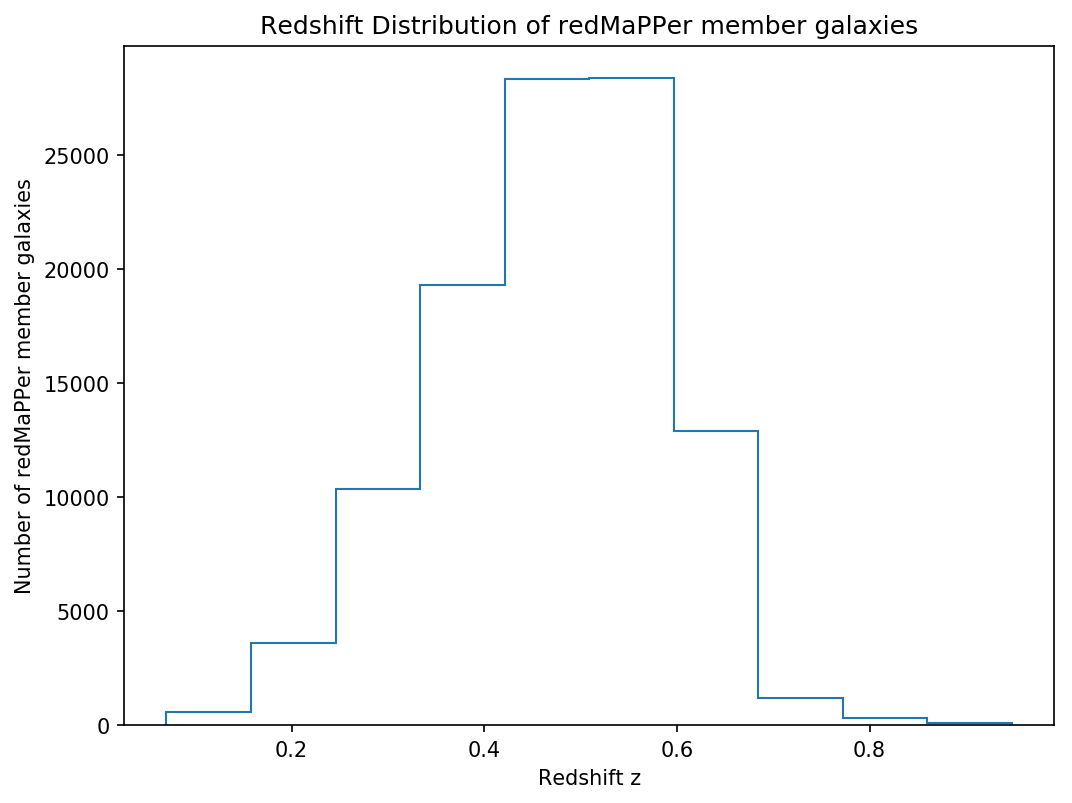

In [26]:
fig,ax=plt.subplots(figsize=(8,6),dpi=150)
ax.hist(members[('All','ZRED2')],histtype='step')
ax.set_xlabel("Redshift z")
ax.set_ylabel("Number of redMaPPer member galaxies")
ax.set_title("Redshift Distribution of redMaPPer member galaxies")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/z_hist.pdf")

# Abs Plots

Aggregated xi:
[ 0.      0.     -0.6416 -0.166   0.8915  0.7254  0.696  -2.8771  1.8631
 -3.2493]
------------------------------------------------------------------------------
Aggregated meanlogr:
[   0.        0.      -23.3156  -17.4065  -21.5185  -63.8033 -111.2038
 -159.773  -195.8753   11.1408]
------------------------------------------------------------------------------
Aggregated npairs:
[   0.    0.    7.    6.    9.   33.   77.  168.  401. 1135.]
------------------------------------------------------------------------------
Mean xi:
[    nan     nan -0.0917 -0.0277  0.0991  0.022   0.009  -0.0171  0.0046
 -0.0029]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan     nan -3.3308 -2.9011 -2.3909 -1.9334 -1.4442 -0.951  -0.4885
  0.0098]
------------------------------------------------------------------------------


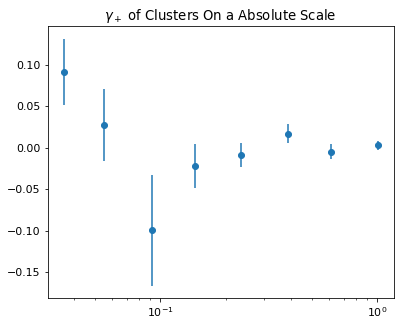

In [27]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

[ 8.0614e-03 -4.0169e-03  8.0985e-04 -8.0003e-04 -1.1234e-03 -1.6914e-05
  3.4635e-04 -8.3508e-05  1.5886e-04  6.9678e-05]
[-1.2262e-04  6.1101e-05 -1.2319e-05  1.2169e-05  1.7087e-05  2.5728e-07
 -5.2684e-06  1.2702e-06 -2.4164e-06 -1.0599e-06]


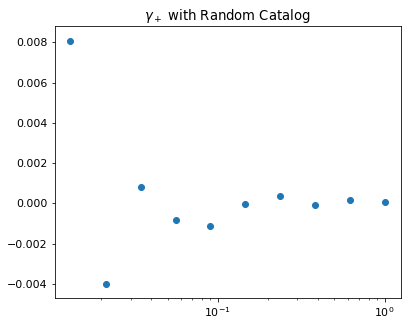

In [28]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

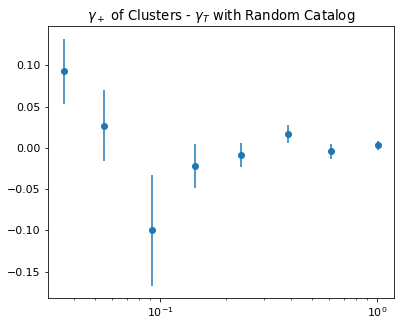

In [29]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

Aggregated xi:
[ 0.      0.      0.0031 -0.6565  0.6134  0.3677  0.1986 -2.2656  1.9169
 -1.959 ]
------------------------------------------------------------------------------
Aggregated meanlogr:
[   0.        0.       -6.7882  -23.4186  -17.0104  -36.097   -78.2098
  -94.3896 -140.0236  -13.4004]
------------------------------------------------------------------------------
Aggregated npairs:
[  0.   0.   2.   8.   7.  19.  54.  98. 273. 617.]
------------------------------------------------------------------------------
Mean xi:
[    nan     nan  0.0015 -0.0821  0.0876  0.0194  0.0037 -0.0231  0.007
 -0.0032]
------------------------------------------------------------------------------
Mean meanlogr:
[    nan     nan -3.3941 -2.9273 -2.4301 -1.8998 -1.4483 -0.9632 -0.5129
 -0.0217]
------------------------------------------------------------------------------


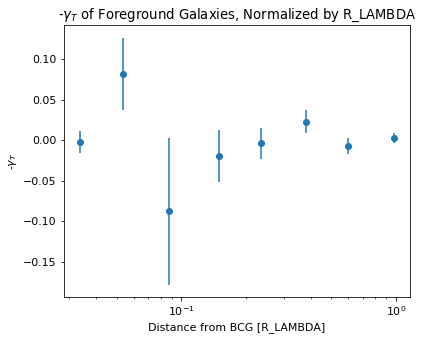

In [30]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"-$\gamma_T$ of Foreground Galaxies, Normalized by R_LAMBDA")
plt.xlabel("Distance from BCG [R_LAMBDA]")
plt.ylabel(r"-$\gamma_T$")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/gamma_T_rel.pdf")
print_data(sum_rel,mean_rel)

In [31]:
print("Error bar size")
print(sig_rel)

Error bar size
[   nan    nan 0.0136 0.0445 0.0904 0.0324 0.0191 0.0139 0.01   0.006 ]


In [32]:
np.sqrt(np.dot(np.dot(mean_rel[0],np.linalg.inv(cov_rel)),mean_rel[0]))

nan

In [33]:
len(cov_rel)

10

In [34]:
cov_rel

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan],
       [        nan,         nan,  1.8629e-04, -9.0243e-05, -6.4905e-04,
        -4.1349e-25,  3.8139e-05,  3.2864e-05, -5.3385e-05,  3.4453e-06],
       [        nan,         nan, -9.0243e-05,  1.9843e-03,  2.2438e-04,
        -3.3269e-04,  7.6278e-05, -2.5067e-05, -1.8063e-05, -1.6237e-05],
       [        nan,         nan, -6.4905e-04,  2.2438e-04,  8.1757e-03,
         4.0687e-04, -2.1818e-04, -1.5557e-04, -4.9117e-06, -5.7030e-05],
       [        nan,         nan, -4.1349e-25, -3.3269e-04,  4.0687e-04,
         1.0473e-03, -2.4361e-05, -5.1839e-05,  1.8903e-06,  2.1094e-06],
       [        nan,         nan,  3.8139e-05,  7.6278e-05, -2.1818e-04,
        -2.4361e-05,  3.6536e-04, -9.1678e-06

In [35]:
cov_rel.min()

nan

In [36]:
cov_rel.max()

nan

In [37]:
ticks_val=np.exp(mean_rel[1])
ticks_string=["{:.2f}".format(val) for val in ticks_val]
print(ticks_string)

['nan', 'nan', '0.03', '0.05', '0.09', '0.15', '0.23', '0.38', '0.60', '0.98']


In [38]:
fig,ax=plt.subplots(figsize=(6.2,5))

from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import matplotlib.colors as colors

plt.matshow(np.abs(cov_rel),fignum=0,norm=colors.LogNorm(vmin=np.abs(cov_rel).min(),vmax=np.abs(cov_rel).max()))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.00))

ax.set_xticks(range(len(ticks_val)))
ax.set_yticks(range(len(ticks_val)))

ax.set_xticklabels(ticks_val)


ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))

ax.set_xlabel("[R_LAMBDA]",labelpad=10)

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


cb=plt.colorbar(pad=0.06,format=ticker.FuncFormatter(fmt))




ax.set_title('Covariance Matrix of $-\gamma_T$ at Different R_LAMBDA',fontsize=11,pad=12);
plt.savefig('/home/adt35/des_y1_catalog/sa-master/images/cov.pdf')

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:613: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(*ax.dataLim.intervalx)
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:614: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(*ax.dataLim.intervaly)


ValueError: values must all be positive

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4347aed620> (for post_execute):


ValueError: values must all be positive

/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:300: RuntimeWarning: invalid value encountered in log10
  rtol = (np.log10(vmax) - np.log10(vmin)) * 1e-10
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: invalid value encountered in log10
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:301: RuntimeWarning: invalid value encountered in greater_equal
  ticks = ticks[(np.log10(ticks) >= np.log10(vmin) - rtol) &
/cvmfs/sw.lsst.eu/linux-x86_64/lsst_distrib/w_2019_23/python/miniconda3-4.5.12/envs/lsst-scipipe-1172c30/lib/python3.7/site-packages/matplotlib/colorbar.py:302: RuntimeWarning: invali

ValueError: values must all be positive

<Figure size 446.4x360 with 2 Axes>

In [ ]:
# print(f.number)

In [ ]:
np.dot(mean_rel[0],np.linalg.inv(cov_rel))

In [ ]:
mean_rel[0]

In [ ]:
cov_rel

In [ ]:
np.linalg.inv(cov_rel)